In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Mannix_Corrected.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Mannix_H2S_outlier.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)

In [ ]:
# df = pd.concat([df1,df2])
# df.index

In [ ]:
df1.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
aa = 'H2S (ppb)'

In [ ]:
df1_w= df1_w[[ aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'
       ]]


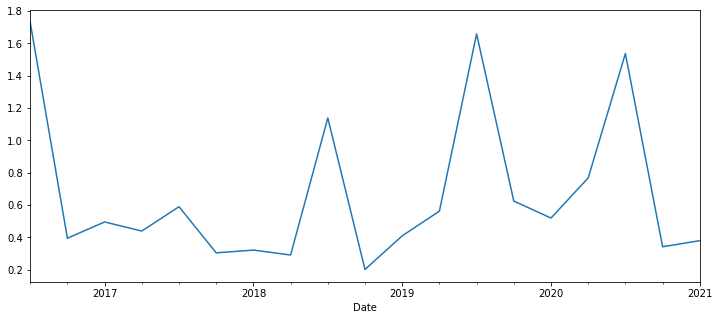

In [ ]:
df1_w[aa].resample('Q').mean().plot(figsize = (12,5))

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()

In [ ]:
avg + 2 * std

13.769693048137139

In [ ]:
print(len(df1_w[df1_w['score']<avg + 5*std])/len(df1_w)* 100, '%')

99.39378170937947 %


In [ ]:
df1_w

H2S (ppb)  T ( C) 45m  ...      trend     score
Date                                        ...                     
2016-09-29 00:00:00        0.0         8.4  ...  16.743169  3.828571
2016-09-29 01:00:00        0.0         8.2  ...  16.743283  4.474490
2016-09-29 02:00:00        0.0         7.9  ...  16.743397  3.540439
2016-09-29 03:00:00        0.0         8.1  ...  16.743511  3.252960
2016-09-29 04:00:00        0.0         7.6  ...  16.743625  3.154318
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.2         8.7  ...  21.245332  3.886580
2021-03-31 20:00:00        0.1         7.4  ...  21.245446  4.873626
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  4.822360
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  5.053360
2021-03-31 23:00:00        0.1         5.2  ...  21.245788  2.613294

[38435 rows x 15 columns]

In [ ]:
df1_w.isna().sum()

H2S (ppb)                      0
T ( C) 45m                     0
RH (%) 45m                     0
Std. Dev. of Wind Direction    0
Std. Dev. of Wind Speed        0
Wind Direction                 0
Wind Speed                     0
Incoming Solar Rad. (W/m2)     0
Precip. (mm)                   0
hol                            0
hour                           0
dayofweek_num                  0
Day-year                       0
trend                          0
score                          0
dtype: int64

In [ ]:
df1_w_c = df1_w[[aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
       ]].copy()
df1_w_c.dropna(inplace = True)
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
len(df1_w_c)/len(df1_w)

1.0

In [ ]:
study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=5000)
print(study2.best_trial)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_MANNIX_OT_H2S_HP_hourly.csv')

[I 2021-05-18 18:39:56,727] A new study created in memory with name: no-name-36d99214-2a04-43e7-aa7a-f6e45b288522


[0]	validation-rmse:2.08427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:9.48531
[2]	validation-rmse:78.4628
[3]	validation-rmse:683.719
[4]	validation-rmse:5998.58
[5]	validation-rmse:52658.9
[6]	validation-rmse:462310
[7]	validation-rmse:4.05881e+06
[8]	validation-rmse:3.5634e+07
[9]	validation-rmse:3.12845e+08
[0]	validation-rmse:1.93461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:9.48377
[2]	validation-rmse:86.5881
[3]	validation-rmse:819.803
[4]	validation-rmse:7794.44
[5]	validation-rmse:74129.2
[6]	validation-rmse:705038
[7]	validation-rmse:6.7056e+06
[8]	validation-rmse:6.37768e+07
[9]	validation-rmse:6.0658e+08
[0]	validation-rmse:1.31046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.31046
[2]	validation-rmse:1.31046
[3]	validation-rmse:1.31046
[4]	validation-rmse:1.31046
[5]	validation-rmse:1.31046
[6]	validation-rmse:1.31046
[7]	validation-rmse:1.31046
[8]	vali

[I 2021-05-18 18:39:57,517] Trial 0 finished with value: 1.6995561117810253e+17 and parameters: {'booster': 'gbtree', 'lambda': 182.4679745236614, 'alpha': 2623.0509403658007, 'score': 23.56113067061746, 'max_depth': 7, 'eta': 11.03428685382133, 'gamma': 72.90083629229906, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 1.6995561117810253e+17.


1.6995561117810253e+17
[0]	validation-rmse:3.44278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:10.2995
[2]	validation-rmse:32.5292
[3]	validation-rmse:105.331
[4]	validation-rmse:341.632
[5]	validation-rmse:1109.75
[6]	validation-rmse:3606.34
[7]	validation-rmse:11724.8
[8]	validation-rmse:38132.9
[9]	validation-rmse:124066
[0]	validation-rmse:3.0352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:8.99545
[2]	validation-rmse:28.4519
[3]	validation-rmse:92.0347
[4]	validation-rmse:298.328
[5]	validation-rmse:968.866
[6]	validation-rmse:3148.48
[7]	validation-rmse:10238.4
[8]	validation-rmse:33312.7
[9]	validation-rmse:108451
[0]	validation-rmse:2.3605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:6.74486
[2]	validation-rmse:21.0122
[3]	validation-rmse:67.8345
[4]	validation-rmse:219.345
[5]	validation-rmse:711.883
[6]	validation-rmse:2313.56
[7]	validation-rmse:7395.19
[8]	vali

[I 2021-05-18 18:39:58,781] Trial 1 finished with value: 6867494522.2913 and parameters: {'booster': 'gbtree', 'lambda': 13.336510885445366, 'alpha': 120.26184904174164, 'score': 20.32785871830382, 'max_depth': 9, 'eta': 4.376469049734563, 'gamma': 1.1492602447267095, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6867494522.2913.


6867494522.2913
[0]	validation-rmse:1.46733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.46733
[2]	validation-rmse:1.46733
[3]	validation-rmse:1.46733
[4]	validation-rmse:1.46733
[5]	validation-rmse:1.46733
[6]	validation-rmse:1.46733
[7]	validation-rmse:1.46733
[8]	validation-rmse:1.46733
[9]	validation-rmse:1.46733
[0]	validation-rmse:1.50223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.50223
[2]	validation-rmse:1.50223
[3]	validation-rmse:1.50223
[4]	validation-rmse:1.50223
[5]	validation-rmse:1.50223
[6]	validation-rmse:1.50223
[7]	validation-rmse:1.50223
[8]	validation-rmse:1.50223
[9]	validation-rmse:1.50223
[0]	validation-rmse:1.32506
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.32506
[2]	validation-rmse:1.32506
[3]	validation-rmse:1.32506
[4]	validation-rmse:1.32506
[5]	validation-rmse:1.32506
[6]	validation-rmse:1.32506
[7]	validation-rmse:1.32506
[8]	validat

[I 2021-05-18 18:39:59,228] Trial 2 finished with value: 1.6211799498673234 and parameters: {'booster': 'gbtree', 'lambda': 0.6594644723580205, 'alpha': 5791.647562157212, 'score': 23.72344927667067, 'max_depth': 7, 'eta': 8373.429552802309, 'gamma': 0.19741829598150257, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 1.6211799498673234.


1.6211799498673234
[0]	validation-rmse:1.25312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.1315
[2]	validation-rmse:1.06076
[3]	validation-rmse:1.00179
[4]	validation-rmse:0.969743
[5]	validation-rmse:0.9404
[6]	validation-rmse:0.925169
[7]	validation-rmse:0.911112
[8]	validation-rmse:0.903965
[9]	validation-rmse:0.899974
[0]	validation-rmse:1.24593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.14243
[2]	validation-rmse:1.06705
[3]	validation-rmse:1.0171
[4]	validation-rmse:0.98397
[5]	validation-rmse:0.959472
[6]	validation-rmse:0.940327
[7]	validation-rmse:0.926213
[8]	validation-rmse:0.918021
[9]	validation-rmse:0.910441
[0]	validation-rmse:1.18961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.10662
[2]	validation-rmse:1.0525
[3]	validation-rmse:1.01562
[4]	validation-rmse:0.987634
[5]	validation-rmse:0.967128
[6]	validation-rmse:0.950793
[7]	validation-rmse:0.93831

[I 2021-05-18 18:40:00,492] Trial 3 finished with value: 0.9555824269335388 and parameters: {'booster': 'gbtree', 'lambda': 13.000319709343781, 'alpha': 84.9423234497769, 'score': 19.082497567431272, 'max_depth': 8, 'eta': 0.2681772352031334, 'gamma': 7.8949170267466995, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.9555824269335388.


0.9555824269335388
[0]	validation-rmse:1.28952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.18302
[2]	validation-rmse:1.16972
[3]	validation-rmse:1.1848
[4]	validation-rmse:1.22017
[5]	validation-rmse:1.2989
[6]	validation-rmse:1.38895
[7]	validation-rmse:1.53935
[8]	validation-rmse:1.7147
[9]	validation-rmse:1.97973
[0]	validation-rmse:1.24188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.20426
[2]	validation-rmse:1.22009
[3]	validation-rmse:1.24367
[4]	validation-rmse:1.2741
[5]	validation-rmse:1.31873
[6]	validation-rmse:1.40409
[7]	validation-rmse:1.53258
[8]	validation-rmse:1.70282
[9]	validation-rmse:1.9383
[0]	validation-rmse:1.11187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.10428
[2]	validation-rmse:1.11137
[3]	validation-rmse:1.15192
[4]	validation-rmse:1.21108
[5]	validation-rmse:1.29257
[6]	validation-rmse:1.41495
[7]	validation-rmse:1.59203
[8]	validatio

[I 2021-05-18 18:40:01,853] Trial 4 finished with value: 3.6688533844902085 and parameters: {'booster': 'gbtree', 'lambda': 552.0480541486445, 'alpha': 0.14460058900817452, 'score': 15.330865904875068, 'max_depth': 9, 'eta': 2.3256614101278212, 'gamma': 88.90822368215318, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.9555824269335388.


3.6688533844902085


[I 2021-05-18 18:40:01,916] Trial 5 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:01,988] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,041] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,093] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,139] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,191] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,242] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,299] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,376] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,436] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,486] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,540] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:02,603] Trial 17 pruned. Trial was pruned at iter

[0]	validation-rmse:1.02778
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948942
[2]	validation-rmse:0.936691
[3]	validation-rmse:0.947591
[4]	validation-rmse:0.948532
[5]	validation-rmse:0.937653
[6]	validation-rmse:0.937284
[7]	validation-rmse:0.935178
[8]	validation-rmse:0.936637
[9]	validation-rmse:0.933818
[0]	validation-rmse:1.01306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.932747
[2]	validation-rmse:0.924235
[3]	validation-rmse:0.91297
[4]	validation-rmse:0.909584
[5]	validation-rmse:0.908595
[6]	validation-rmse:0.905495
[7]	validation-rmse:0.906488
[8]	validation-rmse:0.90423
[9]	validation-rmse:0.903274
[0]	validation-rmse:1.0306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967327
[2]	validation-rmse:0.938655
[3]	validation-rmse:0.917466
[4]	validation-rmse:0.903339
[5]	validation-rmse:0.899779
[6]	validation-rmse:0.902211
[7]	validation-rmse:0.900677
[8]	v

[I 2021-05-18 18:40:03,606] Trial 18 finished with value: 0.9431245090675834 and parameters: {'booster': 'gbtree', 'lambda': 4.663992535619114, 'alpha': 1.8687487593064283, 'score': 13.821497291198604, 'max_depth': 6, 'eta': 0.712456946994105, 'gamma': 0.25847634512326767, 'grow_policy': 'depthwise'}. Best is trial 18 with value: 0.9431245090675834.


0.9431245090675834


[I 2021-05-18 18:40:03,652] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:03,704] Trial 20 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:03,764] Trial 21 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:03,824] Trial 22 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:03,901] Trial 23 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:03,965] Trial 24 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.32905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.24099
[2]	validation-rmse:1.18098
[3]	validation-rmse:1.15274
[4]	validation-rmse:1.15193
[5]	validation-rmse:1.13178
[6]	validation-rmse:1.12001
[7]	validation-rmse:1.11987
[8]	validation-rmse:1.11979
[9]	validation-rmse:1.11974
[0]	validation-rmse:1.25988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.17077
[2]	validation-rmse:1.12557
[3]	validation-rmse:1.10521
[4]	validation-rmse:1.07536
[5]	validation-rmse:1.07499
[6]	validation-rmse:1.0748
[7]	validation-rmse:1.0747
[8]	validation-rmse:1.07464
[9]	validation-rmse:1.07461
[0]	validation-rmse:1.15939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.12144
[2]	validation-rmse:1.10617
[3]	validation-rmse:1.10601
[4]	validation-rmse:1.10592
[5]	validation-rmse:1.10587
[6]	validation-rmse:1.10583
[7]	validation-rmse:1.10581
[8]	validation-rmse:1.1058
[9

[I 2021-05-18 18:40:05,054] Trial 25 finished with value: 1.1822377945778695 and parameters: {'booster': 'gbtree', 'lambda': 0.3486282610529879, 'alpha': 343.6787873146868, 'score': 13.88213334767634, 'max_depth': 8, 'eta': 0.30671761109773726, 'gamma': 502.62128093072573, 'grow_policy': 'depthwise'}. Best is trial 18 with value: 0.9431245090675834.


1.1822377945778695
[0]	validation-rmse:1.31786
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:40:05,147] Trial 26 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.13522
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.09377
[2]	validation-rmse:1.09377
[3]	validation-rmse:1.09377
[4]	validation-rmse:1.09377
[5]	validation-rmse:1.09377
[6]	validation-rmse:1.09377
[7]	validation-rmse:1.09377
[8]	validation-rmse:1.09377
[9]	validation-rmse:1.09377
[0]	validation-rmse:1.09498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.09498
[2]	validation-rmse:1.09498
[3]	validation-rmse:1.09498
[4]	validation-rmse:1.09498
[5]	validation-rmse:1.09498
[6]	validation-rmse:1.09498
[7]	validation-rmse:1.09498
[8]	validation-rmse:1.09498
[9]	validation-rmse:1.09498
[0]	validation-rmse:1.01869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00571
[2]	validation-rmse:1.00572
[3]	validation-rmse:1.00572
[4]	validation-rmse:1.00572
[5]	validation-rmse:1.00572
[6]	validation-rmse:1.00572
[7]	validation-rmse:1.00572
[8]	validation-rmse:1.00572

[I 2021-05-18 18:40:06,511] Trial 27 finished with value: 1.049109320295822 and parameters: {'booster': 'gbtree', 'lambda': 42.60410182214357, 'alpha': 63.020187706562716, 'score': 13.878639110588004, 'max_depth': 9, 'eta': 1.1888824882847209, 'gamma': 498.4810274201379, 'grow_policy': 'depthwise'}. Best is trial 18 with value: 0.9431245090675834.


1.049109320295822


[I 2021-05-18 18:40:06,591] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:06,662] Trial 29 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:06,718] Trial 30 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:06,780] Trial 31 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:06,848] Trial 32 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.21212
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.21088


[I 2021-05-18 18:40:06,958] Trial 33 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:40:07,028] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,088] Trial 35 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,165] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,223] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,278] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,342] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,405] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,462] Trial 41 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,524] Trial 42 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,588] Trial 43 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,654] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:07,711] Trial 45 pruned. Trial was pruned at

[0]	validation-rmse:1.24614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.16242
[2]	validation-rmse:1.16199
[3]	validation-rmse:1.16196
[4]	validation-rmse:1.16196
[5]	validation-rmse:1.16196
[6]	validation-rmse:1.16197
[7]	validation-rmse:1.16197
[8]	validation-rmse:1.16197
[9]	validation-rmse:1.16197
[0]	validation-rmse:1.23442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.18254
[2]	validation-rmse:1.18221
[3]	validation-rmse:1.18222
[4]	validation-rmse:1.18223
[5]	validation-rmse:1.18224
[6]	validation-rmse:1.18225
[7]	validation-rmse:1.18225
[8]	validation-rmse:1.18225
[9]	validation-rmse:1.18225
[0]	validation-rmse:1.13377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.13317
[2]	validation-rmse:1.13309
[3]	validation-rmse:1.13308
[4]	validation-rmse:1.13308
[5]	validation-rmse:1.13308
[6]	validation-rmse:1.13308
[7]	validation-rmse:1.13308
[8]	validation-rmse:1.13308

[I 2021-05-18 18:40:08,541] Trial 46 finished with value: 1.2384681524364924 and parameters: {'booster': 'gbtree', 'lambda': 19.86430222882289, 'alpha': 438.70581359591995, 'score': 21.4447910631824, 'max_depth': 5, 'eta': 0.6405972503951245, 'gamma': 538.3497921288177, 'grow_policy': 'lossguide'}. Best is trial 18 with value: 0.9431245090675834.


1.2384681524364924
[0]	validation-rmse:1.19768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.10323
[2]	validation-rmse:1.08635
[3]	validation-rmse:1.08626
[4]	validation-rmse:1.08625
[5]	validation-rmse:1.08625
[6]	validation-rmse:1.08625
[7]	validation-rmse:1.08625
[8]	validation-rmse:1.08625
[9]	validation-rmse:1.08625
[0]	validation-rmse:1.18596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.10331
[2]	validation-rmse:1.10312
[3]	validation-rmse:1.10319
[4]	validation-rmse:1.10324
[5]	validation-rmse:1.10326
[6]	validation-rmse:1.10326
[7]	validation-rmse:1.10326
[8]	validation-rmse:1.10326
[9]	validation-rmse:1.10326
[0]	validation-rmse:1.17696
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.17629
[2]	validation-rmse:1.17617
[3]	validation-rmse:1.17615
[4]	validation-rmse:1.17614
[5]	validation-rmse:1.17614
[6]	validation-rmse:1.17613
[7]	validation-rmse:1.17613
[8]	vali

[I 2021-05-18 18:40:09,287] Trial 47 finished with value: 1.2115951424168494 and parameters: {'booster': 'gbtree', 'lambda': 8.957318076678769, 'alpha': 362.6985441810057, 'score': 21.54183446848016, 'max_depth': 4, 'eta': 0.6552685168055244, 'gamma': 410.026665340875, 'grow_policy': 'lossguide'}. Best is trial 18 with value: 0.9431245090675834.


1.2115951424168494


[I 2021-05-18 18:40:09,343] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:09,401] Trial 49 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.25663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.12425
[2]	validation-rmse:1.07764
[3]	validation-rmse:1.0515
[4]	validation-rmse:1.0469
[5]	validation-rmse:1.0436
[6]	validation-rmse:1.03899
[7]	validation-rmse:1.02961
[8]	validation-rmse:1.02962
[9]	validation-rmse:1.02963
[0]	validation-rmse:1.18092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.06492
[2]	validation-rmse:1.01266
[3]	validation-rmse:1.00449
[4]	validation-rmse:0.995526
[5]	validation-rmse:0.993309
[6]	validation-rmse:0.993343
[7]	validation-rmse:0.993361
[8]	validation-rmse:0.993369
[9]	validation-rmse:0.993373
[0]	validation-rmse:1.14161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.07117
[2]	validation-rmse:1.03713
[3]	validation-rmse:1.01543
[4]	validation-rmse:1.00094
[5]	validation-rmse:0.995186
[6]	validation-rmse:0.993156
[7]	validation-rmse:0.990793
[8]	validation-rmse:0

[I 2021-05-18 18:40:10,181] Trial 50 finished with value: 0.9550915774013846 and parameters: {'booster': 'gbtree', 'lambda': 8.891159694396038, 'alpha': 17.278168820392857, 'score': 18.864119848976618, 'max_depth': 4, 'eta': 0.533940857806339, 'gamma': 77.25796902646262, 'grow_policy': 'lossguide'}. Best is trial 18 with value: 0.9431245090675834.


0.9550915774013846
[0]	validation-rmse:1.21236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.12256
[2]	validation-rmse:1.08072
[3]	validation-rmse:1.05472
[4]	validation-rmse:1.03083
[5]	validation-rmse:1.0259
[6]	validation-rmse:1.01857
[7]	validation-rmse:1.01283
[8]	validation-rmse:1.01283
[9]	validation-rmse:1.01283
[0]	validation-rmse:1.21621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.13519
[2]	validation-rmse:1.0995
[3]	validation-rmse:1.08694
[4]	validation-rmse:1.07748
[5]	validation-rmse:1.06896
[6]	validation-rmse:1.05798
[7]	validation-rmse:1.05143
[8]	validation-rmse:1.04444
[9]	validation-rmse:1.04444
[0]	validation-rmse:1.11161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04823
[2]	validation-rmse:1.01114
[3]	validation-rmse:0.977242
[4]	validation-rmse:0.966253
[5]	validation-rmse:0.960626
[6]	validation-rmse:0.952006
[7]	validation-rmse:0.952006
[8]	v

[I 2021-05-18 18:40:10,861] Trial 51 finished with value: 1.0344294059648385 and parameters: {'booster': 'gbtree', 'lambda': 7.9637776758262255, 'alpha': 115.62851625075163, 'score': 18.918185114654214, 'max_depth': 3, 'eta': 0.6121067767803938, 'gamma': 93.79654404581794, 'grow_policy': 'lossguide'}. Best is trial 18 with value: 0.9431245090675834.


1.0344294059648385


[I 2021-05-18 18:40:10,918] Trial 52 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:10,967] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:11,014] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:11,064] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:11,124] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:11,175] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:11,226] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:11,302] Trial 59 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.18825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.10707
[2]	validation-rmse:1.09242
[3]	validation-rmse:1.09241
[4]	validation-rmse:1.09241
[5]	validation-rmse:1.09241
[6]	validation-rmse:1.09241
[7]	validation-rmse:1.09241
[8]	validation-rmse:1.09241
[9]	validation-rmse:1.09241
[0]	validation-rmse:1.20331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.16304
[2]	validation-rmse:1.12981
[3]	validation-rmse:1.12985
[4]	validation-rmse:1.12983
[5]	validation-rmse:1.12984
[6]	validation-rmse:1.12983
[7]	validation-rmse:1.12983
[8]	validation-rmse:1.12983
[9]	validation-rmse:1.12983
[0]	validation-rmse:1.16227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.12567
[2]	validation-rmse:1.12588
[3]	validation-rmse:1.12576
[4]	validation-rmse:1.12581
[5]	validation-rmse:1.12579
[6]	validation-rmse:1.12579
[7]	validation-rmse:1.12579
[8]	validation-rmse:1.12579

[I 2021-05-18 18:40:12,190] Trial 60 finished with value: 1.1575251721656774 and parameters: {'booster': 'gbtree', 'lambda': 27.052143162020997, 'alpha': 2.164329282672224, 'score': 17.20441498934426, 'max_depth': 5, 'eta': 1.5170237576480223, 'gamma': 289.7495468771788, 'grow_policy': 'depthwise'}. Best is trial 18 with value: 0.9431245090675834.


1.1575251721656774


[I 2021-05-18 18:40:12,250] Trial 61 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:12,304] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:12,363] Trial 63 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.2192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.11162
[2]	validation-rmse:1.05883
[3]	validation-rmse:1.03764
[4]	validation-rmse:1.01951
[5]	validation-rmse:1.01513
[6]	validation-rmse:1.01514
[7]	validation-rmse:1.01515
[8]	validation-rmse:1.01515
[9]	validation-rmse:1.01515
[0]	validation-rmse:1.1718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.06522
[2]	validation-rmse:1.02068
[3]	validation-rmse:0.997326
[4]	validation-rmse:0.985179
[5]	validation-rmse:0.985183
[6]	validation-rmse:0.98519
[7]	validation-rmse:0.985194
[8]	validation-rmse:0.985196
[9]	validation-rmse:0.985197
[0]	validation-rmse:1.11863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04285
[2]	validation-rmse:1.01168
[3]	validation-rmse:0.970815
[4]	validation-rmse:0.968748
[5]	validation-rmse:0.968764
[6]	validation-rmse:0.968772
[7]	validation-rmse:0.968776
[8]	validation-rms

[I 2021-05-18 18:40:13,132] Trial 64 finished with value: 0.9625357083434151 and parameters: {'booster': 'gbtree', 'lambda': 33.84053644154658, 'alpha': 1.6924188988897515, 'score': 15.69596656370468, 'max_depth': 4, 'eta': 0.5543211232223474, 'gamma': 150.66941179080032, 'grow_policy': 'depthwise'}. Best is trial 18 with value: 0.9431245090675834.


0.9625357083434151
[0]	validation-rmse:1.24074
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:40:13,213] Trial 65 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.2415
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:40:13,298] Trial 66 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:40:13,354] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:13,405] Trial 68 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.24589
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:40:13,492] Trial 69 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:40:13,543] Trial 70 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:13,626] Trial 71 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.17084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.07615
[2]	validation-rmse:1.04966
[3]	validation-rmse:1.02502
[4]	validation-rmse:1.02508
[5]	validation-rmse:1.02509
[6]	validation-rmse:1.0251
[7]	validation-rmse:1.0251
[8]	validation-rmse:1.0251
[9]	validation-rmse:1.0251
[0]	validation-rmse:1.19209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.10096
[2]	validation-rmse:1.07563
[3]	validation-rmse:1.07563
[4]	validation-rmse:1.07564
[5]	validation-rmse:1.07564
[6]	validation-rmse:1.07564
[7]	validation-rmse:1.07564
[8]	validation-rmse:1.07564
[9]	validation-rmse:1.07564
[0]	validation-rmse:1.05956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03303
[2]	validation-rmse:1.00574
[3]	validation-rmse:1.00569
[4]	validation-rmse:1.0057
[5]	validation-rmse:1.00571
[6]	validation-rmse:1.00571
[7]	validation-rmse:1.00571
[8]	validation-rmse:1.00571
[9]	

[I 2021-05-18 18:40:14,401] Trial 72 finished with value: 1.0769029098187601 and parameters: {'booster': 'gbtree', 'lambda': 318.66047615696044, 'alpha': 149.05698285356036, 'score': 15.584653195667968, 'max_depth': 4, 'eta': 0.8828988636033084, 'gamma': 205.40261615021888, 'grow_policy': 'depthwise'}. Best is trial 18 with value: 0.9431245090675834.


1.0769029098187601


[I 2021-05-18 18:40:14,461] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:14,515] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:14,576] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:14,636] Trial 76 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.1566
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02469
[2]	validation-rmse:0.967763
[3]	validation-rmse:0.936386
[4]	validation-rmse:0.922651
[5]	validation-rmse:0.918425
[6]	validation-rmse:0.909403
[7]	validation-rmse:0.902192
[8]	validation-rmse:0.898412
[9]	validation-rmse:0.898416
[0]	validation-rmse:1.13619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03069
[2]	validation-rmse:0.978887
[3]	validation-rmse:0.944993
[4]	validation-rmse:0.930189
[5]	validation-rmse:0.921399
[6]	validation-rmse:0.915498
[7]	validation-rmse:0.91088
[8]	validation-rmse:0.908162
[9]	validation-rmse:0.908159
[0]	validation-rmse:0.975175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.888572
[2]	validation-rmse:0.870178
[3]	validation-rmse:0.832669
[4]	validation-rmse:0.821566
[5]	validation-rmse:0.80533
[6]	validation-rmse:0.8034
[7]	validation-rmse:0.8005
[8]	valida

[I 2021-05-18 18:40:15,416] Trial 77 finished with value: 0.8773129348600446 and parameters: {'booster': 'gbtree', 'lambda': 2.404933941285142, 'alpha': 17.05175232102456, 'score': 14.233709934366413, 'max_depth': 4, 'eta': 0.502249117741209, 'gamma': 41.822537097389635, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.8773129348600446


[I 2021-05-18 18:40:15,471] Trial 78 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.15172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02717
[2]	validation-rmse:0.978467
[3]	validation-rmse:0.945055
[4]	validation-rmse:0.931973
[5]	validation-rmse:0.911445
[6]	validation-rmse:0.90564
[7]	validation-rmse:0.900703
[8]	validation-rmse:0.89494
[9]	validation-rmse:0.888247
[0]	validation-rmse:1.15287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03762
[2]	validation-rmse:0.991069
[3]	validation-rmse:0.962262
[4]	validation-rmse:0.949177
[5]	validation-rmse:0.938281
[6]	validation-rmse:0.929336
[7]	validation-rmse:0.925368
[8]	validation-rmse:0.920636
[9]	validation-rmse:0.920636
[0]	validation-rmse:0.997688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911077
[2]	validation-rmse:0.884949
[3]	validation-rmse:0.845011
[4]	validation-rmse:0.833282
[5]	validation-rmse:0.823693
[6]	validation-rmse:0.818285
[7]	validation-rmse:0.810459
[8]	v

[I 2021-05-18 18:40:16,268] Trial 79 finished with value: 0.891380654849379 and parameters: {'booster': 'gbtree', 'lambda': 2.3114691949187884, 'alpha': 28.69430002672851, 'score': 14.910413654347613, 'max_depth': 4, 'eta': 0.5036158335035789, 'gamma': 29.784431661973688, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.891380654849379


[I 2021-05-18 18:40:16,327] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.14453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04617
[2]	validation-rmse:1.02847
[3]	validation-rmse:1.02167
[4]	validation-rmse:1.01253
[5]	validation-rmse:0.992539
[6]	validation-rmse:0.989532
[7]	validation-rmse:0.987492
[8]	validation-rmse:0.98513
[9]	validation-rmse:0.982583
[0]	validation-rmse:1.09241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02126
[2]	validation-rmse:1.00013
[3]	validation-rmse:0.992866
[4]	validation-rmse:0.975604
[5]	validation-rmse:0.964262
[6]	validation-rmse:0.960522
[7]	validation-rmse:0.95867
[8]	validation-rmse:0.954342
[9]	validation-rmse:0.953118
[0]	validation-rmse:0.949111
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.921822
[2]	validation-rmse:0.893372
[3]	validation-rmse:0.876693
[4]	validation-rmse:0.872924
[5]	validation-rmse:0.871002
[6]	validation-rmse:0.867718
[7]	validation-rmse:0.854613
[8]	valid

[I 2021-05-18 18:40:17,128] Trial 81 finished with value: 0.9812504380525922 and parameters: {'booster': 'gbtree', 'lambda': 2.602809196297705, 'alpha': 41.90417685319316, 'score': 14.847386367136664, 'max_depth': 4, 'eta': 0.9087315355203279, 'gamma': 14.26799340391762, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9812504380525922


[I 2021-05-18 18:40:17,191] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:17,246] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:17,298] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:17,352] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:17,403] Trial 86 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.12976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.999587
[2]	validation-rmse:0.962808
[3]	validation-rmse:0.935536
[4]	validation-rmse:0.931016
[5]	validation-rmse:0.93114
[6]	validation-rmse:0.931228
[7]	validation-rmse:0.931282
[8]	validation-rmse:0.931312
[9]	validation-rmse:0.931328
[0]	validation-rmse:1.14704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.05105
[2]	validation-rmse:1.01759
[3]	validation-rmse:0.997749
[4]	validation-rmse:0.993293
[5]	validation-rmse:0.983545
[6]	validation-rmse:0.978571
[7]	validation-rmse:0.978616
[8]	validation-rmse:0.978642
[9]	validation-rmse:0.978656
[0]	validation-rmse:1.12252
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04077
[2]	validation-rmse:1.00516
[3]	validation-rmse:0.982423
[4]	validation-rmse:0.968498
[5]	validation-rmse:0.956958
[6]	validation-rmse:0.95191
[7]	validation-rmse:0.951917
[8]	vali

[I 2021-05-18 18:40:18,340] Trial 87 finished with value: 0.9202377033364256 and parameters: {'booster': 'gbtree', 'lambda': 0.7816806264121375, 'alpha': 35.77417958244915, 'score': 15.135252731059447, 'max_depth': 5, 'eta': 0.4658713377582691, 'gamma': 95.22204149956143, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9202377033364256


[I 2021-05-18 18:40:18,406] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:18,464] Trial 89 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:18,525] Trial 90 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.10689
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.0023
[2]	validation-rmse:0.993403
[3]	validation-rmse:0.979083
[4]	validation-rmse:0.97908
[5]	validation-rmse:0.97908
[6]	validation-rmse:0.97908
[7]	validation-rmse:0.97908
[8]	validation-rmse:0.97908
[9]	validation-rmse:0.97908
[0]	validation-rmse:1.11284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02927
[2]	validation-rmse:0.994244
[3]	validation-rmse:0.987857
[4]	validation-rmse:0.987839
[5]	validation-rmse:0.987835
[6]	validation-rmse:0.987834
[7]	validation-rmse:0.987833
[8]	validation-rmse:0.987833
[9]	validation-rmse:0.987833
[0]	validation-rmse:0.984387
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.907827
[2]	validation-rmse:0.893774
[3]	validation-rmse:0.874455
[4]	validation-rmse:0.874455
[5]	validation-rmse:0.874455
[6]	validation-rmse:0.874455
[7]	validation-rmse:0.874455
[8]	valida

[I 2021-05-18 18:40:19,424] Trial 91 finished with value: 0.9530753897211852 and parameters: {'booster': 'gbtree', 'lambda': 0.7515234529089994, 'alpha': 90.23733563699327, 'score': 14.427652931076446, 'max_depth': 5, 'eta': 0.7489306893432571, 'gamma': 129.51053921228691, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9530753897211852
[0]	validation-rmse:1.1129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03974
[2]	validation-rmse:1.02041
[3]	validation-rmse:1.00587
[4]	validation-rmse:1.00165
[5]	validation-rmse:0.99746
[6]	validation-rmse:0.993485
[7]	validation-rmse:0.987572
[8]	validation-rmse:0.987572
[9]	validation-rmse:0.987572
[0]	validation-rmse:1.11221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.0474
[2]	validation-rmse:1.03721
[3]	validation-rmse:1.0253
[4]	validation-rmse:1.0114
[5]	validation-rmse:1.00493
[6]	validation-rmse:0.999421
[7]	validation-rmse:0.99939
[8]	validation-rmse:0.999385
[9]	validation-rmse:0.999384
[0]	validation-rmse:1.02058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.984837
[2]	validation-rmse:0.95588
[3]	validation-rmse:0.935166
[4]	validation-rmse:0.929024
[5]	validation-rmse:0.922689
[6]	validation-rmse:0.914715
[7]	validation-rmse:0.914715

[I 2021-05-18 18:40:20,379] Trial 92 finished with value: 0.927578876553909 and parameters: {'booster': 'gbtree', 'lambda': 1.4914659434237403, 'alpha': 88.09536199832844, 'score': 14.522028006511004, 'max_depth': 5, 'eta': 0.8374522588636505, 'gamma': 25.723297685680933, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.927578876553909
[0]	validation-rmse:1.10859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02679
[2]	validation-rmse:1.00201
[3]	validation-rmse:0.989739
[4]	validation-rmse:0.983631
[5]	validation-rmse:0.968349
[6]	validation-rmse:0.960711
[7]	validation-rmse:0.959689
[8]	validation-rmse:0.959689
[9]	validation-rmse:0.959689
[0]	validation-rmse:1.07642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.995931
[2]	validation-rmse:0.967432
[3]	validation-rmse:0.952684
[4]	validation-rmse:0.945258
[5]	validation-rmse:0.940331
[6]	validation-rmse:0.940331
[7]	validation-rmse:0.940331
[8]	validation-rmse:0.940331
[9]	validation-rmse:0.940331
[0]	validation-rmse:0.951057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.873566
[2]	validation-rmse:0.853324
[3]	validation-rmse:0.843108
[4]	validation-rmse:0.840611
[5]	validation-rmse:0.836989
[6]	validation-rmse:0.836993
[7]	validation

[I 2021-05-18 18:40:21,385] Trial 93 finished with value: 0.9187141548257238 and parameters: {'booster': 'gbtree', 'lambda': 0.7606301748856796, 'alpha': 88.53486504766597, 'score': 14.423334004753137, 'max_depth': 6, 'eta': 0.7760624258980595, 'gamma': 20.899541332994307, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9187141548257238


[I 2021-05-18 18:40:21,450] Trial 94 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:21,512] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:21,568] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.99091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923098
[2]	validation-rmse:0.912568
[3]	validation-rmse:0.899667
[4]	validation-rmse:0.903588
[5]	validation-rmse:0.903608
[6]	validation-rmse:0.903614
[7]	validation-rmse:0.903616
[8]	validation-rmse:0.903616
[9]	validation-rmse:0.903616
[0]	validation-rmse:1.04462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.989247
[2]	validation-rmse:0.96882
[3]	validation-rmse:0.964306
[4]	validation-rmse:0.964306
[5]	validation-rmse:0.964307
[6]	validation-rmse:0.964307
[7]	validation-rmse:0.964307
[8]	validation-rmse:0.964307
[9]	validation-rmse:0.964307
[0]	validation-rmse:0.973165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922712
[2]	validation-rmse:0.907738
[3]	validation-rmse:0.898409
[4]	validation-rmse:0.898409
[5]	validation-rmse:0.898409
[6]	validation-rmse:0.898409
[7]	validation-rmse:0.898409
[8

[I 2021-05-18 18:40:22,616] Trial 97 finished with value: 0.9662145739994352 and parameters: {'booster': 'gbtree', 'lambda': 1.344477123025295, 'alpha': 18.802923399786394, 'score': 14.547731860400777, 'max_depth': 6, 'eta': 0.7051111054209984, 'gamma': 131.88215668073502, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9662145739994352


[I 2021-05-18 18:40:22,682] Trial 98 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:22,745] Trial 99 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.11094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04503
[2]	validation-rmse:1.01143
[3]	validation-rmse:1.00902
[4]	validation-rmse:1.00653
[5]	validation-rmse:1.0065
[6]	validation-rmse:1.0065
[7]	validation-rmse:1.0065
[8]	validation-rmse:1.0065
[9]	validation-rmse:1.0065
[0]	validation-rmse:1.09439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04172
[2]	validation-rmse:1.02357
[3]	validation-rmse:1.02357
[4]	validation-rmse:1.02357
[5]	validation-rmse:1.02357
[6]	validation-rmse:1.02357
[7]	validation-rmse:1.02357
[8]	validation-rmse:1.02357
[9]	validation-rmse:1.02357
[0]	validation-rmse:0.955026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927306
[2]	validation-rmse:0.9063
[3]	validation-rmse:0.90205
[4]	validation-rmse:0.891704
[5]	validation-rmse:0.891236
[6]	validation-rmse:0.887993
[7]	validation-rmse:0.887963
[8]	validation-rmse:0.88796

[I 2021-05-18 18:40:23,701] Trial 100 finished with value: 1.0747923426217647 and parameters: {'booster': 'gbtree', 'lambda': 0.4664198934899967, 'alpha': 86.21367731291858, 'score': 14.558248133142028, 'max_depth': 5, 'eta': 1.3056516632736643, 'gamma': 26.8370239250429, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


[0]	validation-rmse:1.08126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00956
[2]	validation-rmse:0.99155
[3]	validation-rmse:0.972514
[4]	validation-rmse:0.972474
[5]	validation-rmse:0.972465
[6]	validation-rmse:0.972463
[7]	validation-rmse:0.972463
[8]	validation-rmse:0.972463
[9]	validation-rmse:0.972463
[0]	validation-rmse:1.03769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967585
[2]	validation-rmse:0.959404
[3]	validation-rmse:0.953011
[4]	validation-rmse:0.94198
[5]	validation-rmse:0.941805
[6]	validation-rmse:0.932875
[7]	validation-rmse:0.932873
[8]	validation-rmse:0.932872
[9]	validation-rmse:0.932872
[0]	validation-rmse:0.898177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.868934
[2]	validation-rmse:0.846557
[3]	validation-rmse:0.84516
[4]	validation-rmse:0.84254
[5]	validation-rmse:0.842864
[6]	validation-rmse:0.842878
[7]	validation-rmse:0.842883
[8]	va

[I 2021-05-18 18:40:24,756] Trial 101 finished with value: 0.9261057085258195 and parameters: {'booster': 'gbtree', 'lambda': 1.5803907780271604, 'alpha': 17.045658379363534, 'score': 15.175522809671536, 'max_depth': 6, 'eta': 0.7466191719322334, 'gamma': 59.00265999838656, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


[0]	validation-rmse:1.02217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.970853
[2]	validation-rmse:0.957693
[3]	validation-rmse:0.955497
[4]	validation-rmse:0.957548
[5]	validation-rmse:0.957559
[6]	validation-rmse:0.957561
[7]	validation-rmse:0.957562
[8]	validation-rmse:0.957562
[9]	validation-rmse:0.957562
[0]	validation-rmse:1.11042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.07663
[2]	validation-rmse:1.07098
[3]	validation-rmse:1.06032
[4]	validation-rmse:1.054
[5]	validation-rmse:1.04983
[6]	validation-rmse:1.04984
[7]	validation-rmse:1.04984
[8]	validation-rmse:1.04984
[9]	validation-rmse:1.04984
[0]	validation-rmse:1.02664
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.976157
[2]	validation-rmse:0.956526
[3]	validation-rmse:0.954622
[4]	validation-rmse:0.947151
[5]	validation-rmse:0.94715
[6]	validation-rmse:0.94715
[7]	validation-rmse:0.94715
[8]	validation-r

[I 2021-05-18 18:40:25,814] Trial 102 finished with value: 0.9752996614188814 and parameters: {'booster': 'gbtree', 'lambda': 0.3780540319935104, 'alpha': 54.85573092403619, 'score': 15.101217186965554, 'max_depth': 6, 'eta': 0.78720390994349, 'gamma': 58.09200997647909, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9752996614188814


[I 2021-05-18 18:40:25,883] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:25,953] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:26,024] Trial 105 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02147
[2]	validation-rmse:1.00779
[3]	validation-rmse:0.999783
[4]	validation-rmse:0.998623
[5]	validation-rmse:0.994596
[6]	validation-rmse:0.990596
[7]	validation-rmse:0.988451
[8]	validation-rmse:0.990577
[9]	validation-rmse:0.980318
[0]	validation-rmse:1.09768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.06274
[2]	validation-rmse:1.02067
[3]	validation-rmse:1.02107
[4]	validation-rmse:1.01942
[5]	validation-rmse:1.01728
[6]	validation-rmse:1.01275
[7]	validation-rmse:1.00879
[8]	validation-rmse:1.00822
[9]	validation-rmse:1.00687
[0]	validation-rmse:1.03025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00049
[2]	validation-rmse:0.947768
[3]	validation-rmse:0.948222
[4]	validation-rmse:0.943847
[5]	validation-rmse:0.941791
[6]	validation-rmse:0.941789
[7]	validation-rmse:0.941789
[8]	validation

[I 2021-05-18 18:40:26,944] Trial 106 finished with value: 1.0143417910891226 and parameters: {'booster': 'gbtree', 'lambda': 6.405876400570267, 'alpha': 6.459737415447892, 'score': 14.18951867177812, 'max_depth': 5, 'eta': 1.0285356857147452, 'gamma': 32.500087403003214, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


1.0143417910891226


[I 2021-05-18 18:40:27,011] Trial 107 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.92267
[2]	validation-rmse:0.892647
[3]	validation-rmse:0.887167
[4]	validation-rmse:0.880179
[5]	validation-rmse:0.880906
[6]	validation-rmse:0.877887
[7]	validation-rmse:0.877916
[8]	validation-rmse:0.877926
[9]	validation-rmse:0.877929
[0]	validation-rmse:1.08828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02323
[2]	validation-rmse:0.994741
[3]	validation-rmse:0.986104
[4]	validation-rmse:0.978825
[5]	validation-rmse:0.972095
[6]	validation-rmse:0.968791
[7]	validation-rmse:0.968789
[8]	validation-rmse:0.968788
[9]	validation-rmse:0.968787
[0]	validation-rmse:1.02865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.97752
[2]	validation-rmse:0.966521
[3]	validation-rmse:0.957063
[4]	validation-rmse:0.948545
[5]	validation-rmse:0.948532
[6]	validation-rmse:0.948529
[7]	validation-rmse:0.948528
[8]	v

[I 2021-05-18 18:40:28,221] Trial 108 finished with value: 0.9363095250275494 and parameters: {'booster': 'gbtree', 'lambda': 2.9650000962996708, 'alpha': 30.075385052774394, 'score': 15.196628937764208, 'max_depth': 7, 'eta': 0.6756359089310198, 'gamma': 73.46412091693747, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9363095250275494
[0]	validation-rmse:0.931562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894811
[2]	validation-rmse:0.898456
[3]	validation-rmse:0.888477
[4]	validation-rmse:0.885768
[5]	validation-rmse:0.885768
[6]	validation-rmse:0.885768
[7]	validation-rmse:0.885768
[8]	validation-rmse:0.885768
[9]	validation-rmse:0.885768
[0]	validation-rmse:1.00621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.972028
[2]	validation-rmse:0.952588
[3]	validation-rmse:0.949482
[4]	validation-rmse:0.949491
[5]	validation-rmse:0.949493
[6]	validation-rmse:0.949493
[7]	validation-rmse:0.949493
[8]	validation-rmse:0.949493
[9]	validation-rmse:0.949493
[0]	validation-rmse:0.981385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.958898
[2]	validation-rmse:0.956308
[3]	validation-rmse:0.94462
[4]	validation-rmse:0.9446
[5]	validation-rmse:0.944597
[6]	validation-rmse:0.944597
[7]	validatio

[I 2021-05-18 18:40:29,566] Trial 109 finished with value: 0.9491689902503038 and parameters: {'booster': 'gbtree', 'lambda': 3.110131158824607, 'alpha': 29.93375433724837, 'score': 15.254821444747916, 'max_depth': 8, 'eta': 0.8418832877887246, 'gamma': 63.22265042843843, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9491689902503038
[0]	validation-rmse:1.1127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03874
[2]	validation-rmse:1.01065
[3]	validation-rmse:0.997425
[4]	validation-rmse:0.989832
[5]	validation-rmse:0.989806
[6]	validation-rmse:0.989799


[I 2021-05-18 18:40:29,836] Trial 110 pruned. Trial was pruned at iteration 7.


[0]	validation-rmse:0.959014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.955319
[2]	validation-rmse:0.947601
[3]	validation-rmse:0.943912
[4]	validation-rmse:0.937791
[5]	validation-rmse:0.936489
[6]	validation-rmse:0.936489
[7]	validation-rmse:0.936489
[8]	validation-rmse:0.936489
[9]	validation-rmse:0.936489
[0]	validation-rmse:0.962376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.935717
[2]	validation-rmse:0.925032
[3]	validation-rmse:0.916272
[4]	validation-rmse:0.914381
[5]	validation-rmse:0.911497
[6]	validation-rmse:0.914365
[7]	validation-rmse:0.914365
[8]	validation-rmse:0.914365
[9]	validation-rmse:0.914365
[0]	validation-rmse:0.926595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914856
[2]	validation-rmse:0.902039
[3]	validation-rmse:0.891075
[4]	validation-rmse:0.891075
[5]	validation-rmse:0.891075
[6]	validation-rmse:0.891075
[7]	validation-rmse:0.891075

[I 2021-05-18 18:40:31,099] Trial 111 finished with value: 1.0154699095842659 and parameters: {'booster': 'gbtree', 'lambda': 3.031180600254947, 'alpha': 33.30493204636705, 'score': 14.447194737776506, 'max_depth': 7, 'eta': 1.0371902241329343, 'gamma': 46.8338752986807, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


1.0154699095842659


[I 2021-05-18 18:40:31,168] Trial 112 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.14101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00475
[2]	validation-rmse:0.963941
[3]	validation-rmse:0.946061
[4]	validation-rmse:0.931053
[5]	validation-rmse:0.917817
[6]	validation-rmse:0.908205
[7]	validation-rmse:0.899879
[8]	validation-rmse:0.896537
[9]	validation-rmse:0.89628
[0]	validation-rmse:1.14071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02521
[2]	validation-rmse:0.982422
[3]	validation-rmse:0.96164
[4]	validation-rmse:0.951736
[5]	validation-rmse:0.939767
[6]	validation-rmse:0.929219
[7]	validation-rmse:0.923575
[8]	validation-rmse:0.916474
[9]	validation-rmse:0.909282
[0]	validation-rmse:1.07399
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.98704
[2]	validation-rmse:0.954615
[3]	validation-rmse:0.930167
[4]	validation-rmse:0.917342
[5]	validation-rmse:0.911693
[6]	validation-rmse:0.909274
[7]	validation-rmse:0.901379
[8]	val

[I 2021-05-18 18:40:32,397] Trial 113 finished with value: 0.9112908070430721 and parameters: {'booster': 'gbtree', 'lambda': 5.002708266606426, 'alpha': 24.642257508703402, 'score': 15.938512250726344, 'max_depth': 7, 'eta': 0.6066935802728062, 'gamma': 1.1790635776701246, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9112908070430721
[0]	validation-rmse:1.11882
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:40:32,502] Trial 114 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:40:32,568] Trial 115 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.11976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01344
[2]	validation-rmse:0.969208
[3]	validation-rmse:0.950099
[4]	validation-rmse:0.945595
[5]	validation-rmse:0.943092
[6]	validation-rmse:0.92774
[7]	validation-rmse:0.921697
[8]	validation-rmse:0.919207
[9]	validation-rmse:0.91451
[0]	validation-rmse:1.10004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.9979
[2]	validation-rmse:0.956356
[3]	validation-rmse:0.936798
[4]	validation-rmse:0.927216
[5]	validation-rmse:0.913918
[6]	validation-rmse:0.910414
[7]	validation-rmse:0.903468
[8]	validation-rmse:0.899591
[9]	validation-rmse:0.896878
[0]	validation-rmse:0.987616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926666
[2]	validation-rmse:0.906778
[3]	validation-rmse:0.898853
[4]	validation-rmse:0.876141
[5]	validation-rmse:0.870807
[6]	validation-rmse:0.871185
[7]	validation-rmse:0.869188
[8]	va

[I 2021-05-18 18:40:33,638] Trial 116 finished with value: 0.921834035373003 and parameters: {'booster': 'gbtree', 'lambda': 4.460807119689366, 'alpha': 17.663388742103148, 'score': 15.014080265222416, 'max_depth': 6, 'eta': 0.6246862809535992, 'gamma': 0.30534625449356595, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.921834035373003


[I 2021-05-18 18:40:33,705] Trial 117 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.07214
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.991758
[2]	validation-rmse:0.978922
[3]	validation-rmse:0.960828
[4]	validation-rmse:0.946361
[5]	validation-rmse:0.932131
[6]	validation-rmse:0.922809
[7]	validation-rmse:0.919126
[8]	validation-rmse:0.916859
[9]	validation-rmse:0.916948
[0]	validation-rmse:1.03121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.951521
[2]	validation-rmse:0.916784
[3]	validation-rmse:0.912065
[4]	validation-rmse:0.907449
[5]	validation-rmse:0.900883
[6]	validation-rmse:0.893121
[7]	validation-rmse:0.889098
[8]	validation-rmse:0.884751
[9]	validation-rmse:0.883197
[0]	validation-rmse:0.943463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892676
[2]	validation-rmse:0.862982
[3]	validation-rmse:0.851594
[4]	validation-rmse:0.84243
[5]	validation-rmse:0.837867
[6]	validation-rmse:0.836954
[7]	validation-rmse:0.836477
[8

[I 2021-05-18 18:40:34,922] Trial 118 finished with value: 0.9376547314314301 and parameters: {'booster': 'gbtree', 'lambda': 5.442273754856824, 'alpha': 66.07645879827345, 'score': 14.494621320545363, 'max_depth': 7, 'eta': 0.8895060396394416, 'gamma': 0.4306172217052706, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


[0]	validation-rmse:1.04631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.993137
[2]	validation-rmse:0.966818
[3]	validation-rmse:0.944215
[4]	validation-rmse:0.94319
[5]	validation-rmse:0.93939
[6]	validation-rmse:0.934515
[7]	validation-rmse:0.92845
[8]	validation-rmse:0.93
[9]	validation-rmse:0.925711
[0]	validation-rmse:1.03186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.970734
[2]	validation-rmse:0.947007
[3]	validation-rmse:0.938256
[4]	validation-rmse:0.93057
[5]	validation-rmse:0.923452
[6]	validation-rmse:0.918661
[7]	validation-rmse:0.912584
[8]	validation-rmse:0.899885
[9]	validation-rmse:0.898709
[0]	validation-rmse:1.0098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.956451
[2]	validation-rmse:0.927172
[3]	validation-rmse:0.916692
[4]	validation-rmse:0.914232
[5]	validation-rmse:0.911379
[6]	validation-rmse:0.909996
[7]	validation-rmse:0.909168
[8]	validat

[I 2021-05-18 18:40:36,137] Trial 119 finished with value: 0.9107644428585076 and parameters: {'booster': 'gbtree', 'lambda': 5.568739621635388, 'alpha': 66.07154895861508, 'score': 16.694208111128468, 'max_depth': 7, 'eta': 0.8947280083433604, 'gamma': 0.35896063281567275, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9107644428585076
[0]	validation-rmse:0.995543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.982011
[2]	validation-rmse:0.981315
[3]	validation-rmse:0.97205
[4]	validation-rmse:0.960469
[5]	validation-rmse:0.967323
[6]	validation-rmse:0.972942
[7]	validation-rmse:0.970893
[8]	validation-rmse:0.969103
[9]	validation-rmse:0.968205
[0]	validation-rmse:1.01325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957684
[2]	validation-rmse:0.938398
[3]	validation-rmse:0.925193
[4]	validation-rmse:0.913909
[5]	validation-rmse:0.917915
[6]	validation-rmse:0.916978
[7]	validation-rmse:0.916352
[8]	validation-rmse:0.916303
[9]	validation-rmse:0.915909
[0]	validation-rmse:0.991325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.955848
[2]	validation-rmse:0.959133
[3]	validation-rmse:0.938023
[4]	validation-rmse:0.941901
[5]	validation-rmse:0.94372
[6]	validation-rmse:0.938628
[7]	validati

[I 2021-05-18 18:40:37,430] Trial 120 finished with value: 1.3484340438025466 and parameters: {'booster': 'gbtree', 'lambda': 5.0477148871794695, 'alpha': 22.142056385924782, 'score': 16.706941777773093, 'max_depth': 7, 'eta': 1.3677744082603056, 'gamma': 0.40895827046256567, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


1.3484340438025466
[0]	validation-rmse:1.10648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01012
[2]	validation-rmse:0.987742
[3]	validation-rmse:0.97481
[4]	validation-rmse:0.96297
[5]	validation-rmse:0.952964
[6]	validation-rmse:0.946232
[7]	validation-rmse:0.94235
[8]	validation-rmse:0.935512
[9]	validation-rmse:0.931334
[0]	validation-rmse:1.1308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04292
[2]	validation-rmse:1.01692
[3]	validation-rmse:1.00553
[4]	validation-rmse:1.00066
[5]	validation-rmse:0.993506
[6]	validation-rmse:0.98807
[7]	validation-rmse:0.986365
[8]	validation-rmse:0.98113
[9]	validation-rmse:0.976796
[0]	validation-rmse:1.0835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02267
[2]	validation-rmse:0.982658
[3]	validation-rmse:0.975444
[4]	validation-rmse:0.968471
[5]	validation-rmse:0.963285
[6]	validation-rmse:0.952154
[7]	validation-rmse:0.947

[I 2021-05-18 18:40:38,737] Trial 121 finished with value: 0.9225505600017001 and parameters: {'booster': 'gbtree', 'lambda': 6.331789416295335, 'alpha': 56.06568632972297, 'score': 15.538332465722887, 'max_depth': 8, 'eta': 0.8048796163149483, 'gamma': 0.18503974968914197, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9225505600017001


[I 2021-05-18 18:40:38,810] Trial 122 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:38,879] Trial 123 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02175
[2]	validation-rmse:0.99883
[3]	validation-rmse:0.989259
[4]	validation-rmse:0.975499
[5]	validation-rmse:0.972293
[6]	validation-rmse:0.96437
[7]	validation-rmse:0.95892
[8]	validation-rmse:0.958641
[9]	validation-rmse:0.953231
[0]	validation-rmse:1.01818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.980691
[2]	validation-rmse:0.965963
[3]	validation-rmse:0.944034
[4]	validation-rmse:0.936848
[5]	validation-rmse:0.93012
[6]	validation-rmse:0.92944
[7]	validation-rmse:0.929402
[8]	validation-rmse:0.924826
[9]	validation-rmse:0.911786
[0]	validation-rmse:0.99334
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.947781
[2]	validation-rmse:0.938183
[3]	validation-rmse:0.930093
[4]	validation-rmse:0.920923
[5]	validation-rmse:0.914598
[6]	validation-rmse:0.910658
[7]	validation-rmse:0.903439
[8]	vali

[I 2021-05-18 18:40:39,974] Trial 124 finished with value: 1.0236743261843173 and parameters: {'booster': 'gbtree', 'lambda': 3.9630860998509068, 'alpha': 38.8823216146997, 'score': 16.5205147740072, 'max_depth': 6, 'eta': 1.0782582374468934, 'gamma': 0.20445211320159706, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


1.0236743261843173


[I 2021-05-18 18:40:40,054] Trial 125 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:40,133] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:40,200] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:40,263] Trial 128 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.989919
[2]	validation-rmse:0.974372
[3]	validation-rmse:0.976542
[4]	validation-rmse:0.969565
[5]	validation-rmse:0.963529
[6]	validation-rmse:0.952538
[7]	validation-rmse:0.952602
[8]	validation-rmse:0.951953
[9]	validation-rmse:0.944885
[0]	validation-rmse:0.966621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.919169
[2]	validation-rmse:0.903341
[3]	validation-rmse:0.897855
[4]	validation-rmse:0.897519
[5]	validation-rmse:0.890613
[6]	validation-rmse:0.890449
[7]	validation-rmse:0.887613
[8]	validation-rmse:0.884539
[9]	validation-rmse:0.887971
[0]	validation-rmse:0.821037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803337
[2]	validation-rmse:0.800652
[3]	validation-rmse:0.80334
[4]	validation-rmse:0.804471
[5]	validation-rmse:0.799999
[6]	validation-rmse:0.79862
[7]	validation-rmse:0.79604
[8]

[I 2021-05-18 18:40:41,679] Trial 129 finished with value: 0.9825476540435163 and parameters: {'booster': 'gbtree', 'lambda': 10.55565908602094, 'alpha': 25.601364746378625, 'score': 15.805169080012941, 'max_depth': 8, 'eta': 0.9357473712448118, 'gamma': 0.24905149464439794, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9825476540435163
[0]	validation-rmse:1.11155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00746
[2]	validation-rmse:0.978704
[3]	validation-rmse:0.968484
[4]	validation-rmse:0.965084
[5]	validation-rmse:0.958628
[6]	validation-rmse:0.954903
[7]	validation-rmse:0.946925
[8]	validation-rmse:0.938499
[9]	validation-rmse:0.935821
[0]	validation-rmse:1.07159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.991089
[2]	validation-rmse:0.959012
[3]	validation-rmse:0.943403
[4]	validation-rmse:0.933218
[5]	validation-rmse:0.927371
[6]	validation-rmse:0.92442
[7]	validation-rmse:0.917807
[8]	validation-rmse:0.916495
[9]	validation-rmse:0.914592
[0]	validation-rmse:1.00941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926855
[2]	validation-rmse:0.900327
[3]	validation-rmse:0.888487
[4]	validation-rmse:0.876752
[5]	validation-rmse:0.866518
[6]	validation-rmse:0.862431
[7]	validation

[I 2021-05-18 18:40:42,773] Trial 130 finished with value: 0.8981532115371258 and parameters: {'booster': 'gbtree', 'lambda': 3.5205128910876278, 'alpha': 66.71655726009962, 'score': 15.487292559762674, 'max_depth': 6, 'eta': 0.6753649459395356, 'gamma': 0.13432632795021354, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.8981532115371258
[0]	validation-rmse:1.09333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.983012
[2]	validation-rmse:0.94562
[3]	validation-rmse:0.927601
[4]	validation-rmse:0.91215
[5]	validation-rmse:0.903452
[6]	validation-rmse:0.90029
[7]	validation-rmse:0.897195
[8]	validation-rmse:0.895565
[9]	validation-rmse:0.89341
[0]	validation-rmse:1.06721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.987585
[2]	validation-rmse:0.944686
[3]	validation-rmse:0.930835
[4]	validation-rmse:0.92025
[5]	validation-rmse:0.916787
[6]	validation-rmse:0.913375
[7]	validation-rmse:0.908728
[8]	validation-rmse:0.904336
[9]	validation-rmse:0.900986
[0]	validation-rmse:0.983136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.898773
[2]	validation-rmse:0.861074
[3]	validation-rmse:0.847362
[4]	validation-rmse:0.842128
[5]	validation-rmse:0.830589
[6]	validation-rmse:0.827424
[7]	validation-r

[I 2021-05-18 18:40:43,863] Trial 131 finished with value: 0.9273785536052688 and parameters: {'booster': 'gbtree', 'lambda': 3.4295917450395197, 'alpha': 63.34904668294271, 'score': 15.463544920910001, 'max_depth': 6, 'eta': 0.6332342122632814, 'gamma': 0.1558034502703235, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


[0]	validation-rmse:1.11091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00162
[2]	validation-rmse:0.953757
[3]	validation-rmse:0.931225
[4]	validation-rmse:0.922494
[5]	validation-rmse:0.911801
[6]	validation-rmse:0.905625
[7]	validation-rmse:0.897506
[8]	validation-rmse:0.893458
[9]	validation-rmse:0.888934
[0]	validation-rmse:1.09578
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.999138
[2]	validation-rmse:0.943976
[3]	validation-rmse:0.918444
[4]	validation-rmse:0.909233
[5]	validation-rmse:0.90011
[6]	validation-rmse:0.896258
[7]	validation-rmse:0.885562
[8]	validation-rmse:0.883928
[9]	validation-rmse:0.87903
[0]	validation-rmse:1.00472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911786
[2]	validation-rmse:0.859818
[3]	validation-rmse:0.840605
[4]	validation-rmse:0.832055
[5]	validation-rmse:0.822719
[6]	validation-rmse:0.819311
[7]	validation-rmse:0.812045
[8]	v

[I 2021-05-18 18:40:45,086] Trial 132 finished with value: 0.8906517845595161 and parameters: {'booster': 'gbtree', 'lambda': 2.594490599084785, 'alpha': 62.52938028872387, 'score': 15.460599137154178, 'max_depth': 7, 'eta': 0.5486209159464738, 'gamma': 0.11478209332954054, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.8906517845595161


[I 2021-05-18 18:40:45,157] Trial 133 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:45,232] Trial 134 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:45,299] Trial 135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:45,368] Trial 136 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925887
[2]	validation-rmse:0.891268
[3]	validation-rmse:0.87704
[4]	validation-rmse:0.87022
[5]	validation-rmse:0.870372
[6]	validation-rmse:0.870708
[7]	validation-rmse:0.868388
[8]	validation-rmse:0.853356
[9]	validation-rmse:0.853118
[0]	validation-rmse:1.09649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01284
[2]	validation-rmse:0.970284
[3]	validation-rmse:0.966441
[4]	validation-rmse:0.952628
[5]	validation-rmse:0.95075
[6]	validation-rmse:0.939351
[7]	validation-rmse:0.93603
[8]	validation-rmse:0.93074
[9]	validation-rmse:0.927228
[0]	validation-rmse:1.06607
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.988602
[2]	validation-rmse:0.961014
[3]	validation-rmse:0.940896
[4]	validation-rmse:0.929383
[5]	validation-rmse:0.91153
[6]	validation-rmse:0.909487
[7]	validation-rmse:0.90722
[8]	valida

[I 2021-05-18 18:40:46,472] Trial 137 finished with value: 0.9099719187401492 and parameters: {'booster': 'gbtree', 'lambda': 2.703296140962309, 'alpha': 20.281972334400887, 'score': 15.076913862859573, 'max_depth': 6, 'eta': 0.595233134566134, 'gamma': 0.10675162346190252, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


0.9099719187401492


[I 2021-05-18 18:40:46,541] Trial 138 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.962304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.938164
[2]	validation-rmse:0.943351
[3]	validation-rmse:0.926354
[4]	validation-rmse:0.922757
[5]	validation-rmse:0.927149
[6]	validation-rmse:0.928519
[7]	validation-rmse:0.928157
[8]	validation-rmse:0.925747
[9]	validation-rmse:0.92741
[0]	validation-rmse:1.05654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03497
[2]	validation-rmse:1.02227
[3]	validation-rmse:1.01026
[4]	validation-rmse:1.00795
[5]	validation-rmse:0.998678
[6]	validation-rmse:0.999329
[7]	validation-rmse:0.988883
[8]	validation-rmse:0.983767
[9]	validation-rmse:0.982189
[0]	validation-rmse:0.980241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.969711
[2]	validation-rmse:0.947526
[3]	validation-rmse:0.946116
[4]	validation-rmse:0.938016
[5]	validation-rmse:0.93841
[6]	validation-rmse:0.937382
[7]	validation-rmse:0.938511
[8]	va

[I 2021-05-18 18:40:47,692] Trial 139 finished with value: 1.1495873128275105 and parameters: {'booster': 'gbtree', 'lambda': 1.8632456772854866, 'alpha': 18.01564028060785, 'score': 15.09204325361252, 'max_depth': 6, 'eta': 1.1778742561107503, 'gamma': 0.11258077131326158, 'grow_policy': 'depthwise'}. Best is trial 77 with value: 0.8773129348600446.


1.1495873128275105


[I 2021-05-18 18:40:47,764] Trial 140 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.907256
[2]	validation-rmse:0.877468
[3]	validation-rmse:0.869612
[4]	validation-rmse:0.857518
[5]	validation-rmse:0.850103
[6]	validation-rmse:0.844891
[7]	validation-rmse:0.843816
[8]	validation-rmse:0.843077
[9]	validation-rmse:0.841796
[0]	validation-rmse:1.09191
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00345
[2]	validation-rmse:0.969559
[3]	validation-rmse:0.958541
[4]	validation-rmse:0.948851
[5]	validation-rmse:0.936071
[6]	validation-rmse:0.934704
[7]	validation-rmse:0.93168
[8]	validation-rmse:0.930378
[9]	validation-rmse:0.928316
[0]	validation-rmse:1.09178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00139
[2]	validation-rmse:0.975803
[3]	validation-rmse:0.966631
[4]	validation-rmse:0.955865
[5]	validation-rmse:0.951697
[6]	validation-rmse:0.948892
[7]	validation-rmse:0.941229
[8]	v

[I 2021-05-18 18:40:48,870] Trial 141 finished with value: 0.8360674999209066 and parameters: {'booster': 'gbtree', 'lambda': 2.7727072641690813, 'alpha': 59.25960873557348, 'score': 15.140855823856924, 'max_depth': 6, 'eta': 0.6321247079923676, 'gamma': 0.18540558284254305, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8360674999209066


[I 2021-05-18 18:40:48,939] Trial 142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:49,008] Trial 143 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.10952
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:40:49,106] Trial 144 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:40:49,168] Trial 145 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:49,231] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:49,308] Trial 147 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02428
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.943584
[2]	validation-rmse:0.922388
[3]	validation-rmse:0.903037
[4]	validation-rmse:0.898212
[5]	validation-rmse:0.888362
[6]	validation-rmse:0.886175
[7]	validation-rmse:0.878816
[8]	validation-rmse:0.877795
[9]	validation-rmse:0.878682
[0]	validation-rmse:1.00785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.958972
[2]	validation-rmse:0.935317
[3]	validation-rmse:0.924932
[4]	validation-rmse:0.919436
[5]	validation-rmse:0.907444
[6]	validation-rmse:0.905631
[7]	validation-rmse:0.904474
[8]	validation-rmse:0.90258
[9]	validation-rmse:0.896344
[0]	validation-rmse:0.886038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.848472
[2]	validation-rmse:0.813807
[3]	validation-rmse:0.811277
[4]	validation-rmse:0.799476
[5]	validation-rmse:0.792001
[6]	validation-rmse:0.792224
[7]	validation-rmse:0.785927
[8

[I 2021-05-18 18:40:50,302] Trial 148 finished with value: 0.9069260461472282 and parameters: {'booster': 'gbtree', 'lambda': 14.466582455873953, 'alpha': 39.68571149345904, 'score': 14.236146042386448, 'max_depth': 5, 'eta': 0.8448314914415764, 'gamma': 0.10813648667127156, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9069260461472282


[I 2021-05-18 18:40:50,383] Trial 149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:50,451] Trial 150 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.941712
[2]	validation-rmse:0.928242
[3]	validation-rmse:0.894678
[4]	validation-rmse:0.890841
[5]	validation-rmse:0.886343
[6]	validation-rmse:0.89071
[7]	validation-rmse:0.889969
[8]	validation-rmse:0.883639
[9]	validation-rmse:0.881648
[0]	validation-rmse:1.02462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.976696
[2]	validation-rmse:0.970371
[3]	validation-rmse:0.949525
[4]	validation-rmse:0.942331
[5]	validation-rmse:0.928715
[6]	validation-rmse:0.928531
[7]	validation-rmse:0.923628
[8]	validation-rmse:0.922341
[9]	validation-rmse:0.916027
[0]	validation-rmse:1.03358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.983387
[2]	validation-rmse:0.943939
[3]	validation-rmse:0.938867
[4]	validation-rmse:0.9341
[5]	validation-rmse:0.931095
[6]	validation-rmse:0.93027
[7]	validation-rmse:0.927845
[8]	va

[I 2021-05-18 18:40:51,483] Trial 151 finished with value: 0.9779228533888109 and parameters: {'booster': 'gbtree', 'lambda': 6.899291233658183, 'alpha': 17.64211177048778, 'score': 15.156521340377488, 'max_depth': 5, 'eta': 0.8545906534222542, 'gamma': 0.13820348272682734, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9779228533888109


[I 2021-05-18 18:40:51,543] Trial 152 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.950934
[2]	validation-rmse:0.923678
[3]	validation-rmse:0.911905
[4]	validation-rmse:0.90979
[5]	validation-rmse:0.904755
[6]	validation-rmse:0.903862
[7]	validation-rmse:0.899407
[8]	validation-rmse:0.892534
[9]	validation-rmse:0.886008
[0]	validation-rmse:0.988406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948504
[2]	validation-rmse:0.933199
[3]	validation-rmse:0.92956
[4]	validation-rmse:0.923065
[5]	validation-rmse:0.919124
[6]	validation-rmse:0.918552
[7]	validation-rmse:0.918208
[8]	validation-rmse:0.917697
[9]	validation-rmse:0.910712
[0]	validation-rmse:0.901823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874576
[2]	validation-rmse:0.862667
[3]	validation-rmse:0.853808
[4]	validation-rmse:0.850361
[5]	validation-rmse:0.836606
[6]	validation-rmse:0.833697
[7]	validation-rmse:0.832538
[8

[I 2021-05-18 18:40:52,531] Trial 153 finished with value: 0.9801441226905483 and parameters: {'booster': 'gbtree', 'lambda': 5.1932184071864285, 'alpha': 47.83353288761639, 'score': 14.912805224715765, 'max_depth': 5, 'eta': 1.0162941225422086, 'gamma': 0.3652833003756667, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9801441226905483


[I 2021-05-18 18:40:52,598] Trial 154 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.998719


[I 2021-05-18 18:40:52,721] Trial 155 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:40:52,788] Trial 156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:52,851] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:52,913] Trial 158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:52,986] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:53,053] Trial 160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.952596
[2]	validation-rmse:0.936143
[3]	validation-rmse:0.93915
[4]	validation-rmse:0.933325
[5]	validation-rmse:0.927353
[6]	validation-rmse:0.925329
[7]	validation-rmse:0.924148
[8]	validation-rmse:0.924148
[9]	validation-rmse:0.924148
[0]	validation-rmse:1.05052
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.987971
[2]	validation-rmse:0.956731
[3]	validation-rmse:0.947767
[4]	validation-rmse:0.94574
[5]	validation-rmse:0.940754
[6]	validation-rmse:0.940749
[7]	validation-rmse:0.940748
[8]	validation-rmse:0.940748
[9]	validation-rmse:0.940747
[0]	validation-rmse:0.999934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.936662
[2]	validation-rmse:0.915971
[3]	validation-rmse:0.908626
[4]	validation-rmse:0.902889
[5]	validation-rmse:0.898036
[6]	validation-rmse:0.895169
[7]	validation-rmse:0.896162
[8]

[I 2021-05-18 18:40:54,362] Trial 161 finished with value: 0.9007466752151514 and parameters: {'booster': 'gbtree', 'lambda': 3.0510036565501566, 'alpha': 32.364984598320284, 'score': 15.268931840960102, 'max_depth': 7, 'eta': 0.6782725934662888, 'gamma': 39.8865726899385, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9007466752151514
[0]	validation-rmse:1.09451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.994176
[2]	validation-rmse:0.960496
[3]	validation-rmse:0.954744
[4]	validation-rmse:0.942183
[5]	validation-rmse:0.934886
[6]	validation-rmse:0.933629
[7]	validation-rmse:0.932667
[8]	validation-rmse:0.932131
[9]	validation-rmse:0.932148
[0]	validation-rmse:1.09365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.980074
[2]	validation-rmse:0.9537
[3]	validation-rmse:0.939039
[4]	validation-rmse:0.930451
[5]	validation-rmse:0.919533
[6]	validation-rmse:0.919599
[7]	validation-rmse:0.920073
[8]	validation-rmse:0.919315
[9]	validation-rmse:0.915116
[0]	validation-rmse:0.956306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88846
[2]	validation-rmse:0.854909
[3]	validation-rmse:0.827694
[4]	validation-rmse:0.823718
[5]	validation-rmse:0.813408
[6]	validation-rmse:0.810508
[7]	validation

[I 2021-05-18 18:40:55,656] Trial 162 finished with value: 0.9457724758692574 and parameters: {'booster': 'gbtree', 'lambda': 3.533503052619071, 'alpha': 20.270280263526896, 'score': 15.327769781028357, 'max_depth': 7, 'eta': 0.6513323197676808, 'gamma': 20.651680617637503, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9457724758692574
[0]	validation-rmse:0.992219
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.973571
[2]	validation-rmse:0.946291
[3]	validation-rmse:0.937876
[4]	validation-rmse:0.937899
[5]	validation-rmse:0.937903
[6]	validation-rmse:0.937903
[7]	validation-rmse:0.937903
[8]	validation-rmse:0.937903


[I 2021-05-18 18:40:56,006] Trial 163 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 18:40:56,074] Trial 164 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00566
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.972198
[2]	validation-rmse:0.961747
[3]	validation-rmse:0.95992
[4]	validation-rmse:0.946823
[5]	validation-rmse:0.946816
[6]	validation-rmse:0.946816
[7]	validation-rmse:0.946816


[I 2021-05-18 18:40:56,423] Trial 165 pruned. Trial was pruned at iteration 8.


[0]	validation-rmse:1.08554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.991817
[2]	validation-rmse:0.971564
[3]	validation-rmse:0.946998
[4]	validation-rmse:0.933535
[5]	validation-rmse:0.930333
[6]	validation-rmse:0.929853
[7]	validation-rmse:0.92741
[8]	validation-rmse:0.925392
[9]	validation-rmse:0.922598
[0]	validation-rmse:1.09249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00313
[2]	validation-rmse:0.96753
[3]	validation-rmse:0.961317
[4]	validation-rmse:0.949392
[5]	validation-rmse:0.944682
[6]	validation-rmse:0.943145
[7]	validation-rmse:0.941822
[8]	validation-rmse:0.936669
[9]	validation-rmse:0.936669
[0]	validation-rmse:0.980497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.919575
[2]	validation-rmse:0.889752
[3]	validation-rmse:0.867454
[4]	validation-rmse:0.863767
[5]	validation-rmse:0.860525
[6]	validation-rmse:0.856892
[7]	validation-rmse:0.856682
[8]	

[I 2021-05-18 18:40:57,581] Trial 166 finished with value: 0.8823764168255352 and parameters: {'booster': 'gbtree', 'lambda': 3.046004089681182, 'alpha': 55.3080762114169, 'score': 15.036691104629103, 'max_depth': 6, 'eta': 0.719882041230727, 'gamma': 13.050057040590442, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8823764168255352


[I 2021-05-18 18:40:57,651] Trial 167 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937784
[2]	validation-rmse:0.908143
[3]	validation-rmse:0.90054
[4]	validation-rmse:0.892635
[5]	validation-rmse:0.890601
[6]	validation-rmse:0.885221
[7]	validation-rmse:0.878477
[8]	validation-rmse:0.876429
[9]	validation-rmse:0.878577
[0]	validation-rmse:1.05881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.987643
[2]	validation-rmse:0.95365
[3]	validation-rmse:0.940121
[4]	validation-rmse:0.925127
[5]	validation-rmse:0.917749
[6]	validation-rmse:0.916082
[7]	validation-rmse:0.91124
[8]	validation-rmse:0.910747
[9]	validation-rmse:0.907439
[0]	validation-rmse:1.05599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.980507
[2]	validation-rmse:0.954377
[3]	validation-rmse:0.944598
[4]	validation-rmse:0.938785
[5]	validation-rmse:0.934286
[6]	validation-rmse:0.930462
[7]	validation-rmse:0.928106
[8]	v

[I 2021-05-18 18:40:58,811] Trial 168 finished with value: 0.8764654259436839 and parameters: {'booster': 'gbtree', 'lambda': 6.964490227143959, 'alpha': 54.62340654157826, 'score': 15.278505370656541, 'max_depth': 6, 'eta': 0.6470210478535304, 'gamma': 0.4616885808254512, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8764654259436839


[I 2021-05-18 18:40:58,887] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:58,955] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:40:59,026] Trial 171 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.939556
[2]	validation-rmse:0.925823
[3]	validation-rmse:0.914455
[4]	validation-rmse:0.902985
[5]	validation-rmse:0.89973
[6]	validation-rmse:0.901533
[7]	validation-rmse:0.889915
[8]	validation-rmse:0.888662
[9]	validation-rmse:0.882253
[0]	validation-rmse:1.09021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02211
[2]	validation-rmse:1.00092
[3]	validation-rmse:0.993252
[4]	validation-rmse:0.988368
[5]	validation-rmse:0.983078
[6]	validation-rmse:0.976169
[7]	validation-rmse:0.972067
[8]	validation-rmse:0.967787
[9]	validation-rmse:0.967787
[0]	validation-rmse:1.07196
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01118
[2]	validation-rmse:0.983521
[3]	validation-rmse:0.979288
[4]	validation-rmse:0.960413
[5]	validation-rmse:0.956426
[6]	validation-rmse:0.956426
[7]	validation-rmse:0.956426
[8]	va

[I 2021-05-18 18:41:00,132] Trial 172 finished with value: 0.9090663942993686 and parameters: {'booster': 'gbtree', 'lambda': 10.525913029410326, 'alpha': 64.47844267306698, 'score': 15.077977929351066, 'max_depth': 6, 'eta': 0.7495690645721618, 'gamma': 18.569648589078607, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9090663942993686
[0]	validation-rmse:1.10258
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:00,233] Trial 173 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.07674
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:00,334] Trial 174 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:00,401] Trial 175 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948688
[2]	validation-rmse:0.942843
[3]	validation-rmse:0.937442
[4]	validation-rmse:0.932551
[5]	validation-rmse:0.932548
[6]	validation-rmse:0.932548
[7]	validation-rmse:0.932548
[8]	validation-rmse:0.932548
[9]	validation-rmse:0.932548
[0]	validation-rmse:1.02262
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.975762
[2]	validation-rmse:0.961623
[3]	validation-rmse:0.959068
[4]	validation-rmse:0.953349
[5]	validation-rmse:0.951246
[6]	validation-rmse:0.951246
[7]	validation-rmse:0.951246
[8]	validation-rmse:0.951246
[9]	validation-rmse:0.951246
[0]	validation-rmse:1.01476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.973963
[2]	validation-rmse:0.953913
[3]	validation-rmse:0.956934
[4]	validation-rmse:0.956102
[5]	validation-rmse:0.954436
[6]	validation-rmse:0.953066
[7]	validation-rmse:0.953066
[8

[I 2021-05-18 18:41:01,503] Trial 176 finished with value: 0.9829303002945151 and parameters: {'booster': 'gbtree', 'lambda': 10.089146861689535, 'alpha': 72.02728892940283, 'score': 14.602262502679967, 'max_depth': 6, 'eta': 1.0153303336191721, 'gamma': 28.101553696364967, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9829303002945151
[0]	validation-rmse:1.05323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937011
[2]	validation-rmse:0.904185
[3]	validation-rmse:0.894366
[4]	validation-rmse:0.875796
[5]	validation-rmse:0.873258
[6]	validation-rmse:0.86906
[7]	validation-rmse:0.864772
[8]	validation-rmse:0.859185
[9]	validation-rmse:0.855491
[0]	validation-rmse:1.07937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.983288
[2]	validation-rmse:0.942894
[3]	validation-rmse:0.934965
[4]	validation-rmse:0.917363
[5]	validation-rmse:0.906979
[6]	validation-rmse:0.90466
[7]	validation-rmse:0.903212
[8]	validation-rmse:0.900211
[9]	validation-rmse:0.900211
[0]	validation-rmse:0.989159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.902552
[2]	validation-rmse:0.876937
[3]	validation-rmse:0.854834
[4]	validation-rmse:0.84902
[5]	validation-rmse:0.847173
[6]	validation-rmse:0.843933
[7]	validation

[I 2021-05-18 18:41:02,619] Trial 177 finished with value: 0.8673218243504057 and parameters: {'booster': 'gbtree', 'lambda': 6.185656830971544, 'alpha': 107.79040168469709, 'score': 15.649399364621154, 'max_depth': 6, 'eta': 0.6881667727437029, 'gamma': 8.581095010803718, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8673218243504057


[I 2021-05-18 18:41:02,689] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:02,758] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:02,828] Trial 180 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.09785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00061
[2]	validation-rmse:0.971081


[I 2021-05-18 18:41:02,972] Trial 181 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:41:03,039] Trial 182 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.07646
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:03,144] Trial 183 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:03,211] Trial 184 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,295] Trial 185 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,367] Trial 186 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,433] Trial 187 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.05173
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:03,556] Trial 188 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:03,637] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,710] Trial 190 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,782] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,857] Trial 192 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,925] Trial 193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:03,999] Trial 194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:04,060] Trial 195 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.09092
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:04,166] Trial 196 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:04,229] Trial 197 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04308
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:04,329] Trial 198 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:04,411] Trial 199 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:04,480] Trial 200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:04,550] Trial 201 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:04,616] Trial 202 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.970409
[2]	validation-rmse:0.96206
[3]	validation-rmse:0.932845
[4]	validation-rmse:0.932845
[5]	validation-rmse:0.932845
[6]	validation-rmse:0.932845
[7]	validation-rmse:0.932845
[8]	validation-rmse:0.932845
[9]	validation-rmse:0.932845
[0]	validation-rmse:1.08289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00962
[2]	validation-rmse:0.991914
[3]	validation-rmse:0.985839
[4]	validation-rmse:0.985841
[5]	validation-rmse:0.985842
[6]	validation-rmse:0.985842
[7]	validation-rmse:0.985842
[8]	validation-rmse:0.985842
[9]	validation-rmse:0.985842
[0]	validation-rmse:1.09697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02791
[2]	validation-rmse:1.0203
[3]	validation-rmse:1.01559
[4]	validation-rmse:1.00274
[5]	validation-rmse:0.985876
[6]	validation-rmse:0.985876
[7]	validation-rmse:0.985876
[8]	valid

[I 2021-05-18 18:41:05,617] Trial 203 finished with value: 0.9680623090295606 and parameters: {'booster': 'gbtree', 'lambda': 2.1598837092416163, 'alpha': 144.1758837807332, 'score': 14.3123383231241, 'max_depth': 5, 'eta': 0.8693821680232195, 'gamma': 48.07685300133241, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9680623090295606


[I 2021-05-18 18:41:05,691] Trial 204 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:05,761] Trial 205 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:05,832] Trial 206 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.07115
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:05,934] Trial 207 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.08254
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:06,035] Trial 208 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:06,109] Trial 209 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.05644
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:06,208] Trial 210 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.988204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914255
[2]	validation-rmse:0.899597
[3]	validation-rmse:0.885904
[4]	validation-rmse:0.886049
[5]	validation-rmse:0.886097
[6]	validation-rmse:0.886111
[7]	validation-rmse:0.886115
[8]	validation-rmse:0.886116
[9]	validation-rmse:0.886117
[0]	validation-rmse:1.09071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02128
[2]	validation-rmse:0.997057
[3]	validation-rmse:0.981494
[4]	validation-rmse:0.975535
[5]	validation-rmse:0.975514
[6]	validation-rmse:0.975509
[7]	validation-rmse:0.975507
[8]	validation-rmse:0.975507
[9]	validation-rmse:0.975507
[0]	validation-rmse:1.02041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.982401
[2]	validation-rmse:0.954064
[3]	validation-rmse:0.94129
[4]	validation-rmse:0.937765
[5]	validation-rmse:0.937764
[6]	validation-rmse:0.937764
[7]	validation-rmse:0.937763
[8]

[I 2021-05-18 18:41:07,629] Trial 211 finished with value: 0.9655257356942694 and parameters: {'booster': 'gbtree', 'lambda': 2.9468769782949384, 'alpha': 29.093517263389877, 'score': 15.23160824942474, 'max_depth': 7, 'eta': 0.715177255068759, 'gamma': 66.39775410700396, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9655257356942694
[0]	validation-rmse:1.05422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.933189
[2]	validation-rmse:0.898699
[3]	validation-rmse:0.878128
[4]	validation-rmse:0.861749
[5]	validation-rmse:0.858778
[6]	validation-rmse:0.858835
[7]	validation-rmse:0.85886
[8]	validation-rmse:0.858872
[9]	validation-rmse:0.858877
[0]	validation-rmse:1.07314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.97851
[2]	validation-rmse:0.935313
[3]	validation-rmse:0.917057
[4]	validation-rmse:0.91346
[5]	validation-rmse:0.910306
[6]	validation-rmse:0.910336
[7]	validation-rmse:0.910349
[8]	validation-rmse:0.910355
[9]	validation-rmse:0.910358
[0]	validation-rmse:0.963759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.890763
[2]	validation-rmse:0.850563
[3]	validation-rmse:0.830705
[4]	validation-rmse:0.830736
[5]	validation-rmse:0.830756
[6]	validation-rmse:0.830766
[7]	validation

[I 2021-05-18 18:41:08,948] Trial 212 finished with value: 0.9005527688862262 and parameters: {'booster': 'gbtree', 'lambda': 2.494765890837814, 'alpha': 18.95108484902417, 'score': 15.64693685576178, 'max_depth': 7, 'eta': 0.5666591158987109, 'gamma': 83.77457294932229, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9005527688862262
[0]	validation-rmse:1.07586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.972734
[2]	validation-rmse:0.929031
[3]	validation-rmse:0.90217
[4]	validation-rmse:0.892698
[5]	validation-rmse:0.892739
[6]	validation-rmse:0.892765
[7]	validation-rmse:0.89278
[8]	validation-rmse:0.892787
[9]	validation-rmse:0.892791
[0]	validation-rmse:1.08661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01149
[2]	validation-rmse:0.96107
[3]	validation-rmse:0.944379
[4]	validation-rmse:0.930895
[5]	validation-rmse:0.924361
[6]	validation-rmse:0.920183
[7]	validation-rmse:0.912944
[8]	validation-rmse:0.912951
[9]	validation-rmse:0.912954
[0]	validation-rmse:1.01422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937191
[2]	validation-rmse:0.906395
[3]	validation-rmse:0.895049
[4]	validation-rmse:0.888103
[5]	validation-rmse:0.888128
[6]	validation-rmse:0.888142
[7]	validation-r

[I 2021-05-18 18:41:10,299] Trial 213 finished with value: 0.9211920091698349 and parameters: {'booster': 'gbtree', 'lambda': 2.051390626846805, 'alpha': 19.34924520526715, 'score': 15.671125230661218, 'max_depth': 7, 'eta': 0.5139478057935978, 'gamma': 111.17909631761307, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9211920091698349


[I 2021-05-18 18:41:10,375] Trial 214 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:10,443] Trial 215 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:10,518] Trial 216 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:10,592] Trial 217 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:10,677] Trial 218 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:10,751] Trial 219 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:10,825] Trial 220 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0564
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:10,919] Trial 221 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.08427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.999696


[I 2021-05-18 18:41:11,043] Trial 222 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:1.04921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949295
[2]	validation-rmse:0.926724
[3]	validation-rmse:0.919603
[4]	validation-rmse:0.915627
[5]	validation-rmse:0.906992
[6]	validation-rmse:0.903223
[7]	validation-rmse:0.899749
[8]	validation-rmse:0.89729
[9]	validation-rmse:0.895995
[0]	validation-rmse:1.06023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.988649
[2]	validation-rmse:0.958648
[3]	validation-rmse:0.953833
[4]	validation-rmse:0.939873
[5]	validation-rmse:0.934782
[6]	validation-rmse:0.929951
[7]	validation-rmse:0.924223
[8]	validation-rmse:0.923181
[9]	validation-rmse:0.913039
[0]	validation-rmse:1.01909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937702
[2]	validation-rmse:0.905006
[3]	validation-rmse:0.893856
[4]	validation-rmse:0.886357
[5]	validation-rmse:0.879249
[6]	validation-rmse:0.875723
[7]	validation-rmse:0.874044
[8]

[I 2021-05-18 18:41:12,254] Trial 223 finished with value: 0.8843538670328057 and parameters: {'booster': 'gbtree', 'lambda': 1.5552596283849571, 'alpha': 52.40496574704818, 'score': 15.267822075035987, 'max_depth': 6, 'eta': 0.6368959949613431, 'gamma': 0.1324606009867196, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8843538670328057
[0]	validation-rmse:1.01149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.901452
[2]	validation-rmse:0.876471
[3]	validation-rmse:0.856557
[4]	validation-rmse:0.849418
[5]	validation-rmse:0.848972
[6]	validation-rmse:0.848053
[7]	validation-rmse:0.838212
[8]	validation-rmse:0.835998
[9]	validation-rmse:0.831305
[0]	validation-rmse:1.05903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.980692
[2]	validation-rmse:0.949769
[3]	validation-rmse:0.941802
[4]	validation-rmse:0.929202
[5]	validation-rmse:0.922915
[6]	validation-rmse:0.92409
[7]	validation-rmse:0.919577
[8]	validation-rmse:0.914682
[9]	validation-rmse:0.910672
[0]	validation-rmse:0.987445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.917273
[2]	validation-rmse:0.894357
[3]	validation-rmse:0.879329
[4]	validation-rmse:0.877304
[5]	validation-rmse:0.871618
[6]	validation-rmse:0.869358
[7]	validati

[I 2021-05-18 18:41:13,431] Trial 224 finished with value: 0.8705769071291626 and parameters: {'booster': 'gbtree', 'lambda': 2.8063471710704824, 'alpha': 51.67532568765636, 'score': 15.137419960374768, 'max_depth': 6, 'eta': 0.6053291274373319, 'gamma': 0.12732603007407195, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8705769071291626


[I 2021-05-18 18:41:13,501] Trial 225 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:13,572] Trial 226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:13,651] Trial 227 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02801
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:13,757] Trial 228 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.03636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949889
[2]	validation-rmse:0.927648
[3]	validation-rmse:0.912027
[4]	validation-rmse:0.907724
[5]	validation-rmse:0.904657
[6]	validation-rmse:0.901955
[7]	validation-rmse:0.897816
[8]	validation-rmse:0.897816
[9]	validation-rmse:0.897816
[0]	validation-rmse:1.07396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.998264
[2]	validation-rmse:0.986455
[3]	validation-rmse:0.973517
[4]	validation-rmse:0.970816
[5]	validation-rmse:0.970817
[6]	validation-rmse:0.970824
[7]	validation-rmse:0.970827
[8]	validation-rmse:0.970828
[9]	validation-rmse:0.970828
[0]	validation-rmse:1.06975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.994497
[2]	validation-rmse:0.975945
[3]	validation-rmse:0.966406
[4]	validation-rmse:0.965593
[5]	validation-rmse:0.965596
[6]	validation-rmse:0.965598
[7]	validation-rmse:0.965598
[8

[I 2021-05-18 18:41:15,053] Trial 229 finished with value: 0.9109017680666014 and parameters: {'booster': 'gbtree', 'lambda': 2.3681149401783586, 'alpha': 51.54543026534563, 'score': 15.162582694738585, 'max_depth': 7, 'eta': 0.6736577346135996, 'gamma': 62.138937551500085, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9109017680666014


[I 2021-05-18 18:41:15,130] Trial 230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:15,209] Trial 231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:15,280] Trial 232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:15,352] Trial 233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:15,436] Trial 234 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04972
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:15,542] Trial 235 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.05107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949749
[2]	validation-rmse:0.928819
[3]	validation-rmse:0.919219
[4]	validation-rmse:0.909556
[5]	validation-rmse:0.897239
[6]	validation-rmse:0.897976
[7]	validation-rmse:0.895809
[8]	validation-rmse:0.895941
[9]	validation-rmse:0.899371
[0]	validation-rmse:1.03539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931049
[2]	validation-rmse:0.9202
[3]	validation-rmse:0.911822
[4]	validation-rmse:0.905474
[5]	validation-rmse:0.902539
[6]	validation-rmse:0.898095
[7]	validation-rmse:0.889158
[8]	validation-rmse:0.886023
[9]	validation-rmse:0.888029
[0]	validation-rmse:0.990516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.930681
[2]	validation-rmse:0.900313
[3]	validation-rmse:0.884741
[4]	validation-rmse:0.878105
[5]	validation-rmse:0.870674
[6]	validation-rmse:0.867121
[7]	validation-rmse:0.866035
[8]

[I 2021-05-18 18:41:16,886] Trial 236 finished with value: 0.939992551595626 and parameters: {'booster': 'gbtree', 'lambda': 1.8626348509666049, 'alpha': 20.09276503074367, 'score': 15.04924472876765, 'max_depth': 7, 'eta': 0.6889859082799614, 'gamma': 0.17062374577604955, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.939992551595626


[I 2021-05-18 18:41:16,960] Trial 237 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:17,031] Trial 238 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:17,100] Trial 239 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04582
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:17,207] Trial 240 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:17,274] Trial 241 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:17,343] Trial 242 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:17,419] Trial 243 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:17,486] Trial 244 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.07766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.9548
[2]	validation-rmse:0.914364
[3]	validation-rmse:0.895771
[4]	validation-rmse:0.891533
[5]	validation-rmse:0.881846
[6]	validation-rmse:0.869829
[7]	validation-rmse:0.863274
[8]	validation-rmse:0.860561
[9]	validation-rmse:0.857112
[0]	validation-rmse:1.12514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03462
[2]	validation-rmse:1.00973
[3]	validation-rmse:0.994445
[4]	validation-rmse:0.983684
[5]	validation-rmse:0.976091
[6]	validation-rmse:0.970957
[7]	validation-rmse:0.966056
[8]	validation-rmse:0.961245
[9]	validation-rmse:0.958089
[0]	validation-rmse:1.09275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01315
[2]	validation-rmse:0.975391
[3]	validation-rmse:0.959866
[4]	validation-rmse:0.944511
[5]	validation-rmse:0.936894
[6]	validation-rmse:0.930109
[7]	validation-rmse:0.92948
[8]	vali

[I 2021-05-18 18:41:18,666] Trial 245 finished with value: 0.9066593358988738 and parameters: {'booster': 'gbtree', 'lambda': 4.142245649106782, 'alpha': 62.34224946812105, 'score': 15.077442100149884, 'max_depth': 6, 'eta': 0.5969236448663683, 'gamma': 0.24129706414509908, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9066593358988738
[0]	validation-rmse:1.06412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940936
[2]	validation-rmse:0.886483
[3]	validation-rmse:0.858904
[4]	validation-rmse:0.853715
[5]	validation-rmse:0.84549
[6]	validation-rmse:0.837796
[7]	validation-rmse:0.83398
[8]	validation-rmse:0.828955
[9]	validation-rmse:0.81984
[0]	validation-rmse:1.10401
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.980222
[2]	validation-rmse:0.93019
[3]	validation-rmse:0.911412
[4]	validation-rmse:0.899317
[5]	validation-rmse:0.886096
[6]	validation-rmse:0.880199
[7]	validation-rmse:0.878217
[8]	validation-rmse:0.876819
[9]	validation-rmse:0.875643
[0]	validation-rmse:1.03197
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937178
[2]	validation-rmse:0.880992
[3]	validation-rmse:0.861917
[4]	validation-rmse:0.849133
[5]	validation-rmse:0.842823
[6]	validation-rmse:0.83822
[7]	validation-rm

[I 2021-05-18 18:41:19,889] Trial 246 finished with value: 0.9018722656809265 and parameters: {'booster': 'gbtree', 'lambda': 5.860088181997311, 'alpha': 18.663888078901127, 'score': 14.552563842922044, 'max_depth': 6, 'eta': 0.4901183811828059, 'gamma': 0.35297699309304026, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9018722656809265


[I 2021-05-18 18:41:19,961] Trial 247 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:20,035] Trial 248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:20,111] Trial 249 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:20,183] Trial 250 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03888
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:20,305] Trial 251 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:20,375] Trial 252 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:20,441] Trial 253 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.917464
[2]	validation-rmse:0.902011
[3]	validation-rmse:0.889778
[4]	validation-rmse:0.881948
[5]	validation-rmse:0.870658
[6]	validation-rmse:0.868981
[7]	validation-rmse:0.862374
[8]	validation-rmse:0.857198
[9]	validation-rmse:0.852976
[0]	validation-rmse:0.996378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913851
[2]	validation-rmse:0.899399
[3]	validation-rmse:0.882321
[4]	validation-rmse:0.877562
[5]	validation-rmse:0.866442
[6]	validation-rmse:0.865383
[7]	validation-rmse:0.861545
[8]	validation-rmse:0.856718
[9]	validation-rmse:0.854281
[0]	validation-rmse:1.04253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.972678
[2]	validation-rmse:0.941825
[3]	validation-rmse:0.934268
[4]	validation-rmse:0.92829
[5]	validation-rmse:0.924165
[6]	validation-rmse:0.92072
[7]	validation-rmse:0.918618
[8]

[I 2021-05-18 18:41:21,803] Trial 254 finished with value: 0.9115620281120578 and parameters: {'booster': 'gbtree', 'lambda': 0.3364067265475401, 'alpha': 52.89249214171901, 'score': 14.445917458941109, 'max_depth': 7, 'eta': 0.7983442745264784, 'gamma': 0.4210115659902016, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9115620281120578


[I 2021-05-18 18:41:21,890] Trial 255 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02237
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:22,024] Trial 256 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:22,097] Trial 257 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.975297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.902789
[2]	validation-rmse:0.895275
[3]	validation-rmse:0.88693
[4]	validation-rmse:0.876626
[5]	validation-rmse:0.877624
[6]	validation-rmse:0.87753
[7]	validation-rmse:0.87926
[8]	validation-rmse:0.875146
[9]	validation-rmse:0.867229
[0]	validation-rmse:1.01548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957225
[2]	validation-rmse:0.952922
[3]	validation-rmse:0.920295
[4]	validation-rmse:0.91569
[5]	validation-rmse:0.918481
[6]	validation-rmse:0.919805
[7]	validation-rmse:0.920432
[8]	validation-rmse:0.914548
[9]	validation-rmse:0.910134
[0]	validation-rmse:0.929652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.886218
[2]	validation-rmse:0.868276
[3]	validation-rmse:0.868016
[4]	validation-rmse:0.863074
[5]	validation-rmse:0.858893
[6]	validation-rmse:0.860657
[7]	validation-rmse:0.860653
[8]	

[I 2021-05-18 18:41:23,437] Trial 258 finished with value: 1.0023055783196941 and parameters: {'booster': 'gbtree', 'lambda': 0.2537379891888081, 'alpha': 13.434885719276714, 'score': 14.541340765532672, 'max_depth': 7, 'eta': 0.7773489015897064, 'gamma': 16.17456345413957, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0023055783196941


[I 2021-05-18 18:41:23,516] Trial 259 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:23,591] Trial 260 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.950026
[2]	validation-rmse:0.94088
[3]	validation-rmse:0.939221
[4]	validation-rmse:0.931417
[5]	validation-rmse:0.923851
[6]	validation-rmse:0.919961
[7]	validation-rmse:0.915572
[8]	validation-rmse:0.91296
[9]	validation-rmse:0.91182
[0]	validation-rmse:1.02647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.987259
[2]	validation-rmse:0.982559
[3]	validation-rmse:0.976187
[4]	validation-rmse:0.968338
[5]	validation-rmse:0.969032
[6]	validation-rmse:0.965296
[7]	validation-rmse:0.965851
[8]	validation-rmse:0.963325
[9]	validation-rmse:0.958261
[0]	validation-rmse:1.05527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00722
[2]	validation-rmse:1.00751
[3]	validation-rmse:1.00007
[4]	validation-rmse:0.996081
[5]	validation-rmse:0.991128
[6]	validation-rmse:0.988647
[7]	validation-rmse:0.985222
[8]	valid

[I 2021-05-18 18:41:24,949] Trial 261 finished with value: 0.9097760259279333 and parameters: {'booster': 'gbtree', 'lambda': 3.2633331219602484, 'alpha': 49.750679903074214, 'score': 15.147307214194468, 'max_depth': 7, 'eta': 0.9137840616347624, 'gamma': 0.2671775770785017, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9097760259279333


[I 2021-05-18 18:41:25,024] Trial 262 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.979245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.976621
[2]	validation-rmse:0.948531
[3]	validation-rmse:0.939517


[I 2021-05-18 18:41:25,227] Trial 263 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:1.0355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.979786


[I 2021-05-18 18:41:25,369] Trial 264 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:41:25,450] Trial 265 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.956825
[2]	validation-rmse:0.931447
[3]	validation-rmse:0.924001
[4]	validation-rmse:0.913823
[5]	validation-rmse:0.911281
[6]	validation-rmse:0.909823
[7]	validation-rmse:0.907018
[8]	validation-rmse:0.906118
[9]	validation-rmse:0.900874
[0]	validation-rmse:1.0577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.988524
[2]	validation-rmse:0.976413
[3]	validation-rmse:0.971446
[4]	validation-rmse:0.967623
[5]	validation-rmse:0.965851
[6]	validation-rmse:0.964418
[7]	validation-rmse:0.964503
[8]	validation-rmse:0.956977
[9]	validation-rmse:0.954385
[0]	validation-rmse:0.986248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.929274
[2]	validation-rmse:0.909675
[3]	validation-rmse:0.901559
[4]	validation-rmse:0.898928
[5]	validation-rmse:0.893885
[6]	validation-rmse:0.888397
[7]	validation-rmse:0.883965
[8

[I 2021-05-18 18:41:26,803] Trial 266 finished with value: 0.8826337062103569 and parameters: {'booster': 'gbtree', 'lambda': 3.020713827432266, 'alpha': 33.530490377816164, 'score': 16.01541186285484, 'max_depth': 7, 'eta': 0.7454626865774038, 'gamma': 0.12627128258412101, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8826337062103569


[I 2021-05-18 18:41:26,883] Trial 267 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:26,968] Trial 268 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:27,043] Trial 269 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.991204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927236
[2]	validation-rmse:0.925451
[3]	validation-rmse:0.921989
[4]	validation-rmse:0.921221
[5]	validation-rmse:0.91163
[6]	validation-rmse:0.904268
[7]	validation-rmse:0.895875
[8]	validation-rmse:0.89351
[9]	validation-rmse:0.891284
[0]	validation-rmse:0.978749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937605
[2]	validation-rmse:0.933963
[3]	validation-rmse:0.928368
[4]	validation-rmse:0.920946
[5]	validation-rmse:0.911727
[6]	validation-rmse:0.906397
[7]	validation-rmse:0.903759
[8]	validation-rmse:0.90239
[9]	validation-rmse:0.896087
[0]	validation-rmse:0.864989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.82375
[2]	validation-rmse:0.806108
[3]	validation-rmse:0.793383
[4]	validation-rmse:0.789936
[5]	validation-rmse:0.788131
[6]	validation-rmse:0.789922
[7]	validation-rmse:0.789457
[8]

[I 2021-05-18 18:41:28,218] Trial 270 finished with value: 0.9244811381013271 and parameters: {'booster': 'gbtree', 'lambda': 21.849347099944765, 'alpha': 41.87546498218365, 'score': 14.247372665117641, 'max_depth': 6, 'eta': 1.0398717303623415, 'gamma': 0.19094879945782398, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9244811381013271


[I 2021-05-18 18:41:28,287] Trial 271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,357] Trial 272 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,438] Trial 273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,510] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,581] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,657] Trial 276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,726] Trial 277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,797] Trial 278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:28,865] Trial 279 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.968946
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.94728
[2]	validation-rmse:0.926738
[3]	validation-rmse:0.919896
[4]	validation-rmse:0.91102
[5]	validation-rmse:0.910799
[6]	validation-rmse:0.907038
[7]	validation-rmse:0.907705
[8]	validation-rmse:0.908859
[9]	validation-rmse:0.901463
[0]	validation-rmse:0.978318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93936
[2]	validation-rmse:0.919438
[3]	validation-rmse:0.912103
[4]	validation-rmse:0.895685
[5]	validation-rmse:0.889251
[6]	validation-rmse:0.885611
[7]	validation-rmse:0.88153
[8]	validation-rmse:0.872732
[9]	validation-rmse:0.870904
[0]	validation-rmse:0.981141
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.94994
[2]	validation-rmse:0.933121
[3]	validation-rmse:0.928704
[4]	validation-rmse:0.922674
[5]	validation-rmse:0.912199
[6]	validation-rmse:0.90436
[7]	validation-rmse:0.900317
[8]	v

[I 2021-05-18 18:41:30,236] Trial 280 finished with value: 0.9965668783146714 and parameters: {'booster': 'gbtree', 'lambda': 8.017384990102263, 'alpha': 45.30016778256181, 'score': 14.607547123724672, 'max_depth': 7, 'eta': 1.1346616344171112, 'gamma': 0.10100249664354259, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9965668783146714
[0]	validation-rmse:1.04564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.984581


[I 2021-05-18 18:41:30,382] Trial 281 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:41:30,452] Trial 282 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:30,526] Trial 283 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:30,600] Trial 284 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:30,673] Trial 285 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:30,748] Trial 286 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:30,823] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:30,899] Trial 288 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04753
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:30,997] Trial 289 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:31,068] Trial 290 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,142] Trial 291 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,216] Trial 292 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,289] Trial 293 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.05789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:31,386] Trial 294 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:31,464] Trial 295 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,534] Trial 296 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,602] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,683] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,754] Trial 299 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,835] Trial 300 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,912] Trial 301 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:31,985] Trial 302 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:32,074] Trial 303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:32,152] Trial 304 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:32,242] Trial 305 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:32,321] Trial 306 pruned. Trial 

[0]	validation-rmse:1.05748
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:32,806] Trial 312 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:32,879] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:32,944] Trial 314 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,010] Trial 315 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,092] Trial 316 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,165] Trial 317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,237] Trial 318 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,317] Trial 319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,388] Trial 320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,470] Trial 321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,541] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,617] Trial 323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:33,689] Trial 324 pruned. Trial 

[0]	validation-rmse:1.0235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.97466
[2]	validation-rmse:0.948425
[3]	validation-rmse:0.942338
[4]	validation-rmse:0.92742
[5]	validation-rmse:0.922422
[6]	validation-rmse:0.921122
[7]	validation-rmse:0.916813
[8]	validation-rmse:0.913561
[9]	validation-rmse:0.912258
[0]	validation-rmse:1.06885
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00205
[2]	validation-rmse:0.992976
[3]	validation-rmse:0.981464
[4]	validation-rmse:0.973488
[5]	validation-rmse:0.971721
[6]	validation-rmse:0.96575
[7]	validation-rmse:0.964725
[8]	validation-rmse:0.959193
[9]	validation-rmse:0.957061
[0]	validation-rmse:1.00636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.95751
[2]	validation-rmse:0.946069
[3]	validation-rmse:0.931451
[4]	validation-rmse:0.925389
[5]	validation-rmse:0.915941
[6]	validation-rmse:0.907075
[7]	validation-rmse:0.907307
[8]	vali

[I 2021-05-18 18:41:35,495] Trial 333 finished with value: 0.9298019345083437 and parameters: {'booster': 'gbtree', 'lambda': 2.282648776547212, 'alpha': 117.2283060932611, 'score': 15.682046497586779, 'max_depth': 6, 'eta': 0.8792758008157967, 'gamma': 0.1917503348443445, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9298019345083437


[I 2021-05-18 18:41:35,567] Trial 334 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:35,647] Trial 335 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04445
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:35,753] Trial 336 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:35,829] Trial 337 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:35,908] Trial 338 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.973993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940887
[2]	validation-rmse:0.922645
[3]	validation-rmse:0.917401
[4]	validation-rmse:0.917401
[5]	validation-rmse:0.917401
[6]	validation-rmse:0.917401
[7]	validation-rmse:0.917401
[8]	validation-rmse:0.917401
[9]	validation-rmse:0.917401
[0]	validation-rmse:1.10105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.03097
[2]	validation-rmse:1.02798
[3]	validation-rmse:1.02798
[4]	validation-rmse:1.02798
[5]	validation-rmse:1.02798
[6]	validation-rmse:1.02798
[7]	validation-rmse:1.02798
[8]	validation-rmse:1.02798
[9]	validation-rmse:1.02798
[0]	validation-rmse:1.03483
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.98548
[2]	validation-rmse:0.978917
[3]	validation-rmse:0.960053
[4]	validation-rmse:0.960032
[5]	validation-rmse:0.96003
[6]	validation-rmse:0.960029
[7]	validation-rmse:0.960029
[8]	validati

[I 2021-05-18 18:41:37,183] Trial 339 finished with value: 0.9545747292500715 and parameters: {'booster': 'gbtree', 'lambda': 6.141828596853506, 'alpha': 53.896863427272386, 'score': 15.229629195160102, 'max_depth': 6, 'eta': 0.8554161195014691, 'gamma': 135.88198843644147, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9545747292500715


[I 2021-05-18 18:41:37,263] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:37,337] Trial 341 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:37,409] Trial 342 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:37,477] Trial 343 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:37,558] Trial 344 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01882
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.960992
[2]	validation-rmse:0.949043
[3]	validation-rmse:0.931489
[4]	validation-rmse:0.925975
[5]	validation-rmse:0.925163
[6]	validation-rmse:0.925447


[I 2021-05-18 18:41:37,833] Trial 345 pruned. Trial was pruned at iteration 7.
[I 2021-05-18 18:41:37,915] Trial 346 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:37,995] Trial 347 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00495
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:38,101] Trial 348 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:38,176] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:38,247] Trial 350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:38,316] Trial 351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:38,394] Trial 352 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:38,469] Trial 353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:38,539] Trial 354 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.945336
[2]	validation-rmse:0.940815
[3]	validation-rmse:0.931235
[4]	validation-rmse:0.916729
[5]	validation-rmse:0.913759
[6]	validation-rmse:0.914583
[7]	validation-rmse:0.909635
[8]	validation-rmse:0.9049
[9]	validation-rmse:0.90211
[0]	validation-rmse:1.06354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01082
[2]	validation-rmse:0.978707
[3]	validation-rmse:0.961257
[4]	validation-rmse:0.957448
[5]	validation-rmse:0.95717
[6]	validation-rmse:0.952289
[7]	validation-rmse:0.950924
[8]	validation-rmse:0.949935
[9]	validation-rmse:0.94771
[0]	validation-rmse:0.965102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913031
[2]	validation-rmse:0.903408
[3]	validation-rmse:0.901487
[4]	validation-rmse:0.896383
[5]	validation-rmse:0.893272
[6]	validation-rmse:0.889461
[7]	validation-rmse:0.885604
[8]	val

[I 2021-05-18 18:41:39,923] Trial 355 finished with value: 0.9732099152999758 and parameters: {'booster': 'gbtree', 'lambda': 4.938380802950761, 'alpha': 15.317704456923053, 'score': 14.964207244292004, 'max_depth': 7, 'eta': 0.8459151292392333, 'gamma': 0.5990705492816354, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:41:39,998] Trial 356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:40,080] Trial 357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:40,156] Trial 358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:40,236] Trial 359 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:40,311] Trial 360 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02993
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:40,418] Trial 361 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:40,496] Trial 362 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:40,573] Trial 363 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.960778
[2]	validation-rmse:0.929538
[3]	validation-rmse:0.925787
[4]	validation-rmse:0.91771
[5]	validation-rmse:0.912752
[6]	validation-rmse:0.910186
[7]	validation-rmse:0.899813
[8]	validation-rmse:0.895042
[9]	validation-rmse:0.893752
[0]	validation-rmse:1.00555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.959435
[2]	validation-rmse:0.935635
[3]	validation-rmse:0.925201
[4]	validation-rmse:0.922807
[5]	validation-rmse:0.919106
[6]	validation-rmse:0.914887
[7]	validation-rmse:0.912028
[8]	validation-rmse:0.908291
[9]	validation-rmse:0.905333
[0]	validation-rmse:0.986336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937862
[2]	validation-rmse:0.903368
[3]	validation-rmse:0.889769
[4]	validation-rmse:0.87913
[5]	validation-rmse:0.87181
[6]	validation-rmse:0.86426
[7]	validation-rmse:0.859312
[8]	v

[I 2021-05-18 18:41:41,776] Trial 364 finished with value: 0.9096156504114117 and parameters: {'booster': 'gbtree', 'lambda': 1.2584593258844365, 'alpha': 60.142019473300664, 'score': 14.821138630855453, 'max_depth': 6, 'eta': 0.842908551459881, 'gamma': 0.2862102898375153, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9096156504114117


[I 2021-05-18 18:41:41,857] Trial 365 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02821
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:41,977] Trial 366 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:42,052] Trial 367 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:42,134] Trial 368 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.05115
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:42,255] Trial 369 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:42,331] Trial 370 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.973535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.97638
[2]	validation-rmse:0.955404


[I 2021-05-18 18:41:42,560] Trial 371 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:41:42,634] Trial 372 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:42,712] Trial 373 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:42,793] Trial 374 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:42,869] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:42,947] Trial 376 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:43,022] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:43,106] Trial 378 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:43,186] Trial 379 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:43,264] Trial 380 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.901233
[2]	validation-rmse:0.877668
[3]	validation-rmse:0.871852
[4]	validation-rmse:0.86589
[5]	validation-rmse:0.862805
[6]	validation-rmse:0.860173
[7]	validation-rmse:0.861061
[8]	validation-rmse:0.856649
[9]	validation-rmse:0.853448
[0]	validation-rmse:1.07659
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.998381
[2]	validation-rmse:0.963958
[3]	validation-rmse:0.956344
[4]	validation-rmse:0.948543
[5]	validation-rmse:0.942007
[6]	validation-rmse:0.940988
[7]	validation-rmse:0.937816
[8]	validation-rmse:0.937517
[9]	validation-rmse:0.933171
[0]	validation-rmse:1.02632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967884
[2]	validation-rmse:0.948819
[3]	validation-rmse:0.942653
[4]	validation-rmse:0.933355
[5]	validation-rmse:0.928791
[6]	validation-rmse:0.925628
[7]	validation-rmse:0.920391
[8]

[I 2021-05-18 18:41:44,521] Trial 381 finished with value: 0.9006307603442767 and parameters: {'booster': 'gbtree', 'lambda': 1.9091263317194254, 'alpha': 28.36142908171136, 'score': 15.197330488100366, 'max_depth': 6, 'eta': 0.6406931254367926, 'gamma': 0.2704227974861693, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9006307603442767


[I 2021-05-18 18:41:44,598] Trial 382 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:44,677] Trial 383 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:44,744] Trial 384 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:44,811] Trial 385 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:44,887] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:44,954] Trial 387 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,028] Trial 388 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,095] Trial 389 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,174] Trial 390 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,270] Trial 391 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00597
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:45,391] Trial 392 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:45,474] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,554] Trial 394 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,634] Trial 395 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:45,713] Trial 396 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02063
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:45,825] Trial 397 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:45,903] Trial 398 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.959452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913139
[2]	validation-rmse:0.902097
[3]	validation-rmse:0.889015
[4]	validation-rmse:0.882727
[5]	validation-rmse:0.883305
[6]	validation-rmse:0.881359
[7]	validation-rmse:0.876798
[8]	validation-rmse:0.868755
[9]	validation-rmse:0.863732
[0]	validation-rmse:0.991599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.944121
[2]	validation-rmse:0.921866
[3]	validation-rmse:0.910052
[4]	validation-rmse:0.91074
[5]	validation-rmse:0.900115
[6]	validation-rmse:0.900763
[7]	validation-rmse:0.894292
[8]	validation-rmse:0.89072
[9]	validation-rmse:0.889881
[0]	validation-rmse:0.96593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892575
[2]	validation-rmse:0.869148
[3]	validation-rmse:0.843973
[4]	validation-rmse:0.837923
[5]	validation-rmse:0.833848
[6]	validation-rmse:0.830327
[7]	validation-rmse:0.826368
[8

[I 2021-05-18 18:41:47,151] Trial 399 finished with value: 0.9227524644557911 and parameters: {'booster': 'gbtree', 'lambda': 2.3770180635897167, 'alpha': 32.37905234589701, 'score': 14.921028448641117, 'max_depth': 6, 'eta': 0.7968700982787316, 'gamma': 0.34104112950499216, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9227524644557911


[I 2021-05-18 18:41:47,238] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:47,319] Trial 401 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.955932
[2]	validation-rmse:0.932002
[3]	validation-rmse:0.920181
[4]	validation-rmse:0.915474
[5]	validation-rmse:0.914294
[6]	validation-rmse:0.910258
[7]	validation-rmse:0.908736
[8]	validation-rmse:0.907575
[9]	validation-rmse:0.907063
[0]	validation-rmse:1.11915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.05646
[2]	validation-rmse:1.02676
[3]	validation-rmse:1.01933
[4]	validation-rmse:1.01068
[5]	validation-rmse:1.00524
[6]	validation-rmse:0.996621
[7]	validation-rmse:0.99158
[8]	validation-rmse:0.987341
[9]	validation-rmse:0.984503
[0]	validation-rmse:1.05737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00655
[2]	validation-rmse:0.992484
[3]	validation-rmse:0.976844
[4]	validation-rmse:0.971399
[5]	validation-rmse:0.967083
[6]	validation-rmse:0.964763
[7]	validation-rmse:0.963059
[8]	valid

[I 2021-05-18 18:41:48,715] Trial 402 finished with value: 0.9020239462536713 and parameters: {'booster': 'gbtree', 'lambda': 4.2220785922930535, 'alpha': 26.322502490613214, 'score': 15.202775979248603, 'max_depth': 7, 'eta': 0.7166642099071164, 'gamma': 0.7736464644967364, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9020239462536713


[I 2021-05-18 18:41:48,794] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:48,875] Trial 404 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:48,951] Trial 405 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.993159
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:49,061] Trial 406 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:49,144] Trial 407 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,219] Trial 408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,298] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,391] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,474] Trial 411 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01869
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:41:49,586] Trial 412 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:41:49,669] Trial 413 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,750] Trial 414 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,830] Trial 415 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,913] Trial 416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:49,990] Trial 417 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:50,066] Trial 418 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:50,150] Trial 419 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.04119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.946975
[2]	validation-rmse:0.909001
[3]	validation-rmse:0.891165
[4]	validation-rmse:0.879404
[5]	validation-rmse:0.871916
[6]	validation-rmse:0.866287
[7]	validation-rmse:0.863029
[8]	validation-rmse:0.855758
[9]	validation-rmse:0.849331
[0]	validation-rmse:1.08756
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01327
[2]	validation-rmse:0.982239
[3]	validation-rmse:0.969574
[4]	validation-rmse:0.960181
[5]	validation-rmse:0.941561
[6]	validation-rmse:0.937596
[7]	validation-rmse:0.931049
[8]	validation-rmse:0.92854
[9]	validation-rmse:0.923696
[0]	validation-rmse:1.03916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.98344
[2]	validation-rmse:0.95667
[3]	validation-rmse:0.929905
[4]	validation-rmse:0.913831
[5]	validation-rmse:0.90936
[6]	validation-rmse:0.90501
[7]	validation-rmse:0.899315
[8]	vali

[I 2021-05-18 18:41:51,583] Trial 420 finished with value: 0.8878505728040736 and parameters: {'booster': 'gbtree', 'lambda': 6.170037467083162, 'alpha': 47.90893421814646, 'score': 14.658217012028066, 'max_depth': 7, 'eta': 0.7295188541816268, 'gamma': 0.38022633322708893, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8878505728040736


[I 2021-05-18 18:41:51,666] Trial 421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:51,747] Trial 422 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:51,824] Trial 423 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:51,906] Trial 424 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:51,989] Trial 425 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.973083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.956424
[2]	validation-rmse:0.932044
[3]	validation-rmse:0.917682
[4]	validation-rmse:0.915073
[5]	validation-rmse:0.907772
[6]	validation-rmse:0.910232
[7]	validation-rmse:0.906068
[8]	validation-rmse:0.898182
[9]	validation-rmse:0.89629
[0]	validation-rmse:1.04992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.04009
[2]	validation-rmse:1.02459
[3]	validation-rmse:1.00972
[4]	validation-rmse:1.00565
[5]	validation-rmse:0.993049
[6]	validation-rmse:0.97823
[7]	validation-rmse:0.975994
[8]	validation-rmse:0.972583
[9]	validation-rmse:0.970185
[0]	validation-rmse:1.03433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.985072
[2]	validation-rmse:0.971122
[3]	validation-rmse:0.958499
[4]	validation-rmse:0.957129
[5]	validation-rmse:0.95134
[6]	validation-rmse:0.945029
[7]	validation-rmse:0.939059
[8]	vali

[I 2021-05-18 18:41:53,284] Trial 426 finished with value: 1.0000199143311295 and parameters: {'booster': 'gbtree', 'lambda': 1.70498361792635, 'alpha': 58.09280653484811, 'score': 15.076412417382643, 'max_depth': 6, 'eta': 1.0378954692862885, 'gamma': 0.3936867232530799, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0000199143311295
[0]	validation-rmse:1.03562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.955201
[2]	validation-rmse:0.940704
[3]	validation-rmse:0.921782
[4]	validation-rmse:0.914731
[5]	validation-rmse:0.906363
[6]	validation-rmse:0.90127
[7]	validation-rmse:0.895656
[8]	validation-rmse:0.893629
[9]	validation-rmse:0.890726
[0]	validation-rmse:1.03883
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949917
[2]	validation-rmse:0.927474
[3]	validation-rmse:0.911253
[4]	validation-rmse:0.902983
[5]	validation-rmse:0.890199
[6]	validation-rmse:0.883988
[7]	validation-rmse:0.880882
[8]	validation-rmse:0.878201
[9]	validation-rmse:0.876741
[0]	validation-rmse:0.99526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912947
[2]	validation-rmse:0.889585
[3]	validation-rmse:0.87718
[4]	validation-rmse:0.870635
[5]	validation-rmse:0.864951
[6]	validation-rmse:0.862765
[7]	validation

[I 2021-05-18 18:41:54,727] Trial 427 finished with value: 0.8630734702398803 and parameters: {'booster': 'gbtree', 'lambda': 3.8767513334707657, 'alpha': 45.81777175987362, 'score': 14.76417612617547, 'max_depth': 7, 'eta': 0.7618356711631087, 'gamma': 0.18443248371055712, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8630734702398803


[I 2021-05-18 18:41:54,808] Trial 428 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:54,890] Trial 429 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:54,971] Trial 430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,043] Trial 431 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,134] Trial 432 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,212] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,289] Trial 434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,372] Trial 435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,465] Trial 436 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,555] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,637] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,717] Trial 439 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:55,787] Trial 440 pruned. Trial 

[0]	validation-rmse:1.00718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.961423
[2]	validation-rmse:0.940456
[3]	validation-rmse:0.922591
[4]	validation-rmse:0.914736
[5]	validation-rmse:0.913668
[6]	validation-rmse:0.911871
[7]	validation-rmse:0.910394
[8]	validation-rmse:0.905017
[9]	validation-rmse:0.901479
[0]	validation-rmse:1.10373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.06685
[2]	validation-rmse:1.04649
[3]	validation-rmse:1.0319
[4]	validation-rmse:1.02243
[5]	validation-rmse:1.0132
[6]	validation-rmse:1.0063
[7]	validation-rmse:1.00244
[8]	validation-rmse:1.00062
[9]	validation-rmse:0.996102
[0]	validation-rmse:1.03351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.991099
[2]	validation-rmse:0.970744
[3]	validation-rmse:0.963689
[4]	validation-rmse:0.958537
[5]	validation-rmse:0.952311
[6]	validation-rmse:0.950729
[7]	validation-rmse:0.949318
[8]	validatio

[I 2021-05-18 18:41:58,074] Trial 450 finished with value: 0.9516138939943325 and parameters: {'booster': 'gbtree', 'lambda': 3.1261675444945722, 'alpha': 33.0534993202082, 'score': 15.214906014708875, 'max_depth': 8, 'eta': 0.8996445029499818, 'gamma': 0.13037653518884038, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9516138939943325


[I 2021-05-18 18:41:58,156] Trial 451 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:58,239] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:58,321] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:58,403] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:58,485] Trial 455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:58,569] Trial 456 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.989164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942794
[2]	validation-rmse:0.914292
[3]	validation-rmse:0.911177
[4]	validation-rmse:0.898839
[5]	validation-rmse:0.903273
[6]	validation-rmse:0.894251
[7]	validation-rmse:0.885871
[8]	validation-rmse:0.875753
[9]	validation-rmse:0.873839
[0]	validation-rmse:1.06026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.0227
[2]	validation-rmse:1.01197
[3]	validation-rmse:1.0058
[4]	validation-rmse:1.00283
[5]	validation-rmse:0.992397
[6]	validation-rmse:0.985075
[7]	validation-rmse:0.980584
[8]	validation-rmse:0.973987
[9]	validation-rmse:0.968957
[0]	validation-rmse:0.953078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.906774
[2]	validation-rmse:0.900851
[3]	validation-rmse:0.889264
[4]	validation-rmse:0.882729
[5]	validation-rmse:0.880647
[6]	validation-rmse:0.879451
[7]	validation-rmse:0.880998
[8]	va

[I 2021-05-18 18:41:59,715] Trial 457 finished with value: 0.928045212648339 and parameters: {'booster': 'gbtree', 'lambda': 1.065242180533409, 'alpha': 52.28063260391571, 'score': 15.191007033197346, 'max_depth': 5, 'eta': 0.9255642235825937, 'gamma': 0.46930123649351196, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.928045212648339


[I 2021-05-18 18:41:59,799] Trial 458 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:59,878] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:41:59,962] Trial 460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,045] Trial 461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,122] Trial 462 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,199] Trial 463 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,286] Trial 464 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,367] Trial 465 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,445] Trial 466 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,542] Trial 467 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,618] Trial 468 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,702] Trial 469 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:00,780] Trial 470 pruned. Trial 

[0]	validation-rmse:0.978235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908104
[2]	validation-rmse:0.89291
[3]	validation-rmse:0.881685
[4]	validation-rmse:0.870002
[5]	validation-rmse:0.869787
[6]	validation-rmse:0.865948
[7]	validation-rmse:0.865171
[8]	validation-rmse:0.866085
[9]	validation-rmse:0.864447
[0]	validation-rmse:1.00654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.938915
[2]	validation-rmse:0.920507
[3]	validation-rmse:0.914035
[4]	validation-rmse:0.899897
[5]	validation-rmse:0.89608
[6]	validation-rmse:0.884895
[7]	validation-rmse:0.869287
[8]	validation-rmse:0.865668
[9]	validation-rmse:0.862881
[0]	validation-rmse:0.89895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.841046
[2]	validation-rmse:0.814114
[3]	validation-rmse:0.802402
[4]	validation-rmse:0.798371
[5]	validation-rmse:0.788985
[6]	validation-rmse:0.783028
[7]	validation-rmse:0.780342
[8]

[I 2021-05-18 18:42:02,251] Trial 471 finished with value: 0.8921224924438584 and parameters: {'booster': 'gbtree', 'lambda': 4.649231582043805, 'alpha': 24.98284828202637, 'score': 14.381357573833474, 'max_depth': 7, 'eta': 0.7087156387031166, 'gamma': 0.5249036189181434, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8921224924438584


[I 2021-05-18 18:42:02,343] Trial 472 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:02,426] Trial 473 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:02,512] Trial 474 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:02,596] Trial 475 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.97666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914912
[2]	validation-rmse:0.883448
[3]	validation-rmse:0.873417
[4]	validation-rmse:0.869643
[5]	validation-rmse:0.866044
[6]	validation-rmse:0.859258
[7]	validation-rmse:0.857206
[8]	validation-rmse:0.855615
[9]	validation-rmse:0.848601
[0]	validation-rmse:1.02178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949249
[2]	validation-rmse:0.939846
[3]	validation-rmse:0.926227
[4]	validation-rmse:0.924093
[5]	validation-rmse:0.914301
[6]	validation-rmse:0.910557
[7]	validation-rmse:0.909001
[8]	validation-rmse:0.907086
[9]	validation-rmse:0.905249
[0]	validation-rmse:0.941551
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.896311
[2]	validation-rmse:0.874198
[3]	validation-rmse:0.866258
[4]	validation-rmse:0.858751
[5]	validation-rmse:0.855129
[6]	validation-rmse:0.849968
[7]	validation-rmse:0.852565
[

[I 2021-05-18 18:42:04,063] Trial 476 finished with value: 0.9618474200892555 and parameters: {'booster': 'gbtree', 'lambda': 3.7712699856337464, 'alpha': 29.06437187189335, 'score': 14.608711328831971, 'max_depth': 7, 'eta': 0.8100026795895274, 'gamma': 0.48238325398176674, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9618474200892555


[I 2021-05-18 18:42:04,150] Trial 477 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02358
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:04,267] Trial 478 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:04,343] Trial 479 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,430] Trial 480 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,509] Trial 481 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,591] Trial 482 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,672] Trial 483 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,747] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,832] Trial 485 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,915] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:04,997] Trial 487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:05,084] Trial 488 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00143
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:05,205] Trial 489 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.01674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.958753
[2]	validation-rmse:0.939585
[3]	validation-rmse:0.929188


[I 2021-05-18 18:42:05,381] Trial 490 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 18:42:05,467] Trial 491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:05,552] Trial 492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:05,644] Trial 493 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.96096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.94544
[2]	validation-rmse:0.939783
[3]	validation-rmse:0.927141
[4]	validation-rmse:0.919184
[5]	validation-rmse:0.915136
[6]	validation-rmse:0.905924
[7]	validation-rmse:0.905562
[8]	validation-rmse:0.906242
[9]	validation-rmse:0.899657
[0]	validation-rmse:1.00867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.982374
[2]	validation-rmse:0.958206
[3]	validation-rmse:0.95106
[4]	validation-rmse:0.939798
[5]	validation-rmse:0.934845
[6]	validation-rmse:0.934621
[7]	validation-rmse:0.92951
[8]	validation-rmse:0.929664
[9]	validation-rmse:0.922437
[0]	validation-rmse:0.953663
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.921673
[2]	validation-rmse:0.912089
[3]	validation-rmse:0.89545
[4]	validation-rmse:0.893167
[5]	validation-rmse:0.891434
[6]	validation-rmse:0.885867
[7]	validation-rmse:0.884341
[8]	v

[I 2021-05-18 18:42:06,974] Trial 494 finished with value: 1.0142702938110721 and parameters: {'booster': 'gbtree', 'lambda': 5.711990257007257, 'alpha': 41.16696690726288, 'score': 15.628463991611923, 'max_depth': 6, 'eta': 1.0607988801658181, 'gamma': 0.12810846130296905, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:42:07,057] Trial 495 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926999
[2]	validation-rmse:0.91023
[3]	validation-rmse:0.894023
[4]	validation-rmse:0.886955
[5]	validation-rmse:0.880017
[6]	validation-rmse:0.8724
[7]	validation-rmse:0.871342
[8]	validation-rmse:0.868216
[9]	validation-rmse:0.867783
[0]	validation-rmse:1.07793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.997838
[2]	validation-rmse:0.975124
[3]	validation-rmse:0.970306
[4]	validation-rmse:0.966134
[5]	validation-rmse:0.951632
[6]	validation-rmse:0.950883
[7]	validation-rmse:0.943037
[8]	validation-rmse:0.94077
[9]	validation-rmse:0.93689
[0]	validation-rmse:0.916732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.878717
[2]	validation-rmse:0.868097
[3]	validation-rmse:0.858265
[4]	validation-rmse:0.84983
[5]	validation-rmse:0.84812
[6]	validation-rmse:0.847928
[7]	validation-rmse:0.844593
[8]	valid

[I 2021-05-18 18:42:08,368] Trial 496 finished with value: 0.924385948947257 and parameters: {'booster': 'gbtree', 'lambda': 2.685530554753777, 'alpha': 46.253292223678194, 'score': 14.33090428896752, 'max_depth': 6, 'eta': 0.8519208672787668, 'gamma': 0.4168862385430156, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.924385948947257


[I 2021-05-18 18:42:08,445] Trial 497 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:08,531] Trial 498 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:08,615] Trial 499 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:08,700] Trial 500 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:08,779] Trial 501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:08,865] Trial 502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:08,952] Trial 503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:09,047] Trial 504 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:09,125] Trial 505 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.946596
[2]	validation-rmse:0.932126
[3]	validation-rmse:0.929163


[I 2021-05-18 18:42:09,347] Trial 506 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 18:42:09,427] Trial 507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:09,506] Trial 508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:09,589] Trial 509 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.944759


[I 2021-05-18 18:42:09,759] Trial 510 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:42:09,843] Trial 511 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:09,927] Trial 512 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,010] Trial 513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,091] Trial 514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,186] Trial 515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,261] Trial 516 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,340] Trial 517 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,419] Trial 518 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,510] Trial 519 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:10,595] Trial 520 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.956918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.929808
[2]	validation-rmse:0.919098
[3]	validation-rmse:0.90887
[4]	validation-rmse:0.902938
[5]	validation-rmse:0.903153
[6]	validation-rmse:0.900452
[7]	validation-rmse:0.906865
[8]	validation-rmse:0.904268
[9]	validation-rmse:0.902496
[0]	validation-rmse:0.992685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942424
[2]	validation-rmse:0.937852
[3]	validation-rmse:0.924245
[4]	validation-rmse:0.924266
[5]	validation-rmse:0.924268
[6]	validation-rmse:0.924268
[7]	validation-rmse:0.924268
[8]	validation-rmse:0.924268
[9]	validation-rmse:0.924268
[0]	validation-rmse:0.98581
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.944583
[2]	validation-rmse:0.931781
[3]	validation-rmse:0.931731
[4]	validation-rmse:0.922757
[5]	validation-rmse:0.919908
[6]	validation-rmse:0.919908
[7]	validation-rmse:0.919908
[

[I 2021-05-18 18:42:12,052] Trial 521 finished with value: 0.9681787623176243 and parameters: {'booster': 'gbtree', 'lambda': 6.8401798480842055, 'alpha': 23.76604266479469, 'score': 14.637790432911771, 'max_depth': 7, 'eta': 0.9215241779210513, 'gamma': 25.643237379074435, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9681787623176243


[I 2021-05-18 18:42:12,146] Trial 522 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,234] Trial 523 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,312] Trial 524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,400] Trial 525 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,482] Trial 526 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,554] Trial 527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,644] Trial 528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,747] Trial 529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,840] Trial 530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:12,923] Trial 531 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:13,006] Trial 532 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:13,090] Trial 533 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:13,174] Trial 534 pruned. Trial 

[0]	validation-rmse:1.00245
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:14,456] Trial 548 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.936527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.900092
[2]	validation-rmse:0.888097
[3]	validation-rmse:0.889181
[4]	validation-rmse:0.887021
[5]	validation-rmse:0.880541
[6]	validation-rmse:0.880987
[7]	validation-rmse:0.87968
[8]	validation-rmse:0.875961
[9]	validation-rmse:0.877603
[0]	validation-rmse:1.01747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.952099
[2]	validation-rmse:0.939675
[3]	validation-rmse:0.927196
[4]	validation-rmse:0.920249
[5]	validation-rmse:0.921426
[6]	validation-rmse:0.919611
[7]	validation-rmse:0.916753
[8]	validation-rmse:0.912885
[9]	validation-rmse:0.91385
[0]	validation-rmse:0.97175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.921203
[2]	validation-rmse:0.911621
[3]	validation-rmse:0.906458
[4]	validation-rmse:0.905398
[5]	validation-rmse:0.904754
[6]	validation-rmse:0.899333
[7]	validation-rmse:0.896881
[8]

[I 2021-05-18 18:42:16,226] Trial 549 finished with value: 1.0104873282121907 and parameters: {'booster': 'gbtree', 'lambda': 4.771195130441273, 'alpha': 15.76569021048421, 'score': 15.222623215336727, 'max_depth': 9, 'eta': 0.8445285286481012, 'gamma': 0.32957914402302374, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0104873282121907


[I 2021-05-18 18:42:16,317] Trial 550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:16,404] Trial 551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:16,486] Trial 552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:16,572] Trial 553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:16,645] Trial 554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:16,734] Trial 555 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:16,832] Trial 556 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03366
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.919128
[2]	validation-rmse:0.871083
[3]	validation-rmse:0.849057
[4]	validation-rmse:0.840006
[5]	validation-rmse:0.830263
[6]	validation-rmse:0.82381
[7]	validation-rmse:0.823513
[8]	validation-rmse:0.820628
[9]	validation-rmse:0.818123
[0]	validation-rmse:1.07056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967918
[2]	validation-rmse:0.922467
[3]	validation-rmse:0.907209
[4]	validation-rmse:0.892393
[5]	validation-rmse:0.887208
[6]	validation-rmse:0.885204
[7]	validation-rmse:0.881765
[8]	validation-rmse:0.878729
[9]	validation-rmse:0.87758
[0]	validation-rmse:1.01936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937817
[2]	validation-rmse:0.902486
[3]	validation-rmse:0.88929
[4]	validation-rmse:0.879313
[5]	validation-rmse:0.875266
[6]	validation-rmse:0.871857
[7]	validation-rmse:0.869742
[8]	v

[I 2021-05-18 18:42:18,175] Trial 557 finished with value: 0.8394226923897802 and parameters: {'booster': 'gbtree', 'lambda': 1.905422567254628, 'alpha': 63.74948673153363, 'score': 15.617678609030065, 'max_depth': 6, 'eta': 0.5627981434594075, 'gamma': 0.1278555475606902, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8394226923897802


[I 2021-05-18 18:42:18,265] Trial 558 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,351] Trial 559 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,434] Trial 560 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,515] Trial 561 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,603] Trial 562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,688] Trial 563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,764] Trial 564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,863] Trial 565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:18,950] Trial 566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:19,038] Trial 567 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:19,121] Trial 568 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:19,217] Trial 569 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:19,300] Trial 570 pruned. Trial 

[0]	validation-rmse:0.996284
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:19,754] Trial 575 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:19,833] Trial 576 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.94546
[2]	validation-rmse:0.926803
[3]	validation-rmse:0.916796
[4]	validation-rmse:0.905505
[5]	validation-rmse:0.898984
[6]	validation-rmse:0.89605
[7]	validation-rmse:0.890959
[8]	validation-rmse:0.888222
[9]	validation-rmse:0.885384
[0]	validation-rmse:0.996125
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940326
[2]	validation-rmse:0.928412
[3]	validation-rmse:0.912435
[4]	validation-rmse:0.905657
[5]	validation-rmse:0.89805
[6]	validation-rmse:0.898082
[7]	validation-rmse:0.895422
[8]	validation-rmse:0.890474
[9]	validation-rmse:0.886206
[0]	validation-rmse:0.924542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.886629
[2]	validation-rmse:0.871211
[3]	validation-rmse:0.860949
[4]	validation-rmse:0.861759
[5]	validation-rmse:0.856883
[6]	validation-rmse:0.85688
[7]	validation-rmse:0.853264
[8]	

[I 2021-05-18 18:42:21,265] Trial 577 finished with value: 1.0056169117696268 and parameters: {'booster': 'gbtree', 'lambda': 4.203764330476397, 'alpha': 63.99722924525367, 'score': 15.006114890835576, 'max_depth': 7, 'eta': 0.8409568331604247, 'gamma': 0.3237698804593053, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0056169117696268


[I 2021-05-18 18:42:21,349] Trial 578 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914601
[2]	validation-rmse:0.889268
[3]	validation-rmse:0.870677
[4]	validation-rmse:0.852734
[5]	validation-rmse:0.846118
[6]	validation-rmse:0.845033
[7]	validation-rmse:0.841165
[8]	validation-rmse:0.83986
[9]	validation-rmse:0.833649
[0]	validation-rmse:1.08661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.999993
[2]	validation-rmse:0.974632
[3]	validation-rmse:0.967002
[4]	validation-rmse:0.96106
[5]	validation-rmse:0.954524
[6]	validation-rmse:0.946606
[7]	validation-rmse:0.943081
[8]	validation-rmse:0.940619
[9]	validation-rmse:0.937232
[0]	validation-rmse:0.953748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.891488
[2]	validation-rmse:0.871157
[3]	validation-rmse:0.858806
[4]	validation-rmse:0.853934
[5]	validation-rmse:0.849359
[6]	validation-rmse:0.846517
[7]	validation-rmse:0.847467
[8]

[I 2021-05-18 18:42:22,796] Trial 579 finished with value: 0.887630873838824 and parameters: {'booster': 'gbtree', 'lambda': 5.313815203618207, 'alpha': 38.91953356818439, 'score': 15.192100162906478, 'max_depth': 7, 'eta': 0.6885476223174234, 'gamma': 0.23676199638120377, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.887630873838824


[I 2021-05-18 18:42:22,886] Trial 580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:22,979] Trial 581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,065] Trial 582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,158] Trial 583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,241] Trial 584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,328] Trial 585 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,412] Trial 586 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,497] Trial 587 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,587] Trial 588 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,678] Trial 589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,765] Trial 590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,858] Trial 591 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:23,958] Trial 592 pruned. Trial 

[0]	validation-rmse:0.923215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.861408
[2]	validation-rmse:0.850073
[3]	validation-rmse:0.847516
[4]	validation-rmse:0.842743
[5]	validation-rmse:0.841187
[6]	validation-rmse:0.840254
[7]	validation-rmse:0.841684
[8]	validation-rmse:0.838273
[9]	validation-rmse:0.837334
[0]	validation-rmse:0.96983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.907987
[2]	validation-rmse:0.888275
[3]	validation-rmse:0.881576
[4]	validation-rmse:0.880931
[5]	validation-rmse:0.877445
[6]	validation-rmse:0.873739
[7]	validation-rmse:0.870754
[8]	validation-rmse:0.865338
[9]	validation-rmse:0.863499
[0]	validation-rmse:0.957484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912463
[2]	validation-rmse:0.902973
[3]	validation-rmse:0.899079
[4]	validation-rmse:0.885098
[5]	validation-rmse:0.877082
[6]	validation-rmse:0.870492
[7]	validation-rmse:0.86968
[

[I 2021-05-18 18:42:25,619] Trial 593 finished with value: 0.9613973204714641 and parameters: {'booster': 'gbtree', 'lambda': 3.3930888880892, 'alpha': 41.48088950389957, 'score': 14.148271390865029, 'max_depth': 8, 'eta': 0.9117592573766787, 'gamma': 0.2659397874989637, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9613973204714641


[I 2021-05-18 18:42:25,709] Trial 594 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:25,798] Trial 595 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:25,879] Trial 596 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:25,967] Trial 597 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:26,060] Trial 598 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:26,151] Trial 599 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:26,240] Trial 600 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:26,329] Trial 601 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.989389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931073
[2]	validation-rmse:0.924806
[3]	validation-rmse:0.90709
[4]	validation-rmse:0.902941
[5]	validation-rmse:0.899911
[6]	validation-rmse:0.888167
[7]	validation-rmse:0.887383
[8]	validation-rmse:0.885552
[9]	validation-rmse:0.884442
[0]	validation-rmse:0.982519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926646
[2]	validation-rmse:0.90001
[3]	validation-rmse:0.892253
[4]	validation-rmse:0.884933
[5]	validation-rmse:0.882465
[6]	validation-rmse:0.879243
[7]	validation-rmse:0.875346
[8]	validation-rmse:0.873118
[9]	validation-rmse:0.869213
[0]	validation-rmse:0.985976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.935387
[2]	validation-rmse:0.913588
[3]	validation-rmse:0.9043
[4]	validation-rmse:0.89225
[5]	validation-rmse:0.88934
[6]	validation-rmse:0.888999
[7]	validation-rmse:0.885817
[8]	v

[I 2021-05-18 18:42:27,788] Trial 602 finished with value: 0.9291998760015717 and parameters: {'booster': 'gbtree', 'lambda': 1.8322265845123382, 'alpha': 58.02011452503292, 'score': 14.569471933739699, 'max_depth': 7, 'eta': 0.925146085008604, 'gamma': 0.5484454746286905, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9291998760015717


[I 2021-05-18 18:42:27,876] Trial 603 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:27,969] Trial 604 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:28,055] Trial 605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:28,139] Trial 606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:28,238] Trial 607 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.97976
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:28,370] Trial 608 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:28,461] Trial 609 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:28,548] Trial 610 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.983788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949547


[I 2021-05-18 18:42:28,713] Trial 611 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:42:28,793] Trial 612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:28,877] Trial 613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:28,961] Trial 614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:29,058] Trial 615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:29,139] Trial 616 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:29,230] Trial 617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:29,315] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:29,405] Trial 619 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.9163
[2]	validation-rmse:0.884566
[3]	validation-rmse:0.870429
[4]	validation-rmse:0.867575
[5]	validation-rmse:0.868389
[6]	validation-rmse:0.860148
[7]	validation-rmse:0.86016
[8]	validation-rmse:0.8556
[9]	validation-rmse:0.855469
[0]	validation-rmse:1.04249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.967039
[2]	validation-rmse:0.946812
[3]	validation-rmse:0.939509
[4]	validation-rmse:0.934001
[5]	validation-rmse:0.926634
[6]	validation-rmse:0.927071
[7]	validation-rmse:0.921575
[8]	validation-rmse:0.919919
[9]	validation-rmse:0.919919
[0]	validation-rmse:0.983589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931289
[2]	validation-rmse:0.916054
[3]	validation-rmse:0.902655
[4]	validation-rmse:0.893921
[5]	validation-rmse:0.8939
[6]	validation-rmse:0.893897
[7]	validation-rmse:0.893897
[8]	valid

[I 2021-05-18 18:42:30,898] Trial 620 finished with value: 0.9310985894228982 and parameters: {'booster': 'gbtree', 'lambda': 0.9980000898542688, 'alpha': 31.37895404958743, 'score': 14.310422777385586, 'max_depth': 7, 'eta': 0.7099062273179388, 'gamma': 26.847471695817347, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9310985894228982


[I 2021-05-18 18:42:30,988] Trial 621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,074] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,157] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,241] Trial 624 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,330] Trial 625 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01957
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:31,464] Trial 626 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:31,535] Trial 627 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,612] Trial 628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,707] Trial 629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:31,793] Trial 630 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.935898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.913671
[2]	validation-rmse:0.894219
[3]	validation-rmse:0.887776
[4]	validation-rmse:0.883045
[5]	validation-rmse:0.881408
[6]	validation-rmse:0.883962
[7]	validation-rmse:0.884296
[8]	validation-rmse:0.884925
[9]	validation-rmse:0.885102
[0]	validation-rmse:0.961435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.95423
[2]	validation-rmse:0.933841
[3]	validation-rmse:0.922908
[4]	validation-rmse:0.920671
[5]	validation-rmse:0.920879
[6]	validation-rmse:0.913822
[7]	validation-rmse:0.909546
[8]	validation-rmse:0.910458
[9]	validation-rmse:0.902429
[0]	validation-rmse:0.871487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.863314
[2]	validation-rmse:0.856573
[3]	validation-rmse:0.841923
[4]	validation-rmse:0.833557
[5]	validation-rmse:0.825808
[6]	validation-rmse:0.829947
[7]	validation-rmse:0.822749


[I 2021-05-18 18:42:33,275] Trial 631 finished with value: 1.0613695988959533 and parameters: {'booster': 'gbtree', 'lambda': 2.4261390344711016, 'alpha': 23.10640075108405, 'score': 14.45598871946585, 'max_depth': 7, 'eta': 1.005653463856318, 'gamma': 0.4709412975701039, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0613695988959533


[I 2021-05-18 18:42:33,362] Trial 632 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:33,447] Trial 633 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:33,534] Trial 634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:33,628] Trial 635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:33,717] Trial 636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:33,812] Trial 637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:33,904] Trial 638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,002] Trial 639 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,106] Trial 640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,207] Trial 641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,293] Trial 642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,380] Trial 643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,472] Trial 644 pruned. Trial 

[0]	validation-rmse:0.951812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.951058


[I 2021-05-18 18:42:34,644] Trial 645 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:42:34,732] Trial 646 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,824] Trial 647 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,914] Trial 648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:34,993] Trial 649 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:35,088] Trial 650 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.994099
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918021
[2]	validation-rmse:0.898192
[3]	validation-rmse:0.884485
[4]	validation-rmse:0.876563
[5]	validation-rmse:0.872454
[6]	validation-rmse:0.864132
[7]	validation-rmse:0.861219
[8]	validation-rmse:0.857559
[9]	validation-rmse:0.855004
[0]	validation-rmse:1.01112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925875
[2]	validation-rmse:0.904006
[3]	validation-rmse:0.890565
[4]	validation-rmse:0.876687
[5]	validation-rmse:0.875011
[6]	validation-rmse:0.873702
[7]	validation-rmse:0.870008
[8]	validation-rmse:0.86708
[9]	validation-rmse:0.865704
[0]	validation-rmse:1.00029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937334
[2]	validation-rmse:0.916462
[3]	validation-rmse:0.906928
[4]	validation-rmse:0.902808
[5]	validation-rmse:0.896723
[6]	validation-rmse:0.890063
[7]	validation-rmse:0.8867
[8]	

[I 2021-05-18 18:42:36,618] Trial 651 finished with value: 0.9493843935883304 and parameters: {'booster': 'gbtree', 'lambda': 7.420151037651842, 'alpha': 32.75443017076276, 'score': 14.603373949569225, 'max_depth': 7, 'eta': 0.8268719470869318, 'gamma': 0.49186925442410007, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9493843935883304


[I 2021-05-18 18:42:36,708] Trial 652 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:36,798] Trial 653 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.977854
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:36,928] Trial 654 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:37,030] Trial 655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:37,124] Trial 656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:37,213] Trial 657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:37,307] Trial 658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:37,397] Trial 659 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:37,495] Trial 660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:37,582] Trial 661 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.907093
[2]	validation-rmse:0.873576
[3]	validation-rmse:0.856335
[4]	validation-rmse:0.848745
[5]	validation-rmse:0.842976
[6]	validation-rmse:0.83945
[7]	validation-rmse:0.834856
[8]	validation-rmse:0.834325
[9]	validation-rmse:0.834125
[0]	validation-rmse:1.03238
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942094
[2]	validation-rmse:0.909547
[3]	validation-rmse:0.895236
[4]	validation-rmse:0.886429
[5]	validation-rmse:0.875965
[6]	validation-rmse:0.869306
[7]	validation-rmse:0.868305
[8]	validation-rmse:0.864423
[9]	validation-rmse:0.858915
[0]	validation-rmse:0.95687
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.878123
[2]	validation-rmse:0.855122
[3]	validation-rmse:0.850745
[4]	validation-rmse:0.843849
[5]	validation-rmse:0.841021
[6]	validation-rmse:0.838945
[7]	validation-rmse:0.838942
[8]

[I 2021-05-18 18:42:39,217] Trial 662 finished with value: 0.9154519287644448 and parameters: {'booster': 'gbtree', 'lambda': 4.507733521866715, 'alpha': 80.38757343801815, 'score': 15.670566416444611, 'max_depth': 8, 'eta': 0.7279511615512825, 'gamma': 0.10008293576830071, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9154519287644448


[I 2021-05-18 18:42:39,313] Trial 663 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03215
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:39,451] Trial 664 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:39,535] Trial 665 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:39,619] Trial 666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:39,716] Trial 667 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:39,811] Trial 668 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:39,901] Trial 669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:39,991] Trial 670 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01133
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:40,134] Trial 671 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:40,224] Trial 672 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:40,320] Trial 673 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.94885
[2]	validation-rmse:0.933981
[3]	validation-rmse:0.924742


[I 2021-05-18 18:42:40,540] Trial 674 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 18:42:40,635] Trial 675 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:40,731] Trial 676 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:40,811] Trial 677 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:40,897] Trial 678 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:40,981] Trial 679 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:41,076] Trial 680 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.928084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.878451
[2]	validation-rmse:0.859116
[3]	validation-rmse:0.850776
[4]	validation-rmse:0.840344
[5]	validation-rmse:0.842282
[6]	validation-rmse:0.838488
[7]	validation-rmse:0.835811
[8]	validation-rmse:0.826688
[9]	validation-rmse:0.827776
[0]	validation-rmse:1.00074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.959212
[2]	validation-rmse:0.950918
[3]	validation-rmse:0.944227
[4]	validation-rmse:0.940491
[5]	validation-rmse:0.942927
[6]	validation-rmse:0.942383
[7]	validation-rmse:0.940562
[8]	validation-rmse:0.939716
[9]	validation-rmse:0.938726
[0]	validation-rmse:0.985652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949712
[2]	validation-rmse:0.934444
[3]	validation-rmse:0.935088
[4]	validation-rmse:0.927315
[5]	validation-rmse:0.925593
[6]	validation-rmse:0.922024
[7]	validation-rmse:0.918583


[I 2021-05-18 18:42:42,471] Trial 681 finished with value: 0.9676678509996834 and parameters: {'booster': 'gbtree', 'lambda': 2.9487093787058343, 'alpha': 16.872715249281953, 'score': 14.267067031332864, 'max_depth': 6, 'eta': 0.9057805428416315, 'gamma': 0.12424269312604734, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9676678509996834


[I 2021-05-18 18:42:42,570] Trial 682 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:42,661] Trial 683 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:42,754] Trial 684 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:42,848] Trial 685 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01134
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:42,987] Trial 686 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:43,085] Trial 687 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,178] Trial 688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,273] Trial 689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,366] Trial 690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,454] Trial 691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,541] Trial 692 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,634] Trial 693 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,722] Trial 694 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:43,817] Trial 695 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.99053
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:43,943] Trial 696 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:44,044] Trial 697 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:44,139] Trial 698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:44,228] Trial 699 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03025
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:44,408] Trial 700 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:44,500] Trial 701 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:44,596] Trial 702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:44,692] Trial 703 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0346
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:44,815] Trial 704 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:44,906] Trial 705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,004] Trial 706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,097] Trial 707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,192] Trial 708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,293] Trial 709 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,385] Trial 710 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,482] Trial 711 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,567] Trial 712 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,659] Trial 713 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,752] Trial 714 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,847] Trial 715 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:45,939] Trial 716 pruned. Trial 

[0]	validation-rmse:0.972029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91808
[2]	validation-rmse:0.901321
[3]	validation-rmse:0.904217
[4]	validation-rmse:0.904284
[5]	validation-rmse:0.904299
[6]	validation-rmse:0.904303
[7]	validation-rmse:0.904303
[8]	validation-rmse:0.904304


[I 2021-05-18 18:42:46,498] Trial 719 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 18:42:46,600] Trial 720 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02649
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:46,741] Trial 721 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:46,825] Trial 722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:46,920] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,017] Trial 724 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,113] Trial 725 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,210] Trial 726 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,314] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,409] Trial 728 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,498] Trial 729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,592] Trial 730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,678] Trial 731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,774] Trial 732 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:47,874] Trial 733 pruned. Trial 

[0]	validation-rmse:1.02719
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:48,389] Trial 738 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:48,487] Trial 739 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:48,585] Trial 740 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:48,676] Trial 741 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:48,770] Trial 742 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:48,862] Trial 743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:48,954] Trial 744 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.915877
[2]	validation-rmse:0.88096
[3]	validation-rmse:0.868882
[4]	validation-rmse:0.858321
[5]	validation-rmse:0.860944
[6]	validation-rmse:0.858823
[7]	validation-rmse:0.852642
[8]	validation-rmse:0.851095
[9]	validation-rmse:0.8521
[0]	validation-rmse:1.08923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00437
[2]	validation-rmse:0.965222
[3]	validation-rmse:0.953391
[4]	validation-rmse:0.949574
[5]	validation-rmse:0.941661
[6]	validation-rmse:0.941419
[7]	validation-rmse:0.935273
[8]	validation-rmse:0.931401
[9]	validation-rmse:0.931203
[0]	validation-rmse:1.06503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.973009
[2]	validation-rmse:0.945739
[3]	validation-rmse:0.929479
[4]	validation-rmse:0.916821
[5]	validation-rmse:0.910287
[6]	validation-rmse:0.908433
[7]	validation-rmse:0.894895
[8]	va

[I 2021-05-18 18:42:50,373] Trial 745 finished with value: 0.9193623269951854 and parameters: {'booster': 'gbtree', 'lambda': 5.134644843141594, 'alpha': 13.66572289108215, 'score': 15.083166308276672, 'max_depth': 6, 'eta': 0.6085049676975263, 'gamma': 0.17503254234083684, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9193623269951854


[I 2021-05-18 18:42:50,466] Trial 746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:50,566] Trial 747 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:50,663] Trial 748 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:50,754] Trial 749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:50,855] Trial 750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:50,950] Trial 751 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.952354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.903406
[2]	validation-rmse:0.897931
[3]	validation-rmse:0.885113
[4]	validation-rmse:0.868104
[5]	validation-rmse:0.866552
[6]	validation-rmse:0.861827
[7]	validation-rmse:0.858629
[8]	validation-rmse:0.855164
[9]	validation-rmse:0.854677
[0]	validation-rmse:0.983281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.935377
[2]	validation-rmse:0.913895
[3]	validation-rmse:0.907098
[4]	validation-rmse:0.900738
[5]	validation-rmse:0.890343
[6]	validation-rmse:0.887176
[7]	validation-rmse:0.882506
[8]	validation-rmse:0.882386
[9]	validation-rmse:0.880387
[0]	validation-rmse:1.02794
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.971735
[2]	validation-rmse:0.942375
[3]	validation-rmse:0.927678
[4]	validation-rmse:0.918928
[5]	validation-rmse:0.911696
[6]	validation-rmse:0.908387
[7]	validation-rmse:0.905063


[I 2021-05-18 18:42:52,514] Trial 752 finished with value: 0.9746317388816054 and parameters: {'booster': 'gbtree', 'lambda': 0.6617854582863185, 'alpha': 54.7149478337184, 'score': 14.443681920543352, 'max_depth': 7, 'eta': 0.917429567592384, 'gamma': 0.12358250037068486, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9746317388816054


[I 2021-05-18 18:42:52,608] Trial 753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914411
[2]	validation-rmse:0.888533
[3]	validation-rmse:0.888726
[4]	validation-rmse:0.883211
[5]	validation-rmse:0.880319
[6]	validation-rmse:0.879153
[7]	validation-rmse:0.876759
[8]	validation-rmse:0.872
[9]	validation-rmse:0.872775
[0]	validation-rmse:1.01053
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922607
[2]	validation-rmse:0.891376
[3]	validation-rmse:0.888413
[4]	validation-rmse:0.882624
[5]	validation-rmse:0.88305
[6]	validation-rmse:0.882142
[7]	validation-rmse:0.881031
[8]	validation-rmse:0.880246
[9]	validation-rmse:0.883416
[0]	validation-rmse:0.935517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.866748
[2]	validation-rmse:0.846868
[3]	validation-rmse:0.826484
[4]	validation-rmse:0.822344
[5]	validation-rmse:0.817102
[6]	validation-rmse:0.814575
[7]	validation-rmse:0.809509
[8]	v

[I 2021-05-18 18:42:54,368] Trial 754 finished with value: 0.9517417108367677 and parameters: {'booster': 'gbtree', 'lambda': 2.3644112988073713, 'alpha': 25.15062856208028, 'score': 15.18623084046289, 'max_depth': 8, 'eta': 0.6696108097684541, 'gamma': 0.6811244734591165, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9517417108367677
[0]	validation-rmse:1.02814
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:54,522] Trial 755 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:54,629] Trial 756 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:54,728] Trial 757 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:54,826] Trial 758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:54,913] Trial 759 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:55,002] Trial 760 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:55,104] Trial 761 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.939514
[2]	validation-rmse:0.920761
[3]	validation-rmse:0.907766
[4]	validation-rmse:0.893444
[5]	validation-rmse:0.888196
[6]	validation-rmse:0.885025
[7]	validation-rmse:0.879818
[8]	validation-rmse:0.876692
[9]	validation-rmse:0.872173
[0]	validation-rmse:1.01855
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.975155
[2]	validation-rmse:0.954553
[3]	validation-rmse:0.946366
[4]	validation-rmse:0.946927
[5]	validation-rmse:0.940852
[6]	validation-rmse:0.940386
[7]	validation-rmse:0.933417
[8]	validation-rmse:0.925878
[9]	validation-rmse:0.922483
[0]	validation-rmse:0.950211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918295
[2]	validation-rmse:0.904267
[3]	validation-rmse:0.902769
[4]	validation-rmse:0.90049
[5]	validation-rmse:0.894766
[6]	validation-rmse:0.89165
[7]	validation-rmse:0.887006
[8]

[I 2021-05-18 18:42:56,692] Trial 762 finished with value: 0.992954412996479 and parameters: {'booster': 'gbtree', 'lambda': 2.070458585866257, 'alpha': 27.15835156256824, 'score': 16.094348316922357, 'max_depth': 7, 'eta': 0.8931307209894149, 'gamma': 0.29384879179123824, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.992954412996479


[I 2021-05-18 18:42:56,792] Trial 763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:56,890] Trial 764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:56,987] Trial 765 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,082] Trial 766 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,183] Trial 767 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,278] Trial 768 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,369] Trial 769 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,482] Trial 770 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,569] Trial 771 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,668] Trial 772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:57,768] Trial 773 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.964784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.92374
[2]	validation-rmse:0.941757


[I 2021-05-18 18:42:57,972] Trial 774 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:42:58,066] Trial 775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:58,174] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:58,262] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:58,353] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:58,447] Trial 779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:58,542] Trial 780 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01105
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:58,681] Trial 781 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.02529
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:58,812] Trial 782 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:58,909] Trial 783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,000] Trial 784 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,105] Trial 785 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,196] Trial 786 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,292] Trial 787 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00849
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:42:59,442] Trial 788 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:42:59,547] Trial 789 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,646] Trial 790 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,741] Trial 791 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,834] Trial 792 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:42:59,925] Trial 793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,024] Trial 794 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,116] Trial 795 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,199] Trial 796 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02961
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:00,353] Trial 797 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:00,448] Trial 798 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,544] Trial 799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,641] Trial 800 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,741] Trial 801 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,841] Trial 802 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:00,934] Trial 803 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,034] Trial 804 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,128] Trial 805 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,226] Trial 806 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,321] Trial 807 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.03063
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:01,468] Trial 808 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:01,560] Trial 809 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,653] Trial 810 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,752] Trial 811 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,846] Trial 812 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:01,944] Trial 813 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01017
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:02,089] Trial 814 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.999964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940295


[I 2021-05-18 18:43:02,279] Trial 815 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:43:02,372] Trial 816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:02,470] Trial 817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:02,569] Trial 818 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:02,661] Trial 819 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.959712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.910693
[2]	validation-rmse:0.904402
[3]	validation-rmse:0.897225
[4]	validation-rmse:0.895213
[5]	validation-rmse:0.878066
[6]	validation-rmse:0.875309
[7]	validation-rmse:0.871917
[8]	validation-rmse:0.868255
[9]	validation-rmse:0.871083
[0]	validation-rmse:1.02182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.972904
[2]	validation-rmse:0.94047
[3]	validation-rmse:0.939006
[4]	validation-rmse:0.935266
[5]	validation-rmse:0.934351
[6]	validation-rmse:0.927
[7]	validation-rmse:0.925469
[8]	validation-rmse:0.925157
[9]	validation-rmse:0.918151
[0]	validation-rmse:0.998289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948104
[2]	validation-rmse:0.94468
[3]	validation-rmse:0.935733
[4]	validation-rmse:0.928898
[5]	validation-rmse:0.922397
[6]	validation-rmse:0.920047
[7]	validation-rmse:0.916503
[8]	v

[I 2021-05-18 18:43:04,056] Trial 820 finished with value: 0.9301607474206247 and parameters: {'booster': 'gbtree', 'lambda': 2.7058418396436656, 'alpha': 32.11015237198595, 'score': 15.287937189379498, 'max_depth': 6, 'eta': 0.7730402439301393, 'gamma': 0.4152235607960932, 'grow_policy': 'lossguide'}. Best is trial 141 with value: 0.8360674999209066.


0.9301607474206247


[I 2021-05-18 18:43:04,154] Trial 821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:04,255] Trial 822 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.995796
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:04,405] Trial 823 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:04,502] Trial 824 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:04,596] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:04,690] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:04,786] Trial 827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:04,892] Trial 828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:04,992] Trial 829 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:05,090] Trial 830 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:05,187] Trial 831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:05,288] Trial 832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:05,376] Trial 833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:05,484] Trial 834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:05,589] Trial 835 pruned. Trial 

[0]	validation-rmse:1.00974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.938873
[2]	validation-rmse:0.919558
[3]	validation-rmse:0.905256
[4]	validation-rmse:0.897331
[5]	validation-rmse:0.890825
[6]	validation-rmse:0.885699
[7]	validation-rmse:0.883535
[8]	validation-rmse:0.883646
[9]	validation-rmse:0.879774
[0]	validation-rmse:0.971195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.905483
[2]	validation-rmse:0.882877
[3]	validation-rmse:0.878736
[4]	validation-rmse:0.872331
[5]	validation-rmse:0.866516
[6]	validation-rmse:0.864831
[7]	validation-rmse:0.861378
[8]	validation-rmse:0.860265
[9]	validation-rmse:0.857422
[0]	validation-rmse:0.871918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.803093
[2]	validation-rmse:0.782693
[3]	validation-rmse:0.775098
[4]	validation-rmse:0.768122
[5]	validation-rmse:0.76247
[6]	validation-rmse:0.756634
[7]	validation-rmse:0.755749
[

[I 2021-05-18 18:43:07,236] Trial 838 finished with value: 0.9479181413027241 and parameters: {'booster': 'gbtree', 'lambda': 6.318381559086562, 'alpha': 23.251592960357215, 'score': 14.71760790421986, 'max_depth': 6, 'eta': 0.8291583805863648, 'gamma': 0.29857800773193055, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9479181413027241


[I 2021-05-18 18:43:07,336] Trial 839 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:07,428] Trial 840 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:07,519] Trial 841 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02997
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:07,695] Trial 842 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:07,787] Trial 843 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:07,883] Trial 844 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:07,982] Trial 845 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,078] Trial 846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,182] Trial 847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,275] Trial 848 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,374] Trial 849 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,475] Trial 850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,574] Trial 851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,676] Trial 852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,770] Trial 853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:08,867] Trial 854 pruned. Trial 

[0]	validation-rmse:1.02889
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:09,232] Trial 857 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:09,325] Trial 858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:09,428] Trial 859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:09,523] Trial 860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:09,627] Trial 861 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:09,725] Trial 862 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:09,820] Trial 863 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:09,911] Trial 864 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,007] Trial 865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,115] Trial 866 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01188
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:10,269] Trial 867 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:10,368] Trial 868 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,462] Trial 869 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,562] Trial 870 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,672] Trial 871 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,774] Trial 872 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,871] Trial 873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:10,968] Trial 874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:11,060] Trial 875 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:11,162] Trial 876 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:11,262] Trial 877 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:11,364] Trial 878 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:11,474] Trial 879 pruned. Trial 

[0]	validation-rmse:0.944555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912098
[2]	validation-rmse:0.909243
[3]	validation-rmse:0.89184
[4]	validation-rmse:0.892862
[5]	validation-rmse:0.894693
[6]	validation-rmse:0.894861
[7]	validation-rmse:0.894782
[8]	validation-rmse:0.893284
[9]	validation-rmse:0.888938
[0]	validation-rmse:1.04238
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.988207
[2]	validation-rmse:0.975612
[3]	validation-rmse:0.97357
[4]	validation-rmse:0.967289
[5]	validation-rmse:0.960514
[6]	validation-rmse:0.957148
[7]	validation-rmse:0.94893
[8]	validation-rmse:0.940404
[9]	validation-rmse:0.938833
[0]	validation-rmse:0.980288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.947052
[2]	validation-rmse:0.933547
[3]	validation-rmse:0.924387
[4]	validation-rmse:0.919599
[5]	validation-rmse:0.917608
[6]	validation-rmse:0.915075
[7]	validation-rmse:0.909968
[8]

[I 2021-05-18 18:43:13,135] Trial 882 finished with value: 0.9635403032285598 and parameters: {'booster': 'gbtree', 'lambda': 2.025636019209949, 'alpha': 33.337159720532846, 'score': 15.220489866204225, 'max_depth': 6, 'eta': 0.8781921607238293, 'gamma': 0.19400838578565677, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9635403032285598


[I 2021-05-18 18:43:13,239] Trial 883 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:13,339] Trial 884 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:13,440] Trial 885 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:13,537] Trial 886 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:13,641] Trial 887 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:13,740] Trial 888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:13,836] Trial 889 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01224
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:13,991] Trial 890 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:14,092] Trial 891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,203] Trial 892 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,297] Trial 893 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,398] Trial 894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,497] Trial 895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,581] Trial 896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,685] Trial 897 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:14,781] Trial 898 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.970184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.929901
[2]	validation-rmse:0.922555
[3]	validation-rmse:0.920194
[4]	validation-rmse:0.898734
[5]	validation-rmse:0.900697
[6]	validation-rmse:0.899517
[7]	validation-rmse:0.896338
[8]	validation-rmse:0.895848
[9]	validation-rmse:0.89155
[0]	validation-rmse:1.02059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.96753
[2]	validation-rmse:0.955569
[3]	validation-rmse:0.946789
[4]	validation-rmse:0.946608
[5]	validation-rmse:0.946313
[6]	validation-rmse:0.935461
[7]	validation-rmse:0.935753
[8]	validation-rmse:0.933593
[9]	validation-rmse:0.928715
[0]	validation-rmse:0.91832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8657
[2]	validation-rmse:0.857793
[3]	validation-rmse:0.848571
[4]	validation-rmse:0.838344
[5]	validation-rmse:0.832388
[6]	validation-rmse:0.825553
[7]	validation-rmse:0.824284
[8]	v

[I 2021-05-18 18:43:16,442] Trial 899 finished with value: 0.9787467096153188 and parameters: {'booster': 'gbtree', 'lambda': 5.9878017790050695, 'alpha': 28.630404013269693, 'score': 14.343734789853697, 'max_depth': 7, 'eta': 1.0570154090589572, 'gamma': 0.37394057001851494, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9787467096153188


[I 2021-05-18 18:43:16,555] Trial 900 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:16,656] Trial 901 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:16,762] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:16,863] Trial 903 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:16,960] Trial 904 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:17,057] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:17,173] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:17,266] Trial 907 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.948895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.873295
[2]	validation-rmse:0.851031
[3]	validation-rmse:0.841813
[4]	validation-rmse:0.833322
[5]	validation-rmse:0.822275
[6]	validation-rmse:0.818204
[7]	validation-rmse:0.81347
[8]	validation-rmse:0.812154
[9]	validation-rmse:0.812319
[0]	validation-rmse:1.00809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.919783
[2]	validation-rmse:0.896523
[3]	validation-rmse:0.891925
[4]	validation-rmse:0.878513
[5]	validation-rmse:0.877882
[6]	validation-rmse:0.874897
[7]	validation-rmse:0.869745
[8]	validation-rmse:0.865995
[9]	validation-rmse:0.862976
[0]	validation-rmse:0.958759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892649
[2]	validation-rmse:0.871023
[3]	validation-rmse:0.856592
[4]	validation-rmse:0.855781
[5]	validation-rmse:0.854291
[6]	validation-rmse:0.851927
[7]	validation-rmse:0.851536
[

[I 2021-05-18 18:43:19,016] Trial 908 finished with value: 0.9464629613445038 and parameters: {'booster': 'gbtree', 'lambda': 5.796594649918541, 'alpha': 18.459549267453287, 'score': 15.63079963291165, 'max_depth': 8, 'eta': 0.7132325200714292, 'gamma': 0.8104964445044914, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9464629613445038


[I 2021-05-18 18:43:19,122] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,225] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,322] Trial 911 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,429] Trial 912 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,526] Trial 913 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,622] Trial 914 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,726] Trial 915 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,827] Trial 916 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:19,928] Trial 917 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,028] Trial 918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,116] Trial 919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,224] Trial 920 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,327] Trial 921 pruned. Trial 

[0]	validation-rmse:1.00679
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:20,478] Trial 922 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:20,580] Trial 923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,682] Trial 924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,784] Trial 925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:20,887] Trial 926 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00194
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:21,030] Trial 927 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:21,130] Trial 928 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,226] Trial 929 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,322] Trial 930 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,437] Trial 931 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,543] Trial 932 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,649] Trial 933 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,746] Trial 934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:21,849] Trial 935 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00042
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:21,999] Trial 936 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:22,107] Trial 937 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:22,210] Trial 938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:22,310] Trial 939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:22,405] Trial 940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:22,498] Trial 941 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.996709
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926996
[2]	validation-rmse:0.916045
[3]	validation-rmse:0.900994
[4]	validation-rmse:0.892896
[5]	validation-rmse:0.889927
[6]	validation-rmse:0.884733
[7]	validation-rmse:0.876556
[8]	validation-rmse:0.875011
[9]	validation-rmse:0.874903
[0]	validation-rmse:1.00114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.953076
[2]	validation-rmse:0.920311
[3]	validation-rmse:0.916325
[4]	validation-rmse:0.913249
[5]	validation-rmse:0.90973
[6]	validation-rmse:0.904398
[7]	validation-rmse:0.898851
[8]	validation-rmse:0.897451
[9]	validation-rmse:0.893613
[0]	validation-rmse:0.868523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826416
[2]	validation-rmse:0.803096
[3]	validation-rmse:0.790253
[4]	validation-rmse:0.782676
[5]	validation-rmse:0.780378
[6]	validation-rmse:0.778224
[7]	validation-rmse:0.776762
[

[I 2021-05-18 18:43:23,930] Trial 942 finished with value: 0.9137997812422742 and parameters: {'booster': 'gbtree', 'lambda': 3.3827625741567737, 'alpha': 71.2280417207239, 'score': 14.248260275953273, 'max_depth': 6, 'eta': 0.8568657021191501, 'gamma': 0.21609317598884095, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9137997812422742


[I 2021-05-18 18:43:24,035] Trial 943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:24,140] Trial 944 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:24,236] Trial 945 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:24,340] Trial 946 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:24,445] Trial 947 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01919
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:24,607] Trial 948 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:24,710] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:24,818] Trial 950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:24,927] Trial 951 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:25,031] Trial 952 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01238
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:25,175] Trial 953 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:25,277] Trial 954 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.991169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.934356
[2]	validation-rmse:0.907832
[3]	validation-rmse:0.90719
[4]	validation-rmse:0.900632
[5]	validation-rmse:0.895986
[6]	validation-rmse:0.889918
[7]	validation-rmse:0.891348
[8]	validation-rmse:0.8863
[9]	validation-rmse:0.884742
[0]	validation-rmse:1.00332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949048
[2]	validation-rmse:0.924799
[3]	validation-rmse:0.916426
[4]	validation-rmse:0.914998
[5]	validation-rmse:0.914025
[6]	validation-rmse:0.904774
[7]	validation-rmse:0.903034
[8]	validation-rmse:0.901012
[9]	validation-rmse:0.890103
[0]	validation-rmse:0.998571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.952594
[2]	validation-rmse:0.922284
[3]	validation-rmse:0.916426
[4]	validation-rmse:0.915276
[5]	validation-rmse:0.913316
[6]	validation-rmse:0.903656
[7]	validation-rmse:0.903879
[8]

[I 2021-05-18 18:43:26,772] Trial 955 finished with value: 0.9663201237790686 and parameters: {'booster': 'gbtree', 'lambda': 4.094401557553751, 'alpha': 41.15163816920476, 'score': 14.597648448683458, 'max_depth': 6, 'eta': 0.9052875832527312, 'gamma': 0.3071961747534037, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9663201237790686


[I 2021-05-18 18:43:26,871] Trial 956 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:26,977] Trial 957 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,071] Trial 958 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,178] Trial 959 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,282] Trial 960 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,382] Trial 961 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,484] Trial 962 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,592] Trial 963 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,697] Trial 964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,805] Trial 965 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:27,920] Trial 966 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:28,022] Trial 967 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:28,127] Trial 968 pruned. Trial 

[0]	validation-rmse:1.01005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.899966
[2]	validation-rmse:0.871512
[3]	validation-rmse:0.8595
[4]	validation-rmse:0.840835
[5]	validation-rmse:0.830965
[6]	validation-rmse:0.829162
[7]	validation-rmse:0.823823
[8]	validation-rmse:0.823157
[9]	validation-rmse:0.816786
[0]	validation-rmse:1.05341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.941105
[2]	validation-rmse:0.895746
[3]	validation-rmse:0.877766
[4]	validation-rmse:0.863875
[5]	validation-rmse:0.859406
[6]	validation-rmse:0.850511
[7]	validation-rmse:0.846019
[8]	validation-rmse:0.843757
[9]	validation-rmse:0.836648
[0]	validation-rmse:0.938729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.867294
[2]	validation-rmse:0.841193
[3]	validation-rmse:0.831669
[4]	validation-rmse:0.821669
[5]	validation-rmse:0.812884
[6]	validation-rmse:0.804352
[7]	validation-rmse:0.802848
[8]

[I 2021-05-18 18:43:30,200] Trial 973 finished with value: 0.9069632353567527 and parameters: {'booster': 'gbtree', 'lambda': 7.635234270041094, 'alpha': 32.276969715152156, 'score': 15.658275787965332, 'max_depth': 7, 'eta': 0.6180574860242314, 'gamma': 0.25919252922382446, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9069632353567527


[I 2021-05-18 18:43:30,318] Trial 974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:30,429] Trial 975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:30,540] Trial 976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:30,645] Trial 977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:30,751] Trial 978 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:30,858] Trial 979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:30,976] Trial 980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:31,085] Trial 981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:31,189] Trial 982 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:31,300] Trial 983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:31,407] Trial 984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:31,520] Trial 985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:31,626] Trial 986 pruned. Trial 

[0]	validation-rmse:1.02429
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:32,202] Trial 991 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:32,305] Trial 992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:32,418] Trial 993 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:32,525] Trial 994 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:32,636] Trial 995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:32,743] Trial 996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:32,846] Trial 997 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:32,949] Trial 998 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:33,043] Trial 999 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:33,151] Trial 1000 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:33,265] Trial 1001 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:33,374] Trial 1002 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:33,484] Trial 1003 pruned. Tr

[0]	validation-rmse:0.981716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.933937
[2]	validation-rmse:0.910658
[3]	validation-rmse:0.901396
[4]	validation-rmse:0.893405
[5]	validation-rmse:0.886083
[6]	validation-rmse:0.885134
[7]	validation-rmse:0.881299
[8]	validation-rmse:0.880215
[9]	validation-rmse:0.880215
[0]	validation-rmse:1.02343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.97284
[2]	validation-rmse:0.962854
[3]	validation-rmse:0.949784
[4]	validation-rmse:0.945485
[5]	validation-rmse:0.94054
[6]	validation-rmse:0.940313
[7]	validation-rmse:0.939331
[8]	validation-rmse:0.929621
[9]	validation-rmse:0.925427
[0]	validation-rmse:1.03329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.975209
[2]	validation-rmse:0.960814
[3]	validation-rmse:0.945153
[4]	validation-rmse:0.94365
[5]	validation-rmse:0.938129
[6]	validation-rmse:0.939951
[7]	validation-rmse:0.934269
[8]	

[I 2021-05-18 18:43:36,018] Trial 1012 finished with value: 0.9290182254651423 and parameters: {'booster': 'gbtree', 'lambda': 3.1910732537578714, 'alpha': 46.97345487991692, 'score': 15.161286810381187, 'max_depth': 7, 'eta': 0.8209708265140432, 'gamma': 14.380894008877881, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9290182254651423


[I 2021-05-18 18:43:36,125] Trial 1013 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,237] Trial 1014 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,340] Trial 1015 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,442] Trial 1016 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,546] Trial 1017 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,652] Trial 1018 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,760] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:36,864] Trial 1020 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.92944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927763
[2]	validation-rmse:0.911862
[3]	validation-rmse:0.899478
[4]	validation-rmse:0.890853
[5]	validation-rmse:0.881808
[6]	validation-rmse:0.8754
[7]	validation-rmse:0.877538
[8]	validation-rmse:0.876953
[9]	validation-rmse:0.878747
[0]	validation-rmse:0.994788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.979111
[2]	validation-rmse:0.96005
[3]	validation-rmse:0.950887
[4]	validation-rmse:0.941884
[5]	validation-rmse:0.939777
[6]	validation-rmse:0.940445
[7]	validation-rmse:0.937496
[8]	validation-rmse:0.936036
[9]	validation-rmse:0.937246
[0]	validation-rmse:0.950077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93792
[2]	validation-rmse:0.925882
[3]	validation-rmse:0.919869
[4]	validation-rmse:0.918333
[5]	validation-rmse:0.917638
[6]	validation-rmse:0.915517
[7]	validation-rmse:0.924866
[8]	

[I 2021-05-18 18:43:38,391] Trial 1021 finished with value: 0.9806130954175019 and parameters: {'booster': 'gbtree', 'lambda': 1.9736674231230817, 'alpha': 43.54532730367782, 'score': 15.251517854475912, 'max_depth': 6, 'eta': 1.0349505472529203, 'gamma': 0.10066641871303872, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


[I 2021-05-18 18:43:38,506] Trial 1022 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:38,600] Trial 1023 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:38,705] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:38,816] Trial 1025 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:38,921] Trial 1026 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:39,024] Trial 1027 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:39,140] Trial 1028 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01711
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:39,299] Trial 1029 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:1.00854
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:39,462] Trial 1030 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:39,567] Trial 1031 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:39,675] Trial 1032 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:39,777] Trial 1033 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:39,882] Trial 1034 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:39,983] Trial 1035 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,095] Trial 1036 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,209] Trial 1037 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,312] Trial 1038 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,419] Trial 1039 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,531] Trial 1040 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,625] Trial 1041 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:40,734] Trial 1042 p

[0]	validation-rmse:1.00014
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:41,312] Trial 1047 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:41,417] Trial 1048 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:41,520] Trial 1049 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:41,627] Trial 1050 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:41,728] Trial 1051 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:41,833] Trial 1052 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02044
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:41,980] Trial 1053 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:42,090] Trial 1054 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,201] Trial 1055 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,316] Trial 1056 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,413] Trial 1057 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,513] Trial 1058 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,606] Trial 1059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,718] Trial 1060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,827] Trial 1061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:42,932] Trial 1062 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:43,037] Trial 1063 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:43,150] Trial 1064 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:43,265] Trial 1065 p

[0]	validation-rmse:0.983271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93346
[2]	validation-rmse:0.911889
[3]	validation-rmse:0.898738
[4]	validation-rmse:0.89913
[5]	validation-rmse:0.892041
[6]	validation-rmse:0.891271
[7]	validation-rmse:0.887151
[8]	validation-rmse:0.882935
[9]	validation-rmse:0.881573
[0]	validation-rmse:0.972713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91147
[2]	validation-rmse:0.895297
[3]	validation-rmse:0.878035
[4]	validation-rmse:0.866406
[5]	validation-rmse:0.860748
[6]	validation-rmse:0.862141
[7]	validation-rmse:0.860291
[8]	validation-rmse:0.856024
[9]	validation-rmse:0.852572
[0]	validation-rmse:0.932968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.879904
[2]	validation-rmse:0.858271
[3]	validation-rmse:0.84969
[4]	validation-rmse:0.839045
[5]	validation-rmse:0.831512
[6]	validation-rmse:0.829127
[7]	validation-rmse:0.827402
[8]

[I 2021-05-18 18:43:45,801] Trial 1074 finished with value: 0.9673602461231298 and parameters: {'booster': 'gbtree', 'lambda': 7.510831457089086, 'alpha': 22.931211524278282, 'score': 14.703465750925746, 'max_depth': 7, 'eta': 0.9311835328216621, 'gamma': 6.924088675350743, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9673602461231298


[I 2021-05-18 18:43:45,912] Trial 1075 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,023] Trial 1076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,126] Trial 1077 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,247] Trial 1078 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,355] Trial 1079 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,462] Trial 1080 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,568] Trial 1081 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,672] Trial 1082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,775] Trial 1083 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,885] Trial 1084 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:46,995] Trial 1085 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:47,109] Trial 1086 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:47,224] Trial 1087 p

[0]	validation-rmse:1.00814
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:49,009] Trial 1103 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:49,108] Trial 1104 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:49,213] Trial 1105 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:49,332] Trial 1106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:49,445] Trial 1107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:49,550] Trial 1108 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918544
[2]	validation-rmse:0.889026
[3]	validation-rmse:0.868421
[4]	validation-rmse:0.858779
[5]	validation-rmse:0.845453
[6]	validation-rmse:0.83726
[7]	validation-rmse:0.83717
[8]	validation-rmse:0.836887
[9]	validation-rmse:0.837899
[0]	validation-rmse:1.03791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.930826
[2]	validation-rmse:0.886037
[3]	validation-rmse:0.86426
[4]	validation-rmse:0.856411
[5]	validation-rmse:0.851085
[6]	validation-rmse:0.84719
[7]	validation-rmse:0.844062
[8]	validation-rmse:0.843433
[9]	validation-rmse:0.840508
[0]	validation-rmse:0.891024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820067
[2]	validation-rmse:0.787547
[3]	validation-rmse:0.776541
[4]	validation-rmse:0.770135
[5]	validation-rmse:0.763754
[6]	validation-rmse:0.761421
[7]	validation-rmse:0.764159
[8]	v

[I 2021-05-18 18:43:51,185] Trial 1109 finished with value: 0.8936322247996764 and parameters: {'booster': 'gbtree', 'lambda': 2.5110683671217933, 'alpha': 51.78261547741193, 'score': 14.231860975517423, 'max_depth': 7, 'eta': 0.6223868949302516, 'gamma': 0.2371706016209038, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8936322247996764


[I 2021-05-18 18:43:51,300] Trial 1110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:51,411] Trial 1111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:51,522] Trial 1112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:51,634] Trial 1113 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:51,747] Trial 1114 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:51,856] Trial 1115 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:51,968] Trial 1116 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:52,079] Trial 1117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:52,187] Trial 1118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:52,312] Trial 1119 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:52,422] Trial 1120 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:52,536] Trial 1121 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:52,647] Trial 1122 p

[0]	validation-rmse:0.935165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904268
[2]	validation-rmse:0.90051
[3]	validation-rmse:0.893346
[4]	validation-rmse:0.886797
[5]	validation-rmse:0.879865
[6]	validation-rmse:0.872685
[7]	validation-rmse:0.874343
[8]	validation-rmse:0.870235
[9]	validation-rmse:0.869889
[0]	validation-rmse:1.01504
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.983299
[2]	validation-rmse:0.965752
[3]	validation-rmse:0.963451
[4]	validation-rmse:0.95741
[5]	validation-rmse:0.94697
[6]	validation-rmse:0.941727
[7]	validation-rmse:0.938261
[8]	validation-rmse:0.936178
[9]	validation-rmse:0.930217
[0]	validation-rmse:0.990832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957892
[2]	validation-rmse:0.942846
[3]	validation-rmse:0.932686
[4]	validation-rmse:0.928068
[5]	validation-rmse:0.923156
[6]	validation-rmse:0.917916
[7]	validation-rmse:0.915353
[8]

[I 2021-05-18 18:43:54,416] Trial 1124 finished with value: 1.0334818272115731 and parameters: {'booster': 'gbtree', 'lambda': 1.7495146311544403, 'alpha': 44.975204147920635, 'score': 14.268231143356594, 'max_depth': 7, 'eta': 1.0643396734232793, 'gamma': 0.10000011445245349, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0334818272115731


[I 2021-05-18 18:43:54,538] Trial 1125 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:54,648] Trial 1126 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:54,760] Trial 1127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:54,874] Trial 1128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:54,991] Trial 1129 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:55,101] Trial 1130 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:55,207] Trial 1131 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:55,331] Trial 1132 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.917571
[2]	validation-rmse:0.895974
[3]	validation-rmse:0.882233
[4]	validation-rmse:0.878795
[5]	validation-rmse:0.870878
[6]	validation-rmse:0.864518
[7]	validation-rmse:0.861536
[8]	validation-rmse:0.857747
[9]	validation-rmse:0.856233
[0]	validation-rmse:1.0392
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.964568
[2]	validation-rmse:0.930669
[3]	validation-rmse:0.914956
[4]	validation-rmse:0.9029
[5]	validation-rmse:0.896979
[6]	validation-rmse:0.894453
[7]	validation-rmse:0.892933
[8]	validation-rmse:0.888791
[9]	validation-rmse:0.88874
[0]	validation-rmse:0.933918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874616
[2]	validation-rmse:0.848012
[3]	validation-rmse:0.840917
[4]	validation-rmse:0.83098
[5]	validation-rmse:0.825524
[6]	validation-rmse:0.823413
[7]	validation-rmse:0.823654
[8]	va

[I 2021-05-18 18:43:56,997] Trial 1133 finished with value: 0.8844930682848338 and parameters: {'booster': 'gbtree', 'lambda': 2.0510294002817693, 'alpha': 57.505544953086385, 'score': 14.455324203768063, 'max_depth': 7, 'eta': 0.7327767447185589, 'gamma': 0.5701134044408406, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8844930682848338


[I 2021-05-18 18:43:57,118] Trial 1134 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:57,235] Trial 1135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:57,352] Trial 1136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:57,469] Trial 1137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.98106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.946665


[I 2021-05-18 18:43:57,666] Trial 1138 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:43:57,771] Trial 1139 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:57,878] Trial 1140 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:57,986] Trial 1141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,090] Trial 1142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,203] Trial 1143 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,320] Trial 1144 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,439] Trial 1145 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,541] Trial 1146 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,661] Trial 1147 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:58,760] Trial 1148 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01805
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:43:58,934] Trial 1149 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:43:59,038] Trial 1150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,155] Trial 1151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,274] Trial 1152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,398] Trial 1153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,502] Trial 1154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,617] Trial 1155 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,732] Trial 1156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,841] Trial 1157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:43:59,953] Trial 1158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:00,048] Trial 1159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:00,156] Trial 1160 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:00,272] Trial 1161 p

[0]	validation-rmse:1.0006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.945603


[I 2021-05-18 18:44:01,511] Trial 1171 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:44:01,628] Trial 1172 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:01,733] Trial 1173 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:01,842] Trial 1174 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:01,949] Trial 1175 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,061] Trial 1176 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,174] Trial 1177 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,295] Trial 1178 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,409] Trial 1179 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,523] Trial 1180 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,638] Trial 1181 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,748] Trial 1182 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:02,862] Trial 1183 p

[0]	validation-rmse:0.993938
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:03,253] Trial 1186 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:03,368] Trial 1187 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:03,487] Trial 1188 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:03,605] Trial 1189 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:03,724] Trial 1190 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:03,838] Trial 1191 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.02203
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:04,010] Trial 1192 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:04,136] Trial 1193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,252] Trial 1194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,367] Trial 1195 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,485] Trial 1196 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,598] Trial 1197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,707] Trial 1198 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,823] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:04,940] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:05,060] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:05,169] Trial 1202 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:05,288] Trial 1203 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:05,402] Trial 1204 p

[0]	validation-rmse:0.949854
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.88918
[2]	validation-rmse:0.878442
[3]	validation-rmse:0.872583
[4]	validation-rmse:0.869737
[5]	validation-rmse:0.870121
[6]	validation-rmse:0.871863
[7]	validation-rmse:0.870905
[8]	validation-rmse:0.866187
[9]	validation-rmse:0.863426
[0]	validation-rmse:0.976926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91427
[2]	validation-rmse:0.904696
[3]	validation-rmse:0.89197
[4]	validation-rmse:0.89133
[5]	validation-rmse:0.89064
[6]	validation-rmse:0.890193
[7]	validation-rmse:0.888634
[8]	validation-rmse:0.887616
[9]	validation-rmse:0.888227
[0]	validation-rmse:0.886133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858159
[2]	validation-rmse:0.840929
[3]	validation-rmse:0.823556
[4]	validation-rmse:0.821875
[5]	validation-rmse:0.818449
[6]	validation-rmse:0.814749
[7]	validation-rmse:0.812724
[8]	

[I 2021-05-18 18:44:12,774] Trial 1253 finished with value: 0.927259202709776 and parameters: {'booster': 'gbtree', 'lambda': 1.9752378613337669, 'alpha': 21.354751181734173, 'score': 15.653403210853206, 'max_depth': 7, 'eta': 0.8123821005730426, 'gamma': 6.8504041688935065, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.927259202709776


[I 2021-05-18 18:44:12,894] Trial 1254 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:13,019] Trial 1255 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:13,133] Trial 1256 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:13,258] Trial 1257 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:13,372] Trial 1258 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:13,485] Trial 1259 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:13,602] Trial 1260 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01491
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:13,777] Trial 1261 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:13,893] Trial 1262 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927637
[2]	validation-rmse:0.896746
[3]	validation-rmse:0.877677
[4]	validation-rmse:0.863528
[5]	validation-rmse:0.860146
[6]	validation-rmse:0.851148
[7]	validation-rmse:0.846348
[8]	validation-rmse:0.843663
[9]	validation-rmse:0.836767
[0]	validation-rmse:1.03714
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949725
[2]	validation-rmse:0.916818
[3]	validation-rmse:0.897812
[4]	validation-rmse:0.892734
[5]	validation-rmse:0.880208
[6]	validation-rmse:0.877488
[7]	validation-rmse:0.874975
[8]	validation-rmse:0.87236
[9]	validation-rmse:0.870748
[0]	validation-rmse:0.960674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.897514
[2]	validation-rmse:0.874962
[3]	validation-rmse:0.863518
[4]	validation-rmse:0.849437
[5]	validation-rmse:0.849015
[6]	validation-rmse:0.844805
[7]	validation-rmse:0.845187
[8

[I 2021-05-18 18:44:15,720] Trial 1263 finished with value: 0.896876972817553 and parameters: {'booster': 'gbtree', 'lambda': 3.598872039148487, 'alpha': 55.971233908024516, 'score': 14.304508592580849, 'max_depth': 8, 'eta': 0.7456529122115133, 'gamma': 0.23918949023665487, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.896876972817553


[I 2021-05-18 18:44:15,843] Trial 1264 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:15,969] Trial 1265 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:16,095] Trial 1266 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:16,226] Trial 1267 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:16,354] Trial 1268 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0156
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894953
[2]	validation-rmse:0.867574
[3]	validation-rmse:0.859893
[4]	validation-rmse:0.850757
[5]	validation-rmse:0.842599
[6]	validation-rmse:0.839167
[7]	validation-rmse:0.836136
[8]	validation-rmse:0.830024
[9]	validation-rmse:0.829805
[0]	validation-rmse:1.06961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.959821
[2]	validation-rmse:0.924127
[3]	validation-rmse:0.910023
[4]	validation-rmse:0.898748
[5]	validation-rmse:0.897653
[6]	validation-rmse:0.894086
[7]	validation-rmse:0.889372
[8]	validation-rmse:0.884546
[9]	validation-rmse:0.877844
[0]	validation-rmse:1.05465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.962369
[2]	validation-rmse:0.934919
[3]	validation-rmse:0.912952
[4]	validation-rmse:0.904175
[5]	validation-rmse:0.900754
[6]	validation-rmse:0.897132
[7]	validation-rmse:0.896006
[8]

[I 2021-05-18 18:44:18,259] Trial 1269 finished with value: 0.9069488916908401 and parameters: {'booster': 'gbtree', 'lambda': 0.61799326106345, 'alpha': 61.04682271234201, 'score': 15.2518097245152, 'max_depth': 8, 'eta': 0.5880201373623891, 'gamma': 0.5677953840262934, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9069488916908401


[I 2021-05-18 18:44:18,392] Trial 1270 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:18,526] Trial 1271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:18,648] Trial 1272 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:18,770] Trial 1273 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.972118
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:18,956] Trial 1274 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:19,094] Trial 1275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:19,212] Trial 1276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:19,335] Trial 1277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:19,468] Trial 1278 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.983503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.8762
[2]	validation-rmse:0.84227
[3]	validation-rmse:0.834793
[4]	validation-rmse:0.831032
[5]	validation-rmse:0.828938
[6]	validation-rmse:0.822725
[7]	validation-rmse:0.821409
[8]	validation-rmse:0.821982
[9]	validation-rmse:0.822029
[0]	validation-rmse:1.0787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.964848
[2]	validation-rmse:0.915902
[3]	validation-rmse:0.89612
[4]	validation-rmse:0.883401
[5]	validation-rmse:0.882166
[6]	validation-rmse:0.87562
[7]	validation-rmse:0.869767
[8]	validation-rmse:0.868614
[9]	validation-rmse:0.865071
[0]	validation-rmse:1.00157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.929884
[2]	validation-rmse:0.908555
[3]	validation-rmse:0.89594
[4]	validation-rmse:0.888804
[5]	validation-rmse:0.885666
[6]	validation-rmse:0.884397
[7]	validation-rmse:0.882719
[8]	vali

[I 2021-05-18 18:44:21,362] Trial 1279 finished with value: 0.9439753641751721 and parameters: {'booster': 'gbtree', 'lambda': 0.8910904184163796, 'alpha': 14.19296087371382, 'score': 15.231080384407957, 'max_depth': 8, 'eta': 0.5878264343837475, 'gamma': 0.3244247787460289, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9439753641751721


[I 2021-05-18 18:44:21,489] Trial 1280 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:21,619] Trial 1281 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:21,737] Trial 1282 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:21,864] Trial 1283 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:21,978] Trial 1284 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:22,089] Trial 1285 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.990708
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:22,277] Trial 1286 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:22,399] Trial 1287 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:22,523] Trial 1288 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:22,642] Trial 1289 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:22,773] Trial 1290 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:22,890] Trial 1291 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:23,008] Trial 1292 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.975739
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:23,182] Trial 1293 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:23,309] Trial 1294 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:23,430] Trial 1295 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:23,568] Trial 1296 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:23,688] Trial 1297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:23,789] Trial 1298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:23,914] Trial 1299 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:24,036] Trial 1300 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.965746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940714
[2]	validation-rmse:0.91163
[3]	validation-rmse:0.903115
[4]	validation-rmse:0.900945
[5]	validation-rmse:0.893394
[6]	validation-rmse:0.891
[7]	validation-rmse:0.895443
[8]	validation-rmse:0.891632
[9]	validation-rmse:0.887662
[0]	validation-rmse:0.957323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948681
[2]	validation-rmse:0.929207
[3]	validation-rmse:0.928344
[4]	validation-rmse:0.922176
[5]	validation-rmse:0.91684
[6]	validation-rmse:0.912425
[7]	validation-rmse:0.912928
[8]	validation-rmse:0.91394
[9]	validation-rmse:0.910662
[0]	validation-rmse:0.883122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.858935
[2]	validation-rmse:0.854033
[3]	validation-rmse:0.844707
[4]	validation-rmse:0.842326
[5]	validation-rmse:0.842005
[6]	validation-rmse:0.838477
[7]	validation-rmse:0.835215
[8]	v

[I 2021-05-18 18:44:25,759] Trial 1301 finished with value: 1.1146087385350556 and parameters: {'booster': 'gbtree', 'lambda': 5.611957132127618, 'alpha': 36.77340553099107, 'score': 14.91336778234487, 'max_depth': 7, 'eta': 1.161035717354531, 'gamma': 0.266823859761675, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.1146087385350556


[I 2021-05-18 18:44:25,879] Trial 1302 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:25,991] Trial 1303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,109] Trial 1304 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,231] Trial 1305 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,343] Trial 1306 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,460] Trial 1307 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,576] Trial 1308 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,697] Trial 1309 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,820] Trial 1310 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:26,939] Trial 1311 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:27,060] Trial 1312 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:27,168] Trial 1313 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:27,282] Trial 1314 p

[0]	validation-rmse:0.982388
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:27,837] Trial 1318 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:27,950] Trial 1319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,066] Trial 1320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,182] Trial 1321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,314] Trial 1322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,437] Trial 1323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,547] Trial 1324 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,665] Trial 1325 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,775] Trial 1326 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:28,895] Trial 1327 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:29,021] Trial 1328 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:29,134] Trial 1329 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:29,264] Trial 1330 p

[0]	validation-rmse:1.01521
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:31,035] Trial 1344 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.976516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.916348
[2]	validation-rmse:0.911329
[3]	validation-rmse:0.896341
[4]	validation-rmse:0.891449
[5]	validation-rmse:0.888907
[6]	validation-rmse:0.88415
[7]	validation-rmse:0.878959
[8]	validation-rmse:0.880395
[9]	validation-rmse:0.872139
[0]	validation-rmse:1.06869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00636
[2]	validation-rmse:0.975241
[3]	validation-rmse:0.971688
[4]	validation-rmse:0.971097
[5]	validation-rmse:0.967139
[6]	validation-rmse:0.964989
[7]	validation-rmse:0.957257
[8]	validation-rmse:0.948632
[9]	validation-rmse:0.948758
[0]	validation-rmse:1.01993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.959887
[2]	validation-rmse:0.943435
[3]	validation-rmse:0.936498
[4]	validation-rmse:0.932691
[5]	validation-rmse:0.924891
[6]	validation-rmse:0.922528
[7]	validation-rmse:0.921177
[8]

[I 2021-05-18 18:44:32,663] Trial 1345 finished with value: 0.9429691584712669 and parameters: {'booster': 'gbtree', 'lambda': 2.1485748104700173, 'alpha': 83.22861183663115, 'score': 15.097013063914318, 'max_depth': 7, 'eta': 0.8175931799143178, 'gamma': 0.22843644540387553, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:44:32,781] Trial 1346 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:32,910] Trial 1347 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:33,028] Trial 1348 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:33,153] Trial 1349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:33,270] Trial 1350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:33,393] Trial 1351 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.977268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.944499


[I 2021-05-18 18:44:33,618] Trial 1352 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:44:33,740] Trial 1353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:33,869] Trial 1354 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:33,989] Trial 1355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:34,119] Trial 1356 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.946589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.929763
[2]	validation-rmse:0.909295
[3]	validation-rmse:0.905766
[4]	validation-rmse:0.894009
[5]	validation-rmse:0.897325
[6]	validation-rmse:0.889531
[7]	validation-rmse:0.886195
[8]	validation-rmse:0.885096
[9]	validation-rmse:0.881573
[0]	validation-rmse:1.00213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.972063
[2]	validation-rmse:0.965682
[3]	validation-rmse:0.955807
[4]	validation-rmse:0.949386
[5]	validation-rmse:0.935553
[6]	validation-rmse:0.93417
[7]	validation-rmse:0.932955
[8]	validation-rmse:0.928402
[9]	validation-rmse:0.925676
[0]	validation-rmse:0.942222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918119
[2]	validation-rmse:0.90829
[3]	validation-rmse:0.905768
[4]	validation-rmse:0.901043
[5]	validation-rmse:0.900366
[6]	validation-rmse:0.898631
[7]	validation-rmse:0.893421
[8

[I 2021-05-18 18:44:35,871] Trial 1357 finished with value: 0.9954520787169381 and parameters: {'booster': 'gbtree', 'lambda': 1.025209667469991, 'alpha': 53.1906019776302, 'score': 15.619020210326617, 'max_depth': 7, 'eta': 1.016937783579401, 'gamma': 0.34896320949528203, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9954520787169381


[I 2021-05-18 18:44:35,999] Trial 1358 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.985144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908989
[2]	validation-rmse:0.898605
[3]	validation-rmse:0.89218
[4]	validation-rmse:0.888924
[5]	validation-rmse:0.888924
[6]	validation-rmse:0.888924
[7]	validation-rmse:0.888924
[8]	validation-rmse:0.888924
[9]	validation-rmse:0.888924
[0]	validation-rmse:1.04364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.989612
[2]	validation-rmse:0.979689
[3]	validation-rmse:0.971808
[4]	validation-rmse:0.968686
[5]	validation-rmse:0.967212
[6]	validation-rmse:0.967212
[7]	validation-rmse:0.967212
[8]	validation-rmse:0.967212
[9]	validation-rmse:0.967212
[0]	validation-rmse:0.976916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925511
[2]	validation-rmse:0.914035
[3]	validation-rmse:0.903034
[4]	validation-rmse:0.899533
[5]	validation-rmse:0.896933
[6]	validation-rmse:0.896943
[7]	validation-rmse:0.896946
[

[I 2021-05-18 18:44:37,575] Trial 1359 finished with value: 0.9104815680315417 and parameters: {'booster': 'gbtree', 'lambda': 4.455427951720966, 'alpha': 67.54463321397002, 'score': 15.137802889158207, 'max_depth': 6, 'eta': 0.7406098584415091, 'gamma': 50.011382114440984, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9104815680315417


[I 2021-05-18 18:44:37,704] Trial 1360 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:37,826] Trial 1361 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:37,973] Trial 1362 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,095] Trial 1363 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,218] Trial 1364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,344] Trial 1365 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,478] Trial 1366 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,599] Trial 1367 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,721] Trial 1368 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,848] Trial 1369 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:38,982] Trial 1370 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:39,104] Trial 1371 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:39,236] Trial 1372 p

[0]	validation-rmse:0.981318
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:39,527] Trial 1374 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:39,659] Trial 1375 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:39,787] Trial 1376 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:39,899] Trial 1377 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:40,016] Trial 1378 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:40,146] Trial 1379 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:40,272] Trial 1380 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:40,397] Trial 1381 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:40,522] Trial 1382 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.976259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.936146
[2]	validation-rmse:0.923919


[I 2021-05-18 18:44:40,767] Trial 1383 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:44:40,892] Trial 1384 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:41,025] Trial 1385 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:41,148] Trial 1386 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:41,271] Trial 1387 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:41,394] Trial 1388 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:41,518] Trial 1389 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.982767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876552
[2]	validation-rmse:0.859833
[3]	validation-rmse:0.85235
[4]	validation-rmse:0.839945
[5]	validation-rmse:0.833722
[6]	validation-rmse:0.827258
[7]	validation-rmse:0.830169
[8]	validation-rmse:0.827292
[9]	validation-rmse:0.826643
[0]	validation-rmse:1.04353
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.954352
[2]	validation-rmse:0.927149
[3]	validation-rmse:0.914285
[4]	validation-rmse:0.90447
[5]	validation-rmse:0.894767
[6]	validation-rmse:0.888325
[7]	validation-rmse:0.885714
[8]	validation-rmse:0.883102
[9]	validation-rmse:0.881682
[0]	validation-rmse:1.03369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949963
[2]	validation-rmse:0.918633
[3]	validation-rmse:0.912179
[4]	validation-rmse:0.905602
[5]	validation-rmse:0.900882
[6]	validation-rmse:0.897407
[7]	validation-rmse:0.892234
[8]

[I 2021-05-18 18:44:43,391] Trial 1390 finished with value: 0.9338279118296171 and parameters: {'booster': 'gbtree', 'lambda': 2.7131424770116928, 'alpha': 58.375352640931816, 'score': 15.248005978601856, 'max_depth': 8, 'eta': 0.6753126734615247, 'gamma': 0.5231398058649249, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9338279118296171


[I 2021-05-18 18:44:43,519] Trial 1391 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.943131


[I 2021-05-18 18:44:43,719] Trial 1392 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:44:43,848] Trial 1393 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:43,966] Trial 1394 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:44,093] Trial 1395 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:44,216] Trial 1396 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.99412
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:44,395] Trial 1397 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.989827
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:44,568] Trial 1398 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:44,698] Trial 1399 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:44,823] Trial 1400 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:44,944] Trial 1401 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,077] Trial 1402 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,200] Trial 1403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,337] Trial 1404 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,472] Trial 1405 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,591] Trial 1406 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,706] Trial 1407 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,827] Trial 1408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:45,948] Trial 1409 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:46,068] Trial 1410 p

[0]	validation-rmse:0.995187
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:46,635] Trial 1414 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:46,754] Trial 1415 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:46,894] Trial 1416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:47,022] Trial 1417 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.994695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924462
[2]	validation-rmse:0.903124
[3]	validation-rmse:0.887191
[4]	validation-rmse:0.880521
[5]	validation-rmse:0.874021
[6]	validation-rmse:0.870014
[7]	validation-rmse:0.868126
[8]	validation-rmse:0.862729
[9]	validation-rmse:0.858832
[0]	validation-rmse:1.03765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957621
[2]	validation-rmse:0.919401
[3]	validation-rmse:0.909062
[4]	validation-rmse:0.900555
[5]	validation-rmse:0.895152
[6]	validation-rmse:0.894048
[7]	validation-rmse:0.887564
[8]	validation-rmse:0.888398
[9]	validation-rmse:0.885343
[0]	validation-rmse:0.976871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.905633
[2]	validation-rmse:0.882424
[3]	validation-rmse:0.870235
[4]	validation-rmse:0.866136
[5]	validation-rmse:0.860084
[6]	validation-rmse:0.85752
[7]	validation-rmse:0.855586
[

[I 2021-05-18 18:44:48,639] Trial 1418 finished with value: 0.8831457085731512 and parameters: {'booster': 'gbtree', 'lambda': 2.2649181547286683, 'alpha': 59.91546115642048, 'score': 15.630810239621924, 'max_depth': 6, 'eta': 0.7132793324535524, 'gamma': 0.2214942625178686, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8831457085731512


[I 2021-05-18 18:44:48,771] Trial 1419 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:48,898] Trial 1420 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:49,017] Trial 1421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:49,159] Trial 1422 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:49,279] Trial 1423 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.982206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937905


[I 2021-05-18 18:44:49,493] Trial 1424 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:44:49,619] Trial 1425 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:49,744] Trial 1426 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:49,873] Trial 1427 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01362
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:50,055] Trial 1428 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:50,178] Trial 1429 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:50,293] Trial 1430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:50,412] Trial 1431 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:50,543] Trial 1432 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00222
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:44:50,720] Trial 1433 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:44:50,849] Trial 1434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:50,997] Trial 1435 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.974904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942648


[I 2021-05-18 18:44:51,219] Trial 1436 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:44:51,350] Trial 1437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:51,484] Trial 1438 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:51,622] Trial 1439 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:51,752] Trial 1440 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:51,879] Trial 1441 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.964478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904685
[2]	validation-rmse:0.89826
[3]	validation-rmse:0.88731
[4]	validation-rmse:0.879728
[5]	validation-rmse:0.879781
[6]	validation-rmse:0.879413
[7]	validation-rmse:0.876722
[8]	validation-rmse:0.875671
[9]	validation-rmse:0.875687
[0]	validation-rmse:0.96547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93362
[2]	validation-rmse:0.923668
[3]	validation-rmse:0.917842
[4]	validation-rmse:0.913291
[5]	validation-rmse:0.910237
[6]	validation-rmse:0.900373
[7]	validation-rmse:0.896789
[8]	validation-rmse:0.894031
[9]	validation-rmse:0.888438
[0]	validation-rmse:0.842601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.820867
[2]	validation-rmse:0.8168
[3]	validation-rmse:0.810536
[4]	validation-rmse:0.812916
[5]	validation-rmse:0.800264
[6]	validation-rmse:0.798175
[7]	validation-rmse:0.787475
[8]	v

[I 2021-05-18 18:44:53,573] Trial 1442 finished with value: 0.9398468973258017 and parameters: {'booster': 'gbtree', 'lambda': 2.933100589812008, 'alpha': 33.62757185931649, 'score': 14.241048173504522, 'max_depth': 6, 'eta': 0.97506437283828, 'gamma': 0.7368465908938129, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9398468973258017
[0]	validation-rmse:1.00176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904597
[2]	validation-rmse:0.873667
[3]	validation-rmse:0.864356
[4]	validation-rmse:0.851753
[5]	validation-rmse:0.846465
[6]	validation-rmse:0.843863
[7]	validation-rmse:0.842309
[8]	validation-rmse:0.839754
[9]	validation-rmse:0.839882
[0]	validation-rmse:1.12113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02073
[2]	validation-rmse:0.981876
[3]	validation-rmse:0.961707
[4]	validation-rmse:0.951746
[5]	validation-rmse:0.938812
[6]	validation-rmse:0.928176
[7]	validation-rmse:0.926708
[8]	validation-rmse:0.921401
[9]	validation-rmse:0.918805
[0]	validation-rmse:1.03874
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.961411
[2]	validation-rmse:0.933484
[3]	validation-rmse:0.922054
[4]	validation-rmse:0.911105
[5]	validation-rmse:0.908169
[6]	validation-rmse:0.903201
[7]	validatio

[I 2021-05-18 18:44:55,403] Trial 1443 finished with value: 0.921064692602891 and parameters: {'booster': 'gbtree', 'lambda': 1.0634694844555734, 'alpha': 49.547949366415864, 'score': 15.224767800784665, 'max_depth': 7, 'eta': 0.6205698602901236, 'gamma': 0.24557455842787348, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.921064692602891


[I 2021-05-18 18:44:55,538] Trial 1444 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:55,666] Trial 1445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:55,800] Trial 1446 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:55,925] Trial 1447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,048] Trial 1448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,180] Trial 1449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,301] Trial 1450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,434] Trial 1451 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,567] Trial 1452 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,697] Trial 1453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,820] Trial 1454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:56,944] Trial 1455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:57,070] Trial 1456 p

[0]	validation-rmse:1.00937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.932121
[2]	validation-rmse:0.910574
[3]	validation-rmse:0.902745
[4]	validation-rmse:0.900876
[5]	validation-rmse:0.889933
[6]	validation-rmse:0.886619
[7]	validation-rmse:0.884942
[8]	validation-rmse:0.876576
[9]	validation-rmse:0.874365
[0]	validation-rmse:0.988578
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937574
[2]	validation-rmse:0.927073
[3]	validation-rmse:0.92278
[4]	validation-rmse:0.914213
[5]	validation-rmse:0.907538
[6]	validation-rmse:0.904596
[7]	validation-rmse:0.897936
[8]	validation-rmse:0.894945
[9]	validation-rmse:0.897619
[0]	validation-rmse:0.908151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.877194
[2]	validation-rmse:0.862153
[3]	validation-rmse:0.8577
[4]	validation-rmse:0.849556
[5]	validation-rmse:0.845672
[6]	validation-rmse:0.841299
[7]	validation-rmse:0.839784
[8]

[I 2021-05-18 18:44:59,024] Trial 1459 finished with value: 0.9442343549501924 and parameters: {'booster': 'gbtree', 'lambda': 3.7958080680055417, 'alpha': 29.172869634349954, 'score': 15.005930409625833, 'max_depth': 6, 'eta': 0.8153683712019558, 'gamma': 0.13404668043865395, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9442343549501924


[I 2021-05-18 18:44:59,165] Trial 1460 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:59,312] Trial 1461 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:59,435] Trial 1462 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:59,567] Trial 1463 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:59,694] Trial 1464 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:59,822] Trial 1465 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:44:59,953] Trial 1466 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:00,082] Trial 1467 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:00,213] Trial 1468 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:00,348] Trial 1469 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:00,482] Trial 1470 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:00,608] Trial 1471 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:00,743] Trial 1472 p

[0]	validation-rmse:1.00771
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:01,957] Trial 1481 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:02,079] Trial 1482 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:02,219] Trial 1483 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:02,358] Trial 1484 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:02,503] Trial 1485 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:02,638] Trial 1486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:02,765] Trial 1487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:02,898] Trial 1488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:03,020] Trial 1489 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:03,149] Trial 1490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:03,269] Trial 1491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:03,407] Trial 1492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:03,535] Trial 1493 p

[0]	validation-rmse:0.962411
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:03,835] Trial 1495 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:03,965] Trial 1496 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,100] Trial 1497 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,233] Trial 1498 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,358] Trial 1499 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,497] Trial 1500 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,617] Trial 1501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,746] Trial 1502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:04,877] Trial 1503 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.952974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.896479
[2]	validation-rmse:0.88938
[3]	validation-rmse:0.886599
[4]	validation-rmse:0.884077
[5]	validation-rmse:0.888056
[6]	validation-rmse:0.87673
[7]	validation-rmse:0.872494
[8]	validation-rmse:0.873806
[9]	validation-rmse:0.872678
[0]	validation-rmse:0.985064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942911
[2]	validation-rmse:0.919864
[3]	validation-rmse:0.91508
[4]	validation-rmse:0.909277
[5]	validation-rmse:0.898129
[6]	validation-rmse:0.888731
[7]	validation-rmse:0.886783
[8]	validation-rmse:0.886568
[9]	validation-rmse:0.885973
[0]	validation-rmse:1.03179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.975792
[2]	validation-rmse:0.956842
[3]	validation-rmse:0.942543
[4]	validation-rmse:0.935694
[5]	validation-rmse:0.927451
[6]	validation-rmse:0.923956
[7]	validation-rmse:0.918571
[8]

[I 2021-05-18 18:45:06,679] Trial 1504 finished with value: 0.9707094011968455 and parameters: {'booster': 'gbtree', 'lambda': 1.6303674702660225, 'alpha': 61.27761704436956, 'score': 14.444983795379748, 'max_depth': 7, 'eta': 0.9247917412341035, 'gamma': 1.0042335910622746, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9707094011968455


[I 2021-05-18 18:45:06,806] Trial 1505 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:06,939] Trial 1506 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,072] Trial 1507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,209] Trial 1508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,345] Trial 1509 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,476] Trial 1510 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,612] Trial 1511 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,743] Trial 1512 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:07,872] Trial 1513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:08,004] Trial 1514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:08,130] Trial 1515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:08,255] Trial 1516 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:08,372] Trial 1517 p

[0]	validation-rmse:0.989477
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:10,889] Trial 1536 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:11,012] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,137] Trial 1538 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,266] Trial 1539 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,395] Trial 1540 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,523] Trial 1541 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,660] Trial 1542 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,793] Trial 1543 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:11,929] Trial 1544 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:12,071] Trial 1545 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.969616
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:12,256] Trial 1546 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:12,386] Trial 1547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:12,506] Trial 1548 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:12,640] Trial 1549 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:12,776] Trial 1550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:12,907] Trial 1551 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01001
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:13,089] Trial 1552 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:13,231] Trial 1553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:13,368] Trial 1554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:13,503] Trial 1555 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:13,628] Trial 1556 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:13,744] Trial 1557 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:13,872] Trial 1558 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:14,007] Trial 1559 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:14,128] Trial 1560 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:14,261] Trial 1561 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:14,404] Trial 1562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:14,539] Trial 1563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:14,665] Trial 1564 p

[0]	validation-rmse:0.983413
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.933662
[2]	validation-rmse:0.919922
[3]	validation-rmse:0.909309


[I 2021-05-18 18:45:15,630] Trial 1570 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 18:45:15,760] Trial 1571 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:15,893] Trial 1572 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:16,014] Trial 1573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:16,148] Trial 1574 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.936376
[2]	validation-rmse:0.917528


[I 2021-05-18 18:45:16,388] Trial 1575 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:45:16,530] Trial 1576 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01272
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:16,714] Trial 1577 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:16,845] Trial 1578 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:16,976] Trial 1579 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:17,115] Trial 1580 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00406
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:17,290] Trial 1581 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:17,417] Trial 1582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:17,561] Trial 1583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:17,688] Trial 1584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:17,816] Trial 1585 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:17,946] Trial 1586 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,080] Trial 1587 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,207] Trial 1588 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,340] Trial 1589 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,474] Trial 1590 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,607] Trial 1591 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,738] Trial 1592 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:18,878] Trial 1593 p

[0]	validation-rmse:0.97312
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:21,103] Trial 1609 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:21,233] Trial 1610 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.95638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.877067
[2]	validation-rmse:0.851203
[3]	validation-rmse:0.851421
[4]	validation-rmse:0.849181
[5]	validation-rmse:0.843659
[6]	validation-rmse:0.839948
[7]	validation-rmse:0.841523
[8]	validation-rmse:0.838445
[9]	validation-rmse:0.836915
[0]	validation-rmse:0.981922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912792
[2]	validation-rmse:0.90402
[3]	validation-rmse:0.891348
[4]	validation-rmse:0.879072
[5]	validation-rmse:0.873837
[6]	validation-rmse:0.871441
[7]	validation-rmse:0.868891
[8]	validation-rmse:0.861593
[9]	validation-rmse:0.861937
[0]	validation-rmse:0.897782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.861018
[2]	validation-rmse:0.839607
[3]	validation-rmse:0.821119
[4]	validation-rmse:0.805327
[5]	validation-rmse:0.805686
[6]	validation-rmse:0.800198
[7]	validation-rmse:0.796282
[

[I 2021-05-18 18:45:23,044] Trial 1611 finished with value: 0.9615275414498341 and parameters: {'booster': 'gbtree', 'lambda': 1.671875272194486, 'alpha': 28.055860538955983, 'score': 15.642064680343564, 'max_depth': 7, 'eta': 0.7910124589041292, 'gamma': 0.1266861427552426, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9615275414498341


[I 2021-05-18 18:45:23,190] Trial 1612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:23,329] Trial 1613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:23,457] Trial 1614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:23,595] Trial 1615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:23,729] Trial 1616 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:23,862] Trial 1617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:23,999] Trial 1618 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:24,138] Trial 1619 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:24,279] Trial 1620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:24,408] Trial 1621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:24,536] Trial 1622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:24,668] Trial 1623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:24,801] Trial 1624 p

[0]	validation-rmse:0.974105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.872032
[2]	validation-rmse:0.844893
[3]	validation-rmse:0.846068
[4]	validation-rmse:0.837479
[5]	validation-rmse:0.831953
[6]	validation-rmse:0.829291
[7]	validation-rmse:0.82538
[8]	validation-rmse:0.826965
[9]	validation-rmse:0.822021
[0]	validation-rmse:0.993933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.89305
[2]	validation-rmse:0.861147
[3]	validation-rmse:0.854137
[4]	validation-rmse:0.847588
[5]	validation-rmse:0.842937
[6]	validation-rmse:0.835183
[7]	validation-rmse:0.833403
[8]	validation-rmse:0.831949
[9]	validation-rmse:0.831707
[0]	validation-rmse:1.00498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908615
[2]	validation-rmse:0.879735
[3]	validation-rmse:0.872836
[4]	validation-rmse:0.862621
[5]	validation-rmse:0.846037
[6]	validation-rmse:0.839059
[7]	validation-rmse:0.829937
[8

[I 2021-05-18 18:45:27,771] Trial 1632 finished with value: 0.9242906570904525 and parameters: {'booster': 'gbtree', 'lambda': 0.4196379896256359, 'alpha': 12.269236601091471, 'score': 14.443699747511692, 'max_depth': 8, 'eta': 0.6285734404215669, 'gamma': 0.25933442236648774, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9242906570904525


[I 2021-05-18 18:45:27,909] Trial 1633 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:28,049] Trial 1634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:28,182] Trial 1635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:28,317] Trial 1636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:28,450] Trial 1637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:28,569] Trial 1638 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.990968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.897593
[2]	validation-rmse:0.875527
[3]	validation-rmse:0.878572
[4]	validation-rmse:0.86567
[5]	validation-rmse:0.8615
[6]	validation-rmse:0.855193
[7]	validation-rmse:0.853497
[8]	validation-rmse:0.847971
[9]	validation-rmse:0.846311
[0]	validation-rmse:1.05736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.976958
[2]	validation-rmse:0.946897
[3]	validation-rmse:0.936863
[4]	validation-rmse:0.925269
[5]	validation-rmse:0.914502
[6]	validation-rmse:0.912682
[7]	validation-rmse:0.909009
[8]	validation-rmse:0.903457
[9]	validation-rmse:0.902931
[0]	validation-rmse:1.02921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.96239
[2]	validation-rmse:0.94315
[3]	validation-rmse:0.934162
[4]	validation-rmse:0.927856
[5]	validation-rmse:0.925644
[6]	validation-rmse:0.92383
[7]	validation-rmse:0.920916
[8]	val

[I 2021-05-18 18:45:30,418] Trial 1639 finished with value: 0.8462789972897342 and parameters: {'booster': 'gbtree', 'lambda': 2.442299586989975, 'alpha': 47.249301786960636, 'score': 15.286086555383767, 'max_depth': 7, 'eta': 0.6292834935641272, 'gamma': 4.024571553247107, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8462789972897342


[I 2021-05-18 18:45:30,563] Trial 1640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:30,700] Trial 1641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:30,828] Trial 1642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:30,962] Trial 1643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,124] Trial 1644 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,261] Trial 1645 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,389] Trial 1646 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,522] Trial 1647 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,648] Trial 1648 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,794] Trial 1649 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:31,934] Trial 1650 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:32,072] Trial 1651 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:32,219] Trial 1652 p

[0]	validation-rmse:1.00454
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:32,543] Trial 1654 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:32,674] Trial 1655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:32,821] Trial 1656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:32,958] Trial 1657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:33,104] Trial 1658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:33,243] Trial 1659 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.977123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.930052


[I 2021-05-18 18:45:33,464] Trial 1660 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:45:33,594] Trial 1661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:33,724] Trial 1662 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:33,864] Trial 1663 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:33,997] Trial 1664 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,132] Trial 1665 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,279] Trial 1666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,416] Trial 1667 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,558] Trial 1668 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,700] Trial 1669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,848] Trial 1670 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:34,986] Trial 1671 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:35,107] Trial 1672 p

[0]	validation-rmse:0.988667
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:36,251] Trial 1680 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:36,392] Trial 1681 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:36,527] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:36,661] Trial 1683 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:36,794] Trial 1684 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:36,932] Trial 1685 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,078] Trial 1686 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,214] Trial 1687 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,353] Trial 1688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,481] Trial 1689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,615] Trial 1690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,751] Trial 1691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:37,900] Trial 1692 p

[0]	validation-rmse:0.94381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93152
[2]	validation-rmse:0.911552


[I 2021-05-18 18:45:38,438] Trial 1695 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:45:38,585] Trial 1696 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00784
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:38,787] Trial 1697 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:38,924] Trial 1698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,057] Trial 1699 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,201] Trial 1700 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,335] Trial 1701 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,481] Trial 1702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,612] Trial 1703 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,738] Trial 1704 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:39,876] Trial 1705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:40,007] Trial 1706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:40,144] Trial 1707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:40,285] Trial 1708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:40,424] Trial 1709 p

[0]	validation-rmse:0.947503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.92783


[I 2021-05-18 18:45:40,943] Trial 1712 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:45:41,080] Trial 1713 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:41,209] Trial 1714 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:41,359] Trial 1715 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:41,509] Trial 1716 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:41,643] Trial 1717 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:41,778] Trial 1718 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:41,914] Trial 1719 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00811
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:42,088] Trial 1720 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:42,230] Trial 1721 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:42,375] Trial 1722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:42,519] Trial 1723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:42,663] Trial 1724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.958812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.928445
[2]	validation-rmse:0.902342
[3]	validation-rmse:0.895797
[4]	validation-rmse:0.891507
[5]	validation-rmse:0.878735
[6]	validation-rmse:0.873645
[7]	validation-rmse:0.873645
[8]	validation-rmse:0.873645
[9]	validation-rmse:0.873645
[0]	validation-rmse:0.982703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.939491
[2]	validation-rmse:0.931958
[3]	validation-rmse:0.920693
[4]	validation-rmse:0.912526
[5]	validation-rmse:0.909622
[6]	validation-rmse:0.90797
[7]	validation-rmse:0.903926
[8]	validation-rmse:0.900566
[9]	validation-rmse:0.900112
[0]	validation-rmse:0.950261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880643
[2]	validation-rmse:0.862049
[3]	validation-rmse:0.842274
[4]	validation-rmse:0.840272
[5]	validation-rmse:0.837239
[6]	validation-rmse:0.83725
[7]	validation-rmse:0.837252
[

[I 2021-05-18 18:45:44,470] Trial 1725 finished with value: 0.9140772235018133 and parameters: {'booster': 'gbtree', 'lambda': 3.7377875814326362, 'alpha': 49.69595150926055, 'score': 14.924040967838671, 'max_depth': 7, 'eta': 0.8641505931253006, 'gamma': 24.193091974868622, 'grow_policy': 'lossguide'}. Best is trial 141 with value: 0.8360674999209066.


0.9140772235018133


[I 2021-05-18 18:45:44,613] Trial 1726 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:44,755] Trial 1727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:44,893] Trial 1728 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:45,035] Trial 1729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:45,171] Trial 1730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:45,317] Trial 1731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:45,454] Trial 1732 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:45,591] Trial 1733 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:45,740] Trial 1734 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.978822
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:45,923] Trial 1735 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:46,054] Trial 1736 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:46,196] Trial 1737 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:46,331] Trial 1738 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.01042
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:46,517] Trial 1739 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:46,647] Trial 1740 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:46,790] Trial 1741 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:46,925] Trial 1742 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:47,064] Trial 1743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:47,203] Trial 1744 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.968853
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:47,393] Trial 1745 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:47,532] Trial 1746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:47,666] Trial 1747 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:47,804] Trial 1748 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:47,950] Trial 1749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,091] Trial 1750 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,230] Trial 1751 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,377] Trial 1752 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,520] Trial 1753 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,659] Trial 1754 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,803] Trial 1755 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:48,942] Trial 1756 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:49,068] Trial 1757 p

[0]	validation-rmse:0.993361
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:51,081] Trial 1771 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:51,220] Trial 1772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:51,365] Trial 1773 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.954057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.881678
[2]	validation-rmse:0.878985
[3]	validation-rmse:0.866744
[4]	validation-rmse:0.867069
[5]	validation-rmse:0.867048
[6]	validation-rmse:0.865167
[7]	validation-rmse:0.869209
[8]	validation-rmse:0.865179
[9]	validation-rmse:0.864015
[0]	validation-rmse:0.980744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.910803
[2]	validation-rmse:0.897456
[3]	validation-rmse:0.893679
[4]	validation-rmse:0.882619
[5]	validation-rmse:0.883245
[6]	validation-rmse:0.880466
[7]	validation-rmse:0.880889
[8]	validation-rmse:0.877394
[9]	validation-rmse:0.874432
[0]	validation-rmse:0.910949
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.826889
[2]	validation-rmse:0.808461
[3]	validation-rmse:0.79944
[4]	validation-rmse:0.800395
[5]	validation-rmse:0.795464
[6]	validation-rmse:0.790289
[7]	validation-rmse:0.790702


[I 2021-05-18 18:45:53,249] Trial 1774 finished with value: 0.9387037013030303 and parameters: {'booster': 'gbtree', 'lambda': 1.6123864401556367, 'alpha': 11.700945487387834, 'score': 14.92615914897089, 'max_depth': 7, 'eta': 0.6959277035889595, 'gamma': 0.4346254976132952, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9387037013030303


[I 2021-05-18 18:45:53,404] Trial 1775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:53,543] Trial 1776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:53,694] Trial 1777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:53,834] Trial 1778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:53,978] Trial 1779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,129] Trial 1780 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,264] Trial 1781 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,400] Trial 1782 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,535] Trial 1783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,683] Trial 1784 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,818] Trial 1785 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:54,942] Trial 1786 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:55,076] Trial 1787 p

[0]	validation-rmse:0.991971
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:58,064] Trial 1807 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:45:58,206] Trial 1808 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:58,359] Trial 1809 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:58,512] Trial 1810 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:58,656] Trial 1811 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:58,808] Trial 1812 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:58,955] Trial 1813 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:59,099] Trial 1814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:59,269] Trial 1815 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:59,424] Trial 1816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:59,564] Trial 1817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:45:59,708] Trial 1818 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.997795
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:45:59,921] Trial 1819 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:00,063] Trial 1820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:00,216] Trial 1821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:00,357] Trial 1822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:00,497] Trial 1823 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:00,646] Trial 1824 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:00,781] Trial 1825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:00,918] Trial 1826 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:01,058] Trial 1827 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:01,206] Trial 1828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:01,364] Trial 1829 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:01,510] Trial 1830 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.971444
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:01,709] Trial 1831 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:01,855] Trial 1832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:01,996] Trial 1833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:02,142] Trial 1834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:02,299] Trial 1835 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:02,459] Trial 1836 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:02,607] Trial 1837 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:02,745] Trial 1838 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:02,896] Trial 1839 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:03,030] Trial 1840 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:03,175] Trial 1841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:03,320] Trial 1842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:03,456] Trial 1843 p

[0]	validation-rmse:1.00285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931047
[2]	validation-rmse:0.918621
[3]	validation-rmse:0.897734
[4]	validation-rmse:0.891032
[5]	validation-rmse:0.889619
[6]	validation-rmse:0.888191
[7]	validation-rmse:0.884607
[8]	validation-rmse:0.886343
[9]	validation-rmse:0.885402
[0]	validation-rmse:1.00245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918475
[2]	validation-rmse:0.897965
[3]	validation-rmse:0.889155
[4]	validation-rmse:0.887565
[5]	validation-rmse:0.883839
[6]	validation-rmse:0.883322
[7]	validation-rmse:0.885476
[8]	validation-rmse:0.88547
[9]	validation-rmse:0.884715
[0]	validation-rmse:0.961647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908808
[2]	validation-rmse:0.887594
[3]	validation-rmse:0.874428
[4]	validation-rmse:0.874629
[5]	validation-rmse:0.875628
[6]	validation-rmse:0.870274
[7]	validation-rmse:0.868684
[8

[I 2021-05-18 18:46:07,276] Trial 1857 finished with value: 0.9232389675560138 and parameters: {'booster': 'gbtree', 'lambda': 3.757618426827853, 'alpha': 18.48711760208737, 'score': 14.76162734849073, 'max_depth': 7, 'eta': 0.832127696020522, 'gamma': 2.838648062848013, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9232389675560138


[I 2021-05-18 18:46:07,430] Trial 1858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:07,565] Trial 1859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:07,714] Trial 1860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:07,855] Trial 1861 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:08,019] Trial 1862 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00921
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:08,221] Trial 1863 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:08,372] Trial 1864 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:08,513] Trial 1865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:08,661] Trial 1866 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:08,804] Trial 1867 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:08,941] Trial 1868 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,079] Trial 1869 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,225] Trial 1870 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,376] Trial 1871 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,534] Trial 1872 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,682] Trial 1873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,849] Trial 1874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:09,989] Trial 1875 p

[0]	validation-rmse:0.97446
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:14,324] Trial 1904 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:14,468] Trial 1905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:14,611] Trial 1906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:14,762] Trial 1907 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:14,901] Trial 1908 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,055] Trial 1909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,199] Trial 1910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,342] Trial 1911 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,497] Trial 1912 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,646] Trial 1913 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,790] Trial 1914 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:15,935] Trial 1915 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:16,079] Trial 1916 p

[0]	validation-rmse:1.00836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.938495


[I 2021-05-18 18:46:18,216] Trial 1930 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:46:18,361] Trial 1931 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:18,508] Trial 1932 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:18,655] Trial 1933 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:18,796] Trial 1934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:18,948] Trial 1935 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:19,101] Trial 1936 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.986318
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:19,317] Trial 1937 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:19,477] Trial 1938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:19,635] Trial 1939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:19,784] Trial 1940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:19,927] Trial 1941 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:20,070] Trial 1942 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:20,222] Trial 1943 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.946646
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.937275


[I 2021-05-18 18:46:20,479] Trial 1944 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:46:20,623] Trial 1945 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:20,764] Trial 1946 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:20,905] Trial 1947 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,054] Trial 1948 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,208] Trial 1949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,359] Trial 1950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,512] Trial 1951 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,652] Trial 1952 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,796] Trial 1953 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:21,958] Trial 1954 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:22,107] Trial 1955 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:22,256] Trial 1956 p

[0]	validation-rmse:0.984527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.908599
[2]	validation-rmse:0.883162
[3]	validation-rmse:0.867626
[4]	validation-rmse:0.86265
[5]	validation-rmse:0.849413
[6]	validation-rmse:0.84633
[7]	validation-rmse:0.842088
[8]	validation-rmse:0.83596
[9]	validation-rmse:0.831046
[0]	validation-rmse:1.01345
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93151
[2]	validation-rmse:0.895721
[3]	validation-rmse:0.883829
[4]	validation-rmse:0.879939
[5]	validation-rmse:0.874537
[6]	validation-rmse:0.872035
[7]	validation-rmse:0.869376
[8]	validation-rmse:0.865762
[9]	validation-rmse:0.863569
[0]	validation-rmse:0.995084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.909254
[2]	validation-rmse:0.882218
[3]	validation-rmse:0.868961
[4]	validation-rmse:0.857876
[5]	validation-rmse:0.855679
[6]	validation-rmse:0.850462
[7]	validation-rmse:0.848771
[8]	

[I 2021-05-18 18:46:25,448] Trial 1966 finished with value: 0.8941414825706681 and parameters: {'booster': 'gbtree', 'lambda': 3.210516368248522, 'alpha': 65.840826621902, 'score': 15.673274161376522, 'max_depth': 7, 'eta': 0.7515749019040939, 'gamma': 0.12433765415576643, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8941414825706681


[I 2021-05-18 18:46:25,627] Trial 1967 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:25,775] Trial 1968 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:25,919] Trial 1969 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:26,062] Trial 1970 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:26,215] Trial 1971 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:26,355] Trial 1972 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:26,509] Trial 1973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:26,660] Trial 1974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:26,819] Trial 1975 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00477
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914261
[2]	validation-rmse:0.882165
[3]	validation-rmse:0.870374
[4]	validation-rmse:0.862796
[5]	validation-rmse:0.857807
[6]	validation-rmse:0.855136
[7]	validation-rmse:0.852558
[8]	validation-rmse:0.848812
[9]	validation-rmse:0.843422
[0]	validation-rmse:1.02981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957285
[2]	validation-rmse:0.926686
[3]	validation-rmse:0.918786
[4]	validation-rmse:0.908993
[5]	validation-rmse:0.899888
[6]	validation-rmse:0.899572
[7]	validation-rmse:0.897164
[8]	validation-rmse:0.894824
[9]	validation-rmse:0.892902
[0]	validation-rmse:0.97268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.900446
[2]	validation-rmse:0.87826
[3]	validation-rmse:0.868443
[4]	validation-rmse:0.861704
[5]	validation-rmse:0.855883
[6]	validation-rmse:0.853169
[7]	validation-rmse:0.850601
[8]

[I 2021-05-18 18:46:28,691] Trial 1976 finished with value: 0.8724611771612261 and parameters: {'booster': 'gbtree', 'lambda': 3.600215467652577, 'alpha': 74.73919573653818, 'score': 15.631158064682463, 'max_depth': 7, 'eta': 0.7586731630971894, 'gamma': 0.150787120304379, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8724611771612261


[I 2021-05-18 18:46:28,841] Trial 1977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:28,993] Trial 1978 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:29,155] Trial 1979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:29,309] Trial 1980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:29,462] Trial 1981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:29,620] Trial 1982 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:29,771] Trial 1983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:29,918] Trial 1984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:30,069] Trial 1985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:30,220] Trial 1986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:30,369] Trial 1987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:30,517] Trial 1988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:30,676] Trial 1989 p

[0]	validation-rmse:0.977855
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:33,469] Trial 2007 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:33,620] Trial 2008 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:33,777] Trial 2009 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:33,920] Trial 2010 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:34,068] Trial 2011 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:34,220] Trial 2012 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:34,375] Trial 2013 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:34,525] Trial 2014 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:34,697] Trial 2015 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:34,858] Trial 2016 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.901538
[2]	validation-rmse:0.871736
[3]	validation-rmse:0.856612
[4]	validation-rmse:0.84868
[5]	validation-rmse:0.849672
[6]	validation-rmse:0.84693
[7]	validation-rmse:0.843842
[8]	validation-rmse:0.841422
[9]	validation-rmse:0.840247
[0]	validation-rmse:1.03779
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931643
[2]	validation-rmse:0.904774
[3]	validation-rmse:0.879637
[4]	validation-rmse:0.869555
[5]	validation-rmse:0.860697
[6]	validation-rmse:0.858205
[7]	validation-rmse:0.852664
[8]	validation-rmse:0.848668
[9]	validation-rmse:0.846021
[0]	validation-rmse:0.936009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880485
[2]	validation-rmse:0.863374
[3]	validation-rmse:0.848712
[4]	validation-rmse:0.835437
[5]	validation-rmse:0.829773
[6]	validation-rmse:0.818481
[7]	validation-rmse:0.814671
[8]

[I 2021-05-18 18:46:36,943] Trial 2017 finished with value: 0.980132245660245 and parameters: {'booster': 'gbtree', 'lambda': 1.7061234109314187, 'alpha': 53.02984366996236, 'score': 15.64797204413043, 'max_depth': 9, 'eta': 0.6844354324116615, 'gamma': 0.1007228830817928, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.980132245660245


[I 2021-05-18 18:46:37,097] Trial 2018 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:37,265] Trial 2019 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:37,420] Trial 2020 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:37,565] Trial 2021 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:37,721] Trial 2022 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:37,876] Trial 2023 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:38,044] Trial 2024 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:38,198] Trial 2025 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:38,350] Trial 2026 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:38,505] Trial 2027 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:38,661] Trial 2028 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.966622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.886806
[2]	validation-rmse:0.876113
[3]	validation-rmse:0.864445
[4]	validation-rmse:0.856121
[5]	validation-rmse:0.854099
[6]	validation-rmse:0.851468
[7]	validation-rmse:0.850182
[8]	validation-rmse:0.847225
[9]	validation-rmse:0.844059
[0]	validation-rmse:1.02174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.953664
[2]	validation-rmse:0.92498
[3]	validation-rmse:0.919528
[4]	validation-rmse:0.914321
[5]	validation-rmse:0.913082
[6]	validation-rmse:0.910325
[7]	validation-rmse:0.908308
[8]	validation-rmse:0.906856
[9]	validation-rmse:0.903112
[0]	validation-rmse:1.00283
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.956123
[2]	validation-rmse:0.945237
[3]	validation-rmse:0.929368
[4]	validation-rmse:0.922621
[5]	validation-rmse:0.920478
[6]	validation-rmse:0.91889
[7]	validation-rmse:0.917112
[8]

[I 2021-05-18 18:46:40,550] Trial 2029 finished with value: 0.9844872922484581 and parameters: {'booster': 'gbtree', 'lambda': 3.0041487116307817, 'alpha': 47.5710120072879, 'score': 15.246996454646244, 'max_depth': 7, 'eta': 0.7454268259372643, 'gamma': 0.25847798493160545, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9844872922484581


[I 2021-05-18 18:46:40,710] Trial 2030 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:40,867] Trial 2031 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:41,027] Trial 2032 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.935856


[I 2021-05-18 18:46:41,282] Trial 2033 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:46:41,420] Trial 2034 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:41,556] Trial 2035 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:41,695] Trial 2036 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:41,861] Trial 2037 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,014] Trial 2038 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,167] Trial 2039 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,322] Trial 2040 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,485] Trial 2041 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,645] Trial 2042 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,813] Trial 2043 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:42,954] Trial 2044 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:43,104] Trial 2045 p

[0]	validation-rmse:0.997828
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:44,672] Trial 2055 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:44,816] Trial 2056 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:44,976] Trial 2057 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:45,131] Trial 2058 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:45,283] Trial 2059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:45,438] Trial 2060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:45,597] Trial 2061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:45,750] Trial 2062 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:45,899] Trial 2063 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:46,056] Trial 2064 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:46,211] Trial 2065 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:46,357] Trial 2066 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:46,516] Trial 2067 p

[0]	validation-rmse:0.980335
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:47,192] Trial 2071 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:47,345] Trial 2072 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:47,490] Trial 2073 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:47,656] Trial 2074 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:47,809] Trial 2075 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:47,966] Trial 2076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:48,119] Trial 2077 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:48,273] Trial 2078 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:48,422] Trial 2079 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:48,586] Trial 2080 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:48,740] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:48,901] Trial 2082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:49,055] Trial 2083 p

[0]	validation-rmse:0.989925
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:52,493] Trial 2105 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:52,648] Trial 2106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:52,803] Trial 2107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:52,960] Trial 2108 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00777
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:53,191] Trial 2109 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:53,346] Trial 2110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:53,513] Trial 2111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:53,666] Trial 2112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:53,821] Trial 2113 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:53,977] Trial 2114 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:54,145] Trial 2115 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:54,279] Trial 2116 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:54,428] Trial 2117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:54,586] Trial 2118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:54,736] Trial 2119 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.982423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.9013
[2]	validation-rmse:0.877529
[3]	validation-rmse:0.864866
[4]	validation-rmse:0.855382
[5]	validation-rmse:0.849685
[6]	validation-rmse:0.847455
[7]	validation-rmse:0.83942
[8]	validation-rmse:0.841073
[9]	validation-rmse:0.833216
[0]	validation-rmse:1.00682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.93305
[2]	validation-rmse:0.909469
[3]	validation-rmse:0.90231
[4]	validation-rmse:0.89214
[5]	validation-rmse:0.886582
[6]	validation-rmse:0.881099
[7]	validation-rmse:0.878173
[8]	validation-rmse:0.874788
[9]	validation-rmse:0.870081
[0]	validation-rmse:1.03589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.98148
[2]	validation-rmse:0.967335
[3]	validation-rmse:0.943642
[4]	validation-rmse:0.935987
[5]	validation-rmse:0.932768
[6]	validation-rmse:0.92725
[7]	validation-rmse:0.922714
[8]	valid

[I 2021-05-18 18:46:56,770] Trial 2120 finished with value: 0.9126487610917731 and parameters: {'booster': 'gbtree', 'lambda': 4.21367065207372, 'alpha': 32.6094317926513, 'score': 14.316076517895677, 'max_depth': 8, 'eta': 0.7457802519381977, 'gamma': 0.2155411297417431, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9126487610917731


[I 2021-05-18 18:46:56,922] Trial 2121 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:57,088] Trial 2122 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.948544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.902718
[2]	validation-rmse:0.888982
[3]	validation-rmse:0.879784
[4]	validation-rmse:0.874145
[5]	validation-rmse:0.873676
[6]	validation-rmse:0.86966
[7]	validation-rmse:0.869073
[8]	validation-rmse:0.862722
[9]	validation-rmse:0.858953
[0]	validation-rmse:1.02007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.992219
[2]	validation-rmse:0.970641
[3]	validation-rmse:0.969243
[4]	validation-rmse:0.964411
[5]	validation-rmse:0.960995
[6]	validation-rmse:0.960762
[7]	validation-rmse:0.961084
[8]	validation-rmse:0.961429
[9]	validation-rmse:0.959531
[0]	validation-rmse:0.95758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.92199
[2]	validation-rmse:0.913183
[3]	validation-rmse:0.906832
[4]	validation-rmse:0.901118
[5]	validation-rmse:0.899934
[6]	validation-rmse:0.898174
[7]	validation-rmse:0.897259
[8]

[I 2021-05-18 18:46:58,848] Trial 2123 finished with value: 0.9090853113828353 and parameters: {'booster': 'gbtree', 'lambda': 3.322204700269297, 'alpha': 99.65742827773718, 'score': 15.136865248842645, 'max_depth': 6, 'eta': 0.9054594139673035, 'gamma': 0.16772128801649458, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:46:59,022] Trial 2124 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:59,183] Trial 2125 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00241
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:59,389] Trial 2126 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:46:59,544] Trial 2127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:46:59,699] Trial 2128 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.984112
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:46:59,920] Trial 2129 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:00,072] Trial 2130 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:00,234] Trial 2131 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:00,391] Trial 2132 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:00,539] Trial 2133 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:00,697] Trial 2134 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:00,851] Trial 2135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:00,997] Trial 2136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:01,156] Trial 2137 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:01,308] Trial 2138 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:01,455] Trial 2139 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:01,616] Trial 2140 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.981518
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:01,829] Trial 2141 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:01,977] Trial 2142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:02,140] Trial 2143 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:02,298] Trial 2144 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:02,457] Trial 2145 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.973059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923335
[2]	validation-rmse:0.906653
[3]	validation-rmse:0.888425
[4]	validation-rmse:0.88282
[5]	validation-rmse:0.874138
[6]	validation-rmse:0.869775
[7]	validation-rmse:0.86239
[8]	validation-rmse:0.856259
[9]	validation-rmse:0.855302
[0]	validation-rmse:0.990375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.958552
[2]	validation-rmse:0.947865
[3]	validation-rmse:0.94101
[4]	validation-rmse:0.939052
[5]	validation-rmse:0.930871
[6]	validation-rmse:0.921918
[7]	validation-rmse:0.919583
[8]	validation-rmse:0.909211
[9]	validation-rmse:0.905788
[0]	validation-rmse:0.956666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923156
[2]	validation-rmse:0.907782
[3]	validation-rmse:0.892178
[4]	validation-rmse:0.885622
[5]	validation-rmse:0.877361
[6]	validation-rmse:0.872547
[7]	validation-rmse:0.862423
[8

[I 2021-05-18 18:47:04,269] Trial 2146 finished with value: 0.9713564652009494 and parameters: {'booster': 'gbtree', 'lambda': 8.621235322607035, 'alpha': 88.52524576153115, 'score': 14.073075664129023, 'max_depth': 6, 'eta': 1.0900186058139156, 'gamma': 0.2159919831846503, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9713564652009494


[I 2021-05-18 18:47:04,434] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:04,593] Trial 2148 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:04,741] Trial 2149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:04,892] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:05,044] Trial 2151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:05,210] Trial 2152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:05,372] Trial 2153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:05,525] Trial 2154 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.953053
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.877087
[2]	validation-rmse:0.868029
[3]	validation-rmse:0.857249
[4]	validation-rmse:0.848501
[5]	validation-rmse:0.842364
[6]	validation-rmse:0.836719
[7]	validation-rmse:0.834245
[8]	validation-rmse:0.830566
[9]	validation-rmse:0.82915
[0]	validation-rmse:1.01677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.945742
[2]	validation-rmse:0.926272
[3]	validation-rmse:0.917098
[4]	validation-rmse:0.910008
[5]	validation-rmse:0.900451
[6]	validation-rmse:0.89991
[7]	validation-rmse:0.898646
[8]	validation-rmse:0.89393
[9]	validation-rmse:0.891225
[0]	validation-rmse:0.987707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.933071
[2]	validation-rmse:0.918288
[3]	validation-rmse:0.906556
[4]	validation-rmse:0.905012
[5]	validation-rmse:0.904381
[6]	validation-rmse:0.901978
[7]	validation-rmse:0.901637
[8]

[I 2021-05-18 18:47:07,331] Trial 2155 finished with value: 0.8996910857738414 and parameters: {'booster': 'gbtree', 'lambda': 1.918396770388773, 'alpha': 41.21131205282881, 'score': 15.254011606080695, 'max_depth': 6, 'eta': 0.7295913788001177, 'gamma': 0.25903576618957214, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8996910857738414


[I 2021-05-18 18:47:07,496] Trial 2156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:07,661] Trial 2157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:07,819] Trial 2158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.980859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924408
[2]	validation-rmse:0.914177


[I 2021-05-18 18:47:08,176] Trial 2159 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:47:08,337] Trial 2160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00851
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:08,557] Trial 2161 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:08,724] Trial 2162 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:08,884] Trial 2163 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:09,039] Trial 2164 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.981059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.893284
[2]	validation-rmse:0.876522
[3]	validation-rmse:0.855879
[4]	validation-rmse:0.851427
[5]	validation-rmse:0.846385
[6]	validation-rmse:0.840152
[7]	validation-rmse:0.838275
[8]	validation-rmse:0.834552
[9]	validation-rmse:0.832819
[0]	validation-rmse:1.03137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.958225
[2]	validation-rmse:0.931313
[3]	validation-rmse:0.920562
[4]	validation-rmse:0.911855
[5]	validation-rmse:0.908721
[6]	validation-rmse:0.905569
[7]	validation-rmse:0.900231
[8]	validation-rmse:0.898392
[9]	validation-rmse:0.895764
[0]	validation-rmse:1.02403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948391
[2]	validation-rmse:0.930689
[3]	validation-rmse:0.921727
[4]	validation-rmse:0.912931
[5]	validation-rmse:0.910132
[6]	validation-rmse:0.902678
[7]	validation-rmse:0.900243
[

[I 2021-05-18 18:47:10,996] Trial 2165 finished with value: 0.8891099487169736 and parameters: {'booster': 'gbtree', 'lambda': 2.5575293417179603, 'alpha': 69.5398020733138, 'score': 15.255160888472348, 'max_depth': 7, 'eta': 0.7398925838786043, 'gamma': 0.42615012391586665, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8891099487169736


[I 2021-05-18 18:47:11,168] Trial 2166 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:11,342] Trial 2167 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:11,493] Trial 2168 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:11,651] Trial 2169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:11,811] Trial 2170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:11,970] Trial 2171 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:12,116] Trial 2172 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:12,280] Trial 2173 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:12,442] Trial 2174 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.996186
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:12,680] Trial 2175 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.989631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.926528


[I 2021-05-18 18:47:12,940] Trial 2176 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:47:13,108] Trial 2177 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.990692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923699
[2]	validation-rmse:0.910525
[3]	validation-rmse:0.897627
[4]	validation-rmse:0.892654
[5]	validation-rmse:0.884183
[6]	validation-rmse:0.881959
[7]	validation-rmse:0.881423
[8]	validation-rmse:0.879364
[9]	validation-rmse:0.873752
[0]	validation-rmse:1.03595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.980822
[2]	validation-rmse:0.970261
[3]	validation-rmse:0.955497
[4]	validation-rmse:0.947524
[5]	validation-rmse:0.94414
[6]	validation-rmse:0.942247
[7]	validation-rmse:0.938789
[8]	validation-rmse:0.934235
[9]	validation-rmse:0.931483
[0]	validation-rmse:0.971764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.916862
[2]	validation-rmse:0.897528
[3]	validation-rmse:0.892645
[4]	validation-rmse:0.887924
[5]	validation-rmse:0.88606
[6]	validation-rmse:0.883987
[7]	validation-rmse:0.876912
[8

[I 2021-05-18 18:47:15,098] Trial 2178 finished with value: 0.9503048350325699 and parameters: {'booster': 'gbtree', 'lambda': 2.259160752972131, 'alpha': 61.7582129036569, 'score': 14.609294191072207, 'max_depth': 7, 'eta': 0.8966489162108362, 'gamma': 0.6923666563156965, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9503048350325699


[I 2021-05-18 18:47:15,292] Trial 2179 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:15,456] Trial 2180 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:15,621] Trial 2181 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:15,775] Trial 2182 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:15,931] Trial 2183 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:16,083] Trial 2184 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:16,249] Trial 2185 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:16,408] Trial 2186 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:16,566] Trial 2187 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:16,732] Trial 2188 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.962113
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:16,955] Trial 2189 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:17,113] Trial 2190 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:17,278] Trial 2191 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.981383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894595
[2]	validation-rmse:0.87311
[3]	validation-rmse:0.866535
[4]	validation-rmse:0.853207
[5]	validation-rmse:0.848582
[6]	validation-rmse:0.846851
[7]	validation-rmse:0.846466
[8]	validation-rmse:0.844553
[9]	validation-rmse:0.844064
[0]	validation-rmse:1.0033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927217
[2]	validation-rmse:0.903535
[3]	validation-rmse:0.8925
[4]	validation-rmse:0.874412
[5]	validation-rmse:0.869588
[6]	validation-rmse:0.864286
[7]	validation-rmse:0.857882
[8]	validation-rmse:0.85405
[9]	validation-rmse:0.851664
[0]	validation-rmse:1.03968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.954368
[2]	validation-rmse:0.93298
[3]	validation-rmse:0.907207
[4]	validation-rmse:0.901119
[5]	validation-rmse:0.892018
[6]	validation-rmse:0.882159
[7]	validation-rmse:0.875005
[8]	val

[I 2021-05-18 18:47:19,334] Trial 2192 finished with value: 0.9911185476711065 and parameters: {'booster': 'gbtree', 'lambda': 2.68503955446603, 'alpha': 45.899153864025145, 'score': 14.442920787807457, 'max_depth': 8, 'eta': 0.7273729109605418, 'gamma': 0.30296392123545623, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9911185476711065


[I 2021-05-18 18:47:19,497] Trial 2193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:19,667] Trial 2194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:19,834] Trial 2195 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:19,995] Trial 2196 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:20,150] Trial 2197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:20,320] Trial 2198 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:20,484] Trial 2199 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:20,640] Trial 2200 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:20,794] Trial 2201 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:20,943] Trial 2202 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:21,117] Trial 2203 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:21,286] Trial 2204 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:21,446] Trial 2205 p

[0]	validation-rmse:0.997773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.933048
[2]	validation-rmse:0.899336
[3]	validation-rmse:0.879479
[4]	validation-rmse:0.873913
[5]	validation-rmse:0.866082
[6]	validation-rmse:0.864724
[7]	validation-rmse:0.860831
[8]	validation-rmse:0.858715
[9]	validation-rmse:0.8548
[0]	validation-rmse:1.02741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957448
[2]	validation-rmse:0.919414
[3]	validation-rmse:0.912422
[4]	validation-rmse:0.89411
[5]	validation-rmse:0.886666
[6]	validation-rmse:0.882059
[7]	validation-rmse:0.880866
[8]	validation-rmse:0.876862
[9]	validation-rmse:0.874174
[0]	validation-rmse:0.935014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.887329
[2]	validation-rmse:0.864576
[3]	validation-rmse:0.861446
[4]	validation-rmse:0.858546
[5]	validation-rmse:0.849541
[6]	validation-rmse:0.846987
[7]	validation-rmse:0.837916
[8]

[I 2021-05-18 18:47:25,039] Trial 2218 finished with value: 0.9086605744873433 and parameters: {'booster': 'gbtree', 'lambda': 1.9095846489750077, 'alpha': 41.05213290861969, 'score': 15.66306841409308, 'max_depth': 5, 'eta': 0.760711876297923, 'gamma': 0.5969884639580454, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9086605744873433


[I 2021-05-18 18:47:25,192] Trial 2219 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:25,346] Trial 2220 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:25,517] Trial 2221 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:25,675] Trial 2222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.998005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91329
[2]	validation-rmse:0.894837
[3]	validation-rmse:0.879607
[4]	validation-rmse:0.878122
[5]	validation-rmse:0.875117
[6]	validation-rmse:0.865163
[7]	validation-rmse:0.859882
[8]	validation-rmse:0.8555
[9]	validation-rmse:0.848957
[0]	validation-rmse:1.0152
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931157
[2]	validation-rmse:0.914951
[3]	validation-rmse:0.900838
[4]	validation-rmse:0.896326
[5]	validation-rmse:0.896746
[6]	validation-rmse:0.894012
[7]	validation-rmse:0.890229
[8]	validation-rmse:0.89026
[9]	validation-rmse:0.890228
[0]	validation-rmse:0.943465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.856388
[2]	validation-rmse:0.825603
[3]	validation-rmse:0.821526
[4]	validation-rmse:0.805986
[5]	validation-rmse:0.80468
[6]	validation-rmse:0.803741
[7]	validation-rmse:0.802877
[8]	va

[I 2021-05-18 18:47:27,506] Trial 2223 finished with value: 0.9416559352893293 and parameters: {'booster': 'gbtree', 'lambda': 3.31398414872467, 'alpha': 2.15932701802787, 'score': 14.917851938141762, 'max_depth': 6, 'eta': 0.6370017062188682, 'gamma': 0.9053802807311381, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9416559352893293


[I 2021-05-18 18:47:27,679] Trial 2224 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00251
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:27,887] Trial 2225 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:28,058] Trial 2226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:28,208] Trial 2227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:28,369] Trial 2228 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:28,532] Trial 2229 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:28,695] Trial 2230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:28,849] Trial 2231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:29,008] Trial 2232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:29,177] Trial 2233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:29,338] Trial 2234 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.997344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927238


[I 2021-05-18 18:47:29,622] Trial 2235 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:47:29,785] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:29,947] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:30,107] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:30,265] Trial 2239 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:30,425] Trial 2240 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:30,601] Trial 2241 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:30,756] Trial 2242 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:30,914] Trial 2243 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:31,078] Trial 2244 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:31,249] Trial 2245 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:31,420] Trial 2246 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:31,581] Trial 2247 p

[0]	validation-rmse:0.980096
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:38,466] Trial 2288 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:38,632] Trial 2289 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:38,795] Trial 2290 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:38,948] Trial 2291 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:39,108] Trial 2292 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:39,269] Trial 2293 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:39,430] Trial 2294 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:39,600] Trial 2295 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:39,765] Trial 2296 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:39,927] Trial 2297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:40,092] Trial 2298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:40,258] Trial 2299 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:40,421] Trial 2300 p

[0]	validation-rmse:0.982577
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:47:41,633] Trial 2307 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:47:41,785] Trial 2308 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:41,944] Trial 2309 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:42,108] Trial 2310 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:42,265] Trial 2311 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:42,442] Trial 2312 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.992002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922428


[I 2021-05-18 18:47:42,711] Trial 2313 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:47:42,875] Trial 2314 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.954265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918231
[2]	validation-rmse:0.889575
[3]	validation-rmse:0.884004
[4]	validation-rmse:0.875582
[5]	validation-rmse:0.868842
[6]	validation-rmse:0.867304
[7]	validation-rmse:0.863867
[8]	validation-rmse:0.857426
[9]	validation-rmse:0.852182
[0]	validation-rmse:0.998867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.956993
[2]	validation-rmse:0.932735
[3]	validation-rmse:0.930305
[4]	validation-rmse:0.92483
[5]	validation-rmse:0.914728
[6]	validation-rmse:0.909936
[7]	validation-rmse:0.908718
[8]	validation-rmse:0.906423
[9]	validation-rmse:0.8984
[0]	validation-rmse:0.950999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.897523
[2]	validation-rmse:0.892199
[3]	validation-rmse:0.885161
[4]	validation-rmse:0.873866
[5]	validation-rmse:0.870033
[6]	validation-rmse:0.866917
[7]	validation-rmse:0.864909
[8

[I 2021-05-18 18:47:44,919] Trial 2315 finished with value: 0.9335978572454543 and parameters: {'booster': 'gbtree', 'lambda': 7.603896030874983, 'alpha': 55.153456584755745, 'score': 15.632959537698298, 'max_depth': 8, 'eta': 0.9356498376844147, 'gamma': 0.10093939322309188, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9335978572454543


[I 2021-05-18 18:47:45,093] Trial 2316 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:45,270] Trial 2317 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:45,441] Trial 2318 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:45,603] Trial 2319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:45,765] Trial 2320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:45,922] Trial 2321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:46,086] Trial 2322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:46,255] Trial 2323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:46,411] Trial 2324 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:46,574] Trial 2325 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:46,738] Trial 2326 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:46,902] Trial 2327 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:47,064] Trial 2328 p

[0]	validation-rmse:0.982086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924332
[2]	validation-rmse:0.905101
[3]	validation-rmse:0.895767
[4]	validation-rmse:0.891709
[5]	validation-rmse:0.882382
[6]	validation-rmse:0.881958
[7]	validation-rmse:0.880982
[8]	validation-rmse:0.878815
[9]	validation-rmse:0.878104
[0]	validation-rmse:1.05824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01748
[2]	validation-rmse:1.00323
[3]	validation-rmse:0.981044
[4]	validation-rmse:0.975968
[5]	validation-rmse:0.96818
[6]	validation-rmse:0.966678
[7]	validation-rmse:0.964839
[8]	validation-rmse:0.964114
[9]	validation-rmse:0.959835
[0]	validation-rmse:1.01686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.970702
[2]	validation-rmse:0.955927
[3]	validation-rmse:0.948698
[4]	validation-rmse:0.942066
[5]	validation-rmse:0.938889
[6]	validation-rmse:0.937625
[7]	validation-rmse:0.935546
[8]	

[I 2021-05-18 18:47:50,257] Trial 2336 finished with value: 0.9623978350911974 and parameters: {'booster': 'gbtree', 'lambda': 3.8880452962999703, 'alpha': 107.70093954168489, 'score': 15.198610320325718, 'max_depth': 8, 'eta': 0.9849441724729008, 'gamma': 0.18191963852148174, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9623978350911974


[I 2021-05-18 18:47:50,442] Trial 2337 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:50,603] Trial 2338 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:50,777] Trial 2339 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:50,933] Trial 2340 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:51,100] Trial 2341 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:51,258] Trial 2342 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:51,415] Trial 2343 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:51,577] Trial 2344 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:51,736] Trial 2345 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:51,909] Trial 2346 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:52,070] Trial 2347 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:52,229] Trial 2348 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:52,394] Trial 2349 p

[0]	validation-rmse:0.985278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.928401


[I 2021-05-18 18:47:53,336] Trial 2354 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:47:53,509] Trial 2355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:53,666] Trial 2356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:53,833] Trial 2357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:54,014] Trial 2358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:54,184] Trial 2359 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:54,363] Trial 2360 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:54,543] Trial 2361 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:54,712] Trial 2362 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:54,879] Trial 2363 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:55,045] Trial 2364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:55,207] Trial 2365 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:47:55,375] Trial 2366 p

[0]	validation-rmse:1.00786
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:00,524] Trial 2396 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:00,676] Trial 2397 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:00,837] Trial 2398 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:01,008] Trial 2399 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914201
[2]	validation-rmse:0.885303
[3]	validation-rmse:0.873542
[4]	validation-rmse:0.869449
[5]	validation-rmse:0.862273
[6]	validation-rmse:0.860405
[7]	validation-rmse:0.854582
[8]	validation-rmse:0.855548
[9]	validation-rmse:0.853737
[0]	validation-rmse:1.10564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01709
[2]	validation-rmse:0.989073
[3]	validation-rmse:0.982172
[4]	validation-rmse:0.973789
[5]	validation-rmse:0.966797
[6]	validation-rmse:0.963252
[7]	validation-rmse:0.962432
[8]	validation-rmse:0.961423
[9]	validation-rmse:0.959893
[0]	validation-rmse:1.09224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01885
[2]	validation-rmse:0.994116
[3]	validation-rmse:0.979691
[4]	validation-rmse:0.97182
[5]	validation-rmse:0.966582
[6]	validation-rmse:0.963606
[7]	validation-rmse:0.962978
[8]	v

[I 2021-05-18 18:48:02,958] Trial 2400 finished with value: 0.8708475482418911 and parameters: {'booster': 'gbtree', 'lambda': 2.3607610151160925, 'alpha': 99.45499768808766, 'score': 15.139826841814031, 'max_depth': 7, 'eta': 0.7245106119911819, 'gamma': 0.34346613013300636, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8708475482418911


[I 2021-05-18 18:48:03,129] Trial 2401 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:03,307] Trial 2402 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:03,487] Trial 2403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:03,654] Trial 2404 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:03,848] Trial 2405 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:04,026] Trial 2406 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:04,198] Trial 2407 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:04,367] Trial 2408 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:04,541] Trial 2409 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:04,708] Trial 2410 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:04,881] Trial 2411 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:05,063] Trial 2412 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:05,228] Trial 2413 p

[0]	validation-rmse:0.946365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.916755


[I 2021-05-18 18:48:08,604] Trial 2432 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:48:08,769] Trial 2433 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:08,938] Trial 2434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:09,119] Trial 2435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:09,307] Trial 2436 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:09,493] Trial 2437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:09,672] Trial 2438 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:09,841] Trial 2439 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:10,023] Trial 2440 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:10,197] Trial 2441 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:10,364] Trial 2442 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:10,532] Trial 2443 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:10,703] Trial 2444 p

[0]	validation-rmse:0.996525
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924936
[2]	validation-rmse:0.902796
[3]	validation-rmse:0.887532
[4]	validation-rmse:0.881722
[5]	validation-rmse:0.874254
[6]	validation-rmse:0.871906
[7]	validation-rmse:0.871016
[8]	validation-rmse:0.861758
[9]	validation-rmse:0.858859
[0]	validation-rmse:0.991658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912365
[2]	validation-rmse:0.899443
[3]	validation-rmse:0.888223
[4]	validation-rmse:0.87195
[5]	validation-rmse:0.869008
[6]	validation-rmse:0.866544
[7]	validation-rmse:0.861537
[8]	validation-rmse:0.858033
[9]	validation-rmse:0.85614
[0]	validation-rmse:0.978321
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.883591
[2]	validation-rmse:0.867866
[3]	validation-rmse:0.855925
[4]	validation-rmse:0.844917
[5]	validation-rmse:0.835599
[6]	validation-rmse:0.833687
[7]	validation-rmse:0.830676
[

[I 2021-05-18 18:48:12,944] Trial 2446 finished with value: 0.9022941614595537 and parameters: {'booster': 'gbtree', 'lambda': 3.447637864696328, 'alpha': 77.21739038542309, 'score': 14.449957136639663, 'max_depth': 8, 'eta': 0.7957376322470069, 'gamma': 0.20815735423290618, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9022941614595537


[I 2021-05-18 18:48:13,150] Trial 2447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:13,321] Trial 2448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:13,480] Trial 2449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:13,655] Trial 2450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:13,828] Trial 2451 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:13,999] Trial 2452 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:14,179] Trial 2453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:14,361] Trial 2454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:14,543] Trial 2455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:14,715] Trial 2456 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:14,886] Trial 2457 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:15,060] Trial 2458 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:15,242] Trial 2459 p

[0]	validation-rmse:0.976734
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:19,851] Trial 2485 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:20,028] Trial 2486 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.986561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.891898
[2]	validation-rmse:0.872071
[3]	validation-rmse:0.857953
[4]	validation-rmse:0.85359
[5]	validation-rmse:0.848501
[6]	validation-rmse:0.843237
[7]	validation-rmse:0.842567
[8]	validation-rmse:0.842688
[9]	validation-rmse:0.837752
[0]	validation-rmse:1.10388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00999
[2]	validation-rmse:0.978783
[3]	validation-rmse:0.961325
[4]	validation-rmse:0.947386
[5]	validation-rmse:0.939251
[6]	validation-rmse:0.934158
[7]	validation-rmse:0.926202
[8]	validation-rmse:0.923478
[9]	validation-rmse:0.921208
[0]	validation-rmse:1.03172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.95135
[2]	validation-rmse:0.927036
[3]	validation-rmse:0.908101
[4]	validation-rmse:0.904446
[5]	validation-rmse:0.898743
[6]	validation-rmse:0.896783
[7]	validation-rmse:0.892516
[8]	

[I 2021-05-18 18:48:22,035] Trial 2487 finished with value: 0.9222816663084731 and parameters: {'booster': 'gbtree', 'lambda': 2.5585597318378057, 'alpha': 51.43335178498507, 'score': 15.225004388030165, 'max_depth': 7, 'eta': 0.6586795678798988, 'gamma': 0.13075125783899, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9222816663084731


[I 2021-05-18 18:48:22,216] Trial 2488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:22,388] Trial 2489 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:22,577] Trial 2490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:22,754] Trial 2491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:22,932] Trial 2492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:23,108] Trial 2493 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:23,301] Trial 2494 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.990241
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:23,544] Trial 2495 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:23,710] Trial 2496 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:23,877] Trial 2497 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.977678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.905059
[2]	validation-rmse:0.898111
[3]	validation-rmse:0.892174
[4]	validation-rmse:0.885292
[5]	validation-rmse:0.87216
[6]	validation-rmse:0.863587
[7]	validation-rmse:0.859808
[8]	validation-rmse:0.858389
[9]	validation-rmse:0.85893
[0]	validation-rmse:0.997091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.936403
[2]	validation-rmse:0.904321
[3]	validation-rmse:0.897105
[4]	validation-rmse:0.89172
[5]	validation-rmse:0.887028
[6]	validation-rmse:0.883914
[7]	validation-rmse:0.883563
[8]	validation-rmse:0.878843
[9]	validation-rmse:0.876716
[0]	validation-rmse:0.96491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876379
[2]	validation-rmse:0.850397
[3]	validation-rmse:0.837354
[4]	validation-rmse:0.826622
[5]	validation-rmse:0.820417
[6]	validation-rmse:0.818383
[7]	validation-rmse:0.810595
[8]

[I 2021-05-18 18:48:25,875] Trial 2498 finished with value: 0.8883675838724291 and parameters: {'booster': 'gbtree', 'lambda': 2.3930317139033783, 'alpha': 58.80675901149587, 'score': 14.923456786528192, 'max_depth': 7, 'eta': 0.7642951546701784, 'gamma': 0.19798516467366095, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8883675838724291


[I 2021-05-18 18:48:26,047] Trial 2499 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:26,223] Trial 2500 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.946706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924924


[I 2021-05-18 18:48:26,511] Trial 2501 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:48:26,691] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:26,878] Trial 2503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:27,053] Trial 2504 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:27,234] Trial 2505 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.952631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.915849


[I 2021-05-18 18:48:27,523] Trial 2506 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:48:27,703] Trial 2507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:27,872] Trial 2508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:28,046] Trial 2509 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:28,220] Trial 2510 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:28,397] Trial 2511 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.979375
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:28,632] Trial 2512 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:28,808] Trial 2513 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:28,982] Trial 2514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:29,162] Trial 2515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:29,337] Trial 2516 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:29,516] Trial 2517 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.977858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922861
[2]	validation-rmse:0.894435
[3]	validation-rmse:0.889759
[4]	validation-rmse:0.875482
[5]	validation-rmse:0.871267
[6]	validation-rmse:0.876581
[7]	validation-rmse:0.875051
[8]	validation-rmse:0.877091
[9]	validation-rmse:0.870104
[0]	validation-rmse:0.996824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.952243
[2]	validation-rmse:0.948133
[3]	validation-rmse:0.943067
[4]	validation-rmse:0.939923
[5]	validation-rmse:0.93788
[6]	validation-rmse:0.930849
[7]	validation-rmse:0.930417
[8]	validation-rmse:0.92308
[9]	validation-rmse:0.923038
[0]	validation-rmse:0.913687
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.883972
[2]	validation-rmse:0.847414
[3]	validation-rmse:0.835364
[4]	validation-rmse:0.829517
[5]	validation-rmse:0.82348
[6]	validation-rmse:0.820264
[7]	validation-rmse:0.817035
[8

[I 2021-05-18 18:48:31,591] Trial 2518 finished with value: 0.980243191002562 and parameters: {'booster': 'gbtree', 'lambda': 1.4932621682583345, 'alpha': 36.688471783181264, 'score': 14.170120059471442, 'max_depth': 7, 'eta': 0.9114505677112987, 'gamma': 0.37803689599035767, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.980243191002562


[I 2021-05-18 18:48:31,791] Trial 2519 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:31,962] Trial 2520 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:32,137] Trial 2521 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:32,307] Trial 2522 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:32,496] Trial 2523 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:32,663] Trial 2524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:32,841] Trial 2525 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:33,019] Trial 2526 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:33,199] Trial 2527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:33,392] Trial 2528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:33,576] Trial 2529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:33,748] Trial 2530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:33,936] Trial 2531 p

[0]	validation-rmse:0.995791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931971


[I 2021-05-18 18:48:35,309] Trial 2538 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:48:35,503] Trial 2539 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:35,683] Trial 2540 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:35,837] Trial 2541 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:36,014] Trial 2542 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:36,188] Trial 2543 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.967591
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:36,428] Trial 2544 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:36,618] Trial 2545 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:36,795] Trial 2546 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:36,971] Trial 2547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:37,153] Trial 2548 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:37,343] Trial 2549 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:37,512] Trial 2550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:37,691] Trial 2551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:37,868] Trial 2552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:38,040] Trial 2553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:38,226] Trial 2554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:38,413] Trial 2555 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:38,601] Trial 2556 p

[0]	validation-rmse:1.00558
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:39,941] Trial 2563 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:40,118] Trial 2564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:40,304] Trial 2565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:40,483] Trial 2566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:40,667] Trial 2567 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:40,829] Trial 2568 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:41,023] Trial 2569 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.998443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.903468
[2]	validation-rmse:0.870713
[3]	validation-rmse:0.863311
[4]	validation-rmse:0.864023
[5]	validation-rmse:0.862405
[6]	validation-rmse:0.859944
[7]	validation-rmse:0.859772
[8]	validation-rmse:0.860946
[9]	validation-rmse:0.86072
[0]	validation-rmse:1.11674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02964
[2]	validation-rmse:1.0037
[3]	validation-rmse:0.988815
[4]	validation-rmse:0.987918
[5]	validation-rmse:0.987837
[6]	validation-rmse:0.979067
[7]	validation-rmse:0.977217
[8]	validation-rmse:0.968982
[9]	validation-rmse:0.968968
[0]	validation-rmse:1.01957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.948091
[2]	validation-rmse:0.916138
[3]	validation-rmse:0.910618
[4]	validation-rmse:0.899106
[5]	validation-rmse:0.889205
[6]	validation-rmse:0.883381
[7]	validation-rmse:0.883381
[8]	v

[I 2021-05-18 18:48:43,021] Trial 2570 finished with value: 0.8963655227810451 and parameters: {'booster': 'gbtree', 'lambda': 3.5200899708346567, 'alpha': 85.48749183551979, 'score': 15.256289453003639, 'max_depth': 7, 'eta': 0.7029549236423241, 'gamma': 22.879880930433867, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8963655227810451


[I 2021-05-18 18:48:43,222] Trial 2571 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:43,405] Trial 2572 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:43,582] Trial 2573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:43,754] Trial 2574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:43,930] Trial 2575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:44,114] Trial 2576 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:44,292] Trial 2577 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:44,466] Trial 2578 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:44,640] Trial 2579 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:44,822] Trial 2580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:44,996] Trial 2581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:45,181] Trial 2582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:45,361] Trial 2583 p

[0]	validation-rmse:0.986792
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:47,042] Trial 2592 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:47,224] Trial 2593 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:47,412] Trial 2594 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:47,604] Trial 2595 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:47,776] Trial 2596 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:47,956] Trial 2597 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:48,124] Trial 2598 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:48,307] Trial 2599 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.988652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.900116
[2]	validation-rmse:0.876033
[3]	validation-rmse:0.870336
[4]	validation-rmse:0.865242
[5]	validation-rmse:0.858762
[6]	validation-rmse:0.857678
[7]	validation-rmse:0.857769
[8]	validation-rmse:0.857796
[9]	validation-rmse:0.857804
[0]	validation-rmse:1.10489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.02804
[2]	validation-rmse:1.00226
[3]	validation-rmse:0.996064
[4]	validation-rmse:0.980681
[5]	validation-rmse:0.970564
[6]	validation-rmse:0.965038
[7]	validation-rmse:0.965038
[8]	validation-rmse:0.965038
[9]	validation-rmse:0.965038
[0]	validation-rmse:1.03239
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.973108
[2]	validation-rmse:0.952338
[3]	validation-rmse:0.939951
[4]	validation-rmse:0.933979
[5]	validation-rmse:0.930865
[6]	validation-rmse:0.927228
[7]	validation-rmse:0.9245
[8]	v

[I 2021-05-18 18:48:50,335] Trial 2600 finished with value: 0.8890115684027962 and parameters: {'booster': 'gbtree', 'lambda': 3.405279736802251, 'alpha': 73.83761765451163, 'score': 15.227479552761016, 'max_depth': 7, 'eta': 0.7201485369824939, 'gamma': 14.444389336479803, 'grow_policy': 'lossguide'}. Best is trial 141 with value: 0.8360674999209066.


0.8890115684027962


[I 2021-05-18 18:48:50,531] Trial 2601 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:50,713] Trial 2602 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:50,889] Trial 2603 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:51,068] Trial 2604 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:51,266] Trial 2605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:51,444] Trial 2606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:51,642] Trial 2607 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.957784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.899995
[2]	validation-rmse:0.88195
[3]	validation-rmse:0.871548
[4]	validation-rmse:0.860888
[5]	validation-rmse:0.852107
[6]	validation-rmse:0.852152
[7]	validation-rmse:0.852784
[8]	validation-rmse:0.852308
[9]	validation-rmse:0.851526
[0]	validation-rmse:1.00809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.935798
[2]	validation-rmse:0.909558
[3]	validation-rmse:0.898365
[4]	validation-rmse:0.891072
[5]	validation-rmse:0.888526
[6]	validation-rmse:0.887149
[7]	validation-rmse:0.881691
[8]	validation-rmse:0.881385
[9]	validation-rmse:0.882816
[0]	validation-rmse:0.915877
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874794
[2]	validation-rmse:0.855516
[3]	validation-rmse:0.843544
[4]	validation-rmse:0.838707
[5]	validation-rmse:0.829931
[6]	validation-rmse:0.829232
[7]	validation-rmse:0.827466
[

[I 2021-05-18 18:48:53,670] Trial 2608 finished with value: 0.9346629800496178 and parameters: {'booster': 'gbtree', 'lambda': 2.516079542079458, 'alpha': 42.938640761329395, 'score': 15.640389405463104, 'max_depth': 7, 'eta': 0.7980373864340071, 'gamma': 10.955212359000505, 'grow_policy': 'lossguide'}. Best is trial 141 with value: 0.8360674999209066.


0.9346629800496178


[I 2021-05-18 18:48:53,858] Trial 2609 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:54,038] Trial 2610 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:54,227] Trial 2611 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:54,406] Trial 2612 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:54,583] Trial 2613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:54,757] Trial 2614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:54,932] Trial 2615 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.97012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912292
[2]	validation-rmse:0.887974
[3]	validation-rmse:0.877745
[4]	validation-rmse:0.876637
[5]	validation-rmse:0.866681
[6]	validation-rmse:0.863404
[7]	validation-rmse:0.865529
[8]	validation-rmse:0.864649
[9]	validation-rmse:0.863073
[0]	validation-rmse:1.05715
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.0011
[2]	validation-rmse:0.969932
[3]	validation-rmse:0.959558
[4]	validation-rmse:0.955644
[5]	validation-rmse:0.952552
[6]	validation-rmse:0.945593
[7]	validation-rmse:0.942999
[8]	validation-rmse:0.939413
[9]	validation-rmse:0.939446
[0]	validation-rmse:1.01033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.965436
[2]	validation-rmse:0.95058
[3]	validation-rmse:0.9387
[4]	validation-rmse:0.934281
[5]	validation-rmse:0.931187
[6]	validation-rmse:0.930869
[7]	validation-rmse:0.929749
[8]	val

[I 2021-05-18 18:48:57,029] Trial 2616 finished with value: 0.9672946485570385 and parameters: {'booster': 'gbtree', 'lambda': 2.4842602420987654, 'alpha': 30.43581313793936, 'score': 23.587785817732275, 'max_depth': 7, 'eta': 0.7615829863979724, 'gamma': 6.337072607428084, 'grow_policy': 'lossguide'}. Best is trial 141 with value: 0.8360674999209066.


0.9672946485570385


[I 2021-05-18 18:48:57,209] Trial 2617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:57,395] Trial 2618 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.994569
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:48:57,649] Trial 2619 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:48:57,834] Trial 2620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:58,009] Trial 2621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:58,183] Trial 2622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:58,372] Trial 2623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:58,557] Trial 2624 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:58,747] Trial 2625 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:58,936] Trial 2626 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:59,121] Trial 2627 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:59,301] Trial 2628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:59,476] Trial 2629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:59,662] Trial 2630 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:48:59,854] Trial 2631 p

[0]	validation-rmse:1.0029
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:49:08,658] Trial 2679 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:49:08,844] Trial 2680 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:09,031] Trial 2681 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:09,216] Trial 2682 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:09,391] Trial 2683 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:09,591] Trial 2684 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:09,774] Trial 2685 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:09,940] Trial 2686 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:10,129] Trial 2687 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:10,315] Trial 2688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:10,511] Trial 2689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:10,691] Trial 2690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:10,872] Trial 2691 p

[0]	validation-rmse:0.992599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.909021
[2]	validation-rmse:0.877795
[3]	validation-rmse:0.872089
[4]	validation-rmse:0.864216
[5]	validation-rmse:0.859633
[6]	validation-rmse:0.857103
[7]	validation-rmse:0.853458
[8]	validation-rmse:0.853302
[9]	validation-rmse:0.852457
[0]	validation-rmse:1.05972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.968566
[2]	validation-rmse:0.937362
[3]	validation-rmse:0.924462
[4]	validation-rmse:0.908233
[5]	validation-rmse:0.907023
[6]	validation-rmse:0.904059
[7]	validation-rmse:0.897426
[8]	validation-rmse:0.896673
[9]	validation-rmse:0.895341
[0]	validation-rmse:0.982194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904804
[2]	validation-rmse:0.885314
[3]	validation-rmse:0.883314
[4]	validation-rmse:0.870283
[5]	validation-rmse:0.863952
[6]	validation-rmse:0.861243
[7]	validation-rmse:0.858974


[I 2021-05-18 18:49:27,898] Trial 2772 finished with value: 0.9382543045882717 and parameters: {'booster': 'gbtree', 'lambda': 5.724935113603109, 'alpha': 106.41323461410019, 'score': 14.250458164874267, 'max_depth': 7, 'eta': 0.8339590378145915, 'gamma': 0.21219032659980055, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9382543045882717


[I 2021-05-18 18:49:28,092] Trial 2773 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:28,286] Trial 2774 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:28,490] Trial 2775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:28,679] Trial 2776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:28,863] Trial 2777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:29,049] Trial 2778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:29,238] Trial 2779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:29,424] Trial 2780 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:29,623] Trial 2781 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:29,803] Trial 2782 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:29,991] Trial 2783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:30,180] Trial 2784 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:30,363] Trial 2785 p

[0]	validation-rmse:0.993838
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:49:35,847] Trial 2813 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:49:36,040] Trial 2814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:36,247] Trial 2815 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:36,442] Trial 2816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:36,634] Trial 2817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:36,821] Trial 2818 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:37,012] Trial 2819 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:37,201] Trial 2820 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:37,409] Trial 2821 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:37,605] Trial 2822 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:37,800] Trial 2823 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:37,982] Trial 2824 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:38,178] Trial 2825 p

[0]	validation-rmse:1.00067
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:49:42,862] Trial 2849 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:49:43,044] Trial 2850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:43,228] Trial 2851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:43,436] Trial 2852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:43,631] Trial 2853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:43,815] Trial 2854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:44,006] Trial 2855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:44,202] Trial 2856 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:44,390] Trial 2857 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:44,582] Trial 2858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:44,768] Trial 2859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:44,959] Trial 2860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:45,152] Trial 2861 p

[0]	validation-rmse:0.925941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.903168
[2]	validation-rmse:0.902281


[I 2021-05-18 18:49:49,922] Trial 2885 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:49:50,109] Trial 2886 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:50,302] Trial 2887 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:50,500] Trial 2888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:50,703] Trial 2889 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:50,891] Trial 2890 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:51,076] Trial 2891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:51,273] Trial 2892 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:51,475] Trial 2893 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:51,667] Trial 2894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:51,848] Trial 2895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:52,040] Trial 2896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:52,234] Trial 2897 p

[0]	validation-rmse:0.989104
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:49:56,415] Trial 2918 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:49:56,600] Trial 2919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:56,783] Trial 2920 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:56,983] Trial 2921 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:57,175] Trial 2922 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:57,356] Trial 2923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:57,531] Trial 2924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:57,744] Trial 2925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:57,929] Trial 2926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:58,130] Trial 2927 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:58,315] Trial 2928 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:58,524] Trial 2929 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:49:58,719] Trial 2930 p

[0]	validation-rmse:0.960935
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:49:59,804] Trial 2935 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:00,003] Trial 2936 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:00,212] Trial 2937 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:00,431] Trial 2938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:00,650] Trial 2939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:00,857] Trial 2940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:01,059] Trial 2941 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.95451
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.914393
[2]	validation-rmse:0.901467
[3]	validation-rmse:0.894893
[4]	validation-rmse:0.887786
[5]	validation-rmse:0.887908
[6]	validation-rmse:0.881041
[7]	validation-rmse:0.872518
[8]	validation-rmse:0.872474
[9]	validation-rmse:0.868601
[0]	validation-rmse:1.0006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.956181
[2]	validation-rmse:0.947739
[3]	validation-rmse:0.935557
[4]	validation-rmse:0.929542
[5]	validation-rmse:0.92261
[6]	validation-rmse:0.917102
[7]	validation-rmse:0.919466
[8]	validation-rmse:0.916578
[9]	validation-rmse:0.915823
[0]	validation-rmse:0.949185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.90336
[2]	validation-rmse:0.889818
[3]	validation-rmse:0.881759
[4]	validation-rmse:0.873875
[5]	validation-rmse:0.872407
[6]	validation-rmse:0.863316
[7]	validation-rmse:0.859749
[8]	

[I 2021-05-18 18:50:03,124] Trial 2942 finished with value: 0.9174643176252891 and parameters: {'booster': 'gbtree', 'lambda': 8.951177326653818, 'alpha': 52.035164437738445, 'score': 15.62999704763469, 'max_depth': 7, 'eta': 0.9637990506518288, 'gamma': 0.24559136286257252, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9174643176252891


[I 2021-05-18 18:50:03,316] Trial 2943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:03,519] Trial 2944 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:03,710] Trial 2945 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:03,903] Trial 2946 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:04,101] Trial 2947 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:04,296] Trial 2948 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:04,505] Trial 2949 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:04,704] Trial 2950 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:04,897] Trial 2951 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:05,092] Trial 2952 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:05,285] Trial 2953 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:05,480] Trial 2954 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:05,691] Trial 2955 p

[0]	validation-rmse:0.996285
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:07,364] Trial 2963 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:07,567] Trial 2964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:07,778] Trial 2965 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:07,978] Trial 2966 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:08,178] Trial 2967 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:08,392] Trial 2968 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:08,606] Trial 2969 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.945472
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:08,862] Trial 2970 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:09,059] Trial 2971 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:09,250] Trial 2972 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:09,471] Trial 2973 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:09,685] Trial 2974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:09,886] Trial 2975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:10,074] Trial 2976 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.0005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.905768
[2]	validation-rmse:0.876293
[3]	validation-rmse:0.861345
[4]	validation-rmse:0.85568
[5]	validation-rmse:0.848232
[6]	validation-rmse:0.84065
[7]	validation-rmse:0.836945
[8]	validation-rmse:0.833441
[9]	validation-rmse:0.829678
[0]	validation-rmse:1.11912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.0153
[2]	validation-rmse:0.973228
[3]	validation-rmse:0.954123
[4]	validation-rmse:0.940238
[5]	validation-rmse:0.932703
[6]	validation-rmse:0.925545
[7]	validation-rmse:0.922578
[8]	validation-rmse:0.918289
[9]	validation-rmse:0.909315
[0]	validation-rmse:1.03624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.957747
[2]	validation-rmse:0.933768
[3]	validation-rmse:0.918197
[4]	validation-rmse:0.906588
[5]	validation-rmse:0.902454
[6]	validation-rmse:0.898966
[7]	validation-rmse:0.895429
[8]	val

[I 2021-05-18 18:50:12,212] Trial 2977 finished with value: 0.9133818167965781 and parameters: {'booster': 'gbtree', 'lambda': 2.8241195722741392, 'alpha': 40.97327290467303, 'score': 15.21988668102801, 'max_depth': 7, 'eta': 0.6193874682316627, 'gamma': 0.7673731304953941, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9133818167965781


[I 2021-05-18 18:50:12,427] Trial 2978 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:12,619] Trial 2979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:12,820] Trial 2980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:13,026] Trial 2981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:13,229] Trial 2982 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:13,442] Trial 2983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:13,640] Trial 2984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:13,837] Trial 2985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:14,028] Trial 2986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:14,230] Trial 2987 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:14,429] Trial 2988 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:14,620] Trial 2989 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:14,806] Trial 2990 p

[0]	validation-rmse:0.993017
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:15,860] Trial 2995 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:16,056] Trial 2996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:16,260] Trial 2997 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:16,458] Trial 2998 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:16,653] Trial 2999 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:16,851] Trial 3000 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:17,057] Trial 3001 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.97003
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:17,352] Trial 3002 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:17,554] Trial 3003 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:17,760] Trial 3004 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:17,949] Trial 3005 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:18,139] Trial 3006 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:18,339] Trial 3007 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:18,527] Trial 3008 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:18,729] Trial 3009 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:18,935] Trial 3010 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:19,130] Trial 3011 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:19,333] Trial 3012 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:19,531] Trial 3013 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:19,743] Trial 3014 p

[0]	validation-rmse:0.987029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924289
[2]	validation-rmse:0.90442


[I 2021-05-18 18:50:21,710] Trial 3023 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:50:21,910] Trial 3024 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:22,111] Trial 3025 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:22,302] Trial 3026 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:22,511] Trial 3027 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:22,705] Trial 3028 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:22,905] Trial 3029 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:23,104] Trial 3030 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:23,306] Trial 3031 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:23,515] Trial 3032 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:23,721] Trial 3033 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:23,922] Trial 3034 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:24,110] Trial 3035 p

[0]	validation-rmse:0.966817
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:25,990] Trial 3044 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:26,211] Trial 3045 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:26,416] Trial 3046 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:26,627] Trial 3047 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:26,823] Trial 3048 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:27,020] Trial 3049 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.949925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.919548


[I 2021-05-18 18:50:27,313] Trial 3050 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:50:27,521] Trial 3051 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:27,717] Trial 3052 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:27,911] Trial 3053 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:28,114] Trial 3054 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:28,316] Trial 3055 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:28,511] Trial 3056 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:28,697] Trial 3057 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:28,902] Trial 3058 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:29,090] Trial 3059 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:29,298] Trial 3060 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:29,496] Trial 3061 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:29,696] Trial 3062 p

[0]	validation-rmse:0.993626
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:32,038] Trial 3073 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:32,223] Trial 3074 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:32,430] Trial 3075 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:32,641] Trial 3076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:32,848] Trial 3077 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:33,054] Trial 3078 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00024
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:33,336] Trial 3079 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:33,555] Trial 3080 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:33,771] Trial 3081 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:33,983] Trial 3082 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:34,182] Trial 3083 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:34,396] Trial 3084 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:34,603] Trial 3085 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:34,827] Trial 3086 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:35,040] Trial 3087 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:35,249] Trial 3088 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:35,469] Trial 3089 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:35,675] Trial 3090 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:35,885] Trial 3091 p

[0]	validation-rmse:0.979661
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:36,981] Trial 3096 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:37,183] Trial 3097 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:37,390] Trial 3098 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:37,604] Trial 3099 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:37,818] Trial 3100 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:38,027] Trial 3101 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:38,223] Trial 3102 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:38,429] Trial 3103 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:38,627] Trial 3104 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.954647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876579
[2]	validation-rmse:0.853215
[3]	validation-rmse:0.849607
[4]	validation-rmse:0.854303
[5]	validation-rmse:0.846425
[6]	validation-rmse:0.840872
[7]	validation-rmse:0.836775
[8]	validation-rmse:0.831493
[9]	validation-rmse:0.832653
[0]	validation-rmse:1.02337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.947169
[2]	validation-rmse:0.936136
[3]	validation-rmse:0.930576
[4]	validation-rmse:0.91724
[5]	validation-rmse:0.90169
[6]	validation-rmse:0.900459
[7]	validation-rmse:0.900336
[8]	validation-rmse:0.892664
[9]	validation-rmse:0.893768
[0]	validation-rmse:0.993871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.943178
[2]	validation-rmse:0.931941
[3]	validation-rmse:0.921408
[4]	validation-rmse:0.91998
[5]	validation-rmse:0.912621
[6]	validation-rmse:0.91211
[7]	validation-rmse:0.90777
[8]	v

[I 2021-05-18 18:50:40,725] Trial 3105 finished with value: 0.9558493227008061 and parameters: {'booster': 'gbtree', 'lambda': 1.9089410773663846, 'alpha': 12.514895415744675, 'score': 14.270189613910672, 'max_depth': 6, 'eta': 0.7588642957722185, 'gamma': 0.15185116451142136, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9558493227008061


[I 2021-05-18 18:50:40,935] Trial 3106 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:41,155] Trial 3107 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:41,374] Trial 3108 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:41,578] Trial 3109 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:41,770] Trial 3110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:41,985] Trial 3111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:42,198] Trial 3112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:42,409] Trial 3113 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:42,596] Trial 3114 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.943606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.907022
[2]	validation-rmse:0.900772


[I 2021-05-18 18:50:42,946] Trial 3115 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:50:43,151] Trial 3116 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:43,362] Trial 3117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:43,581] Trial 3118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:43,783] Trial 3119 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:43,976] Trial 3120 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:44,191] Trial 3121 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00115
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:44,472] Trial 3122 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:44,676] Trial 3123 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:44,876] Trial 3124 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:45,087] Trial 3125 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:45,301] Trial 3126 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:45,507] Trial 3127 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:45,713] Trial 3128 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:45,925] Trial 3129 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.97726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927777


[I 2021-05-18 18:50:46,261] Trial 3130 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:50:46,468] Trial 3131 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:46,677] Trial 3132 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:46,886] Trial 3133 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:47,093] Trial 3134 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:47,315] Trial 3135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:47,524] Trial 3136 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.982789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:47,785] Trial 3137 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:47,976] Trial 3138 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:48,192] Trial 3139 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:48,397] Trial 3140 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:48,612] Trial 3141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:48,814] Trial 3142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:49,015] Trial 3143 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:49,229] Trial 3144 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:49,428] Trial 3145 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:49,630] Trial 3146 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:49,833] Trial 3147 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:50,036] Trial 3148 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.965367
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.899456
[2]	validation-rmse:0.87417
[3]	validation-rmse:0.869952
[4]	validation-rmse:0.869748
[5]	validation-rmse:0.867964
[6]	validation-rmse:0.862866
[7]	validation-rmse:0.85842
[8]	validation-rmse:0.858628
[9]	validation-rmse:0.859699
[0]	validation-rmse:1.00655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.923652
[2]	validation-rmse:0.908662
[3]	validation-rmse:0.898149
[4]	validation-rmse:0.891186
[5]	validation-rmse:0.892458
[6]	validation-rmse:0.894341
[7]	validation-rmse:0.892546
[8]	validation-rmse:0.889676
[9]	validation-rmse:0.885558
[0]	validation-rmse:0.953835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904524
[2]	validation-rmse:0.878524
[3]	validation-rmse:0.865181
[4]	validation-rmse:0.856944
[5]	validation-rmse:0.859389
[6]	validation-rmse:0.851576
[7]	validation-rmse:0.851689
[8

[I 2021-05-18 18:50:52,232] Trial 3149 finished with value: 0.9401395199418164 and parameters: {'booster': 'gbtree', 'lambda': 3.171102082302651, 'alpha': 30.76811757588337, 'score': 15.621022265284145, 'max_depth': 7, 'eta': 0.7182270724937673, 'gamma': 10.707574211437509, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9401395199418164


[I 2021-05-18 18:50:52,439] Trial 3150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:52,646] Trial 3151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:52,851] Trial 3152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:53,063] Trial 3153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:53,281] Trial 3154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:53,479] Trial 3155 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:53,671] Trial 3156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:53,873] Trial 3157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:54,070] Trial 3158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:54,296] Trial 3159 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.948511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.911654
[2]	validation-rmse:0.891436
[3]	validation-rmse:0.888476
[4]	validation-rmse:0.885784
[5]	validation-rmse:0.880563
[6]	validation-rmse:0.877076
[7]	validation-rmse:0.870596
[8]	validation-rmse:0.869991
[9]	validation-rmse:0.865706
[0]	validation-rmse:1.06291
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.998841
[2]	validation-rmse:0.976158
[3]	validation-rmse:0.965931
[4]	validation-rmse:0.95371
[5]	validation-rmse:0.949305
[6]	validation-rmse:0.946772
[7]	validation-rmse:0.94371
[8]	validation-rmse:0.935605
[9]	validation-rmse:0.934887
[0]	validation-rmse:1.00459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.950794
[2]	validation-rmse:0.937011
[3]	validation-rmse:0.918549
[4]	validation-rmse:0.913916
[5]	validation-rmse:0.913773
[6]	validation-rmse:0.909931
[7]	validation-rmse:0.902554
[8]

[I 2021-05-18 18:50:56,453] Trial 3160 finished with value: 0.9040416403092035 and parameters: {'booster': 'gbtree', 'lambda': 5.09589382921872, 'alpha': 55.88744662372568, 'score': 15.230813843688248, 'max_depth': 7, 'eta': 0.8381455446663526, 'gamma': 1.4188472955326723, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9040416403092035


[I 2021-05-18 18:50:56,649] Trial 3161 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:56,862] Trial 3162 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:57,061] Trial 3163 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.999215
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:50:57,370] Trial 3164 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:50:57,587] Trial 3165 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:57,800] Trial 3166 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:58,000] Trial 3167 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:58,211] Trial 3168 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:58,437] Trial 3169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:58,649] Trial 3170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:58,846] Trial 3171 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:59,067] Trial 3172 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:59,276] Trial 3173 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:59,488] Trial 3174 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:59,689] Trial 3175 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:50:59,899] Trial 3176 p

[0]	validation-rmse:0.978225
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:06,297] Trial 3206 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:06,507] Trial 3207 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:06,721] Trial 3208 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:06,935] Trial 3209 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:07,142] Trial 3210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:07,358] Trial 3211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:07,568] Trial 3212 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:07,772] Trial 3213 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:07,978] Trial 3214 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.995119
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:08,244] Trial 3215 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:08,467] Trial 3216 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:08,679] Trial 3217 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:08,879] Trial 3218 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:09,089] Trial 3219 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:09,298] Trial 3220 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:09,519] Trial 3221 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:09,754] Trial 3222 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:09,966] Trial 3223 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:10,168] Trial 3224 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.984256
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:10,480] Trial 3225 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:10,699] Trial 3226 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:10,905] Trial 3227 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:11,111] Trial 3228 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:11,323] Trial 3229 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:11,553] Trial 3230 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:11,769] Trial 3231 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:11,981] Trial 3232 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:12,204] Trial 3233 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:12,410] Trial 3234 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:12,617] Trial 3235 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:12,827] Trial 3236 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:13,022] Trial 3237 p

[0]	validation-rmse:0.984471
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:15,042] Trial 3246 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:15,258] Trial 3247 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:15,461] Trial 3248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:15,677] Trial 3249 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:15,894] Trial 3250 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:16,102] Trial 3251 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:16,309] Trial 3252 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:16,550] Trial 3253 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:16,755] Trial 3254 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:16,972] Trial 3255 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:17,187] Trial 3256 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:17,398] Trial 3257 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:17,613] Trial 3258 p

[0]	validation-rmse:0.969646
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880078
[2]	validation-rmse:0.855416
[3]	validation-rmse:0.850333
[4]	validation-rmse:0.8455
[5]	validation-rmse:0.83108
[6]	validation-rmse:0.832732
[7]	validation-rmse:0.830776
[8]	validation-rmse:0.826469
[9]	validation-rmse:0.825115
[0]	validation-rmse:1.00946
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912073
[2]	validation-rmse:0.884669
[3]	validation-rmse:0.874224
[4]	validation-rmse:0.859624
[5]	validation-rmse:0.857905
[6]	validation-rmse:0.855954
[7]	validation-rmse:0.847106
[8]	validation-rmse:0.843291
[9]	validation-rmse:0.843678
[0]	validation-rmse:0.924045
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.845092
[2]	validation-rmse:0.827693
[3]	validation-rmse:0.819597
[4]	validation-rmse:0.804595
[5]	validation-rmse:0.800111
[6]	validation-rmse:0.79412
[7]	validation-rmse:0.780446
[8]	

[I 2021-05-18 18:51:19,829] Trial 3259 finished with value: 0.9113656814291949 and parameters: {'booster': 'gbtree', 'lambda': 8.75763695346583, 'alpha': 29.108528434185892, 'score': 15.657978430620469, 'max_depth': 7, 'eta': 0.7260034415314092, 'gamma': 1.1936224575269048, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9113656814291949


[I 2021-05-18 18:51:20,046] Trial 3260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:20,255] Trial 3261 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:20,488] Trial 3262 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:20,697] Trial 3263 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:20,899] Trial 3264 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:21,124] Trial 3265 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:21,345] Trial 3266 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:21,558] Trial 3267 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.98319
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:21,856] Trial 3268 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:22,066] Trial 3269 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:22,286] Trial 3270 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:22,508] Trial 3271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:22,724] Trial 3272 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:22,944] Trial 3273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:23,171] Trial 3274 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:23,385] Trial 3275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:23,598] Trial 3276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:23,798] Trial 3277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:24,016] Trial 3278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:24,216] Trial 3279 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:24,434] Trial 3280 p

[0]	validation-rmse:0.977389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922789
[2]	validation-rmse:0.900782


[I 2021-05-18 18:51:27,349] Trial 3293 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:51:27,570] Trial 3294 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:27,789] Trial 3295 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:28,002] Trial 3296 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:28,222] Trial 3297 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:28,437] Trial 3298 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:28,647] Trial 3299 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:28,868] Trial 3300 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.970205
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:29,140] Trial 3301 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:29,358] Trial 3302 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:29,564] Trial 3303 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:29,781] Trial 3304 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:29,995] Trial 3305 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:30,212] Trial 3306 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:30,428] Trial 3307 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:30,661] Trial 3308 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:30,887] Trial 3309 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:31,101] Trial 3310 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:31,306] Trial 3311 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:31,506] Trial 3312 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:31,716] Trial 3313 p

[0]	validation-rmse:0.999016
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:32,651] Trial 3317 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:32,868] Trial 3318 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:33,080] Trial 3319 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:33,289] Trial 3320 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:33,499] Trial 3321 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:33,725] Trial 3322 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:33,937] Trial 3323 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:34,169] Trial 3324 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:34,389] Trial 3325 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:34,612] Trial 3326 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:34,849] Trial 3327 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:35,068] Trial 3328 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:35,281] Trial 3329 p

[0]	validation-rmse:0.996588
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:38,789] Trial 3345 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:39,007] Trial 3346 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:39,226] Trial 3347 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:39,436] Trial 3348 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:39,653] Trial 3349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:39,868] Trial 3350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:40,087] Trial 3351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:40,305] Trial 3352 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:40,518] Trial 3353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:40,749] Trial 3354 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:40,963] Trial 3355 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.9377
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:41,258] Trial 3356 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:41,493] Trial 3357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:41,717] Trial 3358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:41,926] Trial 3359 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:42,142] Trial 3360 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.945917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.910648
[2]	validation-rmse:0.90593


[I 2021-05-18 18:51:42,537] Trial 3361 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:51:42,743] Trial 3362 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:42,965] Trial 3363 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:43,183] Trial 3364 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:43,411] Trial 3365 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:43,641] Trial 3366 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:43,845] Trial 3367 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.987426
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:44,129] Trial 3368 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:44,353] Trial 3369 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:44,558] Trial 3370 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:44,770] Trial 3371 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:44,989] Trial 3372 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:45,214] Trial 3373 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.976789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:45,504] Trial 3374 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:45,729] Trial 3375 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:45,945] Trial 3376 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:46,160] Trial 3377 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:46,377] Trial 3378 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:46,601] Trial 3379 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:46,817] Trial 3380 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:47,046] Trial 3381 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:47,287] Trial 3382 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:47,520] Trial 3383 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:47,741] Trial 3384 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:47,967] Trial 3385 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:48,190] Trial 3386 p

[0]	validation-rmse:0.971609
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:51:53,759] Trial 3411 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:51:53,981] Trial 3412 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:54,203] Trial 3413 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:54,411] Trial 3414 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:54,636] Trial 3415 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:54,841] Trial 3416 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:55,059] Trial 3417 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:55,280] Trial 3418 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:55,493] Trial 3419 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:55,725] Trial 3420 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:55,932] Trial 3421 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:56,168] Trial 3422 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:51:56,388] Trial 3423 p

[0]	validation-rmse:0.940407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.857158
[2]	validation-rmse:0.836172
[3]	validation-rmse:0.825768
[4]	validation-rmse:0.809765
[5]	validation-rmse:0.79882
[6]	validation-rmse:0.795834
[7]	validation-rmse:0.790924
[8]	validation-rmse:0.789548
[9]	validation-rmse:0.788859
[0]	validation-rmse:1.00139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.921341
[2]	validation-rmse:0.892102
[3]	validation-rmse:0.883237
[4]	validation-rmse:0.872218
[5]	validation-rmse:0.871429
[6]	validation-rmse:0.862499
[7]	validation-rmse:0.855524
[8]	validation-rmse:0.853538
[9]	validation-rmse:0.850771
[0]	validation-rmse:0.950427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.886659
[2]	validation-rmse:0.864629
[3]	validation-rmse:0.858221
[4]	validation-rmse:0.845012
[5]	validation-rmse:0.841026
[6]	validation-rmse:0.839367
[7]	validation-rmse:0.834898
[

[I 2021-05-18 18:51:59,448] Trial 3428 finished with value: 0.8816868155970092 and parameters: {'booster': 'gbtree', 'lambda': 1.77081505810835, 'alpha': 61.15769074786992, 'score': 15.633802499288318, 'max_depth': 7, 'eta': 0.7047931081033396, 'gamma': 1.3677476519434353, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8816868155970092


[I 2021-05-18 18:51:59,889] Trial 3429 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:00,117] Trial 3430 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:00,338] Trial 3431 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:00,572] Trial 3432 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:00,798] Trial 3433 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:01,009] Trial 3434 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:01,231] Trial 3435 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:01,440] Trial 3436 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:01,664] Trial 3437 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:01,885] Trial 3438 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:02,108] Trial 3439 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.984523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.90115
[2]	validation-rmse:0.870461
[3]	validation-rmse:0.860033
[4]	validation-rmse:0.848323
[5]	validation-rmse:0.841935
[6]	validation-rmse:0.841158
[7]	validation-rmse:0.837514
[8]	validation-rmse:0.834623
[9]	validation-rmse:0.829821
[0]	validation-rmse:1.03685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.955284
[2]	validation-rmse:0.923675
[3]	validation-rmse:0.915688
[4]	validation-rmse:0.904488
[5]	validation-rmse:0.897643
[6]	validation-rmse:0.895186
[7]	validation-rmse:0.89384
[8]	validation-rmse:0.890889
[9]	validation-rmse:0.891056
[0]	validation-rmse:0.958913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.893155
[2]	validation-rmse:0.870573
[3]	validation-rmse:0.858158
[4]	validation-rmse:0.847902
[5]	validation-rmse:0.842509
[6]	validation-rmse:0.840907
[7]	validation-rmse:0.838753
[8

[I 2021-05-18 18:52:04,205] Trial 3440 finished with value: 0.9071896081075597 and parameters: {'booster': 'gbtree', 'lambda': 1.1605425546735082, 'alpha': 31.06074370574454, 'score': 15.629880371651318, 'max_depth': 6, 'eta': 0.6626456339710588, 'gamma': 2.5058150834012145, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9071896081075597


[I 2021-05-18 18:52:04,440] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:04,667] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:04,900] Trial 3443 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00235
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:05,201] Trial 3444 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:05,413] Trial 3445 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:05,641] Trial 3446 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:05,869] Trial 3447 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:06,086] Trial 3448 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:06,315] Trial 3449 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:06,523] Trial 3450 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:06,744] Trial 3451 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:06,977] Trial 3452 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:07,210] Trial 3453 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:07,424] Trial 3454 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:07,636] Trial 3455 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:07,864] Trial 3456 p

[0]	validation-rmse:0.984288
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:14,456] Trial 3485 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:14,662] Trial 3486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:14,865] Trial 3487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:15,107] Trial 3488 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:15,332] Trial 3489 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:15,552] Trial 3490 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:15,785] Trial 3491 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:15,989] Trial 3492 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:16,211] Trial 3493 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:16,440] Trial 3494 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:16,669] Trial 3495 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:16,888] Trial 3496 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:17,098] Trial 3497 p

[0]	validation-rmse:0.984874
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:20,835] Trial 3513 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:21,072] Trial 3514 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:21,295] Trial 3515 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:21,534] Trial 3516 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:21,758] Trial 3517 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:21,983] Trial 3518 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:22,202] Trial 3519 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:22,428] Trial 3520 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:22,639] Trial 3521 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:22,853] Trial 3522 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:23,084] Trial 3523 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:23,326] Trial 3524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:23,531] Trial 3525 p

[0]	validation-rmse:0.966197
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:24,039] Trial 3527 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:24,264] Trial 3528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:24,500] Trial 3529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:24,727] Trial 3530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:24,945] Trial 3531 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:25,176] Trial 3532 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:25,403] Trial 3533 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:25,648] Trial 3534 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:25,863] Trial 3535 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:26,087] Trial 3536 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:26,301] Trial 3537 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:26,509] Trial 3538 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:26,724] Trial 3539 p

[0]	validation-rmse:1.00106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912506
[2]	validation-rmse:0.879369
[3]	validation-rmse:0.871933
[4]	validation-rmse:0.869229
[5]	validation-rmse:0.86456
[6]	validation-rmse:0.859938
[7]	validation-rmse:0.853222
[8]	validation-rmse:0.850214
[9]	validation-rmse:0.848843
[0]	validation-rmse:1.01689
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942166
[2]	validation-rmse:0.908706
[3]	validation-rmse:0.89747
[4]	validation-rmse:0.891188
[5]	validation-rmse:0.890445
[6]	validation-rmse:0.886731
[7]	validation-rmse:0.885858
[8]	validation-rmse:0.885645
[9]	validation-rmse:0.88428
[0]	validation-rmse:0.946672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.887114
[2]	validation-rmse:0.868548
[3]	validation-rmse:0.853558
[4]	validation-rmse:0.850287
[5]	validation-rmse:0.847471
[6]	validation-rmse:0.848435
[7]	validation-rmse:0.848443
[8]	

[I 2021-05-18 18:52:30,069] Trial 3545 finished with value: 0.9141577653823032 and parameters: {'booster': 'gbtree', 'lambda': 3.1214873095249787, 'alpha': 83.81585949075168, 'score': 15.670451673009124, 'max_depth': 7, 'eta': 0.7911201875741853, 'gamma': 11.674496656741164, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9141577653823032


[I 2021-05-18 18:52:30,308] Trial 3546 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:30,548] Trial 3547 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:30,768] Trial 3548 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:30,990] Trial 3549 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:31,237] Trial 3550 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:31,459] Trial 3551 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:31,684] Trial 3552 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:31,912] Trial 3553 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:32,138] Trial 3554 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:32,363] Trial 3555 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:32,599] Trial 3556 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:32,818] Trial 3557 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:33,043] Trial 3558 p

[0]	validation-rmse:0.938447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.924762


[I 2021-05-18 18:52:33,368] Trial 3559 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:52:33,595] Trial 3560 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:33,820] Trial 3561 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:34,042] Trial 3562 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:34,271] Trial 3563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:34,490] Trial 3564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:34,740] Trial 3565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:34,981] Trial 3566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:35,223] Trial 3567 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:35,471] Trial 3568 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:35,717] Trial 3569 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:35,937] Trial 3570 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:36,164] Trial 3571 p

[0]	validation-rmse:0.978589
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:36,460] Trial 3572 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:36,693] Trial 3573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:36,921] Trial 3574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:37,151] Trial 3575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:37,378] Trial 3576 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:37,607] Trial 3577 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:37,839] Trial 3578 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.959378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.927558


[I 2021-05-18 18:52:38,191] Trial 3579 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:52:38,413] Trial 3580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:38,643] Trial 3581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:38,884] Trial 3582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:39,115] Trial 3583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:39,351] Trial 3584 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:39,596] Trial 3585 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:39,820] Trial 3586 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:40,055] Trial 3587 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:40,291] Trial 3588 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:40,511] Trial 3589 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.951479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.919417
[2]	validation-rmse:0.908016
[3]	validation-rmse:0.895593
[4]	validation-rmse:0.884328
[5]	validation-rmse:0.881387
[6]	validation-rmse:0.874072
[7]	validation-rmse:0.870246
[8]	validation-rmse:0.869824
[9]	validation-rmse:0.865466
[0]	validation-rmse:0.993571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.95861
[2]	validation-rmse:0.943003
[3]	validation-rmse:0.940479
[4]	validation-rmse:0.931938
[5]	validation-rmse:0.928559
[6]	validation-rmse:0.929915
[7]	validation-rmse:0.92206
[8]	validation-rmse:0.9196
[9]	validation-rmse:0.92182
[0]	validation-rmse:0.907542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.870976
[2]	validation-rmse:0.862445
[3]	validation-rmse:0.855265
[4]	validation-rmse:0.844429
[5]	validation-rmse:0.840962
[6]	validation-rmse:0.841689
[7]	validation-rmse:0.838862
[8]	

[I 2021-05-18 18:52:42,750] Trial 3590 finished with value: 0.9277087467808759 and parameters: {'booster': 'gbtree', 'lambda': 2.286438939695012, 'alpha': 46.199034548187136, 'score': 15.1841647665176, 'max_depth': 7, 'eta': 0.8758039786126063, 'gamma': 9.982124629282522, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:52:42,977] Trial 3591 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:43,205] Trial 3592 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:43,422] Trial 3593 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:43,663] Trial 3594 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:43,878] Trial 3595 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:44,105] Trial 3596 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.988902
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:44,415] Trial 3597 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:44,637] Trial 3598 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.995196
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:44,892] Trial 3599 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:45,126] Trial 3600 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:45,352] Trial 3601 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:45,576] Trial 3602 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:45,817] Trial 3603 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:46,049] Trial 3604 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:46,287] Trial 3605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:46,528] Trial 3606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:46,769] Trial 3607 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:46,980] Trial 3608 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:47,211] Trial 3609 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.956681
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:47,527] Trial 3610 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:47,760] Trial 3611 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00086
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:48,057] Trial 3612 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:52:48,277] Trial 3613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:48,494] Trial 3614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:48,712] Trial 3615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:48,937] Trial 3616 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:49,148] Trial 3617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:49,374] Trial 3618 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:49,616] Trial 3619 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:49,856] Trial 3620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:50,094] Trial 3621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:50,323] Trial 3622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:50,550] Trial 3623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:50,798] Trial 3624 p

[0]	validation-rmse:0.999174
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:52,732] Trial 3632 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.994249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.876866
[2]	validation-rmse:0.854314
[3]	validation-rmse:0.847334
[4]	validation-rmse:0.842574
[5]	validation-rmse:0.834844
[6]	validation-rmse:0.835595
[7]	validation-rmse:0.834666
[8]	validation-rmse:0.833429
[9]	validation-rmse:0.827325
[0]	validation-rmse:1.01583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.916908
[2]	validation-rmse:0.882385
[3]	validation-rmse:0.864355
[4]	validation-rmse:0.853322
[5]	validation-rmse:0.84819
[6]	validation-rmse:0.84896
[7]	validation-rmse:0.84436
[8]	validation-rmse:0.837143
[9]	validation-rmse:0.834431
[0]	validation-rmse:0.908644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.824261
[2]	validation-rmse:0.802974
[3]	validation-rmse:0.798851
[4]	validation-rmse:0.796717
[5]	validation-rmse:0.787021
[6]	validation-rmse:0.78904
[7]	validation-rmse:0.782752
[8]	

[I 2021-05-18 18:52:55,008] Trial 3633 finished with value: 0.9524948445389393 and parameters: {'booster': 'gbtree', 'lambda': 2.959907415133655, 'alpha': 10.057296041458251, 'score': 15.666927622107835, 'max_depth': 7, 'eta': 0.6276169033795767, 'gamma': 0.3593931552198844, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9524948445389393


[I 2021-05-18 18:52:55,242] Trial 3634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:55,485] Trial 3635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:55,732] Trial 3636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:55,957] Trial 3637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:56,192] Trial 3638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:56,419] Trial 3639 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:56,640] Trial 3640 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:56,875] Trial 3641 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:57,102] Trial 3642 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:57,336] Trial 3643 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:57,570] Trial 3644 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:57,808] Trial 3645 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:52:58,048] Trial 3646 p

[0]	validation-rmse:0.976893
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:52:59,799] Trial 3653 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:00,040] Trial 3654 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:00,284] Trial 3655 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.988135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.920883
[2]	validation-rmse:0.907534
[3]	validation-rmse:0.893642
[4]	validation-rmse:0.882828
[5]	validation-rmse:0.883402
[6]	validation-rmse:0.877726
[7]	validation-rmse:0.878152


[I 2021-05-18 18:53:00,916] Trial 3656 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 18:53:01,170] Trial 3657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:01,410] Trial 3658 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:01,653] Trial 3659 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:01,909] Trial 3660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:02,154] Trial 3661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:02,408] Trial 3662 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:02,671] Trial 3663 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:02,929] Trial 3664 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.989613
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:03,253] Trial 3665 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:03,521] Trial 3666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:03,790] Trial 3667 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:04,056] Trial 3668 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:04,309] Trial 3669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:04,564] Trial 3670 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:04,818] Trial 3671 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:05,077] Trial 3672 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:05,328] Trial 3673 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:05,591] Trial 3674 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:05,839] Trial 3675 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:06,087] Trial 3676 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:06,342] Trial 3677 p

[0]	validation-rmse:0.945159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.910968
[2]	validation-rmse:0.907631


[I 2021-05-18 18:53:08,045] Trial 3683 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:53:08,304] Trial 3684 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:08,541] Trial 3685 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:08,773] Trial 3686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.989118
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.916386
[2]	validation-rmse:0.898938
[3]	validation-rmse:0.885482
[4]	validation-rmse:0.873069
[5]	validation-rmse:0.875145
[6]	validation-rmse:0.873838
[7]	validation-rmse:0.872454
[8]	validation-rmse:0.873375
[9]	validation-rmse:0.870486
[0]	validation-rmse:1.05264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.99796
[2]	validation-rmse:0.979052
[3]	validation-rmse:0.968658
[4]	validation-rmse:0.958184
[5]	validation-rmse:0.951743
[6]	validation-rmse:0.948103
[7]	validation-rmse:0.943347
[8]	validation-rmse:0.943331
[9]	validation-rmse:0.938163
[0]	validation-rmse:1.03067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.978956
[2]	validation-rmse:0.958879
[3]	validation-rmse:0.935826
[4]	validation-rmse:0.93246
[5]	validation-rmse:0.922403
[6]	validation-rmse:0.903344
[7]	validation-rmse:0.898782
[8]

[I 2021-05-18 18:53:11,027] Trial 3687 finished with value: 0.9235858362230451 and parameters: {'booster': 'gbtree', 'lambda': 6.683356420934263, 'alpha': 30.102606764456215, 'score': 15.079325316886358, 'max_depth': 6, 'eta': 0.7962936374974816, 'gamma': 0.35268755011741765, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9235858362230451


[I 2021-05-18 18:53:11,278] Trial 3688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:11,527] Trial 3689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:11,754] Trial 3690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:11,990] Trial 3691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:12,243] Trial 3692 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:12,478] Trial 3693 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:12,709] Trial 3694 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:12,938] Trial 3695 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:13,190] Trial 3696 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.95611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.896731
[2]	validation-rmse:0.879119
[3]	validation-rmse:0.869359
[4]	validation-rmse:0.867471
[5]	validation-rmse:0.866031
[6]	validation-rmse:0.860727
[7]	validation-rmse:0.862892
[8]	validation-rmse:0.855416
[9]	validation-rmse:0.851424
[0]	validation-rmse:0.979021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925539
[2]	validation-rmse:0.90699
[3]	validation-rmse:0.887571
[4]	validation-rmse:0.886033
[5]	validation-rmse:0.882925
[6]	validation-rmse:0.873219
[7]	validation-rmse:0.871008
[8]	validation-rmse:0.86969
[9]	validation-rmse:0.86416
[0]	validation-rmse:0.907899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.874226
[2]	validation-rmse:0.86626
[3]	validation-rmse:0.859144
[4]	validation-rmse:0.855343
[5]	validation-rmse:0.851401
[6]	validation-rmse:0.848616
[7]	validation-rmse:0.838724
[8]	

[I 2021-05-18 18:53:15,534] Trial 3697 finished with value: 1.0308773493987662 and parameters: {'booster': 'gbtree', 'lambda': 9.224332917722371, 'alpha': 44.96946815131524, 'score': 15.662255958268297, 'max_depth': 7, 'eta': 0.9208925995340465, 'gamma': 0.3190572442244503, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.0308773493987662


[I 2021-05-18 18:53:15,797] Trial 3698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:16,030] Trial 3699 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:16,273] Trial 3700 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:16,505] Trial 3701 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:16,758] Trial 3702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:16,995] Trial 3703 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:17,228] Trial 3704 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.95728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922712
[2]	validation-rmse:0.899231
[3]	validation-rmse:0.887335
[4]	validation-rmse:0.881826
[5]	validation-rmse:0.877916
[6]	validation-rmse:0.874485
[7]	validation-rmse:0.86872
[8]	validation-rmse:0.86746
[9]	validation-rmse:0.867021
[0]	validation-rmse:1.01651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.969863
[2]	validation-rmse:0.953794
[3]	validation-rmse:0.946372
[4]	validation-rmse:0.941235
[5]	validation-rmse:0.932423
[6]	validation-rmse:0.930295
[7]	validation-rmse:0.928817
[8]	validation-rmse:0.926331
[9]	validation-rmse:0.92261
[0]	validation-rmse:0.932622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.885955
[2]	validation-rmse:0.879426
[3]	validation-rmse:0.879109
[4]	validation-rmse:0.866896
[5]	validation-rmse:0.867381
[6]	validation-rmse:0.868789
[7]	validation-rmse:0.866122
[8]	

[I 2021-05-18 18:53:19,525] Trial 3705 finished with value: 0.9579695284316095 and parameters: {'booster': 'gbtree', 'lambda': 1.4921250284057295, 'alpha': 32.66888169355127, 'score': 14.608334985388945, 'max_depth': 7, 'eta': 0.8835495046950562, 'gamma': 5.014381175808208, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9579695284316095


[I 2021-05-18 18:53:19,774] Trial 3706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:19,998] Trial 3707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:20,260] Trial 3708 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:20,513] Trial 3709 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:20,749] Trial 3710 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:20,981] Trial 3711 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:21,232] Trial 3712 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:21,485] Trial 3713 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:21,717] Trial 3714 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:21,948] Trial 3715 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:22,177] Trial 3716 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:22,407] Trial 3717 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:22,647] Trial 3718 p

[0]	validation-rmse:0.984734
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:24,574] Trial 3726 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:24,812] Trial 3727 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:25,061] Trial 3728 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:25,310] Trial 3729 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:25,557] Trial 3730 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:25,790] Trial 3731 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:26,028] Trial 3732 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:26,307] Trial 3733 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:26,535] Trial 3734 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:26,763] Trial 3735 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:26,997] Trial 3736 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:27,239] Trial 3737 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:27,480] Trial 3738 p

[0]	validation-rmse:0.988922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.917831
[2]	validation-rmse:0.885516
[3]	validation-rmse:0.878322
[4]	validation-rmse:0.874116
[5]	validation-rmse:0.870695
[6]	validation-rmse:0.868881
[7]	validation-rmse:0.866748
[8]	validation-rmse:0.862346
[9]	validation-rmse:0.859048
[0]	validation-rmse:1.04153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.966636
[2]	validation-rmse:0.941304
[3]	validation-rmse:0.933288
[4]	validation-rmse:0.925139
[5]	validation-rmse:0.921111
[6]	validation-rmse:0.915061
[7]	validation-rmse:0.908247
[8]	validation-rmse:0.906954
[9]	validation-rmse:0.902467
[0]	validation-rmse:1.02316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949798
[2]	validation-rmse:0.936202
[3]	validation-rmse:0.93238
[4]	validation-rmse:0.920731
[5]	validation-rmse:0.911773
[6]	validation-rmse:0.903575
[7]	validation-rmse:0.902205
[8

[I 2021-05-18 18:53:34,149] Trial 3758 finished with value: 0.9061899130519324 and parameters: {'booster': 'gbtree', 'lambda': 3.58953492448463, 'alpha': 49.83331665865785, 'score': 15.253486591480776, 'max_depth': 5, 'eta': 0.6935867975237534, 'gamma': 0.29567447196444047, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9061899130519324


[I 2021-05-18 18:53:34,427] Trial 3759 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:34,676] Trial 3760 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:34,940] Trial 3761 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:35,179] Trial 3762 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:35,436] Trial 3763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:35,683] Trial 3764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:35,908] Trial 3765 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:36,144] Trial 3766 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:36,391] Trial 3767 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:36,636] Trial 3768 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:36,871] Trial 3769 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:37,096] Trial 3770 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:37,337] Trial 3771 p

[0]	validation-rmse:0.977227
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:46,050] Trial 3807 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:46,315] Trial 3808 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:46,576] Trial 3809 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:46,816] Trial 3810 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:47,046] Trial 3811 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:47,302] Trial 3812 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:47,560] Trial 3813 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:47,797] Trial 3814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:48,038] Trial 3815 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:48,274] Trial 3816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:48,514] Trial 3817 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:48,762] Trial 3818 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:48,995] Trial 3819 p

[0]	validation-rmse:0.972093
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:49,789] Trial 3822 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:50,011] Trial 3823 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:50,252] Trial 3824 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:50,503] Trial 3825 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:50,737] Trial 3826 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.982209
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:51,057] Trial 3827 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:51,320] Trial 3828 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:51,561] Trial 3829 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:51,795] Trial 3830 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:52,053] Trial 3831 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:52,291] Trial 3832 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:52,524] Trial 3833 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:52,775] Trial 3834 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:53,011] Trial 3835 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:53,270] Trial 3836 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:53,527] Trial 3837 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:53,777] Trial 3838 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:54,005] Trial 3839 p

[0]	validation-rmse:0.993262
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:54,335] Trial 3840 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:54,596] Trial 3841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:54,835] Trial 3842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:55,069] Trial 3843 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:55,318] Trial 3844 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:55,576] Trial 3845 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:55,824] Trial 3846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:56,062] Trial 3847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:56,302] Trial 3848 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:56,540] Trial 3849 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:56,788] Trial 3850 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:57,035] Trial 3851 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:1.00056
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:53:57,355] Trial 3852 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:53:57,601] Trial 3853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:57,862] Trial 3854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:58,129] Trial 3855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:58,384] Trial 3856 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:53:58,645] Trial 3857 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.996621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.917568
[2]	validation-rmse:0.902122
[3]	validation-rmse:0.887824
[4]	validation-rmse:0.886154
[5]	validation-rmse:0.879733
[6]	validation-rmse:0.878237
[7]	validation-rmse:0.86978
[8]	validation-rmse:0.862378
[9]	validation-rmse:0.859174
[0]	validation-rmse:1.00631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940164
[2]	validation-rmse:0.931118
[3]	validation-rmse:0.909916
[4]	validation-rmse:0.901732
[5]	validation-rmse:0.903499
[6]	validation-rmse:0.899039
[7]	validation-rmse:0.899028
[8]	validation-rmse:0.900644
[9]	validation-rmse:0.896246
[0]	validation-rmse:1.00304
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.954807
[2]	validation-rmse:0.948387
[3]	validation-rmse:0.937993
[4]	validation-rmse:0.930963
[5]	validation-rmse:0.923871
[6]	validation-rmse:0.916753
[7]	validation-rmse:0.908139
[8

[I 2021-05-18 18:54:01,049] Trial 3858 finished with value: 0.9274974426967905 and parameters: {'booster': 'gbtree', 'lambda': 5.258599621428496, 'alpha': 53.79822752543883, 'score': 14.682800185988691, 'max_depth': 7, 'eta': 0.9313023046914164, 'gamma': 0.33175753946131104, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9274974426967905


[I 2021-05-18 18:54:01,298] Trial 3859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:01,560] Trial 3860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:01,813] Trial 3861 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.956337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918159
[2]	validation-rmse:0.8921
[3]	validation-rmse:0.880778
[4]	validation-rmse:0.877027
[5]	validation-rmse:0.876462
[6]	validation-rmse:0.87306
[7]	validation-rmse:0.872579
[8]	validation-rmse:0.863999
[9]	validation-rmse:0.86165
[0]	validation-rmse:0.97801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.938827
[2]	validation-rmse:0.91845
[3]	validation-rmse:0.914588
[4]	validation-rmse:0.912767
[5]	validation-rmse:0.910799
[6]	validation-rmse:0.906618
[7]	validation-rmse:0.902848
[8]	validation-rmse:0.898646
[9]	validation-rmse:0.894899
[0]	validation-rmse:0.948067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.87722
[2]	validation-rmse:0.857967
[3]	validation-rmse:0.852905
[4]	validation-rmse:0.843443
[5]	validation-rmse:0.84135
[6]	validation-rmse:0.827522
[7]	validation-rmse:0.820536
[8]	val

[I 2021-05-18 18:54:04,129] Trial 3862 finished with value: 0.9065551793667028 and parameters: {'booster': 'gbtree', 'lambda': 2.0563272232148053, 'alpha': 67.22031746915255, 'score': 14.918753275320846, 'max_depth': 7, 'eta': 0.8853179453547623, 'gamma': 0.2844959191369594, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9065551793667028


[I 2021-05-18 18:54:04,407] Trial 3863 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:04,658] Trial 3864 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:04,912] Trial 3865 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:05,176] Trial 3866 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:05,408] Trial 3867 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:05,654] Trial 3868 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:05,884] Trial 3869 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:06,137] Trial 3870 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:06,373] Trial 3871 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:06,628] Trial 3872 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:06,871] Trial 3873 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:07,123] Trial 3874 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:07,400] Trial 3875 p

[0]	validation-rmse:0.96026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925841


[I 2021-05-18 18:54:11,532] Trial 3891 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:54:11,794] Trial 3892 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:12,038] Trial 3893 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:12,305] Trial 3894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:12,573] Trial 3895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:12,821] Trial 3896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:13,062] Trial 3897 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:13,317] Trial 3898 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:13,563] Trial 3899 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:13,811] Trial 3900 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:14,066] Trial 3901 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:14,325] Trial 3902 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:14,575] Trial 3903 p

[0]	validation-rmse:0.996012
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:14,913] Trial 3904 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:54:15,148] Trial 3905 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:15,381] Trial 3906 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:15,653] Trial 3907 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:15,887] Trial 3908 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:16,119] Trial 3909 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:16,363] Trial 3910 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:16,624] Trial 3911 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:16,869] Trial 3912 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:17,104] Trial 3913 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:17,360] Trial 3914 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.987647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918868
[2]	validation-rmse:0.902985
[3]	validation-rmse:0.885879
[4]	validation-rmse:0.873621
[5]	validation-rmse:0.870912
[6]	validation-rmse:0.874446
[7]	validation-rmse:0.871276
[8]	validation-rmse:0.86431
[9]	validation-rmse:0.857843
[0]	validation-rmse:1.06458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00998
[2]	validation-rmse:0.98422
[3]	validation-rmse:0.970378
[4]	validation-rmse:0.962728
[5]	validation-rmse:0.949378
[6]	validation-rmse:0.946696
[7]	validation-rmse:0.945069
[8]	validation-rmse:0.936907
[9]	validation-rmse:0.937061
[0]	validation-rmse:1.00877
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.962855
[2]	validation-rmse:0.945956
[3]	validation-rmse:0.926643
[4]	validation-rmse:0.922068
[5]	validation-rmse:0.913096
[6]	validation-rmse:0.904987
[7]	validation-rmse:0.902949
[8]	

[I 2021-05-18 18:54:19,892] Trial 3915 finished with value: 0.9546815787667656 and parameters: {'booster': 'gbtree', 'lambda': 67.6140108369017, 'alpha': 34.315654284594224, 'score': 15.229747873251196, 'max_depth': 8, 'eta': 1.2068511573623883, 'gamma': 0.12407377914369422, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9546815787667656


[I 2021-05-18 18:54:20,167] Trial 3916 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:20,417] Trial 3917 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:20,671] Trial 3918 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:20,906] Trial 3919 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:21,146] Trial 3920 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:21,403] Trial 3921 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:21,661] Trial 3922 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:21,892] Trial 3923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:22,146] Trial 3924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:22,391] Trial 3925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:22,642] Trial 3926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:22,891] Trial 3927 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:23,134] Trial 3928 p

[0]	validation-rmse:0.979361
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:24,158] Trial 3932 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:54:24,403] Trial 3933 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:24,645] Trial 3934 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:24,895] Trial 3935 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:25,158] Trial 3936 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:25,419] Trial 3937 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:25,684] Trial 3938 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:25,933] Trial 3939 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:26,195] Trial 3940 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:26,448] Trial 3941 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:26,691] Trial 3942 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:26,927] Trial 3943 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:27,181] Trial 3944 p

[0]	validation-rmse:1.00006
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:31,774] Trial 3962 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:54:32,025] Trial 3963 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:32,301] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:32,554] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:32,797] Trial 3966 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.957817
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:33,130] Trial 3967 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:54:33,396] Trial 3968 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:33,657] Trial 3969 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:33,912] Trial 3970 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:34,156] Trial 3971 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:34,428] Trial 3972 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.974527
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:34,781] Trial 3973 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:54:35,034] Trial 3974 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:35,287] Trial 3975 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:35,546] Trial 3976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:35,796] Trial 3977 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.97297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892171
[2]	validation-rmse:0.885813
[3]	validation-rmse:0.882263
[4]	validation-rmse:0.877079
[5]	validation-rmse:0.878142
[6]	validation-rmse:0.876647
[7]	validation-rmse:0.880685


[I 2021-05-18 18:54:36,473] Trial 3978 pruned. Trial was pruned at iteration 8.
[I 2021-05-18 18:54:36,709] Trial 3979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:36,947] Trial 3980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:37,194] Trial 3981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:37,460] Trial 3982 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.98774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894799
[2]	validation-rmse:0.86981
[3]	validation-rmse:0.862305
[4]	validation-rmse:0.853258
[5]	validation-rmse:0.850673
[6]	validation-rmse:0.846619
[7]	validation-rmse:0.842111
[8]	validation-rmse:0.836681
[9]	validation-rmse:0.834719
[0]	validation-rmse:1.00584
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.94086
[2]	validation-rmse:0.909329
[3]	validation-rmse:0.898876
[4]	validation-rmse:0.895306
[5]	validation-rmse:0.888748
[6]	validation-rmse:0.881391
[7]	validation-rmse:0.878988
[8]	validation-rmse:0.87834
[9]	validation-rmse:0.874925
[0]	validation-rmse:0.969311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.880524
[2]	validation-rmse:0.852191
[3]	validation-rmse:0.836417
[4]	validation-rmse:0.829114
[5]	validation-rmse:0.811851
[6]	validation-rmse:0.807697
[7]	validation-rmse:0.802961
[8]	

[I 2021-05-18 18:54:39,871] Trial 3983 finished with value: 0.8658868397580425 and parameters: {'booster': 'gbtree', 'lambda': 5.179087009078491, 'alpha': 48.016640969976976, 'score': 14.923940150598058, 'max_depth': 7, 'eta': 0.722330639709066, 'gamma': 0.3086511023535154, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:54:40,137] Trial 3984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:40,411] Trial 3985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:40,678] Trial 3986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:40,917] Trial 3987 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.941114
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:41,289] Trial 3988 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.995623
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:41,623] Trial 3989 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.954945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.897286
[2]	validation-rmse:0.886156
[3]	validation-rmse:0.885418
[4]	validation-rmse:0.882826
[5]	validation-rmse:0.87592
[6]	validation-rmse:0.874881
[7]	validation-rmse:0.872032
[8]	validation-rmse:0.868531
[9]	validation-rmse:0.867492
[0]	validation-rmse:1.04591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.995909
[2]	validation-rmse:0.974085
[3]	validation-rmse:0.970285
[4]	validation-rmse:0.965538
[5]	validation-rmse:0.963945
[6]	validation-rmse:0.962549
[7]	validation-rmse:0.958363
[8]	validation-rmse:0.954762
[9]	validation-rmse:0.952636
[0]	validation-rmse:0.991507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.95025
[2]	validation-rmse:0.940621
[3]	validation-rmse:0.928158
[4]	validation-rmse:0.920863
[5]	validation-rmse:0.917989
[6]	validation-rmse:0.916211
[7]	validation-rmse:0.913088
[8

[I 2021-05-18 18:54:44,056] Trial 3990 finished with value: 0.9209120023283155 and parameters: {'booster': 'gbtree', 'lambda': 6.588575177452118, 'alpha': 43.08317107191753, 'score': 15.196811987530152, 'max_depth': 7, 'eta': 0.8718609941810023, 'gamma': 0.5728366274459549, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9209120023283155


[I 2021-05-18 18:54:44,317] Trial 3991 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:44,565] Trial 3992 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:44,821] Trial 3993 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:45,084] Trial 3994 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:45,363] Trial 3995 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:45,614] Trial 3996 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:45,857] Trial 3997 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:46,108] Trial 3998 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:46,385] Trial 3999 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:46,629] Trial 4000 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:46,868] Trial 4001 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:47,114] Trial 4002 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:47,368] Trial 4003 p

[0]	validation-rmse:0.944198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.915538
[2]	validation-rmse:0.894419
[3]	validation-rmse:0.885804
[4]	validation-rmse:0.875685
[5]	validation-rmse:0.878906
[6]	validation-rmse:0.882953
[7]	validation-rmse:0.887744
[8]	validation-rmse:0.885605


[I 2021-05-18 18:54:49,928] Trial 4011 pruned. Trial was pruned at iteration 9.
[I 2021-05-18 18:54:50,177] Trial 4012 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:50,443] Trial 4013 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:50,698] Trial 4014 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:50,956] Trial 4015 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:51,228] Trial 4016 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:51,488] Trial 4017 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:51,728] Trial 4018 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:51,973] Trial 4019 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:52,226] Trial 4020 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:52,483] Trial 4021 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:52,746] Trial 4022 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:52,971] Trial 4023 p

[0]	validation-rmse:0.989909
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:54:57,181] Trial 4039 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:54:57,448] Trial 4040 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:57,691] Trial 4041 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:57,954] Trial 4042 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:58,205] Trial 4043 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:58,461] Trial 4044 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:58,708] Trial 4045 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:58,963] Trial 4046 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:59,219] Trial 4047 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:59,506] Trial 4048 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:54:59,774] Trial 4049 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:00,058] Trial 4050 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:00,326] Trial 4051 p

[0]	validation-rmse:0.959866
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:55:05,067] Trial 4069 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:55:05,336] Trial 4070 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:05,596] Trial 4071 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:05,856] Trial 4072 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:06,110] Trial 4073 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:06,393] Trial 4074 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:06,669] Trial 4075 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:06,943] Trial 4076 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:07,201] Trial 4077 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:07,459] Trial 4078 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:07,730] Trial 4079 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:07,988] Trial 4080 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:08,240] Trial 4081 p

[0]	validation-rmse:0.996778
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:55:09,894] Trial 4087 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:55:10,144] Trial 4088 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:10,408] Trial 4089 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:10,671] Trial 4090 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:10,922] Trial 4091 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:11,186] Trial 4092 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:11,464] Trial 4093 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:11,707] Trial 4094 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:11,984] Trial 4095 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:12,250] Trial 4096 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:12,513] Trial 4097 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:12,775] Trial 4098 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:13,011] Trial 4099 p

[0]	validation-rmse:0.980647
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:55:15,186] Trial 4107 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:55:15,462] Trial 4108 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:15,719] Trial 4109 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:15,974] Trial 4110 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:16,242] Trial 4111 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:16,509] Trial 4112 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:16,770] Trial 4113 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:17,037] Trial 4114 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:17,295] Trial 4115 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:17,538] Trial 4116 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:17,786] Trial 4117 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:18,058] Trial 4118 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:18,330] Trial 4119 p

[0]	validation-rmse:0.992024
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:55:21,787] Trial 4132 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:55:22,050] Trial 4133 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:22,308] Trial 4134 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:22,565] Trial 4135 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:22,822] Trial 4136 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:23,093] Trial 4137 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:23,345] Trial 4138 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:23,604] Trial 4139 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:23,862] Trial 4140 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:24,140] Trial 4141 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:24,397] Trial 4142 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:24,653] Trial 4143 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:24,909] Trial 4144 p

[0]	validation-rmse:0.939126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.9148
[2]	validation-rmse:0.8997
[3]	validation-rmse:0.890778
[4]	validation-rmse:0.885774
[5]	validation-rmse:0.881483
[6]	validation-rmse:0.874749
[7]	validation-rmse:0.874755
[8]	validation-rmse:0.866539
[9]	validation-rmse:0.860643
[0]	validation-rmse:0.964133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.942576
[2]	validation-rmse:0.925048
[3]	validation-rmse:0.919287
[4]	validation-rmse:0.912769
[5]	validation-rmse:0.910772
[6]	validation-rmse:0.901699
[7]	validation-rmse:0.894034
[8]	validation-rmse:0.893523
[9]	validation-rmse:0.890382
[0]	validation-rmse:0.89518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.860175
[2]	validation-rmse:0.851347
[3]	validation-rmse:0.840421
[4]	validation-rmse:0.836738
[5]	validation-rmse:0.832672
[6]	validation-rmse:0.830646
[7]	validation-rmse:0.826926
[8]	

[I 2021-05-18 18:55:28,124] Trial 4148 finished with value: 0.9940774884770819 and parameters: {'booster': 'gbtree', 'lambda': 5.108008874913181, 'alpha': 28.811066319225485, 'score': 15.644281462452504, 'max_depth': 7, 'eta': 0.9774148219864743, 'gamma': 0.2484658228341497, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9940774884770819


[I 2021-05-18 18:55:28,388] Trial 4149 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:28,649] Trial 4150 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:28,911] Trial 4151 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:29,172] Trial 4152 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:29,445] Trial 4153 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:29,691] Trial 4154 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:29,966] Trial 4155 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:30,232] Trial 4156 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:30,497] Trial 4157 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:30,751] Trial 4158 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:31,003] Trial 4159 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:31,258] Trial 4160 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:31,534] Trial 4161 p

[0]	validation-rmse:0.985736
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:55:33,177] Trial 4167 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:55:33,436] Trial 4168 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:33,710] Trial 4169 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:33,973] Trial 4170 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:34,240] Trial 4171 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:34,492] Trial 4172 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:34,773] Trial 4173 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.986242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91003
[2]	validation-rmse:0.896509


[I 2021-05-18 18:55:35,232] Trial 4174 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:55:35,497] Trial 4175 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:35,766] Trial 4176 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:36,035] Trial 4177 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:36,300] Trial 4178 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:36,577] Trial 4179 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:36,834] Trial 4180 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:37,097] Trial 4181 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.943675
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.893058
[2]	validation-rmse:0.871889
[3]	validation-rmse:0.87151
[4]	validation-rmse:0.863303
[5]	validation-rmse:0.856085
[6]	validation-rmse:0.853469
[7]	validation-rmse:0.856543
[8]	validation-rmse:0.851053
[9]	validation-rmse:0.843762
[0]	validation-rmse:0.99096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.943752
[2]	validation-rmse:0.938782
[3]	validation-rmse:0.937167
[4]	validation-rmse:0.927718
[5]	validation-rmse:0.916678
[6]	validation-rmse:0.91691
[7]	validation-rmse:0.912816
[8]	validation-rmse:0.911707
[9]	validation-rmse:0.910089
[0]	validation-rmse:0.933468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.907487
[2]	validation-rmse:0.902792
[3]	validation-rmse:0.890231
[4]	validation-rmse:0.886135
[5]	validation-rmse:0.882266
[6]	validation-rmse:0.881086
[7]	validation-rmse:0.8807
[8]	

[I 2021-05-18 18:55:39,606] Trial 4182 finished with value: 1.011743045544724 and parameters: {'booster': 'gbtree', 'lambda': 3.632124867706049, 'alpha': 37.45736343607068, 'score': 15.13802610569449, 'max_depth': 7, 'eta': 0.8155664191484798, 'gamma': 0.3690467065852568, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.011743045544724


[I 2021-05-18 18:55:39,883] Trial 4183 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:40,146] Trial 4184 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:40,406] Trial 4185 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.991649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.904055
[2]	validation-rmse:0.883386
[3]	validation-rmse:0.881249
[4]	validation-rmse:0.860053
[5]	validation-rmse:0.857137
[6]	validation-rmse:0.85296
[7]	validation-rmse:0.842764
[8]	validation-rmse:0.841295
[9]	validation-rmse:0.840543
[0]	validation-rmse:1.05105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.971785
[2]	validation-rmse:0.933947
[3]	validation-rmse:0.916647
[4]	validation-rmse:0.908208
[5]	validation-rmse:0.902133
[6]	validation-rmse:0.899322
[7]	validation-rmse:0.896493
[8]	validation-rmse:0.888552
[9]	validation-rmse:0.886072
[0]	validation-rmse:1.02524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.964098
[2]	validation-rmse:0.942078
[3]	validation-rmse:0.92642
[4]	validation-rmse:0.921906
[5]	validation-rmse:0.915768
[6]	validation-rmse:0.912651
[7]	validation-rmse:0.910818
[8]

[I 2021-05-18 18:55:42,859] Trial 4186 finished with value: 0.8651085170294921 and parameters: {'booster': 'gbtree', 'lambda': 4.203261088387544, 'alpha': 47.51135305903855, 'score': 15.282680637869246, 'max_depth': 7, 'eta': 0.6523557514322827, 'gamma': 0.303906699378303, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8651085170294921


[I 2021-05-18 18:55:43,144] Trial 4187 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:43,406] Trial 4188 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:43,676] Trial 4189 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:43,939] Trial 4190 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:44,194] Trial 4191 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:44,457] Trial 4192 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:44,723] Trial 4193 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:44,980] Trial 4194 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:45,266] Trial 4195 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:45,543] Trial 4196 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:45,805] Trial 4197 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:46,076] Trial 4198 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:46,349] Trial 4199 p

[0]	validation-rmse:0.96394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.925072


[I 2021-05-18 18:55:47,858] Trial 4204 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:55:48,111] Trial 4205 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:48,374] Trial 4206 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:48,628] Trial 4207 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:48,887] Trial 4208 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:49,155] Trial 4209 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:49,411] Trial 4210 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:49,676] Trial 4211 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:49,929] Trial 4212 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:50,201] Trial 4213 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:50,474] Trial 4214 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:50,729] Trial 4215 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:50,993] Trial 4216 p

[0]	validation-rmse:0.957547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892287
[2]	validation-rmse:0.879909
[3]	validation-rmse:0.867363
[4]	validation-rmse:0.860366
[5]	validation-rmse:0.858537
[6]	validation-rmse:0.85381
[7]	validation-rmse:0.854948
[8]	validation-rmse:0.852449
[9]	validation-rmse:0.853045
[0]	validation-rmse:1.01944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.963209
[2]	validation-rmse:0.9353
[3]	validation-rmse:0.932526
[4]	validation-rmse:0.924139
[5]	validation-rmse:0.921963
[6]	validation-rmse:0.922923
[7]	validation-rmse:0.919583
[8]	validation-rmse:0.916438
[9]	validation-rmse:0.914971
[0]	validation-rmse:1.00112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.949582
[2]	validation-rmse:0.930335
[3]	validation-rmse:0.92109
[4]	validation-rmse:0.915004
[5]	validation-rmse:0.911534
[6]	validation-rmse:0.908516
[7]	validation-rmse:0.907903
[8]	v

[I 2021-05-18 18:55:58,537] Trial 4236 finished with value: 1.011173365851909 and parameters: {'booster': 'gbtree', 'lambda': 4.629399267498283, 'alpha': 50.035616996245494, 'score': 15.248791751872218, 'max_depth': 7, 'eta': 0.7909156727925369, 'gamma': 8.253195312123859, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


1.011173365851909


[I 2021-05-18 18:55:58,810] Trial 4237 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:59,079] Trial 4238 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:59,335] Trial 4239 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:59,608] Trial 4240 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:55:59,873] Trial 4241 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:00,131] Trial 4242 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:00,386] Trial 4243 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:00,660] Trial 4244 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:00,917] Trial 4245 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:01,181] Trial 4246 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:01,449] Trial 4247 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:01,707] Trial 4248 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:01,987] Trial 4249 p

[0]	validation-rmse:0.980721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.922568
[2]	validation-rmse:0.897256
[3]	validation-rmse:0.892708


[I 2021-05-18 18:56:02,499] Trial 4250 pruned. Trial was pruned at iteration 4.
[I 2021-05-18 18:56:02,771] Trial 4251 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:03,052] Trial 4252 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:03,328] Trial 4253 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:03,589] Trial 4254 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:03,856] Trial 4255 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:04,137] Trial 4256 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:04,406] Trial 4257 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:04,664] Trial 4258 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:04,935] Trial 4259 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:05,193] Trial 4260 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:05,457] Trial 4261 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:05,716] Trial 4262 p

[0]	validation-rmse:0.974248
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:56:07,371] Trial 4268 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:56:07,642] Trial 4269 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:07,927] Trial 4270 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:08,215] Trial 4271 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:08,482] Trial 4272 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:08,747] Trial 4273 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:09,016] Trial 4274 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:09,277] Trial 4275 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:09,545] Trial 4276 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:09,807] Trial 4277 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:10,084] Trial 4278 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:10,361] Trial 4279 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:10,612] Trial 4280 p

[0]	validation-rmse:0.988008
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:56:29,129] Trial 4348 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:56:29,402] Trial 4349 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:29,670] Trial 4350 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:29,945] Trial 4351 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:30,231] Trial 4352 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:30,503] Trial 4353 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:30,767] Trial 4354 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:31,042] Trial 4355 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:31,317] Trial 4356 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:31,592] Trial 4357 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:31,869] Trial 4358 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:32,116] Trial 4359 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:32,402] Trial 4360 p

[0]	validation-rmse:0.951871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918904
[2]	validation-rmse:0.899457


[I 2021-05-18 18:56:42,575] Trial 4396 pruned. Trial was pruned at iteration 3.
[I 2021-05-18 18:56:42,854] Trial 4397 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:43,137] Trial 4398 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:43,426] Trial 4399 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:43,683] Trial 4400 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:43,963] Trial 4401 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:44,236] Trial 4402 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:44,526] Trial 4403 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:44,802] Trial 4404 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:45,068] Trial 4405 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:45,355] Trial 4406 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:45,642] Trial 4407 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:56:45,903] Trial 4408 p

[0]	validation-rmse:0.986064
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:57:04,861] Trial 4476 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:57:05,153] Trial 4477 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:05,417] Trial 4478 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:05,710] Trial 4479 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:05,999] Trial 4480 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:06,278] Trial 4481 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:06,552] Trial 4482 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:06,844] Trial 4483 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:07,121] Trial 4484 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:07,412] Trial 4485 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:07,690] Trial 4486 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:07,968] Trial 4487 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:08,256] Trial 4488 p

[0]	validation-rmse:0.961174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894938
[2]	validation-rmse:0.883214
[3]	validation-rmse:0.874252
[4]	validation-rmse:0.871227
[5]	validation-rmse:0.868165
[6]	validation-rmse:0.862534
[7]	validation-rmse:0.861263
[8]	validation-rmse:0.857271
[9]	validation-rmse:0.854152
[0]	validation-rmse:1.01267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931097
[2]	validation-rmse:0.899068
[3]	validation-rmse:0.89444
[4]	validation-rmse:0.886929
[5]	validation-rmse:0.883405
[6]	validation-rmse:0.88228
[7]	validation-rmse:0.881671
[8]	validation-rmse:0.872363
[9]	validation-rmse:0.870017
[0]	validation-rmse:0.910893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.872146
[2]	validation-rmse:0.855658
[3]	validation-rmse:0.852648
[4]	validation-rmse:0.835456
[5]	validation-rmse:0.830015
[6]	validation-rmse:0.826461
[7]	validation-rmse:0.828371
[8

[I 2021-05-18 18:57:13,709] Trial 4500 finished with value: 0.9129765931768692 and parameters: {'booster': 'gbtree', 'lambda': 6.112765064835116, 'alpha': 35.5733441615825, 'score': 15.65842728877273, 'max_depth': 6, 'eta': 0.7724517997305411, 'gamma': 0.15612540762916904, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9129765931768692


[I 2021-05-18 18:57:14,008] Trial 4501 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:14,291] Trial 4502 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:14,567] Trial 4503 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:14,836] Trial 4504 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:15,125] Trial 4505 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:15,419] Trial 4506 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:15,693] Trial 4507 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:15,965] Trial 4508 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:16,260] Trial 4509 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:16,537] Trial 4510 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:16,813] Trial 4511 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:17,079] Trial 4512 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:17,365] Trial 4513 p

[0]	validation-rmse:0.991612
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:57:18,838] Trial 4518 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:57:19,124] Trial 4519 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:19,419] Trial 4520 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:19,700] Trial 4521 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:19,996] Trial 4522 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.990758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.91683
[2]	validation-rmse:0.897206
[3]	validation-rmse:0.888608
[4]	validation-rmse:0.879864
[5]	validation-rmse:0.871692
[6]	validation-rmse:0.867826
[7]	validation-rmse:0.85742
[8]	validation-rmse:0.855984
[9]	validation-rmse:0.856852
[0]	validation-rmse:1.02122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.940624
[2]	validation-rmse:0.906854
[3]	validation-rmse:0.895326
[4]	validation-rmse:0.892561
[5]	validation-rmse:0.886846
[6]	validation-rmse:0.88153
[7]	validation-rmse:0.878271
[8]	validation-rmse:0.877159
[9]	validation-rmse:0.868996
[0]	validation-rmse:1.08672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.01437
[2]	validation-rmse:0.959024
[3]	validation-rmse:0.942885
[4]	validation-rmse:0.933812
[5]	validation-rmse:0.932154
[6]	validation-rmse:0.920771
[7]	validation-rmse:0.912736
[8]	v

[I 2021-05-18 18:57:22,421] Trial 4523 finished with value: 0.9015630685439701 and parameters: {'booster': 'gbtree', 'lambda': 2.9493286126392233, 'alpha': 67.12432866933608, 'score': 14.438924959957008, 'max_depth': 7, 'eta': 0.7542950660927967, 'gamma': 0.29083033582542656, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.
[I 2021-05-18 18:57:22,718] Trial 4524 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:22,986] Trial 4525 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:23,267] Trial 4526 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:23,550] Trial 4527 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:23,815] Trial 4528 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:24,097] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:24,387] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:24,682] Trial 4531 pruned. Trial was pruned at iteration 0.
[I 2

[0]	validation-rmse:0.965611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.894565
[2]	validation-rmse:0.876882
[3]	validation-rmse:0.870241
[4]	validation-rmse:0.870975
[5]	validation-rmse:0.862015
[6]	validation-rmse:0.856955
[7]	validation-rmse:0.850529
[8]	validation-rmse:0.848891
[9]	validation-rmse:0.850452
[0]	validation-rmse:0.990662
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.931838
[2]	validation-rmse:0.918786
[3]	validation-rmse:0.902842
[4]	validation-rmse:0.888476
[5]	validation-rmse:0.887748
[6]	validation-rmse:0.888512
[7]	validation-rmse:0.883518
[8]	validation-rmse:0.88449
[9]	validation-rmse:0.88368
[0]	validation-rmse:0.969072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.890872
[2]	validation-rmse:0.872105
[3]	validation-rmse:0.862932
[4]	validation-rmse:0.854738
[5]	validation-rmse:0.842482
[6]	validation-rmse:0.825901
[7]	validation-rmse:0.820029
[

[I 2021-05-18 18:57:35,765] Trial 4562 finished with value: 0.919865107471544 and parameters: {'booster': 'gbtree', 'lambda': 2.7525877266014405, 'alpha': 38.96728538144674, 'score': 14.919848925719744, 'max_depth': 7, 'eta': 0.773181954658264, 'gamma': 0.3018577415814925, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.919865107471544


[I 2021-05-18 18:57:36,053] Trial 4563 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:36,328] Trial 4564 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:36,611] Trial 4565 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:36,904] Trial 4566 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:37,184] Trial 4567 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:37,469] Trial 4568 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:37,755] Trial 4569 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:38,027] Trial 4570 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:38,309] Trial 4571 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.947269
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:57:38,695] Trial 4572 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:57:38,986] Trial 4573 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:39,254] Trial 4574 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:39,524] Trial 4575 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:39,821] Trial 4576 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:40,108] Trial 4577 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:40,393] Trial 4578 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:40,674] Trial 4579 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:40,958] Trial 4580 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:41,257] Trial 4581 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:41,533] Trial 4582 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:41,793] Trial 4583 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:42,064] Trial 4584 p

[0]	validation-rmse:0.980508
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:57:47,811] Trial 4604 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:57:48,083] Trial 4605 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:48,359] Trial 4606 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:48,652] Trial 4607 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:48,932] Trial 4608 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:49,228] Trial 4609 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:49,525] Trial 4610 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:49,813] Trial 4611 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.977116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.906003


[I 2021-05-18 18:57:50,212] Trial 4612 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:57:50,514] Trial 4613 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:50,810] Trial 4614 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:51,093] Trial 4615 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:51,379] Trial 4616 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:51,664] Trial 4617 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:51,943] Trial 4618 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.987617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.912448
[2]	validation-rmse:0.884798
[3]	validation-rmse:0.873461
[4]	validation-rmse:0.864923
[5]	validation-rmse:0.858252
[6]	validation-rmse:0.85823
[7]	validation-rmse:0.853711
[8]	validation-rmse:0.853993
[9]	validation-rmse:0.853527
[0]	validation-rmse:1.02321
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.934017
[2]	validation-rmse:0.916253
[3]	validation-rmse:0.909638
[4]	validation-rmse:0.900864
[5]	validation-rmse:0.898031
[6]	validation-rmse:0.893885
[7]	validation-rmse:0.891993
[8]	validation-rmse:0.892654
[9]	validation-rmse:0.891986
[0]	validation-rmse:1.02593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.963501
[2]	validation-rmse:0.940454
[3]	validation-rmse:0.922694
[4]	validation-rmse:0.914755
[5]	validation-rmse:0.911152
[6]	validation-rmse:0.90299
[7]	validation-rmse:0.897109
[8]

[I 2021-05-18 18:57:54,434] Trial 4619 finished with value: 0.9282588695429959 and parameters: {'booster': 'gbtree', 'lambda': 2.268642321542144, 'alpha': 27.435521471312857, 'score': 14.639639907392318, 'max_depth': 7, 'eta': 0.7620793922916106, 'gamma': 4.546639967559761, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9282588695429959


[I 2021-05-18 18:57:54,726] Trial 4620 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:55,011] Trial 4621 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:55,308] Trial 4622 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:55,606] Trial 4623 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:55,897] Trial 4624 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:56,172] Trial 4625 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:56,462] Trial 4626 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.934057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.916567


[I 2021-05-18 18:57:56,861] Trial 4627 pruned. Trial was pruned at iteration 2.
[I 2021-05-18 18:57:57,140] Trial 4628 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:57,446] Trial 4629 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:57,733] Trial 4630 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:58,022] Trial 4631 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:58,292] Trial 4632 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:58,594] Trial 4633 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:58,884] Trial 4634 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:59,167] Trial 4635 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:59,447] Trial 4636 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:57:59,723] Trial 4637 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:00,015] Trial 4638 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:00,318] Trial 4639 p

[0]	validation-rmse:0.950641
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:03,275] Trial 4649 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:03,579] Trial 4650 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:03,862] Trial 4651 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:04,152] Trial 4652 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:04,428] Trial 4653 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:04,734] Trial 4654 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:05,021] Trial 4655 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:05,294] Trial 4656 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:05,585] Trial 4657 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:05,881] Trial 4658 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.975715
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:06,254] Trial 4659 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:06,533] Trial 4660 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:06,819] Trial 4661 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:07,139] Trial 4662 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:07,432] Trial 4663 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:07,711] Trial 4664 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:07,980] Trial 4665 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:08,277] Trial 4666 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:08,571] Trial 4667 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:08,865] Trial 4668 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:09,141] Trial 4669 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:09,443] Trial 4670 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:09,723] Trial 4671 p

[0]	validation-rmse:0.988972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.898856
[2]	validation-rmse:0.887422
[3]	validation-rmse:0.871596
[4]	validation-rmse:0.857004
[5]	validation-rmse:0.854472
[6]	validation-rmse:0.851143
[7]	validation-rmse:0.844347
[8]	validation-rmse:0.846233
[9]	validation-rmse:0.846248
[0]	validation-rmse:1.0802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1.00678
[2]	validation-rmse:0.981745
[3]	validation-rmse:0.977005
[4]	validation-rmse:0.971593
[5]	validation-rmse:0.968502
[6]	validation-rmse:0.965337
[7]	validation-rmse:0.959937
[8]	validation-rmse:0.958057
[9]	validation-rmse:0.953383
[0]	validation-rmse:1.02935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.969345
[2]	validation-rmse:0.94843
[3]	validation-rmse:0.941311
[4]	validation-rmse:0.930584
[5]	validation-rmse:0.922184
[6]	validation-rmse:0.910367
[7]	validation-rmse:0.912185
[8]	

[I 2021-05-18 18:58:16,542] Trial 4687 finished with value: 0.9308106872198739 and parameters: {'booster': 'gbtree', 'lambda': 0.938570019251101, 'alpha': 34.96525350722824, 'score': 15.094173777700652, 'max_depth': 6, 'eta': 0.6687710328276653, 'gamma': 6.364237468575369, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.9308106872198739


[I 2021-05-18 18:58:16,843] Trial 4688 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:17,124] Trial 4689 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:17,431] Trial 4690 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:17,745] Trial 4691 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:18,040] Trial 4692 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:18,323] Trial 4693 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:18,598] Trial 4694 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:18,913] Trial 4695 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.965889
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:19,298] Trial 4696 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:19,604] Trial 4697 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:19,900] Trial 4698 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:20,199] Trial 4699 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:20,479] Trial 4700 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:20,759] Trial 4701 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:21,056] Trial 4702 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:21,373] Trial 4703 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:21,662] Trial 4704 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:21,950] Trial 4705 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:22,246] Trial 4706 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:22,562] Trial 4707 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:22,847] Trial 4708 p

[0]	validation-rmse:0.970884
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:24,976] Trial 4715 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:25,298] Trial 4716 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:25,596] Trial 4717 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:25,882] Trial 4718 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:26,153] Trial 4719 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:26,455] Trial 4720 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:26,744] Trial 4721 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:27,034] Trial 4722 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:27,323] Trial 4723 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:27,618] Trial 4724 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:27,900] Trial 4725 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:28,204] Trial 4726 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:28,491] Trial 4727 p

[0]	validation-rmse:0.985248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.918308
[2]	validation-rmse:0.892719
[3]	validation-rmse:0.891217
[4]	validation-rmse:0.881312
[5]	validation-rmse:0.879027
[6]	validation-rmse:0.872695
[7]	validation-rmse:0.869963
[8]	validation-rmse:0.869922
[9]	validation-rmse:0.866789
[0]	validation-rmse:1.03707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.979048
[2]	validation-rmse:0.95012
[3]	validation-rmse:0.944448
[4]	validation-rmse:0.938533
[5]	validation-rmse:0.928761
[6]	validation-rmse:0.923073
[7]	validation-rmse:0.921952
[8]	validation-rmse:0.920934
[9]	validation-rmse:0.917277
[0]	validation-rmse:1.01371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.963325
[2]	validation-rmse:0.939621
[3]	validation-rmse:0.933835
[4]	validation-rmse:0.929916
[5]	validation-rmse:0.924466
[6]	validation-rmse:0.922436
[7]	validation-rmse:0.921354
[8

[I 2021-05-18 18:58:33,528] Trial 4737 finished with value: 0.8678787916286724 and parameters: {'booster': 'gbtree', 'lambda': 5.071037190266151, 'alpha': 47.93805268124655, 'score': 15.28193950505309, 'max_depth': 6, 'eta': 0.7433187217979692, 'gamma': 1.1944180042018802, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8678787916286724


[I 2021-05-18 18:58:33,822] Trial 4738 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:34,120] Trial 4739 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:34,432] Trial 4740 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:34,740] Trial 4741 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.96372
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:35,132] Trial 4742 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:35,455] Trial 4743 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:35,760] Trial 4744 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:36,048] Trial 4745 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:36,341] Trial 4746 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:36,649] Trial 4747 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:36,920] Trial 4748 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:37,212] Trial 4749 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:37,515] Trial 4750 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.988789
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:37,889] Trial 4751 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:38,174] Trial 4752 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:38,454] Trial 4753 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:38,753] Trial 4754 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:39,048] Trial 4755 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:39,346] Trial 4756 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:39,638] Trial 4757 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:39,924] Trial 4758 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:40,209] Trial 4759 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.984773
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:40,616] Trial 4760 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:40,902] Trial 4761 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:41,200] Trial 4762 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:41,512] Trial 4763 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:41,807] Trial 4764 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:42,119] Trial 4765 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:42,415] Trial 4766 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.992764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.892877
[2]	validation-rmse:0.882742
[3]	validation-rmse:0.862435
[4]	validation-rmse:0.862016
[5]	validation-rmse:0.855729
[6]	validation-rmse:0.852633
[7]	validation-rmse:0.852038
[8]	validation-rmse:0.850774
[9]	validation-rmse:0.847478
[0]	validation-rmse:1.04187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.959463
[2]	validation-rmse:0.926788
[3]	validation-rmse:0.917851
[4]	validation-rmse:0.909218
[5]	validation-rmse:0.901468
[6]	validation-rmse:0.897798
[7]	validation-rmse:0.89311
[8]	validation-rmse:0.888897
[9]	validation-rmse:0.884509
[0]	validation-rmse:1.03185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.945092
[2]	validation-rmse:0.924928
[3]	validation-rmse:0.916214
[4]	validation-rmse:0.914633
[5]	validation-rmse:0.909126
[6]	validation-rmse:0.89846
[7]	validation-rmse:0.896306
[8]

[I 2021-05-18 18:58:44,892] Trial 4767 finished with value: 0.8863317711462685 and parameters: {'booster': 'gbtree', 'lambda': 4.672873567677987, 'alpha': 56.645971668405174, 'score': 15.246445417202066, 'max_depth': 6, 'eta': 0.6885151036729121, 'gamma': 1.0475771377211165, 'grow_policy': 'depthwise'}. Best is trial 141 with value: 0.8360674999209066.


0.8863317711462685


[I 2021-05-18 18:58:45,191] Trial 4768 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:45,484] Trial 4769 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:45,796] Trial 4770 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:46,102] Trial 4771 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:46,408] Trial 4772 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:46,725] Trial 4773 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.992672
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:47,108] Trial 4774 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:47,412] Trial 4775 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:47,704] Trial 4776 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:48,009] Trial 4777 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:48,318] Trial 4778 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:48,604] Trial 4779 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:48,920] Trial 4780 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:49,221] Trial 4781 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:49,505] Trial 4782 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:49,810] Trial 4783 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:50,125] Trial 4784 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:50,429] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:50,745] Trial 4786 p

[0]	validation-rmse:0.989186
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:52,646] Trial 4792 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:52,939] Trial 4793 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:53,250] Trial 4794 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:53,550] Trial 4795 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:53,855] Trial 4796 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:54,152] Trial 4797 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:54,456] Trial 4798 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:54,774] Trial 4799 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:55,077] Trial 4800 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.99596
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:55,439] Trial 4801 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:55,753] Trial 4802 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:56,052] Trial 4803 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:56,357] Trial 4804 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.988854
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:58:56,748] Trial 4805 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:58:57,055] Trial 4806 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:57,353] Trial 4807 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:57,683] Trial 4808 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:57,992] Trial 4809 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:58,301] Trial 4810 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:58,596] Trial 4811 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:58,890] Trial 4812 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:59,192] Trial 4813 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:59,496] Trial 4814 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:58:59,798] Trial 4815 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:00,100] Trial 4816 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:00,385] Trial 4817 p

[0]	validation-rmse:0.996568
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:59:07,023] Trial 4839 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:59:07,327] Trial 4840 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:07,637] Trial 4841 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:07,943] Trial 4842 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:08,262] Trial 4843 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:08,547] Trial 4844 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:08,835] Trial 4845 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:09,125] Trial 4846 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:09,435] Trial 4847 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:09,732] Trial 4848 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:10,007] Trial 4849 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.986012
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:59:10,381] Trial 4850 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:59:10,677] Trial 4851 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:10,972] Trial 4852 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:11,278] Trial 4853 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:11,592] Trial 4854 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:11,896] Trial 4855 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:12,205] Trial 4856 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:12,500] Trial 4857 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:12,812] Trial 4858 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:13,113] Trial 4859 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:13,421] Trial 4860 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:13,717] Trial 4861 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:14,019] Trial 4862 p

[0]	validation-rmse:0.960622
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:59:21,258] Trial 4886 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:59:21,560] Trial 4887 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:21,863] Trial 4888 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:22,179] Trial 4889 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:22,482] Trial 4890 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:22,770] Trial 4891 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:23,080] Trial 4892 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:23,376] Trial 4893 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:23,670] Trial 4894 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:23,965] Trial 4895 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:24,274] Trial 4896 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:24,577] Trial 4897 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:24,875] Trial 4898 p

[0]	validation-rmse:0.987479
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:59:31,892] Trial 4920 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:59:32,212] Trial 4921 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:32,497] Trial 4922 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:32,800] Trial 4923 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:33,110] Trial 4924 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:33,411] Trial 4925 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:33,705] Trial 4926 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:34,031] Trial 4927 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:34,347] Trial 4928 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:34,642] Trial 4929 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:34,959] Trial 4930 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:35,272] Trial 4931 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:35,585] Trial 4932 p

[0]	validation-rmse:0.961396
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-18 18:59:48,846] Trial 4975 pruned. Trial was pruned at iteration 1.
[I 2021-05-18 18:59:49,153] Trial 4976 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:49,481] Trial 4977 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:49,779] Trial 4978 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:50,066] Trial 4979 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:50,371] Trial 4980 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:50,689] Trial 4981 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:50,992] Trial 4982 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:51,306] Trial 4983 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:51,620] Trial 4984 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:51,923] Trial 4985 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:52,223] Trial 4986 pruned. Trial was pruned at iteration 0.
[I 2021-05-18 18:59:52,519] Trial 4987 p

FrozenTrial(number=141, values=[0.8360674999209066], datetime_start=datetime.datetime(2021, 5, 18, 18, 40, 47, 765655), datetime_complete=datetime.datetime(2021, 5, 18, 18, 40, 48, 870001), params={'booster': 'gbtree', 'lambda': 2.7727072641690813, 'alpha': 59.25960873557348, 'score': 15.140855823856924, 'max_depth': 6, 'eta': 0.6321247079923676, 'gamma': 0.18540558284254305, 'grow_policy': 'depthwise'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=10000.0, low=0.1), 'alpha': LogUniformDistribution(high=10000.0, low=0.1), 'score': UniformDistribution(high=25.92237658665997, low=13.769693048137139), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 1.008307, 1: 0.907256, 

In [ ]:
study2.best_params

{'alpha': 59.25960873557348,
 'booster': 'gbtree',
 'eta': 0.6321247079923676,
 'gamma': 0.18540558284254305,
 'grow_policy': 'depthwise',
 'lambda': 2.7727072641690813,
 'max_depth': 6,
 'score': 15.140855823856924}

In [ ]:
study2.best_trials

[FrozenTrial(number=141, values=[0.8360674999209066], datetime_start=datetime.datetime(2021, 5, 18, 18, 40, 47, 765655), datetime_complete=datetime.datetime(2021, 5, 18, 18, 40, 48, 870001), params={'booster': 'gbtree', 'lambda': 2.7727072641690813, 'alpha': 59.25960873557348, 'score': 15.140855823856924, 'max_depth': 6, 'eta': 0.6321247079923676, 'gamma': 0.18540558284254305, 'grow_policy': 'depthwise'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=10000.0, low=0.1), 'alpha': LogUniformDistribution(high=10000.0, low=0.1), 'score': UniformDistribution(high=25.92237658665997, low=13.769693048137139), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 1.008307, 1: 0.907256,

In [ ]:
# best_params = {'alpha': 0.24398072676206928,
#  'booster': 'gbtree',
#  'eta': 0.41698505911578965,
#  'gamma': 1.2245941631690316,
#  'grow_policy': 'depthwise',
#  'lambda': 18.23461473399891,
#  'max_depth': 10,
#  'score': 16.038519992397422}

In [ ]:
best_params = {'alpha': 59.25960873557348,
 'booster': 'gbtree',
 'eta': 0.6321247079923676,
 'gamma': 0.18540558284254305,
 'grow_policy': 'depthwise',
 'lambda': 2.7727072641690813,
 'max_depth': 6,
 'score': 15.140855823856924}  #(number=141, values=[0.8360674999209066]

#non edited
score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']
eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_H2S_Dataset.csv')

df1_w_c.drop(columns = ['score'], inplace = True)
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


In [ ]:
# df1_w_c

[0]	validation_0-rmse:1.34564
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.28735
[2]	validation_0-rmse:1.23789
[3]	validation_0-rmse:1.19731
[4]	validation_0-rmse:1.15884
[5]	validation_0-rmse:1.127
[6]	validation_0-rmse:1.09952
[7]	validation_0-rmse:1.07667
[8]	validation_0-rmse:1.05546
[9]	validation_0-rmse:1.0368
[10]	validation_0-rmse:1.02036
[11]	validation_0-rmse:1.00561
[12]	validation_0-rmse:0.992969
[13]	validation_0-rmse:0.982376
[14]	validation_0-rmse:0.972302
[15]	validation_0-rmse:0.964516
[16]	validation_0-rmse:0.957386
[17]	validation_0-rmse:0.95188
[18]	validation_0-rmse:0.945766
[19]	validation_0-rmse:0.941989
[20]	validation_0-rmse:0.93812
[21]	validation_0-rmse:0.934591
[22]	validation_0-rmse:0.929682
[23]	validation_0-rmse:0.927767
[24]	validation_0-rmse:0.923795
[25]	validation_0-rmse:0.921811
[26]	validation_0-rmse:0.917952
[27]	validation_0-rmse:0.915282
[28]	validation_0-rmse:0.91421
[29]	validation_0-rmse:0.912805
[30

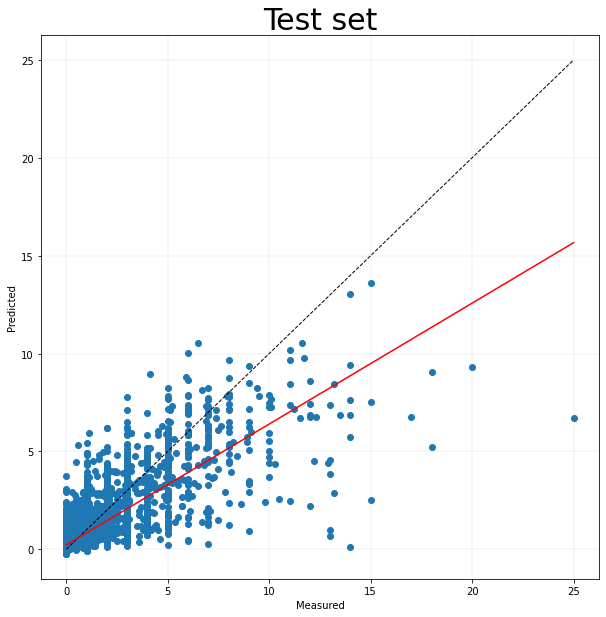

[0.61758145 0.222089  ]
RMSE
[0.82135137]
R2
0.6528312744422158


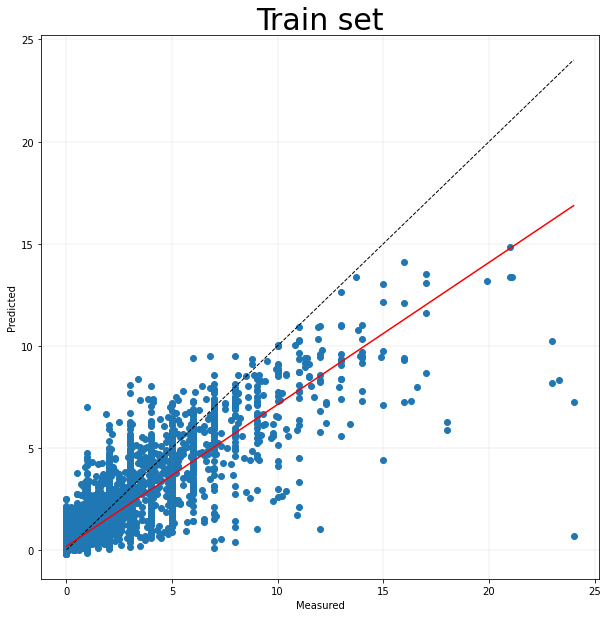

[0.69517642 0.17872838]
RMSE
[0.6805083]
R2
0.7664571106691324


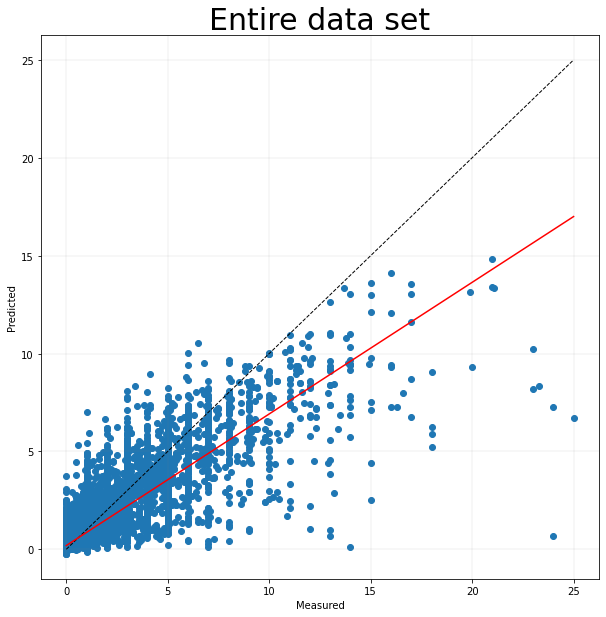

[0.67222739 0.19160262]
RMSE
[0.7256377]
R2
0.7328501102436231


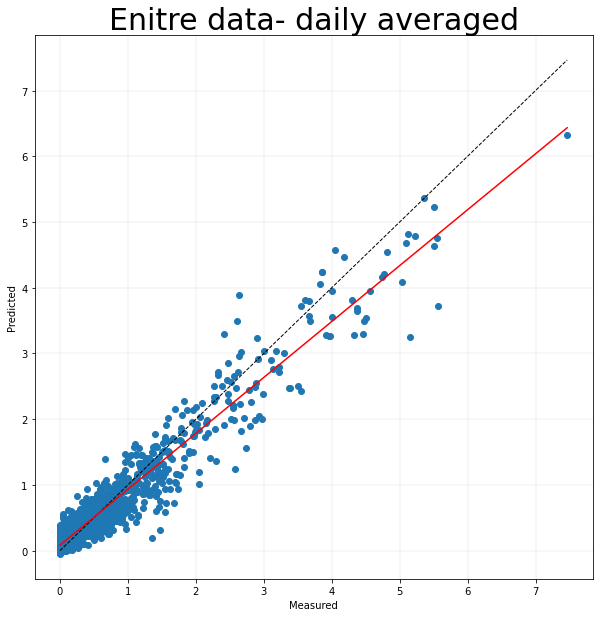

[0.85057304 0.0835367 ]
RMSE
[0.2449985]
R2
0.9187268093732168


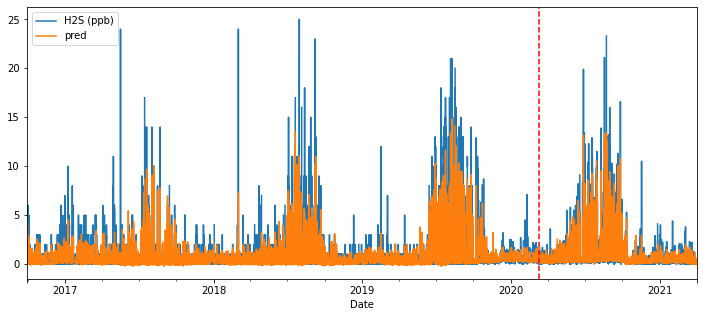

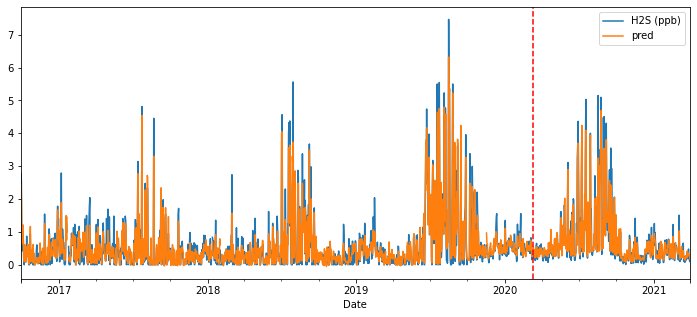

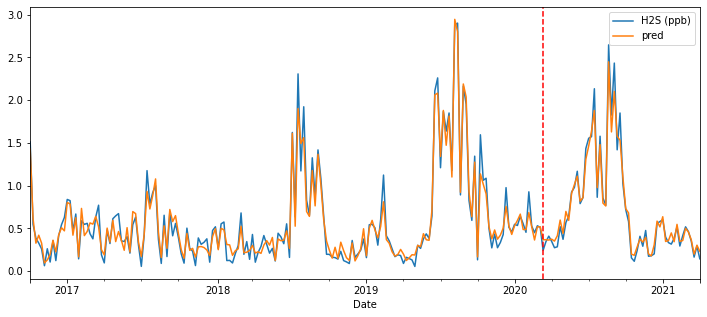

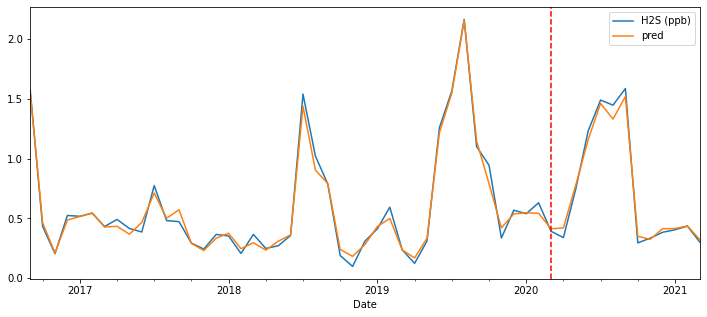

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10[aa]).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4

H2S (ppb)  T ( C) 45m  ...      trend      pred
Date                                        ...                     
2016-09-29 00:00:00        0.0         8.4  ...  16.743169  0.192592
2016-09-29 01:00:00        0.0         8.2  ...  16.743283  0.290502
2016-09-29 02:00:00        0.0         7.9  ...  16.743397  0.227085
2016-09-29 03:00:00        0.0         8.1  ...  16.743511  0.107625
2016-09-29 04:00:00        0.0         7.6  ...  16.743625  0.128617
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.2         8.7  ...  21.245332  0.143598
2021-03-31 20:00:00        0.1         7.4  ...  21.245446  0.124726
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  0.090650
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  0.119731
2021-03-31 23:00:00        0.1         5.2  ...  21.245788  0.139037

[37433 rows x 15 columns]

In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_H2S_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_H2S_Test.csv')

[0.6805083]
0.7664571106691324
[0.82135137]
0.6528312744422158


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

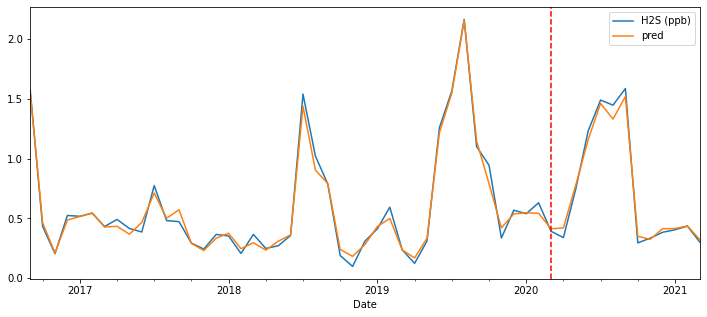

In [ ]:
df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Streaming output truncated to the last 5000 lines.
130
0.42854180932044983
2021-01-20 01:00:00
127
0.4218733310699463
2021-01-20 02:00:00
124
0.41077712178230286
2021-01-20 03:00:00
125
0.44744277000427246
2021-01-20 04:00:00
125
0.45628347992897034
2021-01-20 05:00:00
122
0.4614914059638977
2021-01-20 07:00:00
125
0.47459903359413147
2021-01-20 08:00:00
125
0.467266321182251
2021-01-20 09:00:00
125
0.4785124957561493
2021-01-20 10:00:00
124
0.4797775149345398
2021-01-20 11:00:00
122
0.4296896755695343
2021-01-20 14:00:00
129
0.3939533531665802
2021-01-20 15:00:00
133
0.41029995679855347
2021-01-20 16:00:00
134
0.4342043399810791
2021-01-20 17:00:00
135
0.44441890716552734
2021-01-20 18:00:00
134
0.447653591632843
2021-01-20 19:00:00
133
0.4514304995536804
2021-01-20 20:00:00
132
0.4710327684879303
2021-01-20 22:00:00
130
0.44215306639671326
2021-01-20 23:00:00
130
0.42919087409973145
2021-01-21 00:00:00
127
0.4120233952999115
2021-01-21 01:00:00
127
0.4285634160041809
2021-01-21 02:00

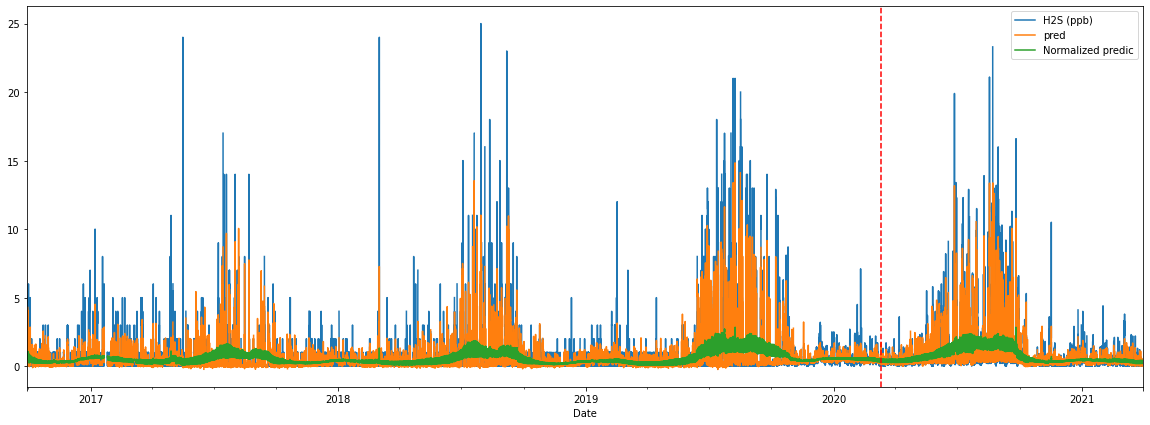

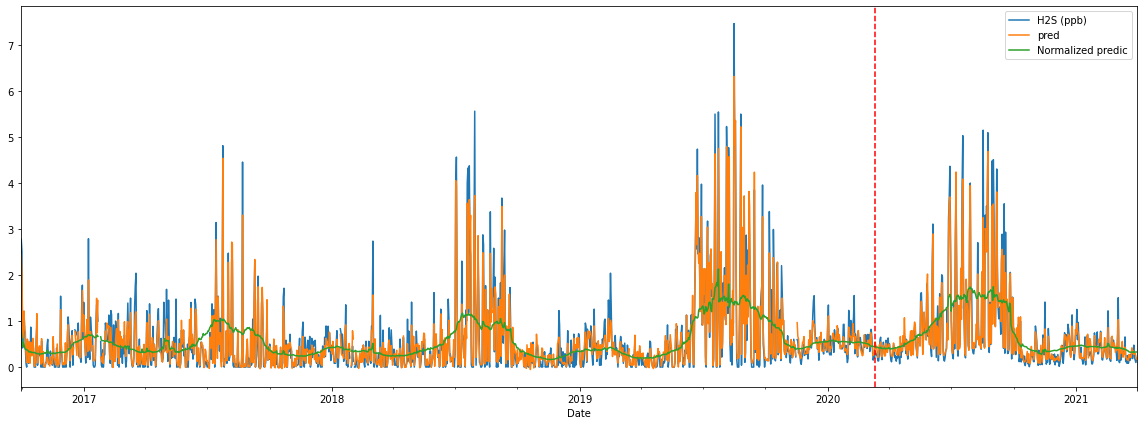

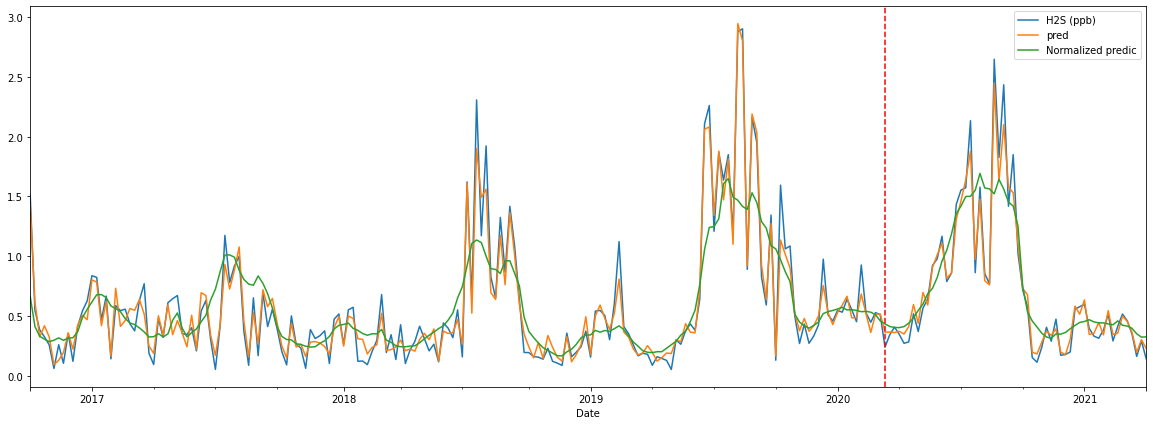

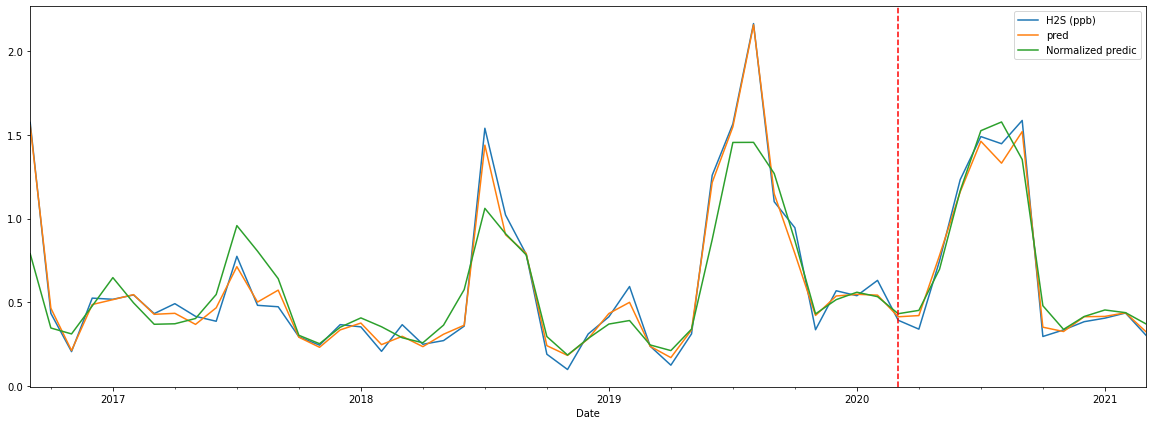

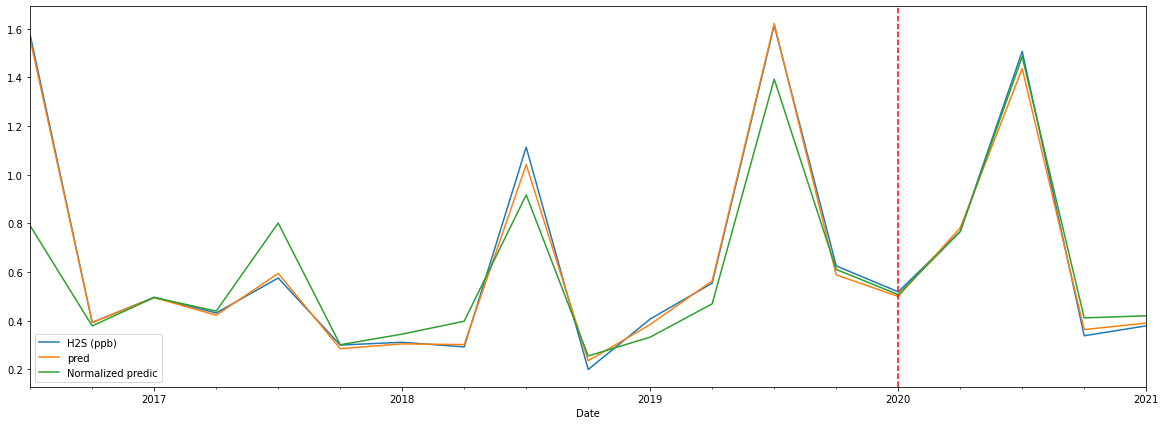

In [ ]:
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()

df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_H2S_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_H2S_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_H2S_Monthly_normalized_pred.csv')


for i in ['H', 'D', 'W', 'M', 'Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
##################################################################################################NN

In [ ]:
best_params["score"]

15.140855823856924

In [ ]:
df1_w

H2S (ppb)  T ( C) 45m  ...      trend     score
Date                                        ...                     
2016-09-29 00:00:00        0.0         8.4  ...  16.743169  3.828571
2016-09-29 01:00:00        0.0         8.2  ...  16.743283  4.474490
2016-09-29 02:00:00        0.0         7.9  ...  16.743397  3.540439
2016-09-29 03:00:00        0.0         8.1  ...  16.743511  3.252960
2016-09-29 04:00:00        0.0         7.6  ...  16.743625  3.154318
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.2         8.7  ...  21.245332  3.886580
2021-03-31 20:00:00        0.1         7.4  ...  21.245446  4.873626
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  4.822360
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  5.053360
2021-03-31 23:00:00        0.1         5.2  ...  21.245788  2.613294

[38435 rows x 15 columns]

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.667904022455251 4.0508945128409435


In [ ]:
df1_w.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs

        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1
    def __call__(self, trial):        
       
        dict_params = {
                        'score' : trial.suggest_float( 'score', avg + 2 * std, avg + 5 * std ),
                        'delta': trial.suggest_float(  'delta',40, 100),
                        'layers': trial.suggest_int('layers', 2,3),
                       'alpha': trial.suggest_float('alpha', 0.01,0.9),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                       'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 30,40),
                       'learning_rate': trial.suggest_float( 'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  

        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 5,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.3)
        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.3)

        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn[aa]
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array(  self.df_nn[  self.df_nn.columns[1:]])
        self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

        maximum_epochs = 250
        early_stop_epochs= 60
        learning_rate_epochs = 30
        optimizer_direction = 'minimize'
        number_of_random_points = 30  # random searches to start opt process
        maximum_time = 8*60*60  # seconds
                  
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(dict_params['alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params['alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params['alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params['alpha'])) 

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss=
                      # 'mse',
                      tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/MANIX_H2S_2l" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]

        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 


        print(acc)
        return acc    

In [ ]:
objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
study = optuna.create_study(direction=optimizer_direction, study_name='Mannix_2013_2layer_THC_OT', storage='sqlite:///Mannix_2015_THC_2layers_OT.db',
                            load_if_exists=True)
study.optimize(objective, n_trials=500)
df_results = study.trials_dataframe()
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/Mannix_SO2_2013_HP.csv') #ghabli
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_Mannix_H2S_HP_hourly_outlier.csv')

[I 2021-05-18 19:45:35,561] A new study created in RDB with name: Mannix_2013_2layer_THC_OT
[I 2021-05-18 19:47:05,503] Trial 0 finished with value: 1.539460443851301 and parameters: {'score': 15.725085909488522, 'delta': 86.08527978668813, 'layers': 2, 'alpha': 0.8226724232428446, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.06494567152387683, 'drop_out1': 0.17686799636462636, 'num_dense_nodes2': 34, 'drop_out2': 0.11051190098418771}. Best is trial 0 with value: 1.539460443851301.


1.539460443851301


[I 2021-05-18 19:48:37,785] Trial 1 finished with value: 0.9369953891990723 and parameters: {'score': 18.55024916142371, 'delta': 40.59513978564203, 'layers': 3, 'alpha': 0.2876324021599871, 'batchsize': 3100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.008157533080237658, 'drop_out1': 0.17132518772526528, 'num_dense_nodes2': 18, 'drop_out2': 0.17383230103317754, 'num_dense_nodes3': 40, 'drop_out3': 0.21967545356488144}. Best is trial 1 with value: 0.9369953891990723.


0.9369953891990723


[I 2021-05-18 19:50:52,180] Trial 2 finished with value: 1.444662647462198 and parameters: {'score': 16.28924436674583, 'delta': 91.30818420192739, 'layers': 2, 'alpha': 0.6699970705718835, 'batchsize': 1100.0, 'num_dense_nodes1': 31, 'learning_rate': 0.038564981051798154, 'drop_out1': 0.18761194581288576, 'num_dense_nodes2': 14, 'drop_out2': 0.2661691694425907}. Best is trial 1 with value: 0.9369953891990723.


1.444662647462198


[I 2021-05-18 20:03:34,862] Trial 3 finished with value: 0.9129657631596676 and parameters: {'score': 17.10173293248807, 'delta': 56.839879451209306, 'layers': 2, 'alpha': 0.09378993281492241, 'batchsize': 100.0, 'num_dense_nodes1': 30, 'learning_rate': 0.022819295560379198, 'drop_out1': 0.20740530627168124, 'num_dense_nodes2': 18, 'drop_out2': 0.11426833377367544}. Best is trial 3 with value: 0.9129657631596676.


0.9129657631596676


[I 2021-05-18 20:05:15,630] Trial 4 finished with value: 1.0588789128853424 and parameters: {'score': 19.24656424308002, 'delta': 56.316403081778475, 'layers': 2, 'alpha': 0.2310872775133492, 'batchsize': 2100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.014719062264340745, 'drop_out1': 0.14793725921088485, 'num_dense_nodes2': 5, 'drop_out2': 0.2645362291072146}. Best is trial 3 with value: 0.9129657631596676.


1.0588789128853424


[I 2021-05-18 20:07:32,231] Trial 5 finished with value: 1.0133972254951495 and parameters: {'score': 18.798319736017365, 'delta': 80.25869991247733, 'layers': 3, 'alpha': 0.2307360048405686, 'batchsize': 1100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.06393114519451393, 'drop_out1': 0.19970710011136217, 'num_dense_nodes2': 14, 'drop_out2': 0.12990533810820343, 'num_dense_nodes3': 10, 'drop_out3': 0.17728672428001002}. Best is trial 3 with value: 0.9129657631596676.


1.0133972254951495


[I 2021-05-18 20:09:42,982] Trial 6 finished with value: 1.0619308991174994 and parameters: {'score': 16.373457371426305, 'delta': 75.11332086878592, 'layers': 2, 'alpha': 0.46371158382719035, 'batchsize': 1100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.015922870159423976, 'drop_out1': 0.1795515096484217, 'num_dense_nodes2': 36, 'drop_out2': 0.07039472506252852}. Best is trial 3 with value: 0.9129657631596676.


1.0619308991174994


[I 2021-05-18 20:11:07,755] Trial 7 finished with value: 0.8690194351723366 and parameters: {'score': 19.144071706913405, 'delta': 47.67240844347037, 'layers': 3, 'alpha': 0.16264471798388175, 'batchsize': 4600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.04833874625006839, 'drop_out1': 0.22692256253234044, 'num_dense_nodes2': 28, 'drop_out2': 0.27590755415649026, 'num_dense_nodes3': 40, 'drop_out3': 0.19733448786252178}. Best is trial 7 with value: 0.8690194351723366.


0.8690194351723366


[I 2021-05-18 20:12:37,185] Trial 8 finished with value: 1.2180889404327033 and parameters: {'score': 16.766140485126574, 'delta': 48.066113089320496, 'layers': 3, 'alpha': 0.6965517859478352, 'batchsize': 3100.0, 'num_dense_nodes1': 31, 'learning_rate': 0.042470265231234545, 'drop_out1': 0.09817860826081114, 'num_dense_nodes2': 33, 'drop_out2': 0.08425489068799925, 'num_dense_nodes3': 11, 'drop_out3': 0.1909451441684722}. Best is trial 7 with value: 0.8690194351723366.


1.2180889404327033


[I 2021-05-18 20:14:01,819] Trial 9 finished with value: 0.9000369527250183 and parameters: {'score': 16.626707244682002, 'delta': 79.79679521607513, 'layers': 3, 'alpha': 0.1978863335258642, 'batchsize': 4600.0, 'num_dense_nodes1': 38, 'learning_rate': 0.06262180327034035, 'drop_out1': 0.29454928397818403, 'num_dense_nodes2': 23, 'drop_out2': 0.23074557747314028, 'num_dense_nodes3': 34, 'drop_out3': 0.09578559548403666}. Best is trial 7 with value: 0.8690194351723366.


0.9000369527250183


[I 2021-05-18 20:15:26,860] Trial 10 finished with value: 0.9856275430702899 and parameters: {'score': 23.460939694525727, 'delta': 62.770098453468904, 'layers': 3, 'alpha': 0.01835586757812596, 'batchsize': 4600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.09897269146866132, 'drop_out1': 0.275329151032364, 'num_dense_nodes2': 27, 'drop_out2': 0.29822978718824883, 'num_dense_nodes3': 27, 'drop_out3': 0.29775057111544034}. Best is trial 7 with value: 0.8690194351723366.


0.9856275430702899


[I 2021-05-18 20:16:51,693] Trial 11 finished with value: 1.0121189365928445 and parameters: {'score': 22.502394045572363, 'delta': 69.30467475657404, 'layers': 3, 'alpha': 0.41188461269947657, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.08674420757890909, 'drop_out1': 0.2954275007618916, 'num_dense_nodes2': 25, 'drop_out2': 0.22493851948910445, 'num_dense_nodes3': 39, 'drop_out3': 0.058724838299580445}. Best is trial 7 with value: 0.8690194351723366.


1.0121189365928445


[I 2021-05-18 20:18:18,341] Trial 12 finished with value: 0.8186538796611963 and parameters: {'score': 21.079824606197594, 'delta': 95.14688670092126, 'layers': 3, 'alpha': 0.09862464609378631, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'learning_rate': 0.06362464305072255, 'drop_out1': 0.253080439989864, 'num_dense_nodes2': 29, 'drop_out2': 0.21376129435462088, 'num_dense_nodes3': 31, 'drop_out3': 0.07829489843780778}. Best is trial 12 with value: 0.8186538796611963.


0.8186538796611963


[I 2021-05-18 20:19:42,715] Trial 13 finished with value: 0.9176170635992991 and parameters: {'score': 21.795199132234128, 'delta': 96.76696032233032, 'layers': 3, 'alpha': 0.0635056008076367, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'learning_rate': 0.0888442770038245, 'drop_out1': 0.2452788118176719, 'num_dense_nodes2': 40, 'drop_out2': 0.18715286790602004, 'num_dense_nodes3': 29, 'drop_out3': 0.12170389087736157}. Best is trial 12 with value: 0.8186538796611963.


0.9176170635992991


[I 2021-05-18 20:21:10,764] Trial 14 finished with value: 1.0552077349324716 and parameters: {'score': 25.602231039889343, 'delta': 99.6380889105651, 'layers': 3, 'alpha': 0.40656922607073337, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.05260926114188699, 'drop_out1': 0.24562840295259458, 'num_dense_nodes2': 29, 'drop_out2': 0.28767745788298893, 'num_dense_nodes3': 22, 'drop_out3': 0.25356722390820174}. Best is trial 12 with value: 0.8186538796611963.


1.0552077349324716


[I 2021-05-18 20:22:36,908] Trial 15 finished with value: 0.841062327876043 and parameters: {'score': 13.857463125640225, 'delta': 40.230004710291375, 'layers': 3, 'alpha': 0.01292387673122708, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'learning_rate': 0.07529571970230352, 'drop_out1': 0.24018209149676023, 'num_dense_nodes2': 30, 'drop_out2': 0.22000827456770608, 'num_dense_nodes3': 35, 'drop_out3': 0.13927985815549093}. Best is trial 12 with value: 0.8186538796611963.


0.841062327876043


[I 2021-05-18 20:24:20,228] Trial 16 finished with value: 0.8932885427579885 and parameters: {'score': 21.332309528764547, 'delta': 40.867864250592376, 'layers': 3, 'alpha': 0.0238843197202116, 'batchsize': 2100.0, 'num_dense_nodes1': 38, 'learning_rate': 0.08029073794922534, 'drop_out1': 0.2581223743284863, 'num_dense_nodes2': 40, 'drop_out2': 0.19311711905398912, 'num_dense_nodes3': 19, 'drop_out3': 0.12641588654106722}. Best is trial 12 with value: 0.8186538796611963.


0.8932885427579885


[I 2021-05-18 20:25:47,952] Trial 17 finished with value: 0.822644889422405 and parameters: {'score': 14.062998395306117, 'delta': 68.85218100891505, 'layers': 3, 'alpha': 0.32908118081862975, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'learning_rate': 0.07219060765847987, 'drop_out1': 0.056526152950487074, 'num_dense_nodes2': 31, 'drop_out2': 0.22559696076423727, 'num_dense_nodes3': 32, 'drop_out3': 0.06564573235180687}. Best is trial 12 with value: 0.8186538796611963.


0.822644889422405


[I 2021-05-18 20:27:14,929] Trial 18 finished with value: 0.865436928742211 and parameters: {'score': 13.8505266910317, 'delta': 68.16598548844303, 'layers': 3, 'alpha': 0.36434576019713966, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.06934210334135832, 'drop_out1': 0.05051960976253695, 'num_dense_nodes2': 37, 'drop_out2': 0.15383187955394714, 'num_dense_nodes3': 29, 'drop_out3': 0.05411691617660107}. Best is trial 12 with value: 0.8186538796611963.


0.865436928742211


[I 2021-05-18 20:28:50,483] Trial 19 finished with value: 1.148562668007728 and parameters: {'score': 20.752363163590914, 'delta': 89.36230733200956, 'layers': 3, 'alpha': 0.5647872262073312, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'learning_rate': 0.0967251353481281, 'drop_out1': 0.11515466585805981, 'num_dense_nodes2': 32, 'drop_out2': 0.2394243528976076, 'num_dense_nodes3': 35, 'drop_out3': 0.06928474303360045}. Best is trial 12 with value: 0.8186538796611963.


1.148562668007728


[I 2021-05-18 20:30:18,511] Trial 20 finished with value: 0.7428695624622978 and parameters: {'score': 24.642408194965213, 'delta': 61.57764219787886, 'layers': 3, 'alpha': 0.15185877494988603, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'learning_rate': 0.05541579417335015, 'drop_out1': 0.06799415709341868, 'num_dense_nodes2': 19, 'drop_out2': 0.20286401334649776, 'num_dense_nodes3': 26, 'drop_out3': 0.08797045505080636}. Best is trial 20 with value: 0.7428695624622978.


0.7428695624622978


[I 2021-05-18 20:31:44,450] Trial 21 finished with value: 0.8897970741598394 and parameters: {'score': 25.79063239494394, 'delta': 63.282677776043414, 'layers': 3, 'alpha': 0.31328187277506614, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'learning_rate': 0.05465692954200549, 'drop_out1': 0.05110727804774309, 'num_dense_nodes2': 20, 'drop_out2': 0.20716731521859016, 'num_dense_nodes3': 26, 'drop_out3': 0.08882881469780832}. Best is trial 20 with value: 0.7428695624622978.


0.8897970741598394


[I 2021-05-18 20:33:09,521] Trial 22 finished with value: 0.7849445625588817 and parameters: {'score': 24.134504677619788, 'delta': 62.01904227594734, 'layers': 3, 'alpha': 0.14235540734742422, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.03611725975928794, 'drop_out1': 0.08105029600910482, 'num_dense_nodes2': 13, 'drop_out2': 0.159985060973259, 'num_dense_nodes3': 18, 'drop_out3': 0.09065632768263795}. Best is trial 20 with value: 0.7428695624622978.


0.7849445625588817


[I 2021-05-18 20:34:35,865] Trial 23 finished with value: 0.889750432833651 and parameters: {'score': 24.16376317698875, 'delta': 55.57714782921046, 'layers': 3, 'alpha': 0.12179380777913057, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.032594146614695785, 'drop_out1': 0.0865388179425108, 'num_dense_nodes2': 7, 'drop_out2': 0.1607478553193386, 'num_dense_nodes3': 16, 'drop_out3': 0.09868537272087283}. Best is trial 20 with value: 0.7428695624622978.


0.889750432833651


[I 2021-05-18 20:36:03,863] Trial 24 finished with value: 0.8029224064183029 and parameters: {'score': 24.551524870356545, 'delta': 61.66336268084155, 'layers': 3, 'alpha': 0.1287117440915772, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.03468498377900639, 'drop_out1': 0.07761128837876409, 'num_dense_nodes2': 11, 'drop_out2': 0.14641399313499226, 'num_dense_nodes3': 23, 'drop_out3': 0.1424598057950982}. Best is trial 20 with value: 0.7428695624622978.


0.8029224064183029


[I 2021-05-18 20:37:42,860] Trial 25 finished with value: 0.832293244158859 and parameters: {'score': 24.48629318918004, 'delta': 62.226281331209066, 'layers': 3, 'alpha': 0.16391327665789154, 'batchsize': 2600.0, 'num_dense_nodes1': 37, 'learning_rate': 0.02794594025677586, 'drop_out1': 0.08771033570013265, 'num_dense_nodes2': 10, 'drop_out2': 0.13938853485519548, 'num_dense_nodes3': 17, 'drop_out3': 0.1274615182861905}. Best is trial 20 with value: 0.7428695624622978.


0.832293244158859


[I 2021-05-18 20:39:10,272] Trial 26 finished with value: 0.8720808844640974 and parameters: {'score': 24.597321746666058, 'delta': 51.70503553864737, 'layers': 3, 'alpha': 0.2652990513482878, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.037845974662483274, 'drop_out1': 0.12189086601141987, 'num_dense_nodes2': 13, 'drop_out2': 0.1681172567675087, 'num_dense_nodes3': 23, 'drop_out3': 0.15389979515603783}. Best is trial 20 with value: 0.7428695624622978.


0.8720808844640974


[I 2021-05-18 20:40:40,176] Trial 27 finished with value: 0.8191432759090665 and parameters: {'score': 23.293718637928894, 'delta': 60.72028427097311, 'layers': 3, 'alpha': 0.15580752809291948, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.04699434969223551, 'drop_out1': 0.06835849044274644, 'num_dense_nodes2': 10, 'drop_out2': 0.14267676135546886, 'num_dense_nodes3': 13, 'drop_out3': 0.1558341687029507}. Best is trial 20 with value: 0.7428695624622978.


0.8191432759090665


[I 2021-05-18 20:42:06,848] Trial 28 finished with value: 1.036557268563643 and parameters: {'score': 25.178326517668015, 'delta': 76.00661696695308, 'layers': 3, 'alpha': 0.5014289219854506, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'learning_rate': 0.02958882957129195, 'drop_out1': 0.07234487369375266, 'num_dense_nodes2': 16, 'drop_out2': 0.19148437801514093, 'num_dense_nodes3': 22, 'drop_out3': 0.10850323932138312}. Best is trial 20 with value: 0.7428695624622978.


1.036557268563643


[I 2021-05-18 20:43:41,304] Trial 29 finished with value: 0.8202133569161696 and parameters: {'score': 23.408224602641596, 'delta': 65.7308172312463, 'layers': 2, 'alpha': 0.076953730914701, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'learning_rate': 0.05694692323674641, 'drop_out1': 0.13126494633410793, 'num_dense_nodes2': 10, 'drop_out2': 0.08564420552726568}. Best is trial 20 with value: 0.7428695624622978.


0.8202133569161696


[I 2021-05-18 20:45:12,867] Trial 30 finished with value: 0.8002739309756576 and parameters: {'score': 22.405460493005517, 'delta': 53.161897952774154, 'layers': 3, 'alpha': 0.22631126494810289, 'batchsize': 3100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.020526090357504377, 'drop_out1': 0.10475538624362908, 'num_dense_nodes2': 21, 'drop_out2': 0.11829854572577338, 'num_dense_nodes3': 25, 'drop_out3': 0.1533925907847286}. Best is trial 20 with value: 0.7428695624622978.


0.8002739309756576


[I 2021-05-18 20:46:46,541] Trial 31 finished with value: 0.8911698122414975 and parameters: {'score': 22.50930811324796, 'delta': 50.852706582294374, 'layers': 3, 'alpha': 0.21007730025571428, 'batchsize': 3100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.004853643290359373, 'drop_out1': 0.09836988408084452, 'num_dense_nodes2': 21, 'drop_out2': 0.10896757792856805, 'num_dense_nodes3': 5, 'drop_out3': 0.15121378703524416}. Best is trial 20 with value: 0.7428695624622978.


0.8911698122414975


[I 2021-05-18 20:48:14,370] Trial 32 finished with value: 0.8398967455527324 and parameters: {'score': 24.844685469479593, 'delta': 59.32696668369986, 'layers': 3, 'alpha': 0.2660295849555387, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.02161183907989459, 'drop_out1': 0.06836118230562058, 'num_dense_nodes2': 17, 'drop_out2': 0.1328170942456288, 'num_dense_nodes3': 25, 'drop_out3': 0.10712178482546428}. Best is trial 20 with value: 0.7428695624622978.


0.8398967455527324


[I 2021-05-18 20:49:44,648] Trial 33 finished with value: 0.8734120721361294 and parameters: {'score': 23.798914449717905, 'delta': 53.06981456022717, 'layers': 3, 'alpha': 0.1351119242351078, 'batchsize': 3100.0, 'num_dense_nodes1': 33, 'learning_rate': 0.03515263949494306, 'drop_out1': 0.152331335151208, 'num_dense_nodes2': 12, 'drop_out2': 0.1122021448687304, 'num_dense_nodes3': 19, 'drop_out3': 0.1706572453732882}. Best is trial 20 with value: 0.7428695624622978.


0.8734120721361294


[I 2021-05-18 20:51:13,409] Trial 34 finished with value: 1.6655164410970005 and parameters: {'score': 22.507787540608575, 'delta': 46.46114328000321, 'layers': 3, 'alpha': 0.8919789335668278, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.041143517699603095, 'drop_out1': 0.11028937306417143, 'num_dense_nodes2': 19, 'drop_out2': 0.18028865656757764, 'num_dense_nodes3': 24, 'drop_out3': 0.12096796669032005}. Best is trial 20 with value: 0.7428695624622978.


1.6655164410970005


[I 2021-05-18 20:52:52,076] Trial 35 finished with value: 0.7507014489956642 and parameters: {'score': 25.266232517768017, 'delta': 72.06736479779124, 'layers': 3, 'alpha': 0.05706261014671804, 'batchsize': 2600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.02385186395211359, 'drop_out1': 0.08560381869573677, 'num_dense_nodes2': 22, 'drop_out2': 0.15125899555801303, 'num_dense_nodes3': 20, 'drop_out3': 0.08220564606161532}. Best is trial 20 with value: 0.7428695624622978.


0.7507014489956642


[I 2021-05-18 20:54:37,998] Trial 36 finished with value: 0.8525766977738481 and parameters: {'score': 20.305637859036942, 'delta': 75.23005578164496, 'layers': 2, 'alpha': 0.054496815631305484, 'batchsize': 2100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.011021684103992568, 'drop_out1': 0.1403431230359591, 'num_dense_nodes2': 23, 'drop_out2': 0.17259125706936496}. Best is trial 20 with value: 0.7428695624622978.


0.8525766977738481


[I 2021-05-18 20:56:36,592] Trial 37 finished with value: 0.8097701052224895 and parameters: {'score': 25.390403994422332, 'delta': 65.78772367839304, 'layers': 3, 'alpha': 0.1998079462601138, 'batchsize': 1600.0, 'num_dense_nodes1': 33, 'learning_rate': 0.02202892307826267, 'drop_out1': 0.10087186842470446, 'num_dense_nodes2': 25, 'drop_out2': 0.12306642947993739, 'num_dense_nodes3': 18, 'drop_out3': 0.08275724610001299}. Best is trial 20 with value: 0.7428695624622978.


0.8097701052224895


[I 2021-05-18 20:58:21,502] Trial 38 finished with value: 0.9840805535066424 and parameters: {'score': 18.101701718121028, 'delta': 71.9430225344389, 'layers': 3, 'alpha': 0.2606436430067646, 'batchsize': 2600.0, 'num_dense_nodes1': 33, 'learning_rate': 0.0012084421462375122, 'drop_out1': 0.16011737013162042, 'num_dense_nodes2': 15, 'drop_out2': 0.09753450032195637, 'num_dense_nodes3': 15, 'drop_out3': 0.052451627528833665}. Best is trial 20 with value: 0.7428695624622978.


0.9840805535066424


[I 2021-05-18 20:59:52,121] Trial 39 finished with value: 0.8168870431429719 and parameters: {'score': 25.897528350892447, 'delta': 57.56997979106145, 'layers': 2, 'alpha': 0.061080649693928, 'batchsize': 3100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.014423317978667902, 'drop_out1': 0.05963848657861438, 'num_dense_nodes2': 21, 'drop_out2': 0.15960107823149486}. Best is trial 20 with value: 0.7428695624622978.


0.8168870431429719


[I 2021-05-18 21:01:34,206] Trial 40 finished with value: 0.8253306015553543 and parameters: {'score': 22.826551192778272, 'delta': 80.96538953466134, 'layers': 3, 'alpha': 0.18986925926205564, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.025256325927892093, 'drop_out1': 0.08259832071535915, 'num_dense_nodes2': 18, 'drop_out2': 0.056198342517251934, 'num_dense_nodes3': 21, 'drop_out3': 0.2189092555392347}. Best is trial 20 with value: 0.7428695624622978.


0.8253306015553543


[I 2021-05-18 21:03:06,728] Trial 41 finished with value: 0.8314126377504585 and parameters: {'score': 24.1562508986463, 'delta': 54.79757690584111, 'layers': 3, 'alpha': 0.11558118153297711, 'batchsize': 3100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.0448235753801831, 'drop_out1': 0.08044163366451369, 'num_dense_nodes2': 7, 'drop_out2': 0.14956823093547206, 'num_dense_nodes3': 20, 'drop_out3': 0.1397128110913582}. Best is trial 20 with value: 0.7428695624622978.


0.8314126377504585


[I 2021-05-18 21:05:06,952] Trial 42 finished with value: 0.7917354676080658 and parameters: {'score': 21.97117970481178, 'delta': 72.27981971869934, 'layers': 3, 'alpha': 0.01071190862300031, 'batchsize': 1600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.01792208220962998, 'drop_out1': 0.10530703177910777, 'num_dense_nodes2': 25, 'drop_out2': 0.24738970496857346, 'num_dense_nodes3': 24, 'drop_out3': 0.17563410132151364}. Best is trial 20 with value: 0.7428695624622978.


0.7917354676080658


[I 2021-05-18 21:19:01,532] Trial 43 finished with value: 0.8655541284108068 and parameters: {'score': 21.96116082723335, 'delta': 71.20370350726554, 'layers': 3, 'alpha': 0.01048118638948295, 'batchsize': 100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.018633253821103715, 'drop_out1': 0.1072221639502993, 'num_dense_nodes2': 25, 'drop_out2': 0.24998526115877043, 'num_dense_nodes3': 28, 'drop_out3': 0.19231732722818645}. Best is trial 20 with value: 0.7428695624622978.


0.8655541284108068


[I 2021-05-18 21:22:24,580] Trial 44 finished with value: 0.8101101043779615 and parameters: {'score': 19.647091692959794, 'delta': 65.39904082861214, 'layers': 3, 'alpha': 0.08663687328791775, 'batchsize': 600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.0052889679074782925, 'drop_out1': 0.12401993888994846, 'num_dense_nodes2': 22, 'drop_out2': 0.25683824360298635, 'num_dense_nodes3': 25, 'drop_out3': 0.21289881109452763}. Best is trial 20 with value: 0.7428695624622978.


0.8101101043779615


[I 2021-05-18 21:24:23,516] Trial 45 finished with value: 0.7416171838450474 and parameters: {'score': 23.026118442428285, 'delta': 73.17583981333652, 'layers': 3, 'alpha': 0.04328730261032779, 'batchsize': 1600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.011543606467588835, 'drop_out1': 0.09398139225952237, 'num_dense_nodes2': 27, 'drop_out2': 0.12473493140426031, 'num_dense_nodes3': 14, 'drop_out3': 0.23821791186055968}. Best is trial 45 with value: 0.7416171838450474.


0.7416171838450474


[I 2021-05-18 21:26:21,949] Trial 46 finished with value: 0.7823214834992165 and parameters: {'score': 23.29528438672285, 'delta': 81.82303437634316, 'layers': 3, 'alpha': 0.0373821798691402, 'batchsize': 1600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.011118185060549986, 'drop_out1': 0.09247984381165435, 'num_dense_nodes2': 24, 'drop_out2': 0.20887774241075066, 'num_dense_nodes3': 10, 'drop_out3': 0.253608918565292}. Best is trial 45 with value: 0.7416171838450474.


0.7823214834992165


[I 2021-05-18 21:28:20,012] Trial 47 finished with value: 0.7316212802107714 and parameters: {'score': 23.817325953446275, 'delta': 84.52236095667625, 'layers': 3, 'alpha': 0.041506571920835636, 'batchsize': 1600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.011973160177277273, 'drop_out1': 0.09084461444133521, 'num_dense_nodes2': 27, 'drop_out2': 0.20004719602491933, 'num_dense_nodes3': 8, 'drop_out3': 0.24794925494527342}. Best is trial 47 with value: 0.7316212802107714.


0.7316212802107714


[I 2021-05-18 21:30:18,768] Trial 48 finished with value: 0.7856216472224351 and parameters: {'score': 23.171065309004916, 'delta': 84.48326680978174, 'layers': 3, 'alpha': 0.05880156234062833, 'batchsize': 1600.0, 'num_dense_nodes1': 32, 'learning_rate': 0.010703901145474861, 'drop_out1': 0.08836644636337021, 'num_dense_nodes2': 27, 'drop_out2': 0.2065700885351296, 'num_dense_nodes3': 7, 'drop_out3': 0.2571458624957861}. Best is trial 47 with value: 0.7316212802107714.


0.7856216472224351


[I 2021-05-18 21:32:38,440] Trial 49 finished with value: 1.3850151762906262 and parameters: {'score': 25.199377597841217, 'delta': 83.84096658814619, 'layers': 3, 'alpha': 0.7422596107413815, 'batchsize': 1100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.007110307772446794, 'drop_out1': 0.06273058784514085, 'num_dense_nodes2': 27, 'drop_out2': 0.20272194422787918, 'num_dense_nodes3': 9, 'drop_out3': 0.2518945933739205}. Best is trial 47 with value: 0.7316212802107714.


1.3850151762906262


[I 2021-05-18 21:34:57,022] Trial 50 finished with value: 0.7830561764073708 and parameters: {'score': 23.797210867600008, 'delta': 78.72793790868927, 'layers': 3, 'alpha': 0.030551576748584806, 'batchsize': 1100.0, 'num_dense_nodes1': 33, 'learning_rate': 0.013524831287817472, 'drop_out1': 0.09318035556130569, 'num_dense_nodes2': 35, 'drop_out2': 0.19743889615396354, 'num_dense_nodes3': 12, 'drop_out3': 0.2736477596507736}. Best is trial 47 with value: 0.7316212802107714.


0.7830561764073708


[I 2021-05-18 21:37:17,785] Trial 51 finished with value: 0.7787304181707999 and parameters: {'score': 23.71202965182122, 'delta': 78.14604528903533, 'layers': 3, 'alpha': 0.03493006378271137, 'batchsize': 1100.0, 'num_dense_nodes1': 30, 'learning_rate': 0.0135991253418518, 'drop_out1': 0.0949376838824674, 'num_dense_nodes2': 35, 'drop_out2': 0.19607246905103087, 'num_dense_nodes3': 11, 'drop_out3': 0.28297559056000365}. Best is trial 47 with value: 0.7316212802107714.


0.7787304181707999


[I 2021-05-18 21:39:17,680] Trial 52 finished with value: 0.952510830601865 and parameters: {'score': 24.97265074517299, 'delta': 88.75665072889143, 'layers': 3, 'alpha': 0.04007597260765889, 'batchsize': 1600.0, 'num_dense_nodes1': 30, 'learning_rate': 0.0010691279468703838, 'drop_out1': 0.11869459380399738, 'num_dense_nodes2': 23, 'drop_out2': 0.18223294942679455, 'num_dense_nodes3': 9, 'drop_out3': 0.2869088972677782}. Best is trial 47 with value: 0.7316212802107714.


0.952510830601865


[I 2021-05-18 21:42:36,401] Trial 53 finished with value: 0.854925519508244 and parameters: {'score': 23.65610236029991, 'delta': 82.00552144827122, 'layers': 3, 'alpha': 0.09986971682916834, 'batchsize': 600.0, 'num_dense_nodes1': 32, 'learning_rate': 0.010850515947782479, 'drop_out1': 0.13347577997212118, 'num_dense_nodes2': 37, 'drop_out2': 0.23297469506148374, 'num_dense_nodes3': 14, 'drop_out3': 0.24136546885412732}. Best is trial 47 with value: 0.7316212802107714.


0.854925519508244


[I 2021-05-18 21:44:58,995] Trial 54 finished with value: 0.9325633129974991 and parameters: {'score': 22.890564486445687, 'delta': 78.41795636509825, 'layers': 3, 'alpha': 0.08993946910778777, 'batchsize': 1100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.0014130551306889942, 'drop_out1': 0.19471701448703224, 'num_dense_nodes2': 33, 'drop_out2': 0.21361351115318156, 'num_dense_nodes3': 6, 'drop_out3': 0.23132298983323402}. Best is trial 47 with value: 0.7316212802107714.


0.9325633129974991


[I 2021-05-18 21:48:16,260] Trial 55 finished with value: 0.7941291532767097 and parameters: {'score': 21.610861076415098, 'delta': 86.9346266390727, 'layers': 3, 'alpha': 0.021198669596826307, 'batchsize': 600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.02577289882037985, 'drop_out1': 0.0736681274135247, 'num_dense_nodes2': 24, 'drop_out2': 0.2160368547208679, 'num_dense_nodes3': 9, 'drop_out3': 0.2735743215401414}. Best is trial 47 with value: 0.7316212802107714.


0.7941291532767097


[I 2021-05-18 21:50:01,076] Trial 56 finished with value: 0.8149152256755108 and parameters: {'score': 24.10377220669312, 'delta': 77.07910341416161, 'layers': 3, 'alpha': 0.1745489627789285, 'batchsize': 2100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.06085062429678029, 'drop_out1': 0.09226915158834581, 'num_dense_nodes2': 28, 'drop_out2': 0.16901973075782958, 'num_dense_nodes3': 11, 'drop_out3': 0.2994317372125952}. Best is trial 47 with value: 0.7316212802107714.


0.8149152256755108


[I 2021-05-18 21:51:58,270] Trial 57 finished with value: 0.7851935013760315 and parameters: {'score': 25.886052193619882, 'delta': 73.53886711561034, 'layers': 3, 'alpha': 0.05074552411005115, 'batchsize': 1600.0, 'num_dense_nodes1': 30, 'learning_rate': 0.01594205743376489, 'drop_out1': 0.05785822643516732, 'num_dense_nodes2': 30, 'drop_out2': 0.18653531531790057, 'num_dense_nodes3': 7, 'drop_out3': 0.26862990615983795}. Best is trial 47 with value: 0.7316212802107714.


0.7851935013760315


[I 2021-05-18 21:53:45,089] Trial 58 finished with value: 0.9066114754456178 and parameters: {'score': 22.937421918603732, 'delta': 92.24884691204994, 'layers': 3, 'alpha': 0.08681696038639203, 'batchsize': 2100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.00889092094722155, 'drop_out1': 0.21782088304262232, 'num_dense_nodes2': 19, 'drop_out2': 0.2001793772663936, 'num_dense_nodes3': 11, 'drop_out3': 0.2859346323433333}. Best is trial 47 with value: 0.7316212802107714.


0.9066114754456178


[I 2021-05-18 21:55:41,023] Trial 59 finished with value: 0.7857915378875322 and parameters: {'score': 14.748165718749139, 'delta': 83.35608017824784, 'layers': 3, 'alpha': 0.01823922552801571, 'batchsize': 1600.0, 'num_dense_nodes1': 31, 'learning_rate': 0.05044892373919734, 'drop_out1': 0.17109161740848688, 'num_dense_nodes2': 26, 'drop_out2': 0.17902962903604008, 'num_dense_nodes3': 13, 'drop_out3': 0.23001956254606862}. Best is trial 47 with value: 0.7316212802107714.


0.7857915378875322


[I 2021-05-18 21:58:08,166] Trial 60 finished with value: 1.2290477554410615 and parameters: {'score': 24.750545538860944, 'delta': 67.88459176411456, 'layers': 3, 'alpha': 0.6116168293667616, 'batchsize': 1100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.0054388538219050184, 'drop_out1': 0.09828356979266717, 'num_dense_nodes2': 31, 'drop_out2': 0.22553092513820067, 'num_dense_nodes3': 8, 'drop_out3': 0.26097561648468354}. Best is trial 47 with value: 0.7316212802107714.


1.2290477554410615


[I 2021-05-18 22:00:34,246] Trial 61 finished with value: 0.8198796466506035 and parameters: {'score': 23.927165489145125, 'delta': 79.10878593065098, 'layers': 3, 'alpha': 0.03575127435679454, 'batchsize': 1100.0, 'num_dense_nodes1': 32, 'learning_rate': 0.015043076198420699, 'drop_out1': 0.09272974637048739, 'num_dense_nodes2': 35, 'drop_out2': 0.1905017380951892, 'num_dense_nodes3': 12, 'drop_out3': 0.2858172293120938}. Best is trial 47 with value: 0.7316212802107714.


0.8198796466506035


[I 2021-05-18 22:02:54,840] Trial 62 finished with value: 0.7875336586016841 and parameters: {'score': 23.519053793187766, 'delta': 74.1138201306264, 'layers': 3, 'alpha': 0.11997638652516186, 'batchsize': 1100.0, 'num_dense_nodes1': 33, 'learning_rate': 0.014288962877990459, 'drop_out1': 0.11240313472858174, 'num_dense_nodes2': 39, 'drop_out2': 0.20514140482301113, 'num_dense_nodes3': 10, 'drop_out3': 0.24224697293328085}. Best is trial 47 with value: 0.7316212802107714.


0.7875336586016841


[I 2021-05-18 22:06:10,251] Trial 63 finished with value: 0.7206410292452865 and parameters: {'score': 24.351480441617127, 'delta': 78.15695045555718, 'layers': 3, 'alpha': 0.013512876399485757, 'batchsize': 600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.011941729827282251, 'drop_out1': 0.06621318391976701, 'num_dense_nodes2': 38, 'drop_out2': 0.19741863904072107, 'num_dense_nodes3': 15, 'drop_out3': 0.2694376898332103}. Best is trial 63 with value: 0.7206410292452865.


0.7206410292452865


[I 2021-05-18 22:09:23,251] Trial 64 finished with value: 0.7041944857100918 and parameters: {'score': 24.383691142249575, 'delta': 80.9715442896649, 'layers': 3, 'alpha': 0.07021676959751724, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.00855228533063526, 'drop_out1': 0.06947258381123544, 'num_dense_nodes2': 39, 'drop_out2': 0.13388668993291022, 'num_dense_nodes3': 15, 'drop_out3': 0.24479023910564165}. Best is trial 64 with value: 0.7041944857100918.


0.7041944857100918


[I 2021-05-18 22:12:33,130] Trial 65 finished with value: 0.6865606175313461 and parameters: {'score': 24.339588352013376, 'delta': 76.66047270422523, 'layers': 3, 'alpha': 0.07100357968090294, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.018560148128258663, 'drop_out1': 0.052441494422131904, 'num_dense_nodes2': 38, 'drop_out2': 0.13891835796522883, 'num_dense_nodes3': 16, 'drop_out3': 0.2430385599406394}. Best is trial 65 with value: 0.6865606175313461.


0.6865606175313461


[I 2021-05-18 22:15:43,872] Trial 66 finished with value: 0.7508758342305053 and parameters: {'score': 25.489362539891147, 'delta': 86.00931205373615, 'layers': 3, 'alpha': 0.1542607867383694, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.024788799214882674, 'drop_out1': 0.0536903388326639, 'num_dense_nodes2': 39, 'drop_out2': 0.13323854792282486, 'num_dense_nodes3': 16, 'drop_out3': 0.2086951988236186}. Best is trial 65 with value: 0.6865606175313461.


0.7508758342305053


[I 2021-05-18 22:29:12,063] Trial 67 finished with value: 0.8620964810421877 and parameters: {'score': 24.273956198419746, 'delta': 76.81967272809435, 'layers': 3, 'alpha': 0.0769547529787339, 'batchsize': 100.0, 'num_dense_nodes1': 40, 'learning_rate': 0.03057428786235686, 'drop_out1': 0.06731363130246955, 'num_dense_nodes2': 38, 'drop_out2': 0.12931927764094972, 'num_dense_nodes3': 15, 'drop_out3': 0.2404208571230418}. Best is trial 65 with value: 0.6865606175313461.


0.8620964810421877


[I 2021-05-18 22:42:36,991] Trial 68 finished with value: 0.8124094023205906 and parameters: {'score': 25.015994148967245, 'delta': 70.29452386892203, 'layers': 3, 'alpha': 0.10777038751878398, 'batchsize': 100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.019490043200459273, 'drop_out1': 0.06342488749982313, 'num_dense_nodes2': 37, 'drop_out2': 0.15456405788285849, 'num_dense_nodes3': 17, 'drop_out3': 0.22908474127473907}. Best is trial 65 with value: 0.6865606175313461.


0.8124094023205906


[I 2021-05-18 22:45:44,885] Trial 69 finished with value: 0.9004829307810247 and parameters: {'score': 24.51743253379998, 'delta': 73.71032974638659, 'layers': 3, 'alpha': 0.14140080863336063, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.058030063582283596, 'drop_out1': 0.05116069075729245, 'num_dense_nodes2': 40, 'drop_out2': 0.10540246255300494, 'num_dense_nodes3': 20, 'drop_out3': 0.06611622586621085}. Best is trial 65 with value: 0.6865606175313461.


0.9004829307810247


[I 2021-05-18 22:48:53,488] Trial 70 finished with value: 0.7922181214159161 and parameters: {'score': 25.484394948178625, 'delta': 67.34845921712197, 'layers': 3, 'alpha': 0.06797207248032253, 'batchsize': 600.0, 'num_dense_nodes1': 39, 'learning_rate': 0.06723404337277043, 'drop_out1': 0.07586220282478946, 'num_dense_nodes2': 34, 'drop_out2': 0.1401545135659542, 'num_dense_nodes3': 15, 'drop_out3': 0.19949930280447814}. Best is trial 65 with value: 0.6865606175313461.


0.7922181214159161


[I 2021-05-18 22:52:02,253] Trial 71 finished with value: 0.7486016320670374 and parameters: {'score': 25.62324020772054, 'delta': 86.24924922302117, 'layers': 3, 'alpha': 0.16257168879925926, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.023511617089974984, 'drop_out1': 0.05327877915339087, 'num_dense_nodes2': 39, 'drop_out2': 0.12964553647298313, 'num_dense_nodes3': 17, 'drop_out3': 0.21295879288714242}. Best is trial 65 with value: 0.6865606175313461.


0.7486016320670374


[I 2021-05-18 23:05:27,140] Trial 72 finished with value: 0.835812800952655 and parameters: {'score': 24.705138287289163, 'delta': 91.29905136382962, 'layers': 3, 'alpha': 0.1822608353789469, 'batchsize': 100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.017459319760887486, 'drop_out1': 0.07182416638485975, 'num_dense_nodes2': 38, 'drop_out2': 0.12095450515046201, 'num_dense_nodes3': 17, 'drop_out3': 0.25008538601923275}. Best is trial 65 with value: 0.6865606175313461.


0.835812800952655


[I 2021-05-18 23:08:39,095] Trial 73 finished with value: 0.7959436485707718 and parameters: {'score': 25.72658899555436, 'delta': 80.14469850359559, 'layers': 3, 'alpha': 0.2193642297848019, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.0039051002274734115, 'drop_out1': 0.05168156745811397, 'num_dense_nodes2': 36, 'drop_out2': 0.09905280546122011, 'num_dense_nodes3': 19, 'drop_out3': 0.2369058713907597}. Best is trial 65 with value: 0.6865606175313461.


0.7959436485707718


[I 2021-05-18 23:22:02,261] Trial 74 finished with value: 0.7753559048006107 and parameters: {'score': 25.157583289596, 'delta': 75.91571716407647, 'layers': 3, 'alpha': 0.11174196691268663, 'batchsize': 100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.008336488195838487, 'drop_out1': 0.06399708279504444, 'num_dense_nodes2': 39, 'drop_out2': 0.1263198674694949, 'num_dense_nodes3': 14, 'drop_out3': 0.22190304768701374}. Best is trial 65 with value: 0.6865606175313461.


0.7753559048006107


[I 2021-05-18 23:25:15,120] Trial 75 finished with value: 0.7747153595727038 and parameters: {'score': 24.62908021541345, 'delta': 85.79376843801815, 'layers': 3, 'alpha': 0.010759185641352913, 'batchsize': 600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.024228068269268724, 'drop_out1': 0.08292677970017054, 'num_dense_nodes2': 20, 'drop_out2': 0.13404858637643638, 'num_dense_nodes3': 21, 'drop_out3': 0.26066911906853607}. Best is trial 65 with value: 0.6865606175313461.


0.7747153595727038


[I 2021-05-18 23:28:26,920] Trial 76 finished with value: 0.7966799540516409 and parameters: {'score': 24.301355974908585, 'delta': 87.7164342654095, 'layers': 3, 'alpha': 0.14224670335053197, 'batchsize': 600.0, 'num_dense_nodes1': 38, 'learning_rate': 0.020608160145890016, 'drop_out1': 0.05851007243927966, 'num_dense_nodes2': 17, 'drop_out2': 0.1472591789090425, 'num_dense_nodes3': 18, 'drop_out3': 0.2688300169064421}. Best is trial 65 with value: 0.6865606175313461.


0.7966799540516409


[I 2021-05-18 23:30:10,386] Trial 77 finished with value: 0.7327646031785662 and parameters: {'score': 25.241558217040975, 'delta': 82.12089058931092, 'layers': 3, 'alpha': 0.06799211469552391, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.032328744083531515, 'drop_out1': 0.07650977516140771, 'num_dense_nodes2': 38, 'drop_out2': 0.16617132078077262, 'num_dense_nodes3': 16, 'drop_out3': 0.07727949647442292}. Best is trial 65 with value: 0.6865606175313461.


0.7327646031785662


[I 2021-05-18 23:31:50,909] Trial 78 finished with value: 0.8401840970141043 and parameters: {'score': 24.919556069613538, 'delta': 90.55342753526992, 'layers': 3, 'alpha': 0.2420425208861524, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.05436454379097776, 'drop_out1': 0.07701897974711498, 'num_dense_nodes2': 40, 'drop_out2': 0.11706001606632807, 'num_dense_nodes3': 16, 'drop_out3': 0.24657875626390258}. Best is trial 65 with value: 0.6865606175313461.


0.8401840970141043


[I 2021-05-18 23:45:29,599] Trial 79 finished with value: 0.9360044192730821 and parameters: {'score': 23.944352983834715, 'delta': 94.27096378771881, 'layers': 3, 'alpha': 0.17273031084866564, 'batchsize': 100.0, 'num_dense_nodes1': 40, 'learning_rate': 0.02917338214384872, 'drop_out1': 0.06949435536736445, 'num_dense_nodes2': 38, 'drop_out2': 0.15973750834571798, 'num_dense_nodes3': 14, 'drop_out3': 0.22228208129713992}. Best is trial 65 with value: 0.6865606175313461.


0.9360044192730821


[I 2021-05-18 23:47:13,637] Trial 80 finished with value: 0.8384779082691897 and parameters: {'score': 24.37808992015918, 'delta': 82.944410204301, 'layers': 3, 'alpha': 0.303929393524504, 'batchsize': 2100.0, 'num_dense_nodes1': 38, 'learning_rate': 0.03285607547508737, 'drop_out1': 0.05855275377517141, 'num_dense_nodes2': 33, 'drop_out2': 0.16483654373035314, 'num_dense_nodes3': 13, 'drop_out3': 0.20507341821562167}. Best is trial 65 with value: 0.6865606175313461.


0.8384779082691897


[I 2021-05-18 23:48:51,870] Trial 81 finished with value: 0.7385679736052522 and parameters: {'score': 25.479984432067525, 'delta': 80.86043311982691, 'layers': 3, 'alpha': 0.06843846123430236, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.027466560577707633, 'drop_out1': 0.08443830153941617, 'num_dense_nodes2': 37, 'drop_out2': 0.14978428255237058, 'num_dense_nodes3': 17, 'drop_out3': 0.07271083921277088}. Best is trial 65 with value: 0.6865606175313461.


0.7385679736052522


[I 2021-05-18 23:50:34,212] Trial 82 finished with value: 0.728832123409007 and parameters: {'score': 25.879381470050333, 'delta': 80.87563663735406, 'layers': 3, 'alpha': 0.0769796289279968, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.026938984211934355, 'drop_out1': 0.08212583932861053, 'num_dense_nodes2': 36, 'drop_out2': 0.17341656308805511, 'num_dense_nodes3': 18, 'drop_out3': 0.09537680323635875}. Best is trial 65 with value: 0.6865606175313461.


0.728832123409007


[I 2021-05-18 23:52:16,511] Trial 83 finished with value: 0.6747813292407231 and parameters: {'score': 25.399982099281626, 'delta': 80.67769412297181, 'layers': 3, 'alpha': 0.07108153844808869, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.016925638965937295, 'drop_out1': 0.07866693394538486, 'num_dense_nodes2': 36, 'drop_out2': 0.1744015761415968, 'num_dense_nodes3': 31, 'drop_out3': 0.07439951787586706}. Best is trial 83 with value: 0.6747813292407231.


0.6747813292407231


[I 2021-05-18 23:53:59,065] Trial 84 finished with value: 0.7040550367701373 and parameters: {'score': 25.808332147065837, 'delta': 80.98502220120763, 'layers': 3, 'alpha': 0.09353206289073031, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.039933085985099245, 'drop_out1': 0.07941537014594277, 'num_dense_nodes2': 36, 'drop_out2': 0.17212611133868427, 'num_dense_nodes3': 33, 'drop_out3': 0.07489640292125857}. Best is trial 83 with value: 0.6747813292407231.


0.7040550367701373


[I 2021-05-18 23:55:42,407] Trial 85 finished with value: 0.722889195201525 and parameters: {'score': 25.870654240387555, 'delta': 80.86812483627132, 'layers': 3, 'alpha': 0.07071904932364691, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.03977817813242719, 'drop_out1': 0.08001215023234574, 'num_dense_nodes2': 36, 'drop_out2': 0.17319246653101864, 'num_dense_nodes3': 32, 'drop_out3': 0.09849041484749732}. Best is trial 83 with value: 0.6747813292407231.


0.722889195201525


[I 2021-05-18 23:57:27,712] Trial 86 finished with value: 0.7409038325635469 and parameters: {'score': 25.214343332910772, 'delta': 84.69198515300866, 'layers': 3, 'alpha': 0.08811709521007624, 'batchsize': 2100.0, 'num_dense_nodes1': 33, 'learning_rate': 0.04118536224466535, 'drop_out1': 0.07898581590204445, 'num_dense_nodes2': 36, 'drop_out2': 0.17887154744321918, 'num_dense_nodes3': 38, 'drop_out3': 0.059003657234673504}. Best is trial 83 with value: 0.6747813292407231.


0.7409038325635469


[I 2021-05-18 23:59:15,508] Trial 87 finished with value: 0.7230167185310258 and parameters: {'score': 25.906231211794488, 'delta': 81.90666089645354, 'layers': 3, 'alpha': 0.1096005595180162, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.03802227427250513, 'drop_out1': 0.07436449850623254, 'num_dense_nodes2': 34, 'drop_out2': 0.1867880768862325, 'num_dense_nodes3': 31, 'drop_out3': 0.10225801573813331}. Best is trial 83 with value: 0.6747813292407231.


0.7230167185310258


[I 2021-05-19 00:01:00,027] Trial 88 finished with value: 0.8162292510893268 and parameters: {'score': 25.89109301877388, 'delta': 79.76472241869163, 'layers': 3, 'alpha': 0.12281908857026365, 'batchsize': 2100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.044130246632570404, 'drop_out1': 0.102854770664274, 'num_dense_nodes2': 34, 'drop_out2': 0.1758362673071327, 'num_dense_nodes3': 32, 'drop_out3': 0.09719874388164249}. Best is trial 83 with value: 0.6747813292407231.


0.8162292510893268


[I 2021-05-19 00:02:39,943] Trial 89 finished with value: 0.7299608624708778 and parameters: {'score': 25.887085297676858, 'delta': 77.35203550910006, 'layers': 3, 'alpha': 0.10753953251680819, 'batchsize': 2600.0, 'num_dense_nodes1': 33, 'learning_rate': 0.03865099689455993, 'drop_out1': 0.08687651948299405, 'num_dense_nodes2': 34, 'drop_out2': 0.18399095398899964, 'num_dense_nodes3': 30, 'drop_out3': 0.10917085296632995}. Best is trial 83 with value: 0.6747813292407231.


0.7299608624708778


[I 2021-05-19 00:04:18,988] Trial 90 finished with value: 0.7518788971501468 and parameters: {'score': 25.918797098233483, 'delta': 76.29521324541643, 'layers': 3, 'alpha': 0.12895211453894503, 'batchsize': 2600.0, 'num_dense_nodes1': 33, 'learning_rate': 0.03870788707335887, 'drop_out1': 0.0674527206326599, 'num_dense_nodes2': 34, 'drop_out2': 0.17175931445400608, 'num_dense_nodes3': 34, 'drop_out3': 0.10776261787925084}. Best is trial 83 with value: 0.6747813292407231.


0.7518788971501468


[I 2021-05-19 00:06:03,849] Trial 91 finished with value: 0.731959946213977 and parameters: {'score': 25.649611609220063, 'delta': 77.70001532326108, 'layers': 3, 'alpha': 0.10386637973011505, 'batchsize': 2100.0, 'num_dense_nodes1': 33, 'learning_rate': 0.039402192161322, 'drop_out1': 0.0875535421726058, 'num_dense_nodes2': 36, 'drop_out2': 0.187229560399712, 'num_dense_nodes3': 30, 'drop_out3': 0.09090151431995293}. Best is trial 83 with value: 0.6747813292407231.


0.731959946213977


[I 2021-05-19 00:07:41,941] Trial 92 finished with value: 0.7132340148810634 and parameters: {'score': 24.875991827394184, 'delta': 81.34323888854561, 'layers': 3, 'alpha': 0.011118616442110256, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.04799175107443886, 'drop_out1': 0.07282564359009969, 'num_dense_nodes2': 32, 'drop_out2': 0.1849861827521737, 'num_dense_nodes3': 32, 'drop_out3': 0.11461045508770032}. Best is trial 83 with value: 0.6747813292407231.


0.7132340148810634


[I 2021-05-19 00:09:21,017] Trial 93 finished with value: 0.7139479440225892 and parameters: {'score': 24.94227872926381, 'delta': 81.11634915293106, 'layers': 3, 'alpha': 0.011100746825413649, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.049233457186062, 'drop_out1': 0.07245992357264, 'num_dense_nodes2': 33, 'drop_out2': 0.1892494450640676, 'num_dense_nodes3': 31, 'drop_out3': 0.11961266723058447}. Best is trial 83 with value: 0.6747813292407231.


0.7139479440225892


[I 2021-05-19 00:11:01,655] Trial 94 finished with value: 0.7799832235776712 and parameters: {'score': 24.986526073165752, 'delta': 81.91979064016923, 'layers': 3, 'alpha': 0.011936248914786354, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.049821754815778004, 'drop_out1': 0.07143788294662258, 'num_dense_nodes2': 32, 'drop_out2': 0.1725211562806488, 'num_dense_nodes3': 32, 'drop_out3': 0.11810362248025665}. Best is trial 83 with value: 0.6747813292407231.


0.7799832235776712


[I 2021-05-19 00:12:40,838] Trial 95 finished with value: 0.6688837955716631 and parameters: {'score': 24.779396017594237, 'delta': 80.0668001924828, 'layers': 3, 'alpha': 0.051034595745012054, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.047218101416705086, 'drop_out1': 0.06376673099151518, 'num_dense_nodes2': 32, 'drop_out2': 0.19018362185859872, 'num_dense_nodes3': 35, 'drop_out3': 0.13240752791878685}. Best is trial 95 with value: 0.6688837955716631.


0.6688837955716631


[I 2021-05-19 00:14:19,476] Trial 96 finished with value: 0.7486067042723847 and parameters: {'score': 24.75673627118011, 'delta': 74.97679461300488, 'layers': 3, 'alpha': 0.051696685579578, 'batchsize': 2600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.052589840591640166, 'drop_out1': 0.06248181573526919, 'num_dense_nodes2': 33, 'drop_out2': 0.19385671130666612, 'num_dense_nodes3': 36, 'drop_out3': 0.12385164374385702}. Best is trial 95 with value: 0.6688837955716631.


0.7486067042723847


[I 2021-05-19 00:15:51,064] Trial 97 finished with value: 0.6977693419986637 and parameters: {'score': 25.360319876913117, 'delta': 79.67105188009785, 'layers': 3, 'alpha': 0.025273527478036177, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.048011534430605525, 'drop_out1': 0.06451499655579665, 'num_dense_nodes2': 32, 'drop_out2': 0.19015600078679903, 'num_dense_nodes3': 33, 'drop_out3': 0.13014755791157065}. Best is trial 95 with value: 0.6688837955716631.


0.6977693419986637


[I 2021-05-19 00:17:23,414] Trial 98 finished with value: 0.7058028363613537 and parameters: {'score': 24.421937922171352, 'delta': 79.62545814694042, 'layers': 3, 'alpha': 0.02538367574355218, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.04488361754987098, 'drop_out1': 0.05637250002816815, 'num_dense_nodes2': 31, 'drop_out2': 0.1558915852501912, 'num_dense_nodes3': 34, 'drop_out3': 0.1343680155427391}. Best is trial 95 with value: 0.6688837955716631.


0.7058028363613537


[I 2021-05-19 00:18:56,130] Trial 99 finished with value: 0.7517434796980833 and parameters: {'score': 24.134924623402096, 'delta': 79.89718762931078, 'layers': 3, 'alpha': 0.03332261978411799, 'batchsize': 3100.0, 'num_dense_nodes1': 33, 'learning_rate': 0.04537123001446233, 'drop_out1': 0.05478809426980398, 'num_dense_nodes2': 31, 'drop_out2': 0.15977099090209765, 'num_dense_nodes3': 35, 'drop_out3': 0.13067491678788867}. Best is trial 95 with value: 0.6688837955716631.


0.7517434796980833


[I 2021-05-19 00:20:27,857] Trial 100 finished with value: 0.8145558693118681 and parameters: {'score': 24.435789405572844, 'delta': 78.74533716836298, 'layers': 3, 'alpha': 0.010346375578907357, 'batchsize': 3100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.04620637931170837, 'drop_out1': 0.06590192068350421, 'num_dense_nodes2': 32, 'drop_out2': 0.15619269098257652, 'num_dense_nodes3': 37, 'drop_out3': 0.1656722167038996}. Best is trial 95 with value: 0.6688837955716631.


0.8145558693118681


[I 2021-05-19 00:21:57,669] Trial 101 finished with value: 0.6635264970732624 and parameters: {'score': 24.87150527253321, 'delta': 83.08580418719148, 'layers': 3, 'alpha': 0.021801604701505245, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.048358192968346654, 'drop_out1': 0.0601952952483526, 'num_dense_nodes2': 30, 'drop_out2': 0.16461196364885497, 'num_dense_nodes3': 33, 'drop_out3': 0.11463041670434171}. Best is trial 101 with value: 0.6635264970732624.


0.6635264970732624


[I 2021-05-19 00:23:26,184] Trial 102 finished with value: 0.6793599003100219 and parameters: {'score': 24.972100959172575, 'delta': 85.16208179819205, 'layers': 3, 'alpha': 0.02875393282231305, 'batchsize': 3600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.048301891020551775, 'drop_out1': 0.05894389481932387, 'num_dense_nodes2': 31, 'drop_out2': 0.16529052273916464, 'num_dense_nodes3': 33, 'drop_out3': 0.13140648122114446}. Best is trial 101 with value: 0.6635264970732624.


0.6793599003100219


[I 2021-05-19 00:24:53,306] Trial 103 finished with value: 0.7358296752639908 and parameters: {'score': 24.82054939590697, 'delta': 83.06614541319264, 'layers': 3, 'alpha': 0.049183789585346756, 'batchsize': 3600.0, 'num_dense_nodes1': 34, 'learning_rate': 0.04932875905942833, 'drop_out1': 0.05925500708924346, 'num_dense_nodes2': 29, 'drop_out2': 0.16339450981581308, 'num_dense_nodes3': 34, 'drop_out3': 0.13401330548379878}. Best is trial 101 with value: 0.6635264970732624.


0.7358296752639908


[I 2021-05-19 00:26:24,654] Trial 104 finished with value: 0.6759920957347105 and parameters: {'score': 25.46330233200606, 'delta': 85.01421801449648, 'layers': 3, 'alpha': 0.026176668680079715, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.04798723750096005, 'drop_out1': 0.05032544140359082, 'num_dense_nodes2': 30, 'drop_out2': 0.14099735314696984, 'num_dense_nodes3': 33, 'drop_out3': 0.1473659047882172}. Best is trial 101 with value: 0.6635264970732624.


0.6759920957347105


[I 2021-05-19 00:27:56,561] Trial 105 finished with value: 0.6931281627343673 and parameters: {'score': 25.342453330266608, 'delta': 88.77202829015978, 'layers': 3, 'alpha': 0.027154014799411354, 'batchsize': 3100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.0523708315903259, 'drop_out1': 0.05035646166331272, 'num_dense_nodes2': 30, 'drop_out2': 0.1446396564292003, 'num_dense_nodes3': 33, 'drop_out3': 0.14677306873600068}. Best is trial 101 with value: 0.6635264970732624.


0.6931281627343673


[I 2021-05-19 00:29:28,154] Trial 106 finished with value: 0.708338955179192 and parameters: {'score': 25.38557514861529, 'delta': 89.11061039075395, 'layers': 3, 'alpha': 0.0307012756264091, 'batchsize': 3100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.052835014839492656, 'drop_out1': 0.05185483426197818, 'num_dense_nodes2': 30, 'drop_out2': 0.14529270381131196, 'num_dense_nodes3': 33, 'drop_out3': 0.14776425525852263}. Best is trial 101 with value: 0.6635264970732624.


0.708338955179192


[I 2021-05-19 00:30:57,414] Trial 107 finished with value: 0.7207446539085013 and parameters: {'score': 25.32047069170923, 'delta': 85.1047938384501, 'layers': 3, 'alpha': 0.09304054047935048, 'batchsize': 3600.0, 'num_dense_nodes1': 33, 'learning_rate': 0.04245443694565429, 'drop_out1': 0.055532871498385636, 'num_dense_nodes2': 31, 'drop_out2': 0.14386116781066266, 'num_dense_nodes3': 35, 'drop_out3': 0.14505100718156963}. Best is trial 101 with value: 0.6635264970732624.


0.7207446539085013


[I 2021-05-19 00:32:28,329] Trial 108 finished with value: 0.9291531028375727 and parameters: {'score': 17.32120345329053, 'delta': 87.67758208680645, 'layers': 2, 'alpha': 0.3712845716881155, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.05831207947810665, 'drop_out1': 0.050225773839791515, 'num_dense_nodes2': 30, 'drop_out2': 0.13807890123018732}. Best is trial 101 with value: 0.6635264970732624.


0.9291531028375727


[I 2021-05-19 00:33:56,522] Trial 109 finished with value: 0.6970744057253035 and parameters: {'score': 25.103531404819016, 'delta': 83.76117763316805, 'layers': 3, 'alpha': 0.05317697156522558, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.05270113940474126, 'drop_out1': 0.06092144230893315, 'num_dense_nodes2': 29, 'drop_out2': 0.1541542693767273, 'num_dense_nodes3': 40, 'drop_out3': 0.18383510262045888}. Best is trial 101 with value: 0.6635264970732624.


0.6970744057253035


[I 2021-05-19 00:35:24,645] Trial 110 finished with value: 0.6766502740275053 and parameters: {'score': 25.56075750729093, 'delta': 83.91839862130031, 'layers': 3, 'alpha': 0.051626711291724886, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.06109114189512735, 'drop_out1': 0.061667566474874, 'num_dense_nodes2': 29, 'drop_out2': 0.13928943465116025, 'num_dense_nodes3': 39, 'drop_out3': 0.13773239250963834}. Best is trial 101 with value: 0.6635264970732624.


0.6766502740275053


[I 2021-05-19 00:36:52,499] Trial 111 finished with value: 0.7412852861292047 and parameters: {'score': 25.075101876593124, 'delta': 87.60934695367891, 'layers': 3, 'alpha': 0.051393961734696694, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.06164334440947524, 'drop_out1': 0.06364742627718178, 'num_dense_nodes2': 29, 'drop_out2': 0.13784305892514767, 'num_dense_nodes3': 39, 'drop_out3': 0.13541477330880985}. Best is trial 101 with value: 0.6635264970732624.


0.7412852861292047


[I 2021-05-19 00:38:20,253] Trial 112 finished with value: 0.6868805146649793 and parameters: {'score': 25.597804680555083, 'delta': 83.51813267414863, 'layers': 3, 'alpha': 0.08683884935002259, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.051605025343292234, 'drop_out1': 0.05058658373288318, 'num_dense_nodes2': 28, 'drop_out2': 0.15247033561554432, 'num_dense_nodes3': 40, 'drop_out3': 0.16271023294956455}. Best is trial 101 with value: 0.6635264970732624.


0.6868805146649793


[I 2021-05-19 00:39:47,759] Trial 113 finished with value: 0.8150270398566741 and parameters: {'score': 25.499537487477987, 'delta': 83.81818587803774, 'layers': 3, 'alpha': 0.08697941911224769, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.052169259721778105, 'drop_out1': 0.28420902773512136, 'num_dense_nodes2': 28, 'drop_out2': 0.15131484765297598, 'num_dense_nodes3': 40, 'drop_out3': 0.16190169400726898}. Best is trial 101 with value: 0.6635264970732624.


0.8150270398566741


[I 2021-05-19 00:41:14,298] Trial 114 finished with value: 0.6918534691057756 and parameters: {'score': 25.635701818816862, 'delta': 89.87373769353616, 'layers': 3, 'alpha': 0.049083815025738206, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.060173934826939744, 'drop_out1': 0.05036012360274134, 'num_dense_nodes2': 29, 'drop_out2': 0.16760093991500954, 'num_dense_nodes3': 39, 'drop_out3': 0.18737292147645557}. Best is trial 101 with value: 0.6635264970732624.


0.6918534691057756


[I 2021-05-19 00:42:40,089] Trial 115 finished with value: 0.7234789802887506 and parameters: {'score': 25.548089913865947, 'delta': 86.43802658507505, 'layers': 3, 'alpha': 0.05356690558577427, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.056671409832615025, 'drop_out1': 0.06074532139671792, 'num_dense_nodes2': 29, 'drop_out2': 0.1416334001894352, 'num_dense_nodes3': 39, 'drop_out3': 0.18230632750304768}. Best is trial 101 with value: 0.6635264970732624.


0.7234789802887506


[I 2021-05-19 00:44:07,294] Trial 116 finished with value: 0.7357265387724493 and parameters: {'score': 25.19664521416166, 'delta': 89.42154012591948, 'layers': 3, 'alpha': 0.027524303064384747, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.0599430555238042, 'drop_out1': 0.05018347661488971, 'num_dense_nodes2': 26, 'drop_out2': 0.16580024969715912, 'num_dense_nodes3': 37, 'drop_out3': 0.18144655429061834}. Best is trial 101 with value: 0.6635264970732624.


0.7357265387724493


[I 2021-05-19 00:45:34,122] Trial 117 finished with value: 0.6792388925021691 and parameters: {'score': 24.646123168247783, 'delta': 96.85341452652742, 'layers': 3, 'alpha': 0.047713025160307815, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.06679850075469834, 'drop_out1': 0.050303913301500344, 'num_dense_nodes2': 28, 'drop_out2': 0.15725402297994528, 'num_dense_nodes3': 36, 'drop_out3': 0.1603962219046502}. Best is trial 101 with value: 0.6635264970732624.


0.6792388925021691


[I 2021-05-19 00:47:00,261] Trial 118 finished with value: 1.0000192365369651 and parameters: {'score': 24.577470476597018, 'delta': 93.67131282767895, 'layers': 3, 'alpha': 0.4752063641383557, 'batchsize': 4600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.07337396558801562, 'drop_out1': 0.05549941061893704, 'num_dense_nodes2': 28, 'drop_out2': 0.1533623466393249, 'num_dense_nodes3': 36, 'drop_out3': 0.16182452845018402}. Best is trial 101 with value: 0.6635264970732624.


1.0000192365369651


[I 2021-05-19 00:48:26,123] Trial 119 finished with value: 0.6618953183873717 and parameters: {'score': 25.652868911064154, 'delta': 98.42711756520968, 'layers': 3, 'alpha': 0.044801304640689266, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06454363439568678, 'drop_out1': 0.051338847778316675, 'num_dense_nodes2': 30, 'drop_out2': 0.14645288890975794, 'num_dense_nodes3': 38, 'drop_out3': 0.15574305330385485}. Best is trial 119 with value: 0.6618953183873717.


0.6618953183873717


[I 2021-05-19 00:49:52,183] Trial 120 finished with value: 0.6669906438532972 and parameters: {'score': 25.66113466564643, 'delta': 98.33263972620918, 'layers': 3, 'alpha': 0.07610845960340512, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06475802543500543, 'drop_out1': 0.05215980011919362, 'num_dense_nodes2': 30, 'drop_out2': 0.1461572289720917, 'num_dense_nodes3': 38, 'drop_out3': 0.1571001083465275}. Best is trial 119 with value: 0.6618953183873717.


0.6669906438532972


[I 2021-05-19 00:51:18,333] Trial 121 finished with value: 0.6811464932925826 and parameters: {'score': 25.719518731577153, 'delta': 98.13947530682414, 'layers': 3, 'alpha': 0.07636599150453827, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06523598899006562, 'drop_out1': 0.051230194334615814, 'num_dense_nodes2': 30, 'drop_out2': 0.14587937920857638, 'num_dense_nodes3': 38, 'drop_out3': 0.1561355156120357}. Best is trial 119 with value: 0.6618953183873717.


0.6811464932925826


[I 2021-05-19 00:52:44,933] Trial 122 finished with value: 0.6729645150108704 and parameters: {'score': 25.63830017429611, 'delta': 97.82915967987283, 'layers': 3, 'alpha': 0.07686964407430497, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06489767961112441, 'drop_out1': 0.0566511031813875, 'num_dense_nodes2': 28, 'drop_out2': 0.1614238147555458, 'num_dense_nodes3': 38, 'drop_out3': 0.15527318666825382}. Best is trial 119 with value: 0.6618953183873717.


0.6729645150108704


[I 2021-05-19 00:54:11,399] Trial 123 finished with value: 0.7133261893148042 and parameters: {'score': 24.713188049960582, 'delta': 99.80546762246911, 'layers': 3, 'alpha': 0.0759471197674251, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.0641403504641547, 'drop_out1': 0.05727497777885648, 'num_dense_nodes2': 28, 'drop_out2': 0.1369891528364564, 'num_dense_nodes3': 38, 'drop_out3': 0.15748049291853453}. Best is trial 119 with value: 0.6618953183873717.


0.7133261893148042


[I 2021-05-19 00:55:37,845] Trial 124 finished with value: 0.7641583048357733 and parameters: {'score': 25.04886357012081, 'delta': 97.72755463480719, 'layers': 3, 'alpha': 0.1434294587863068, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.07839521050097767, 'drop_out1': 0.05026890420684214, 'num_dense_nodes2': 26, 'drop_out2': 0.1617637207014038, 'num_dense_nodes3': 37, 'drop_out3': 0.16902814129885316}. Best is trial 119 with value: 0.6618953183873717.


0.7641583048357733


[I 2021-05-19 00:57:03,268] Trial 125 finished with value: 0.6789267911567137 and parameters: {'score': 25.698098230130466, 'delta': 97.59909810595549, 'layers': 3, 'alpha': 0.08262562419015006, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06624289529323105, 'drop_out1': 0.0609569408841269, 'num_dense_nodes2': 30, 'drop_out2': 0.14783469144593203, 'num_dense_nodes3': 38, 'drop_out3': 0.15454563645848143}. Best is trial 119 with value: 0.6618953183873717.


0.6789267911567137


[I 2021-05-19 00:58:28,699] Trial 126 finished with value: 0.6995620500383107 and parameters: {'score': 25.684140201560115, 'delta': 97.92385634878569, 'layers': 3, 'alpha': 0.13033859032458028, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06708425514630174, 'drop_out1': 0.06032763634612177, 'num_dense_nodes2': 30, 'drop_out2': 0.1483544246438818, 'num_dense_nodes3': 38, 'drop_out3': 0.14054191573965139}. Best is trial 119 with value: 0.6618953183873717.


0.6995620500383107


[I 2021-05-19 00:59:53,790] Trial 127 finished with value: 0.7024738961851434 and parameters: {'score': 25.34139106063305, 'delta': 96.11650310313689, 'layers': 3, 'alpha': 0.06387315593365331, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.06890653159540741, 'drop_out1': 0.06654197941695547, 'num_dense_nodes2': 31, 'drop_out2': 0.12762119397851895, 'num_dense_nodes3': 36, 'drop_out3': 0.15029411008582438}. Best is trial 119 with value: 0.6618953183873717.


0.7024738961851434


[I 2021-05-19 01:01:19,340] Trial 128 finished with value: 0.7733167476707965 and parameters: {'score': 24.085647957874077, 'delta': 98.0006896057814, 'layers': 3, 'alpha': 0.10033787459858992, 'batchsize': 4600.0, 'num_dense_nodes1': 37, 'learning_rate': 0.0648617456025223, 'drop_out1': 0.05556988688371618, 'num_dense_nodes2': 27, 'drop_out2': 0.15940114672530917, 'num_dense_nodes3': 38, 'drop_out3': 0.15607952078602358}. Best is trial 119 with value: 0.6618953183873717.


0.7733167476707965


[I 2021-05-19 01:02:45,003] Trial 129 finished with value: 0.7080157485049868 and parameters: {'score': 24.73003225213463, 'delta': 98.89452488373617, 'layers': 3, 'alpha': 0.04027296019531711, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.07133675377736791, 'drop_out1': 0.06161039807946118, 'num_dense_nodes2': 30, 'drop_out2': 0.14198421631363595, 'num_dense_nodes3': 36, 'drop_out3': 0.17584152415753998}. Best is trial 119 with value: 0.6618953183873717.


0.7080157485049868


[I 2021-05-19 01:04:09,908] Trial 130 finished with value: 0.7621379558725694 and parameters: {'score': 25.730689131542462, 'delta': 96.68016591222563, 'layers': 3, 'alpha': 0.06709729531350336, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06679797306730224, 'drop_out1': 0.0686587865335547, 'num_dense_nodes2': 31, 'drop_out2': 0.13367157795502607, 'num_dense_nodes3': 35, 'drop_out3': 0.17067893164267736}. Best is trial 119 with value: 0.6618953183873717.


0.7621379558725694


[I 2021-05-19 01:05:35,844] Trial 131 finished with value: 0.7342710490352091 and parameters: {'score': 25.49112622982169, 'delta': 95.38897893942382, 'layers': 3, 'alpha': 0.08568725688298644, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06306331692044387, 'drop_out1': 0.05069351153025775, 'num_dense_nodes2': 28, 'drop_out2': 0.14860675433526702, 'num_dense_nodes3': 40, 'drop_out3': 0.16098382347968723}. Best is trial 119 with value: 0.6618953183873717.


0.7342710490352091


[I 2021-05-19 01:07:00,676] Trial 132 finished with value: 0.7205240123574292 and parameters: {'score': 25.624601175105838, 'delta': 94.0570757246221, 'layers': 3, 'alpha': 0.11696522533106882, 'batchsize': 4600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.0692845318477148, 'drop_out1': 0.055504648382173886, 'num_dense_nodes2': 29, 'drop_out2': 0.15611945998993462, 'num_dense_nodes3': 39, 'drop_out3': 0.15268183328473048}. Best is trial 119 with value: 0.6618953183873717.


0.7205240123574292


[I 2021-05-19 01:08:25,279] Trial 133 finished with value: 0.743582622789177 and parameters: {'score': 25.913819476740816, 'delta': 99.37075502098777, 'layers': 3, 'alpha': 0.08280080695290554, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.06617758304029446, 'drop_out1': 0.05051748495144045, 'num_dense_nodes2': 28, 'drop_out2': 0.1491381428235786, 'num_dense_nodes3': 37, 'drop_out3': 0.14285081317398188}. Best is trial 119 with value: 0.6618953183873717.


0.743582622789177


[I 2021-05-19 01:09:51,801] Trial 134 finished with value: 0.7698269382668412 and parameters: {'score': 25.072989159254135, 'delta': 95.45770089716098, 'layers': 3, 'alpha': 0.06225921294616383, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.07313164686408, 'drop_out1': 0.06027784294238762, 'num_dense_nodes2': 30, 'drop_out2': 0.17914092929417996, 'num_dense_nodes3': 38, 'drop_out3': 0.1679089775918312}. Best is trial 119 with value: 0.6618953183873717.


0.7698269382668412


[I 2021-05-19 01:11:16,422] Trial 135 finished with value: 0.7391199594656733 and parameters: {'score': 24.87899557971389, 'delta': 98.74036828826364, 'layers': 3, 'alpha': 0.1003333127443769, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.07073939941303363, 'drop_out1': 0.0501342317967453, 'num_dense_nodes2': 26, 'drop_out2': 0.14069410963113882, 'num_dense_nodes3': 40, 'drop_out3': 0.15770054645336443}. Best is trial 119 with value: 0.6618953183873717.


0.7391199594656733


[I 2021-05-19 01:12:42,832] Trial 136 finished with value: 0.7670131068486175 and parameters: {'score': 25.268024094949585, 'delta': 92.09296972111893, 'layers': 3, 'alpha': 0.01013062671416487, 'batchsize': 4600.0, 'num_dense_nodes1': 37, 'learning_rate': 0.06259946367401348, 'drop_out1': 0.06499260549423733, 'num_dense_nodes2': 32, 'drop_out2': 0.1229929448196379, 'num_dense_nodes3': 37, 'drop_out3': 0.13858381965632116}. Best is trial 119 with value: 0.6618953183873717.


0.7670131068486175


[I 2021-05-19 01:14:06,526] Trial 137 finished with value: 0.7581235247076464 and parameters: {'score': 25.66685978509347, 'delta': 97.02576730419678, 'layers': 3, 'alpha': 0.03881653193721296, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.07660959764959807, 'drop_out1': 0.05601364018281112, 'num_dense_nodes2': 29, 'drop_out2': 0.16810740247305916, 'num_dense_nodes3': 36, 'drop_out3': 0.14965341271969748}. Best is trial 119 with value: 0.6618953183873717.


0.7581235247076464


[I 2021-05-19 01:15:33,584] Trial 138 finished with value: 0.6998266630323904 and parameters: {'score': 24.574501167190803, 'delta': 99.94946611625126, 'layers': 3, 'alpha': 0.07921658776789223, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.059188294846862444, 'drop_out1': 0.07070861460069222, 'num_dense_nodes2': 31, 'drop_out2': 0.15901717096888873, 'num_dense_nodes3': 39, 'drop_out3': 0.1640250396642272}. Best is trial 119 with value: 0.6618953183873717.


0.6998266630323904


[I 2021-05-19 01:17:00,263] Trial 139 finished with value: 0.752836753543386 and parameters: {'score': 25.130861989848896, 'delta': 92.30175266922575, 'layers': 3, 'alpha': 0.11288379176585414, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.05616216149670185, 'drop_out1': 0.059052285431978546, 'num_dense_nodes2': 27, 'drop_out2': 0.14565159501086644, 'num_dense_nodes3': 35, 'drop_out3': 0.12824640566917506}. Best is trial 119 with value: 0.6618953183873717.


0.752836753543386


[I 2021-05-19 01:18:24,344] Trial 140 finished with value: 1.6600467671506243 and parameters: {'score': 25.451049257606478, 'delta': 85.06914511723667, 'layers': 3, 'alpha': 0.8295408062192476, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.06198808405272735, 'drop_out1': 0.06447041214036028, 'num_dense_nodes2': 28, 'drop_out2': 0.15261009572702752, 'num_dense_nodes3': 38, 'drop_out3': 0.15430066644691387}. Best is trial 119 with value: 0.6618953183873717.


1.6600467671506243


[I 2021-05-19 01:19:50,305] Trial 141 finished with value: 0.6628041464457493 and parameters: {'score': 25.693890897913715, 'delta': 82.86464161645354, 'layers': 3, 'alpha': 0.04698351531243248, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'learning_rate': 0.054968475389439754, 'drop_out1': 0.050837009759017164, 'num_dense_nodes2': 29, 'drop_out2': 0.1687280645989679, 'num_dense_nodes3': 39, 'drop_out3': 0.14493249473866196}. Best is trial 119 with value: 0.6618953183873717.


0.6628041464457493


[I 2021-05-19 01:21:14,795] Trial 142 finished with value: 0.6759347931497452 and parameters: {'score': 25.887413875796128, 'delta': 82.61182347057496, 'layers': 3, 'alpha': 0.04561768230689864, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.05500472952406714, 'drop_out1': 0.05026755346378674, 'num_dense_nodes2': 30, 'drop_out2': 0.1625538101237759, 'num_dense_nodes3': 39, 'drop_out3': 0.14265002300798643}. Best is trial 119 with value: 0.6618953183873717.


0.6759347931497452


[I 2021-05-19 01:22:40,462] Trial 143 finished with value: 0.7898680629488537 and parameters: {'score': 25.914923126508477, 'delta': 99.98994068691376, 'layers': 3, 'alpha': 0.0416346843793789, 'batchsize': 4600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.05495143586976544, 'drop_out1': 0.05377737056197272, 'num_dense_nodes2': 30, 'drop_out2': 0.16599191737873953, 'num_dense_nodes3': 34, 'drop_out3': 0.13929582911553495}. Best is trial 119 with value: 0.6618953183873717.


0.7898680629488537


[I 2021-05-19 01:24:08,642] Trial 144 finished with value: 0.7600362052739698 and parameters: {'score': 24.951601761922195, 'delta': 96.9323105196842, 'layers': 3, 'alpha': 0.06120041530245121, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.08367409843241004, 'drop_out1': 0.05710625419322145, 'num_dense_nodes2': 31, 'drop_out2': 0.17718564725842684, 'num_dense_nodes3': 37, 'drop_out3': 0.14490606740549966}. Best is trial 119 with value: 0.6618953183873717.


0.7600362052739698


[I 2021-05-19 01:25:35,210] Trial 145 finished with value: 0.7195945626128337 and parameters: {'score': 25.873602379603224, 'delta': 82.7145153313896, 'layers': 3, 'alpha': 0.0258247282810374, 'batchsize': 4100.0, 'num_dense_nodes1': 34, 'learning_rate': 0.06426386193499228, 'drop_out1': 0.05018577699595379, 'num_dense_nodes2': 32, 'drop_out2': 0.1699099619428306, 'num_dense_nodes3': 39, 'drop_out3': 0.15020562610520935}. Best is trial 119 with value: 0.6618953183873717.


0.7195945626128337


[I 2021-05-19 01:27:00,537] Trial 146 finished with value: 0.8111983754532366 and parameters: {'score': 15.702048802356874, 'delta': 85.79088961498694, 'layers': 3, 'alpha': 0.0117872899913678, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.09363215589115965, 'drop_out1': 0.07476852439907168, 'num_dense_nodes2': 29, 'drop_out2': 0.16286088195115442, 'num_dense_nodes3': 38, 'drop_out3': 0.12638836971807793}. Best is trial 119 with value: 0.6618953183873717.


0.8111983754532366


[I 2021-05-19 01:28:27,594] Trial 147 finished with value: 0.6858103729582643 and parameters: {'score': 25.314795019820682, 'delta': 93.55141163481105, 'layers': 3, 'alpha': 0.044962237998042304, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.0577762399873084, 'drop_out1': 0.06901179195035201, 'num_dense_nodes2': 30, 'drop_out2': 0.1356881363848867, 'num_dense_nodes3': 28, 'drop_out3': 0.17187166267794873}. Best is trial 119 with value: 0.6618953183873717.


0.6858103729582643


[I 2021-05-19 01:29:53,010] Trial 148 finished with value: 0.7390154053744735 and parameters: {'score': 25.909885864240678, 'delta': 93.31005368933805, 'layers': 3, 'alpha': 0.04192856052039004, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.06857953653431248, 'drop_out1': 0.07115340448275423, 'num_dense_nodes2': 30, 'drop_out2': 0.15725911177860366, 'num_dense_nodes3': 28, 'drop_out3': 0.1704039041592886}. Best is trial 119 with value: 0.6618953183873717.


0.7390154053744735


[I 2021-05-19 01:31:19,761] Trial 149 finished with value: 0.7292059105419944 and parameters: {'score': 25.296337147360397, 'delta': 95.8257896110501, 'layers': 3, 'alpha': 0.05129083137862544, 'batchsize': 4600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.05797348014091677, 'drop_out1': 0.06419790674853645, 'num_dense_nodes2': 33, 'drop_out2': 0.13157412927974357, 'num_dense_nodes3': 31, 'drop_out3': 0.1357149088273636}. Best is trial 119 with value: 0.6618953183873717.


0.7292059105419944


[I 2021-05-19 01:32:45,058] Trial 150 finished with value: 0.7557168835507468 and parameters: {'score': 25.62431775601781, 'delta': 94.43044109500383, 'layers': 3, 'alpha': 0.0110822364053893, 'batchsize': 4100.0, 'num_dense_nodes1': 37, 'learning_rate': 0.06061961633194701, 'drop_out1': 0.06819995870571814, 'num_dense_nodes2': 30, 'drop_out2': 0.16266596642172468, 'num_dense_nodes3': 29, 'drop_out3': 0.14329408142856134}. Best is trial 119 with value: 0.6618953183873717.


0.7557168835507468


[I 2021-05-19 01:34:10,846] Trial 151 finished with value: 0.6833772557732185 and parameters: {'score': 24.88740805411197, 'delta': 97.45723067125482, 'layers': 3, 'alpha': 0.07162188003336885, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.0655968206971647, 'drop_out1': 0.05940586972577826, 'num_dense_nodes2': 31, 'drop_out2': 0.13757940918016112, 'num_dense_nodes3': 35, 'drop_out3': 0.1582970376939392}. Best is trial 119 with value: 0.6618953183873717.


0.6833772557732185


[I 2021-05-19 01:35:38,405] Trial 152 finished with value: 0.7149346476965321 and parameters: {'score': 25.357436641157403, 'delta': 98.25196281282564, 'layers': 3, 'alpha': 0.06869354087137128, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06502425704885673, 'drop_out1': 0.060634217215485675, 'num_dense_nodes2': 31, 'drop_out2': 0.13634688981473506, 'num_dense_nodes3': 35, 'drop_out3': 0.1574952453491363}. Best is trial 119 with value: 0.6618953183873717.


0.7149346476965321


[I 2021-05-19 01:37:03,017] Trial 153 finished with value: 0.6856063433802346 and parameters: {'score': 24.737629105404398, 'delta': 96.54184910275991, 'layers': 3, 'alpha': 0.029965450489646453, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.05463916233215302, 'drop_out1': 0.05629832795871815, 'num_dense_nodes2': 32, 'drop_out2': 0.144855823798162, 'num_dense_nodes3': 34, 'drop_out3': 0.1740242020501043}. Best is trial 119 with value: 0.6618953183873717.


0.6856063433802346


[I 2021-05-19 01:38:28,455] Trial 154 finished with value: 0.6760614292475605 and parameters: {'score': 24.776575803423444, 'delta': 96.96142784928841, 'layers': 3, 'alpha': 0.03109297286071159, 'batchsize': 4100.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06798840159057828, 'drop_out1': 0.05524020877996218, 'num_dense_nodes2': 32, 'drop_out2': 0.1494259481480886, 'num_dense_nodes3': 34, 'drop_out3': 0.1529015608152659}. Best is trial 119 with value: 0.6618953183873717.


0.6760614292475605


[I 2021-05-19 01:39:55,985] Trial 155 finished with value: 0.681859831369227 and parameters: {'score': 25.005961771111615, 'delta': 97.51403523170127, 'layers': 3, 'alpha': 0.09563594957419913, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.06726663426895171, 'drop_out1': 0.050434952412753246, 'num_dense_nodes2': 33, 'drop_out2': 0.1513855433471837, 'num_dense_nodes3': 33, 'drop_out3': 0.14756096568197197}. Best is trial 119 with value: 0.6618953183873717.


0.681859831369227


[I 2021-05-19 01:41:23,102] Trial 156 finished with value: 0.7665380078632897 and parameters: {'score': 25.160987838323805, 'delta': 99.88237728828037, 'layers': 3, 'alpha': 0.09648160698973074, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'learning_rate': 0.07056823252032383, 'drop_out1': 0.05017223855261391, 'num_dense_nodes2': 33, 'drop_out2': 0.15169964598316635, 'num_dense_nodes3': 33, 'drop_out3': 0.1486712648893567}. Best is trial 119 with value: 0.6618953183873717.


0.7665380078632897


[W 2021-05-19 01:41:27,455] Trial 157 failed because of the following error: UnknownError()
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-42-336ade6a073b>", line 93, in __call__
    callbacks=callbacks_list)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py", line 1145, in fit
    callbacks.on_epoch_end(epoch, epoch_logs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/callbacks.py", line 428, in on_epoch_end
    callback.on_epoch_end(epoch, logs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/callbacks.py", line 1344, in on_epoch_end
    self._save_model(epoch=epoch, logs=logs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/callbacks.py", line 1394, in _save_model
    filepath, overwrite=True, options=self._options)
  File "/usr/local/lib/

UnknownError: ignored

In [ ]:
# print(study.best_params)
study.best_trials

[FrozenTrial(number=482, values=[0.0661806949168137], datetime_start=datetime.datetime(2021, 5, 18, 17, 8, 9, 129843), datetime_complete=datetime.datetime(2021, 5, 18, 17, 10, 24, 927380), params={'score': 27.26822711047835, 'delta': 60.21944621656523, 'layers': 3, 'alpha': 0.06952728050953756, 'batchsize': 1600.0, 'num_dense_nodes1': 40, 'learning_rate': 0.01821841591518978, 'drop_out1': 0.07342311946466103, 'num_dense_nodes2': 40, 'drop_out2': 0.05461551223440134, 'num_dense_nodes3': 32, 'drop_out3': 0.20276919731401835}, distributions={'score': UniformDistribution(high=28.751850574334135, low=14.82741223307093), 'delta': UniformDistribution(high=100.0, low=40.0), 'layers': IntUniformDistribution(high=3, low=2, step=1), 'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=4600.0, low=100.0, q=500.0), 'num_dense_nodes1': IntUniformDistribution(high=40, low=30, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'drop_out1': Un

In [ ]:
study.best_params

{'alpha': 0.06952728050953756,
 'batchsize': 1600.0,
 'delta': 60.21944621656523,
 'drop_out1': 0.07342311946466103,
 'drop_out2': 0.05461551223440134,
 'drop_out3': 0.20276919731401835,
 'layers': 3,
 'learning_rate': 0.01821841591518978,
 'num_dense_nodes1': 40,
 'num_dense_nodes2': 40,
 'num_dense_nodes3': 32,
 'score': 27.26822711047835}

In [ ]:
#  ERROR2:Trial 533 finished with value: 17.947620692459207 and parameters: {'score': 16.736297981359147, 'delta': 48.01704814945821, 'layers': 2, 'alpha': 0.010660186759221701, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.039588037740573775, 'drop_out1': 0.06158372221142019, 'num_dense_nodes2': 37, 'drop_out2': 0.053878597160021885}. Best is trial 533 with value: 17.947620692459207.

In [ ]:
# best_params = 
# {'alpha': 0.026196341809027104,
#  'batchsize': 2600.0,
#  'drop_out1': 0.06423319599547957,
#  'drop_out2': 0.05617949776762677,
#  'drop_out3': 0.1663945098938146,
#  'learning_rate': 0.013129870153458227,
#  'num_dense_nodes1': 38,
#  'num_dense_nodes2': 40,
#  'num_dense_nodes3': 10}. #rmse ghablie

In [ ]:
best_params_nn =  {'score': 25.652868911064154, 
                    'delta': 98.42711756520968, 
                    'layers': 3, 'alpha': 0.044801304640689266,
                    'batchsize': 4100.0, 
                    'num_dense_nodes1': 36, 
                    'learning_rate': 0.06454363439568678, 
                     'drop_out1': 0.051338847778316675, 
                    'num_dense_nodes2': 30, 
                    'drop_out2': 0.14645288890975794, 
                    'num_dense_nodes3': 38, 
                    'drop_out3': 0.15574305330385485} #Trial 119 finished with value: 0.6618953183873717 


# best_params_nn = study.best_params
df1_w_n=  df1_w[df1_w['score'] <  best_params_nn["score"]].copy()
df1_w_n.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Mannix_H2S_Dataset.csv')
df1_w_n.drop(columns = ["score"], inplace = True)

In [ ]:
# best_params_nn ={'alpha': 0.011380628665322173,
#  'batchsize': 4100.0,
#  'drop_out1': 0.06374957957163459,
#  'drop_out2': 0.09795083125856888,
#  'layers': 2,
#  'learning_rate': 0.07387545322740646,
#  'num_dense_nodes1': 35,
#  'num_dense_nodes2': 40,
#  'score': 16.276138428959957} # number=275, values=[18.28920503987821]


# df1_w_n=  df1_w[df1_w['score'] <  best_params_nn["score"]].copy()
# df1_w_n.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Mannix_outlier_Dataset.csv')
# df1_w_n.drop(columns = ["score"], inplace = True)

In [ ]:
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NOX_Edmonton_East_Hyperparams-fixed.csv')

In [ ]:
# best_params = {'num_dense_nodes1': 29, 
#                'drop_out1': 0.005699067789286083, 
#                'num_dense_nodes2': 19, 'drop_out2': 0.07103058617619092, 
#                'batchsize': 300.0}

In [ ]:
# best_params = {'batchsize': 1300.0,
#  'drop_out1': 0.00012869242717143095,
#  'num_dense_nodes1': 28}

In [ ]:
print(len(df1_w_n)/len(df1_w))

0.9938337452842462


In [ ]:
Y = df1_w_n[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_n[df1_w_n.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

Epoch 1/250
5/5 - 1s - loss: 2.2182 - val_loss: 13.6714
Epoch 2/250
5/5 - 0s - loss: 1.9588 - val_loss: 60.2445
Epoch 3/250
5/5 - 0s - loss: 1.8343 - val_loss: 87.4875
Epoch 4/250
5/5 - 0s - loss: 1.6896 - val_loss: 309.0650
Epoch 5/250
5/5 - 0s - loss: 1.5788 - val_loss: 199.0389
Epoch 6/250
5/5 - 0s - loss: 1.4611 - val_loss: 252.6092
Epoch 7/250
5/5 - 0s - loss: 1.3617 - val_loss: 306.2484
Epoch 8/250
5/5 - 0s - loss: 1.2558 - val_loss: 214.6906
Epoch 9/250
5/5 - 0s - loss: 1.2477 - val_loss: 205.7510
Epoch 10/250
5/5 - 0s - loss: 1.2457 - val_loss: 126.9847
Epoch 11/250
5/5 - 0s - loss: 1.2514 - val_loss: 149.7193
Epoch 12/250
5/5 - 0s - loss: 1.2109 - val_loss: 191.6831
Epoch 13/250
5/5 - 0s - loss: 1.1951 - val_loss: 93.1104
Epoch 14/250
5/5 - 0s - loss: 1.1293 - val_loss: 62.0226
Epoch 15/250
5/5 - 0s - loss: 1.1141 - val_loss: 61.7311
Epoch 16/250
5/5 - 0s - loss: 1.0545 - val_loss: 76.2803
Epoch 17/250
5/5 - 0s - loss: 1.0928 - val_loss: 51.3145
Epoch 18/250
5/5 - 0s - loss: 1

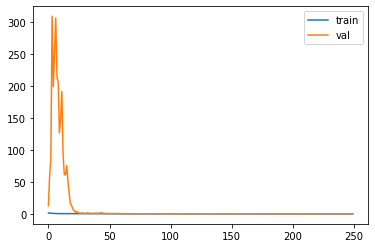

Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_159 (Bat (None, 13)                52        
_________________________________________________________________
dense_627 (Dense)            (None, 36)                504       
_________________________________________________________________
leaky_re_lu_627 (LeakyReLU)  (None, 36)                0         
_________________________________________________________________
dropout_468 (Dropout)        (None, 36)                0         
_________________________________________________________________
dense_628 (Dense)            (None, 30)                1110      
_________________________________________________________________
leaky_re_lu_628 (LeakyReLU)  (None, 30)                0         
_________________________________________________________________
dropout_469 (Dropout)        (None, 30)             

In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(best_params_nn ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(best_params_nn ['alpha'])) 
model.add(Dropout(best_params_nn ['drop_out1']))
# if best_params_nn ['layers'] == 2 or best_params_nn ['layers'] == 3 :
model.add(Dense(best_params_nn ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 
model.add(Dropout(best_params_nn ['drop_out2']))
if best_params_nn ['layers'] == 3 :
    model.add(Dense(best_params_nn ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 
    model.add(Dropout(best_params_nn ['drop_out3']))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 

# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params_nn [ 'learning_rate'])
model.compile(loss=
              'mse',
              # tf.keras.losses.Huber(  delta=best_params_nn [ 'delta']),
                                                                # 'mse'
                                                      optimizer=opt)

fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_H2S_Mannix.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params_nn ['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model.summary()


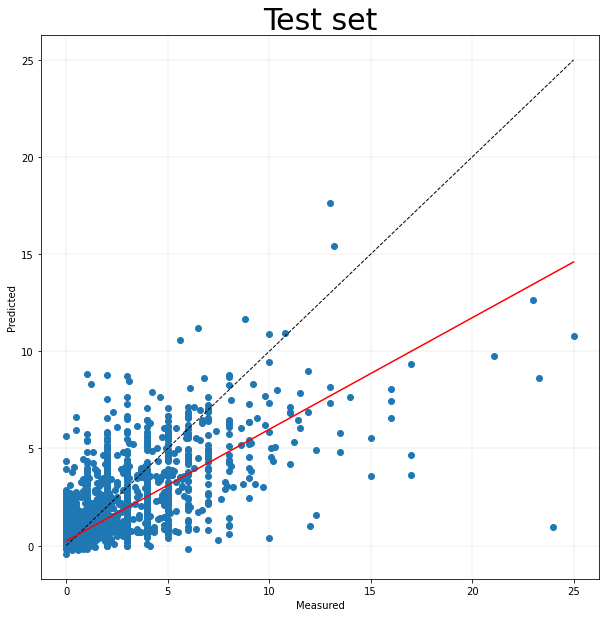

[0.57441804 0.23906356]
RMSE
[0.8988674]
R2
0.5800424850776915


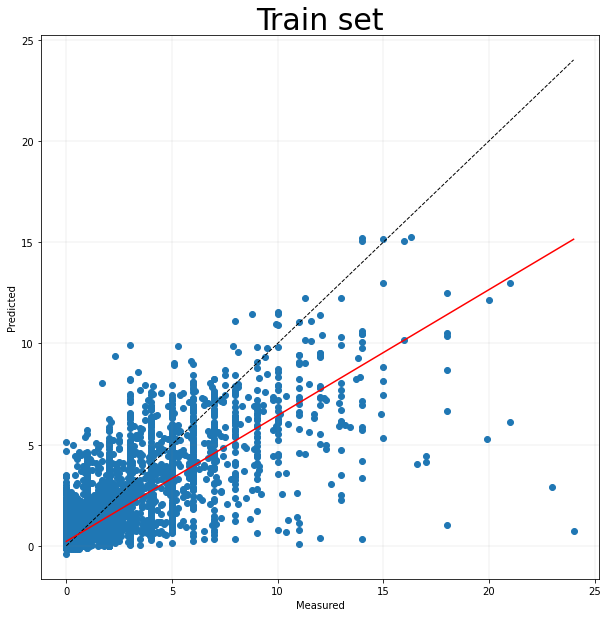

[0.62173504 0.21980978]
RMSE
[0.8491472]
R2
0.648690070161458


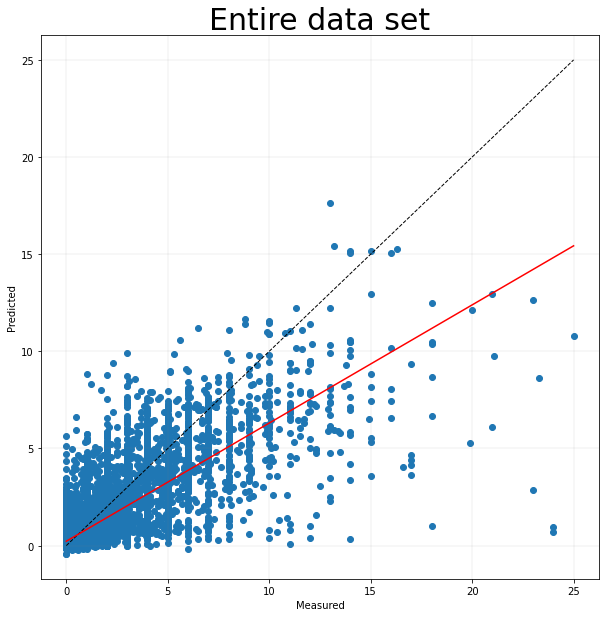

[0.60820042 0.22546695]
RMSE
[0.8643644]
R2
0.62904652427532


In [ ]:
model.load_weights(fn)
precovid_model = 'gdrive/My Drive/Colab Notebooks/Mannix_H2S.h5'
model.save(precovid_model )
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

In [ ]:
model = load_model(precovid_model )

In [ ]:
model.summary()

Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_159 (Bat (None, 13)                52        
_________________________________________________________________
dense_627 (Dense)            (None, 36)                504       
_________________________________________________________________
leaky_re_lu_627 (LeakyReLU)  (None, 36)                0         
_________________________________________________________________
dropout_468 (Dropout)        (None, 36)                0         
_________________________________________________________________
dense_628 (Dense)            (None, 30)                1110      
_________________________________________________________________
leaky_re_lu_628 (LeakyReLU)  (None, 30)                0         
_________________________________________________________________
dropout_469 (Dropout)        (None, 30)             

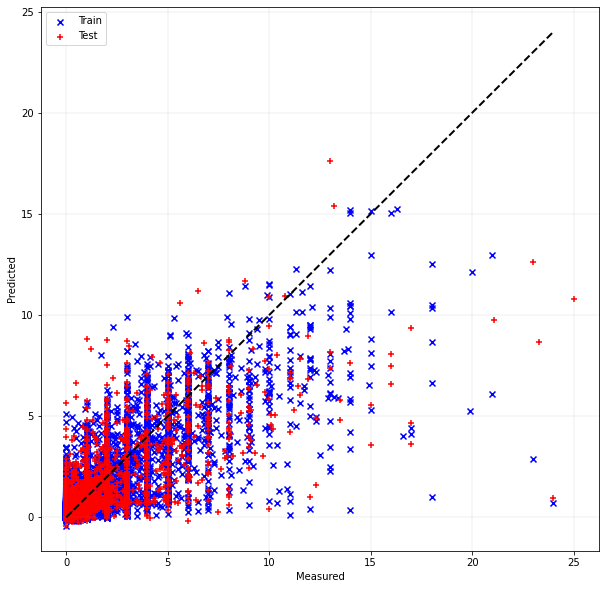

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
# df2_w

In [ ]:
# df3= df3.copy()
df4 = df1_w_n.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

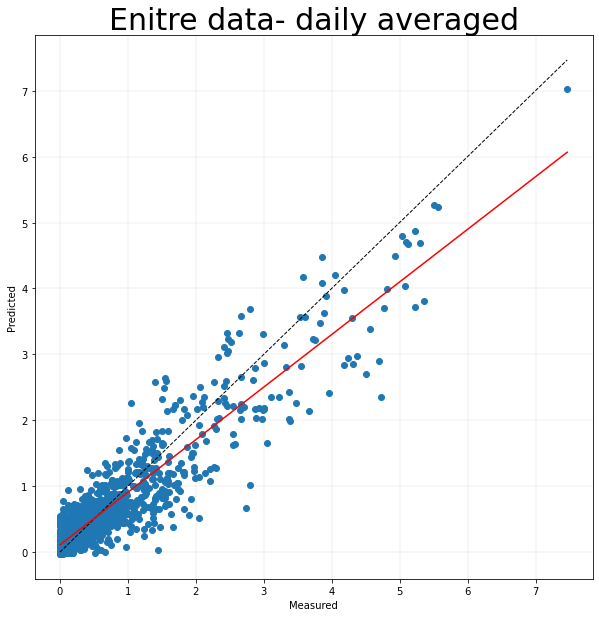

[0.79775692 0.10977873]
RMSE
[0.33851269]
R2
0.8452267575612608


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

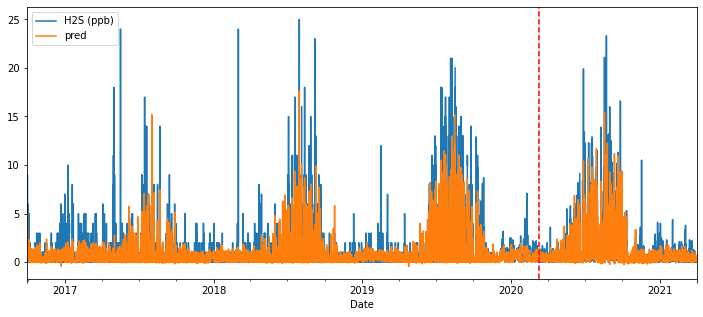

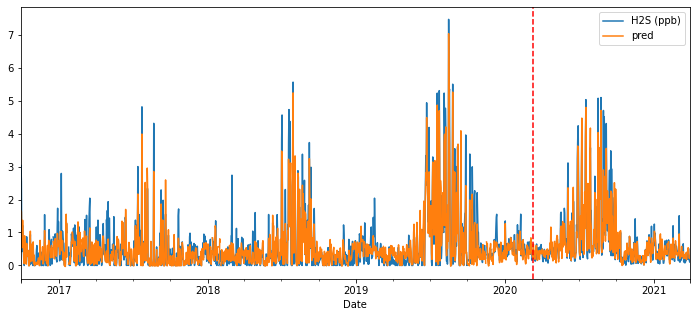

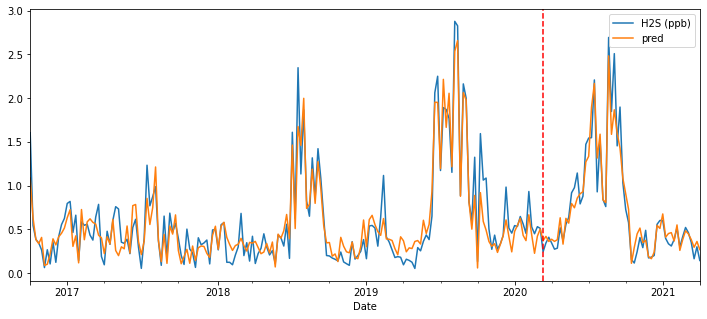

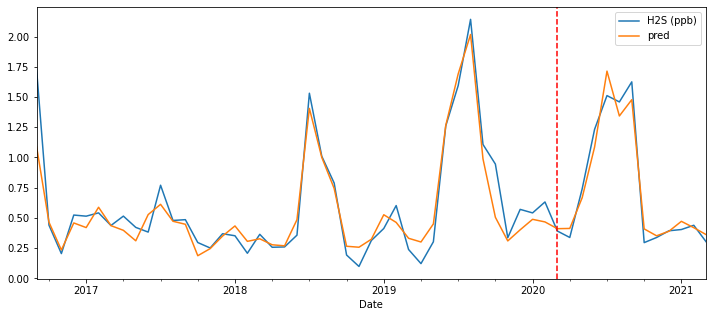

In [ ]:
df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[0.8491472]
0.648690070161458


In [ ]:
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[0.8988674]
0.5800424850776915


In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[ aa, 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_H2S_Mannix_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_H2S_Mannix_Test.csv')

[0.8491472]
0.648690070161458
[0.8988674]
0.5800424850776915


In [ ]:
df4.columns

Index(['H2S (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

In [ ]:
# df4_D = df4_h.resample('D').mean()
# df4_M = df4_h.resample('M').mean()
# df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/Mannix_SO2_hourly_pred.csv')
# df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/Mannix_SO_monthly_pred.csv')

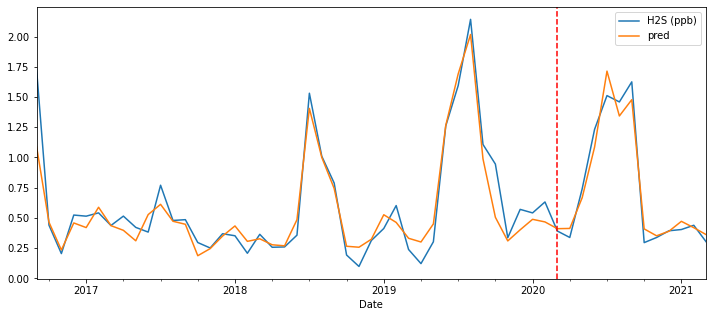

In [ ]:
df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4

H2S (ppb)  T ( C) 45m  ...  Day-year      trend
Date                                        ...                     
2016-09-29 00:00:00        0.0         8.4  ...     273.0  16.743169
2016-09-29 01:00:00        0.0         8.2  ...     273.0  16.743283
2016-09-29 02:00:00        0.0         7.9  ...     273.0  16.743397
2016-09-29 03:00:00        0.0         8.1  ...     273.0  16.743511
2016-09-29 04:00:00        0.0         7.6  ...     273.0  16.743625
...                        ...         ...  ...       ...        ...
2021-03-31 19:00:00        0.2         8.7  ...      90.0  21.245332
2021-03-31 20:00:00        0.1         7.4  ...      90.0  21.245446
2021-03-31 21:00:00        0.0         6.4  ...      90.0  21.245560
2021-03-31 22:00:00        0.0         6.2  ...      90.0  21.245674
2021-03-31 23:00:00        0.1         5.2  ...      90.0  21.245788

[38198 rows x 14 columns]

In [ ]:
df4_h

H2S (ppb)  T ( C) 45m  ...      trend      pred
Date                                        ...                     
2016-09-29 00:00:00        0.0         8.4  ...  16.743169  0.095172
2016-09-29 01:00:00        0.0         8.2  ...  16.743283  0.159381
2016-09-29 02:00:00        0.0         7.9  ...  16.743397  0.205002
2016-09-29 03:00:00        0.0         8.1  ...  16.743511 -0.010218
2016-09-29 04:00:00        0.0         7.6  ...  16.743625 -0.018591
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.2         8.7  ...  21.245332  0.342428
2021-03-31 20:00:00        0.1         7.4  ...  21.245446  0.295751
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  0.220530
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  0.277509
2021-03-31 23:00:00        0.1         5.2  ...  21.245788  0.348328

[38198 rows x 15 columns]

In [ ]:
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
127
0.46805885434150696
2021-01-21 04:00:00
127
0.4760238230228424
2021-01-21 05:00:00
124
0.4822804927825928
2021-01-21 06:00:00
123
0.5030579566955566
2021-01-21 07:00:00
125
0.48354196548461914
2021-01-21 08:00:00
125
0.4714667499065399
2021-01-21 09:00:00
126
0.4646618664264679
2021-01-21 10:00:00
125
0.4838460385799408
2021-01-21 11:00:00
123
0.4741324484348297
2021-01-21 12:00:00
126
0.45351722836494446
2021-01-21 13:00:00
125
0.4511260688304901
2021-01-21 14:00:00
130
0.4577593207359314
2021-01-21 15:00:00
134
0.4716840386390686
2021-01-21 16:00:00
135
0.4915948510169983
2021-01-21 17:00:00
135
0.4839060604572296
2021-01-21 18:00:00
134
0.48390305042266846
2021-01-21 19:00:00
134
0.48842883110046387
2021-01-21 20:00:00
134
0.5107477307319641
2021-01-21 21:00:00
133
0.4816608726978302
2021-01-21 22:00:00
130
0.47865030169487
2021-01-21 23:00:00
131
0.46433189511299133
2021-01-22 00:00:00
129
0.44448718428611755
2021-01-22 01:00:0

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()

df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_H2S_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_H2S_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_H2S_Monthly_normalized_pred.csv')

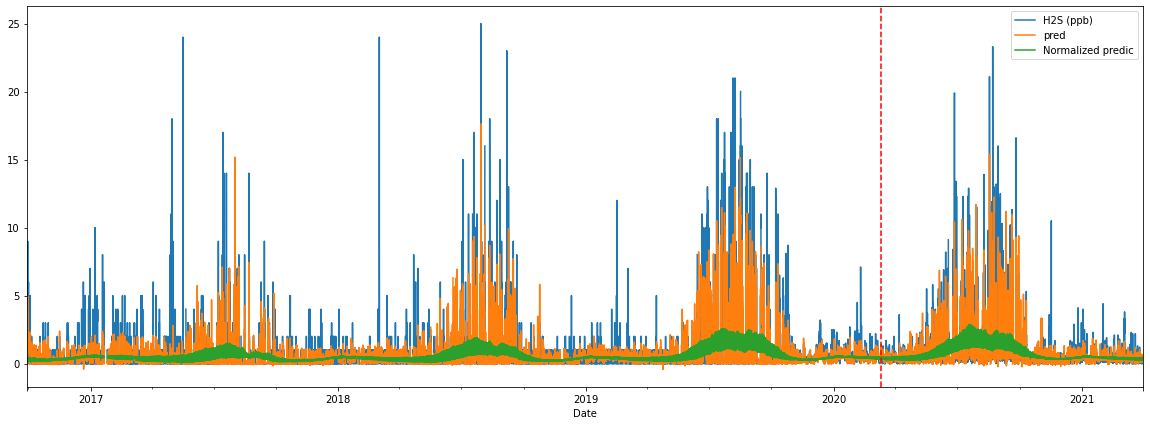

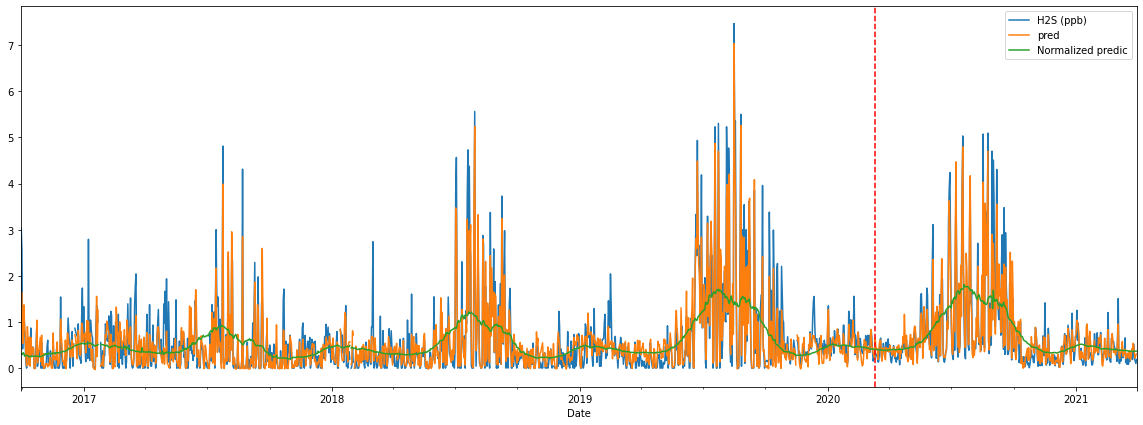

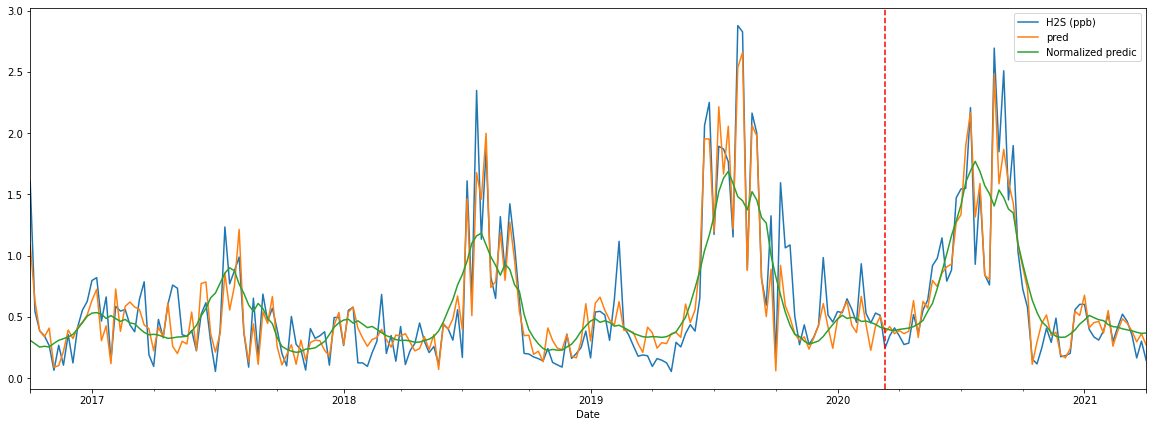

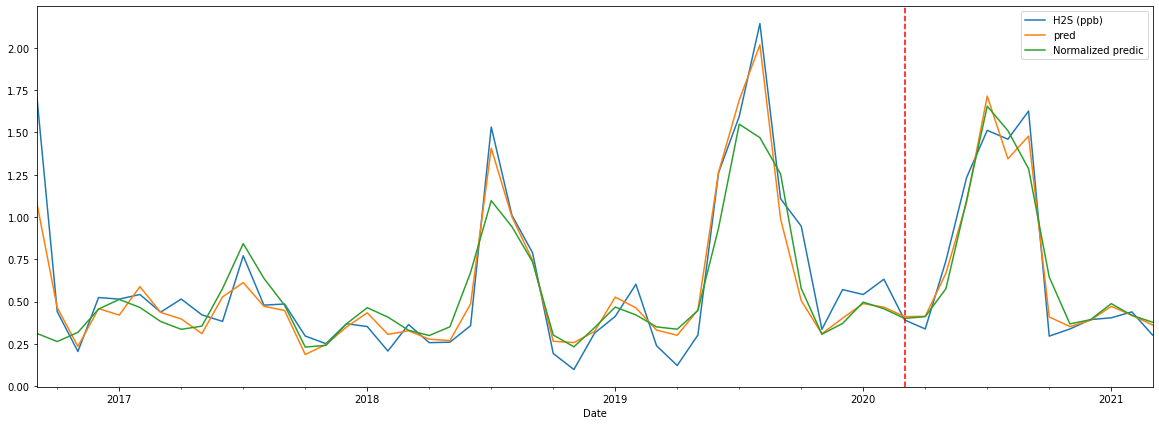

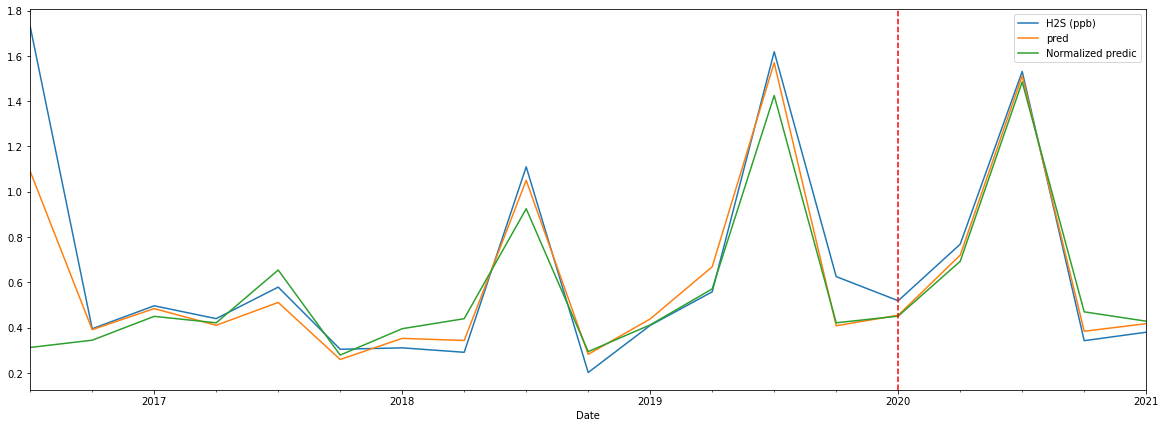

In [ ]:
for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

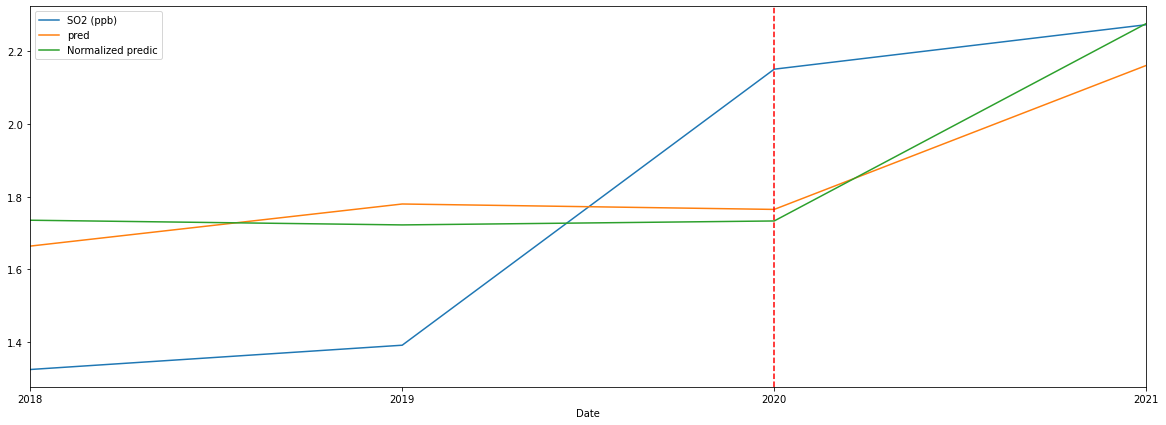

In [ ]:
df4_h['SO2 (ppb)'].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

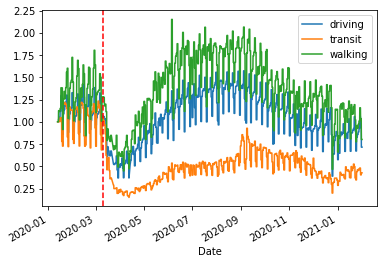

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] ==0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] ==1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

NameError: ignored

In [ ]:
Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

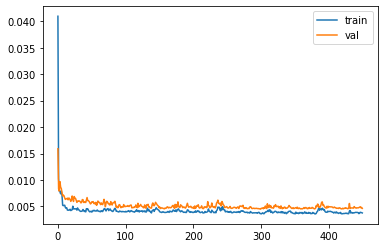

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

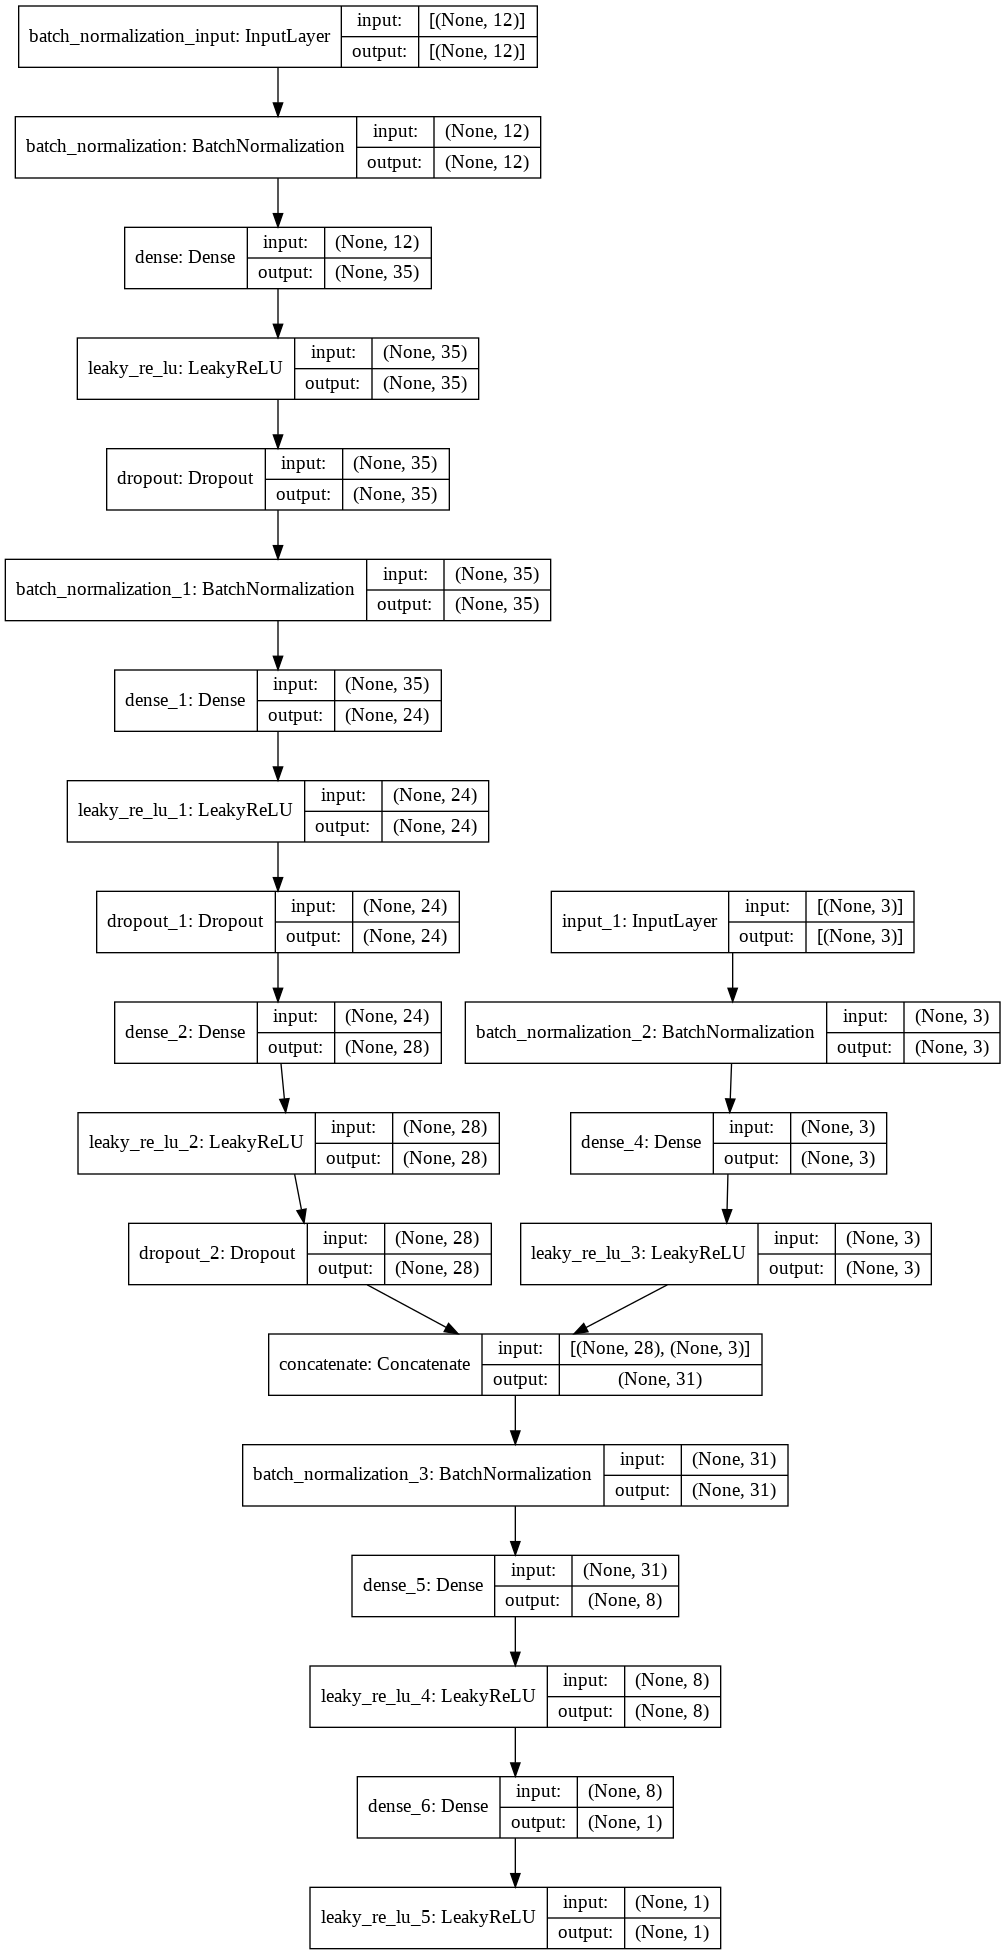

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

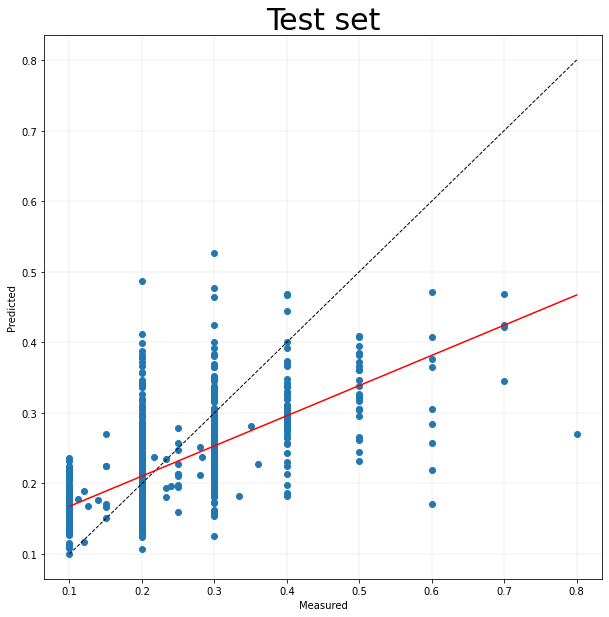

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


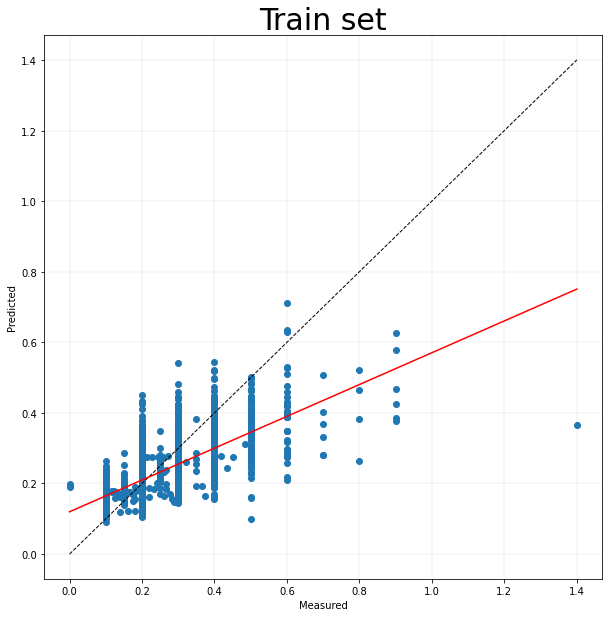

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


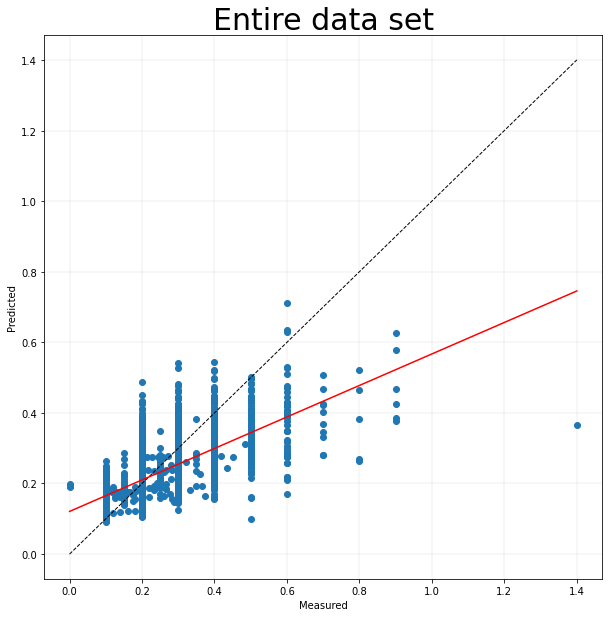

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

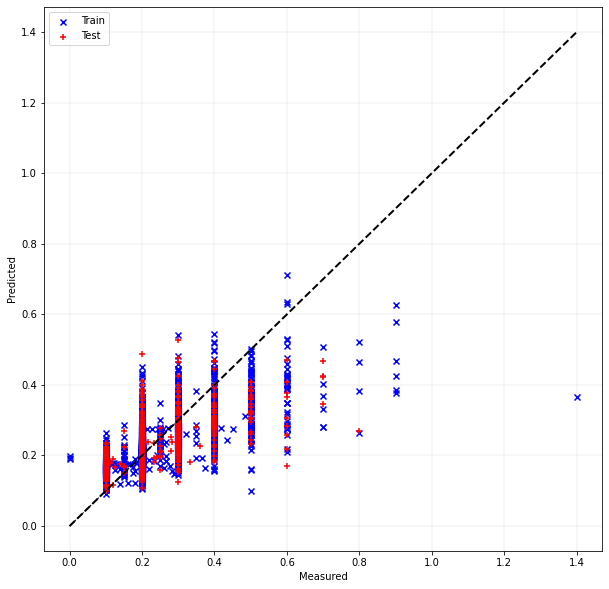

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

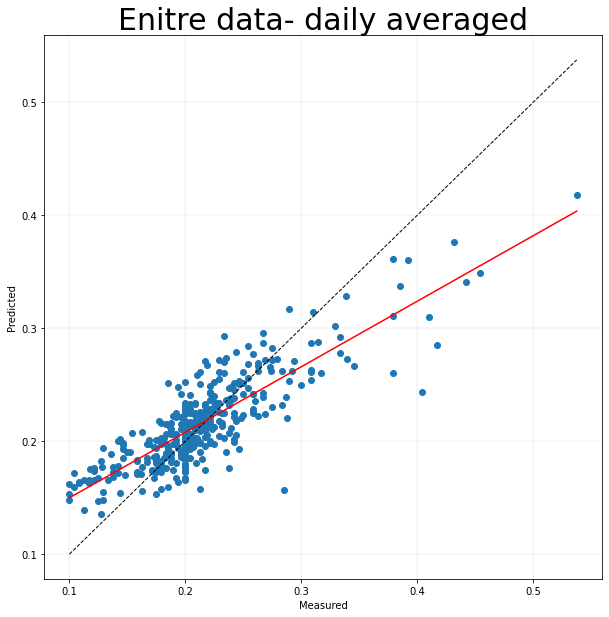

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


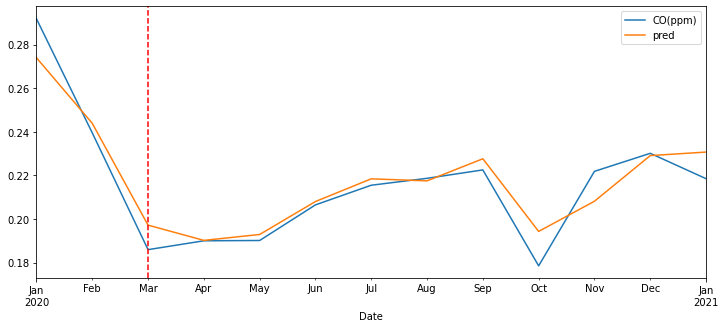

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

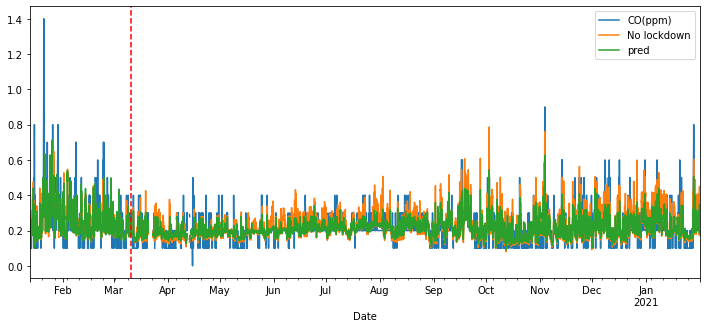

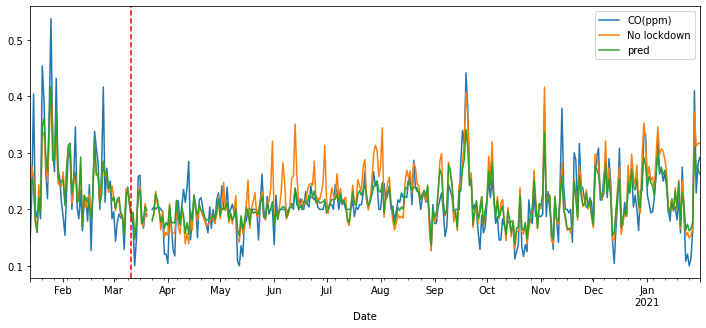

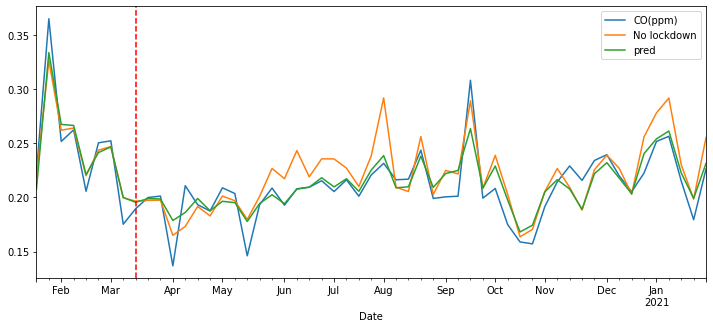

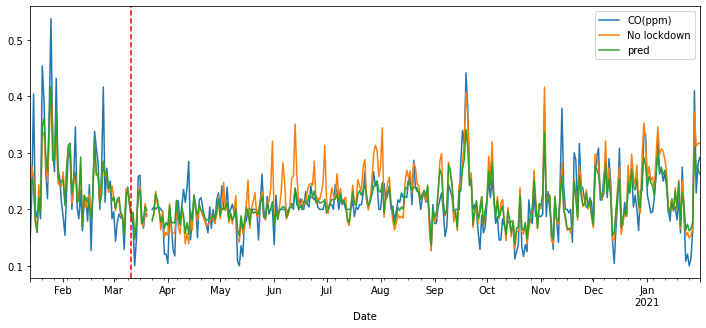

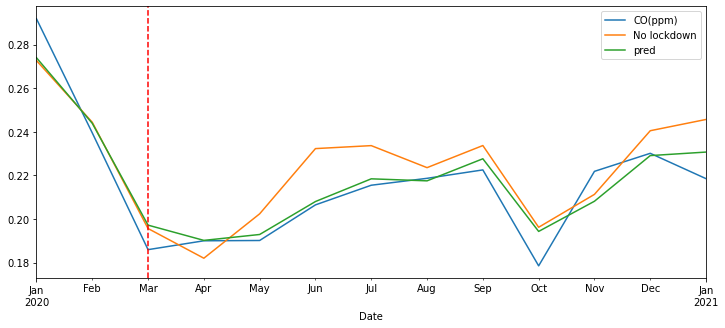

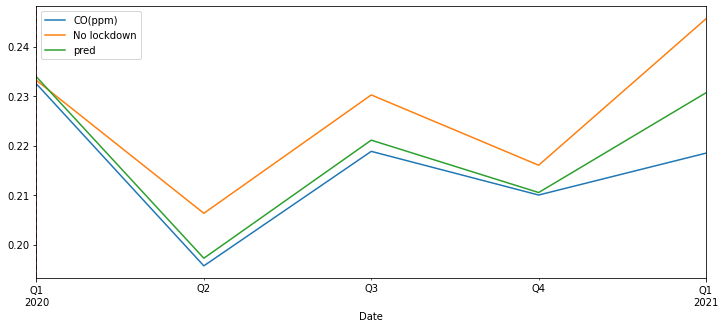

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]